# Bottled Gazpacho Market Research

I don't know about you, but I love Gazpacho. In Spain they sell those delicacies bottled in supermarkets. But what about the rest of the world? How sad I am eveytime I go to the supermarket and none of that elixir is available. Here's the wonderful sight that Spaniards take for granted, while everyone else can only dream of:

![gazpacho](./images/spanish_bottled_gazpacho.jpg)

No more! This stops here! Or so I hope. Let's perform some **simulated market research** to find out if there is a market for Gazpacho in the rest of the world.

In [3]:
import json
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.insert(0, '..')

import tinytroupe
from tinytroupe.agent import TinyPerson
from tinytroupe.environment import TinyWorld
from tinytroupe.factory import TinyPersonFactory
from tinytroupe.validation import TinyPersonValidator
from tinytroupe import control

from tinytroupe.extraction import ResultsExtractor
from tinytroupe.profiling import Profiler


!!!!
DISCLAIMER: TinyTroupe relies on Artificial Intelligence (AI) models to generate content. 
The AI models are not perfect and may produce inappropriate or inacurate results. 
For any serious or consequential use, please review the generated content before using it.
!!!!

Looking for default config on: c:\Users\pdasilva\repos\TinyTroupe\examples\..\tinytroupe\utils\..\config.ini
Found custom config on: c:\Users\pdasilva\repos\TinyTroupe\examples\config.ini
TinyTroupe version: 0.5.1
Current date and time (local): 2025-07-17 16:44:22
Current date and time (UTC):   2025-07-17 19:44:22

Current TinyTroupe configuration 
[OpenAI]
api_type = openai
azure_api_version = 2024-08-01-preview
model = gpt-4.1-mini
reasoning_model = o3-mini
embedding_model = text-embedding-3-small
max_tokens = 32000
temperature = 1.1
freq_penalty = 0.1
presence_penalty = 0.1
timeout = 480
max_attempts = 5
waiting_time = 0
exponential_backoff_factor = 5
reasoning_effort = high
cache_api_calls = False
cache_file_n

KeyboardInterrupt: 

First of all, we'll use a cached simulation, to avoid having to recompute expensive steps unless really necessary. We accomplish this via the `control.begin()` function. The file it takes as an argument is the cache file that will be created and then updated as needed.

**Tip:** the ".cache." naming convention is used to indicate that the file is a cache file and will not be committed to the repository.

In [2]:
control.begin("bottled_gazpacho_market_research.cache.json")

## Prepare the survey and auxiliary elements

Main target nationality and population size.

In [3]:
target_nationality = "American"
population_size = 50

Should we also compute the other nationalities? This might take a while, so we leave it as an option.

In [4]:
compute_other_nationalities = True

Descriptions and standard questions for the survey.

In [5]:
def general_context(nationality="American"):
    return  f"""
            We are performing market research, and in that examining the whole of the {nationality} population. Thus we want a **uniform** **random** 
            representative sample of people from this population. We are surveying the market for a new food product, to be sold in supermarkets, 
            so pay special consideration to specify the culinary tastes of people and their shopping habits, which must be as realistic as possible.
            
            The sample must include representative people from the broad population, so for instance ensure that you include people from all walks of life:
              - from the simplest professions to those of the highest ranks;
              - from the youngest to the oldest; 
              - from the kind to the evil;
              - from the happy and joyful to the sad and depressed;
              - from the most conservative, to the most liberal; 
              - from the educated, to the ignorant;
              - from the healthy to the sick;
              - from rich to poor.             
              """

interviewer_introduction =\
    """
    We are performing some market research and need to know you more. 
    Can you please present yourself and also list your top-10 interests?
    """

interviewer_main_question =\
    """ 
    Would you buy bottled gazpacho if you went to the supermarket today? Why yes, or why not? 
    Please be honest, we are not here to judge you, but just to learn from you. 
    We know these choices depend on many factors, but please make your best guess, consider your current 
    situation in life, location, job and interests, and tell us whether you would buy bottled gazpacho 
    or not. To make it easier, start your response with "Yes, ", "No, " or "Maybe, ".
    """

Common mechaniss.

In [6]:
results_extractor = ResultsExtractor(extraction_objective="Find whether the person would buy the product. A person can say Yes, No or Maybe." ,
                                     situation="Agent was asked to rate their interest in a bottled Gazpacho. They can respond with Yes, No or Maybe.", 
                                     fields=["response", "justification"],
                                     fields_hints={"response": "Must be a string formatted exactly as 'Yes', 'No', 'Maybe' or 'N/A'(if there is no response)."},
                                     verbose=True)

A function that will give us the statistics and then recommend us if we should go ahead and start a Gazpacho business.

In [7]:
def is_there_a_good_market(df, yes_threshold=0.1, no_threshold=0.5):
    # get the counts for column "response" - values are Yes, No, Maybe or N/A
    counts = df["response"].value_counts()
    # get the total number of responses
    total = counts.sum()

    # get the percentage of each response
    percentage = counts / total

    # get the percentage of "Yes" responses
    percentage_yes = percentage.get("Yes", 0)
    print(f"Percentage of 'Yes' responses: {percentage_yes:.2%}")

    # get the percentage of "No" responses
    percentage_no = percentage.get("No", 0)
    print(f"Percentage of 'No' responses: {percentage_no:.2%}")

    # get the percentage of "Maybe" responses
    percentage_maybe = percentage.get("Maybe", 0)
    print(f"Percentage of 'Maybe' responses: {percentage_maybe:.2%}")

    # get the percentage of "N/A" responses
    percentage_na = percentage.get("N/A", 0)
    print(f"Percentage of 'N/A' responses: {percentage_na:.2%}")

    # some reasonable logic to determine whether to invest or not
    if percentage_yes > yes_threshold and percentage_no < no_threshold:
        print("VERDICT: There is a good market for bottled gazpacho.")
        return True
    else:
        print("VERDICT: There is not a good market for bottled gazpacho.")
        return False



## Build the audience

Summon an audience out of thin simulated air. To do so, we build a factory whose context defines our problem and target audience. Actual agents will be later sampled from this factory.

In [8]:
factory = TinyPersonFactory(general_context(target_nationality))

We can request a specific number of people.

In [9]:
people = factory.generate_people(population_size, verbose=True)

2025-07-14 16:09:00,896 - tinytroupe - ERROR - Error generating name for sample 46: Postcondition not met for function <lambda>!


Generated person 6/50: Claudia Reyes is a 41 year old Environmental Scientist, American, currently living in San Diego, California. Claudia Reyes is a deeply analytical and compassionate individual, often finding solace in the quiet moments of her life. Her love for baking not only serves as a creative outlet but also allows her to share joy with friends and family, especially through her rich desserts. Despite her reserved nature, she values meaningful connections, particularly with her best friend Maria, who encourages her to step outside her comfort zone. Claudia's commitment to environmental conservation is matched by her belief in the power of community engagement, driving her to volunteer regularly and advocate for sustainable practices in her local area.
Generated person 4/50: Person_46_unknown is a 36 year old CEO, American, currently living in San Francisco, California. Person_46_unknown is not only a driven CEO but also a charismatic leader who thrives on building connections

Generated person 1/50: Catherine Langley is a 46 year old Artist, American, currently living in Santa Fe, New Mexico. Catherine Langley is a passionate and dedicated artist who thrives on creativity and community engagement. With a high level of openness, she embraces new ideas and experiences, often drawing inspiration from her travels and the natural world around her. Her laid-back demeanor and approachable personality make her a favorite among fellow artists and patrons alike, as she enjoys deep conversations about art and society. Despite her busy lifestyle, she finds joy in simple pleasures, such as visiting local galleries, exploring nature, and listening to indie music while she works, all of which fuel her artistic vision and commitment to provoke thought through her art.


Generated person 3/50: Henry Lawson is a 28 year old Laborer, American, currently living in Cleveland, Ohio. Henry Lawson is a dedicated and hardworking individual who values honesty and integrity in both his personal and professional life. He enjoys engaging in home improvement projects and has a particular passion for woodworking, a skill he inherited from his grandfather. In his free time, Henry loves spending weekends outdoors, whether it's hiking or fishing with friends and family, and he often participates in community events that support local businesses. Known for his dry sense of humor, he tends to be reserved but shows warmth through small gestures, making him a reliable friend and family member.
Generated person 12/50: Isabella Torres is a 18 year old Nursing Student, American, currently living in Phoenix, Arizona. Isabella Torres is a determined and practical individual who thrives on setting and achieving her goals. With a passion for healthcare, she finds joy in baking, o

Generated person 14/50: Maximilian Prescott is a 41 year old CEO, American, currently living in New York City, New York. Maximilian Prescott is not only a driven CEO but also a charismatic leader who thrives on fostering a positive and innovative work environment. His passion for technology and business strategy is matched by his love for travel, which he believes broadens his perspective and inspires creativity. Known for his decisiveness and strong communication skills, he often engages in networking events, where his humor and approachability help him connect with others effortlessly. Outside of work, Maximilian is dedicated to philanthropy, frequently participating in community service and mentoring young entrepreneurs, reflecting his belief in the importance of corporate responsibility and investing in people.
Generated person 8/50: Thomas Harrington is a 39 year old Family Physician, American, currently living in Dallas, Texas. Thomas Harrington is not only dedicated to his role 

Generated person 11/50: Gabriela Vasquez is a 30 year old Mechanical Engineer, American, currently living in Austin, Texas. Gabriela Vasquez is not only a dedicated mechanical engineer but also a vibrant personality who thrives in social settings. Her extroverted nature makes her the life of the party, where she enjoys engaging in lively discussions, particularly about politics and social issues. With a passion for cooking, she frequently hosts dinner parties to showcase her culinary skills, often experimenting with international recipes inspired by her travels. Gabriela's commitment to sustainability extends beyond her professional life, as she actively participates in community service and environmental initiatives, reflecting her belief that healthy eating and cultural exchange are essential for a balanced and enriched life.


Generated person 9/50: Eleanor Fitzpatrick is a 60 year old Senior Research Scientist, American, currently living in Seattle, Washington. Eleanor Fitzpatrick is not only dedicated to her work as a Senior Research Scientist but also embodies a strong commitment to community engagement and social justice. Her calm and composed demeanor allows her to navigate complex discussions with thoughtfulness, while her high level of openness fuels her curiosity about new ideas in environmental science. Outside of her professional life, she enjoys cooking healthy meals, often experimenting with fresh produce from her garden, and finds joy in reading both fiction and non-fiction. Eleanor is also passionate about mentoring young scientists, particularly her daughter Jessica, and actively participates in local environmental advocacy, reflecting her belief that community involvement is crucial for effective policy change.


Generated person 15/50: Evelyn Grant is a 39 year old Research Scientist, American, currently living in Seattle, Washington. Evelyn Grant is a dedicated and pragmatic individual who thrives on solving complex problems in the realm of environmental science. Her analytical nature is complemented by a strong commitment to maintaining a balanced lifestyle, which includes regular exercise and mindfulness practices to manage her health conditions. Outside of her professional pursuits, she enjoys cooking healthy meals and often experiments with new recipes, sharing her culinary adventures on a personal blog. With a passion for hiking and nature walks, Evelyn finds solace in the outdoors, where she can recharge and reflect on her long-term goals of advocating for sustainable practices and health equity.


Generated person 5/50: Nathaniel Sinclair is a 35 year old Physician, American, currently living in San Francisco, California. Nathaniel Sinclair is not only a dedicated physician but also a passionate advocate for holistic health and preventive care. His analytical nature drives him to meticulously review patient files, ensuring that he provides the best possible care while fostering meaningful relationships with his patients. Outside of work, Nathaniel enjoys cooking healthy meals from scratch, often experimenting with new recipes that highlight fresh, organic produce. He finds solace in nature, frequently hiking in the nearby mountains, and values deep conversations about health and life, which reflect his empathetic yet serious demeanor.


Generated person 10/50: Juliet Monroe is a 29 year old Artist, American, currently living in Brooklyn, New York, USA. Juliet Monroe is not only a talented artist but also a vibrant personality who thrives on social interactions and community engagement. Her passion for social justice is evident in her art, as she believes in its power to inspire change and foster understanding. An adventurous spirit, she enjoys exploring new cuisines and often experiments with dessert recipes, reflecting her playful nature. Juliet's strong communication skills and openness to new experiences make her approachable, allowing her to connect deeply with others while advocating for the importance of creativity and mental health.


Generated person 7/50: Vivienne Moreau is a 60 year old Artist, French, currently living in Paris, France. Vivienne Moreau is a deeply reflective individual who often immerses herself in her thoughts, which fuels her artistic expression. Her passion for art is matched by her love for cooking, where she enjoys experimenting with spicy dishes from various cultures, often while listening to world music. Despite her struggles with chronic health conditions, she maintains a commitment to mindfulness and gentle yoga, which help her manage stress and find balance. Vivienne values intimate gatherings with close friends, where she shares her culinary creations and engages in meaningful conversations about art and culture, fostering connections that inspire her work.
Generated person 13/50: Marco Silva is a 28 year old Laborer, Brazilian, currently living in São Paulo, Brazil. Marco Silva is not only dedicated to his work as a laborer but also embodies a strong commitment to health and sustainab

Generated person 16/50: Juliet Kensington is a 35 year old Physician, American, currently living in San Francisco, California. Juliet Kensington is not only a dedicated physician but also a vibrant individual who embodies her passion for health and wellness in every aspect of her life. With a strong commitment to holistic health, she regularly practices yoga and meditation, which helps her maintain mental clarity amidst the challenges of her profession. Her love for cooking shines through as she experiments with plant-based recipes, often sharing her culinary creations with friends and family during gatherings. Juliet's optimistic outlook and deep empathy for others drive her advocacy for social justice in healthcare, making her a respected figure in her community and a mentor to aspiring medical students.
Generated person 23/50: Benjamin Caldwell is a 58 year old CEO, American, currently living in San Francisco, California. Benjamin Caldwell is not only a dedicated CEO but also a char

Generated person 19/50: Elena Martinez is a 45 year old Registered Nurse, American, currently living in Phoenix, Arizona. Elena Martinez is not only dedicated to her role as a Registered Nurse but also embodies a nurturing spirit that extends beyond her professional life. With a passion for cooking, she enjoys experimenting with international recipes, often hosting dinner parties where she shares her culinary creations with friends and family. Despite her pragmatic approach, her tendency to overthink can lead to moments of anxiety, particularly regarding her career decisions. Elena is committed to maintaining a healthy lifestyle, regularly engaging in yoga and strength training, and she actively volunteers at local health clinics, reflecting her belief in accessible healthcare for all.


Generated person 18/50: Natalie Rivera is a 33 year old Registered Nurse, American, currently living in Portland, Oregon. Natalie Rivera is not only dedicated to her role as a Registered Nurse but also embodies a warm and approachable personality that makes her patients feel at ease. With a strong commitment to social justice, she actively advocates for equitable healthcare access and often engages in community service, reflecting her belief that healthcare should be available to everyone. In her free time, she enjoys exploring local farmers' markets and experimenting with new plant-based recipes, which she shares on social media to inspire others towards healthier living. Her passion for holistic health is complemented by her mindfulness practices, such as yoga and meditation, which help her manage stress and maintain a balanced lifestyle.


Generated person 24/50: Victoria Hastings is a 54 year old Physician, American, currently living in San Francisco, California. Victoria Hastings is not only a dedicated physician but also a vibrant individual who embodies optimism and warmth in her interactions. Her passion for health and wellness extends beyond her practice, as she enjoys cooking with fresh, organic ingredients and experimenting with new recipes that promote nutrition. An avid traveler, she seeks to immerse herself in diverse cultures, particularly in relation to health practices, which enriches her understanding of global healthcare. Victoria's strong sense of justice drives her advocacy for social change, and she actively engages in community service, believing that empathy and compassion are essential in both medicine and life.


Generated person 17/50: Lara Mendoza is a 22 year old Unemployed, American, currently living in New Orleans, Louisiana. Lara Mendoza is a deeply introspective individual who finds solace in quiet moments and creative expression. Her passion for cooking, particularly plant-based recipes, not only serves as a therapeutic outlet but also aligns with her commitment to sustainability and health. Despite her struggles with anxiety, she actively seeks to connect with others through volunteering, demonstrating her compassionate nature and desire to support her community. Lara's strong writing skills allow her to articulate her thoughts and experiences, making her an advocate for disability rights and accessibility issues, which are close to her heart.


Generated person 22/50: Sofia Delgado is a 21 year old Elementary School Teacher, American, currently living in Austin, Texas. Sofia Delgado is not only a dedicated teacher but also a vibrant and engaging individual who thrives on social interactions. Her warm and approachable demeanor allows her to connect easily with students and colleagues alike, often using humor to create a relaxed atmosphere in the classroom. Outside of teaching, she enjoys cooking and baking, frequently experimenting with new dessert recipes to share with her students and friends. Passionate about education reform and social justice, Sofia actively participates in community events and advocacy groups, believing that every child deserves equitable access to quality education.


Generated person 27/50: Catherine Ellis is a 30 year old Research Scientist, American, currently living in Austin, Texas. Catherine Ellis is not only dedicated to her research but also deeply passionate about environmental conservation in her personal life. She enjoys cooking and experimenting with international recipes, often incorporating fresh herbs from her own garden. An active member of her community, she regularly participates in clean-up events and volunteers at local schools to inspire the next generation of scientists. In her downtime, Catherine finds joy in reading both scientific literature and fiction, and she maintains a blog where she shares her culinary adventures and environmental tips, reflecting her commitment to sustainable living.


Generated person 20/50: Claudia Whitaker is a 42 year old Research Scientist, American, currently living in Portland, Oregon. Claudia Whitaker is a deeply introspective individual who approaches her work with a thoughtful and analytical mindset. Her passion for sustainable agriculture and plant-based diets is not just professional; it reflects her personal beliefs and lifestyle choices, as she enjoys cooking with fresh, organic produce and experimenting with seasonal ingredients. Despite her struggles with chronic health conditions, Claudia remains committed to her long-term goals, often journaling to process her thoughts and feelings while practicing yoga to manage stress. She values deep conversations and empathetic connections, often engaging with close friends and her partner, Mark, to discuss health and environmental issues, which helps her navigate her anxieties and maintain a sense of purpose.


Generated person 34/50: Diego Morales is a 19 year old Laborer, Mexican, currently living in Guadalajara, Mexico. Diego Morales is a resilient and determined individual who approaches life with a calm demeanor, often finding humor in everyday situations. He has a strong sense of loyalty to his family and friends, frequently prioritizing their needs over his own. In his free time, Diego enjoys cooking, particularly experimenting with new dessert recipes, which reflects his creative side despite his pragmatic nature. His love for soccer not only connects him with friends like Carlos but also serves as a source of joy and community, allowing him to unwind after long workdays.


Generated person 36/50: Gabriel Alonzo is a 34 year old Artist, American, currently living in Los Angeles, California. Gabriel Alonzo is not only a talented artist but also a vibrant personality who thrives on connection and creativity. His optimistic outlook and strong sense of empathy drive him to engage deeply with social issues, often using his art as a platform for advocacy. Gabriel enjoys exploring diverse cultures through travel, which enriches his artistic expression and fuels his passion for social justice. In his downtime, he loves cooking and hosting dinner parties, where he brings friends together to share not just food, but also ideas and inspiration, reflecting his belief that creativity and community are intertwined.
Generated person 29/50: Mateo Vargas is a 19 year old Laborer, Mexican, currently living in Guadalajara, Mexico. Mateo Vargas is a dedicated individual who embodies a strong work ethic and a commitment to his family. Despite facing health challenges that imp

Generated person 33/50: Jonathan Blake is a 39 year old Physician, American, currently living in Dallas, Texas. Jonathan Blake is not only dedicated to his profession but also embodies a calm and composed demeanor that puts his patients at ease. He has a passion for cooking, often experimenting with new recipes, which reflects his creative side outside of medicine. An avid sports fan, he enjoys discussing games and current events with colleagues, fostering camaraderie in the workplace. Jonathan's commitment to community health is evident through his volunteer work at local clinics, where he combines his medical expertise with a genuine desire to help others, all while maintaining a structured routine that balances his professional and personal life.


Generated person 35/50: Daniela Cruz is a 37 year old Teacher, American, currently living in Portland, Oregon. Daniela Cruz is not only dedicated to her role as a health teacher but also embodies a lifestyle that reflects her commitment to wellness. With a pragmatic approach, she enjoys experimenting with healthy recipes and often shares her culinary creations with friends and family, fostering a sense of community around nutritious eating. Her love for outdoor activities, such as hiking and cycling, allows her to connect with nature, which she believes is essential for mental well-being. Daniela's dry sense of humor and patient demeanor make her approachable, enabling her to build strong relationships with her students and colleagues, while her advocacy for mental health awareness highlights her belief in the importance of holistic health education.
Generated person 39/50: Javier Morales is a 27 year old Service Worker, American, currently living in Los Angeles, California. Javier Mor

Generated person 42/50: Emily Torres is a 18 year old Nursing Student, American, currently living in Phoenix, Arizona. Emily Torres is not only dedicated to her nursing studies but also possesses a pragmatic approach to life that drives her ambitions. With a strong work ethic instilled by her upbringing, she is determined to excel in her nursing career, particularly in pediatrics, while also nurturing her passion for baking. Emily enjoys experimenting with dessert recipes, often sharing her creations with friends and family, which reflects her desire to bring joy to others. Despite her straightforward demeanor, she values meaningful connections, especially with her best friend Sarah, as they navigate the challenges of their nursing program together.


Generated person 41/50: Lucas Ramirez is a 26 year old Laborer, American, currently living in Phoenix, Arizona. Lucas Ramirez is a dedicated and hardworking individual who takes pride in his accomplishments, often helping friends and family with home improvement projects. He enjoys the outdoors, frequently hiking and camping with his best friend David, and finds joy in cooking, particularly when experimenting with new dessert recipes to share with loved ones. While he maintains a practical and straightforward communication style, his dry sense of humor adds a light-hearted touch to his interactions. Despite his generally content demeanor, Lucas occasionally grapples with pessimism about the future, yet he remains focused on his long-term goals of advancing his skills in carpentry and eventually owning a construction business that prioritizes affordable housing.


Generated person 44/50: David Albright is a 47 year old Research Scientist, American, currently living in Seattle, Washington. David Albright is a detail-oriented individual who approaches both his work and personal life with a methodical mindset. He finds solace in gardening and nature photography, which not only serve as hobbies but also align with his passion for environmental conservation. Despite his reserved nature, he possesses a dry sense of humor that occasionally lightens his interactions with others. David is committed to maintaining a health-conscious lifestyle, often experimenting with new healthy recipes and engaging in regular exercise, which helps him manage his chronic health conditions while fostering a positive outlook on life.


Generated person 47/50: Margaret Sinclair is a 55 year old CEO, American, currently living in San Francisco, California. Margaret Sinclair is not only a dedicated CEO but also a passionate advocate for social justice and community empowerment. Her empathetic nature drives her to mentor young women in business, fostering a new generation of leaders who share her commitment to diversity and inclusion. In her free time, she enjoys exploring culinary arts, often experimenting with recipes inspired by her travels, and she finds joy in connecting with friends and family over home-cooked meals. With a strong belief that business can be a force for good, Margaret actively participates in community service and engages in open dialogues about social issues, making her a respected figure in both her professional and personal circles.


Generated person 38/50: Juliana Vasquez is a 34 year old Elementary School Teacher, American, currently living in Austin, Texas. Juliana Vasquez embodies a calm and collected demeanor, which resonates well with her students, fostering a nurturing classroom environment. Her passion for healthy living is evident not only in her personal life but also in her teaching, as she integrates health and wellness topics into her curriculum. Outside of the classroom, she enjoys quiet evenings filled with reading and gardening, reflecting her preference for tranquility over chaos. Juliana is also dedicated to advocating for educational equity, often volunteering her time to support underprivileged children, demonstrating her commitment to making a positive impact in her community.


Generated person 43/50: Carlos Ramirez is a 40 year old Service Worker, American, currently living in Chicago, Illinois. Carlos Ramirez is a dedicated individual who balances the demands of his job with a strong commitment to his family. He finds joy in cooking and often experiments with new recipes, reflecting his passion for food that he inherited from his mother. Despite the challenges of managing his health conditions, he maintains a pragmatic outlook on life, using humor to navigate stressful situations. Carlos values community and often participates in local events, believing that everyone deserves a second chance, which aligns with his friendly and accommodating nature.


Generated person 45/50: Isabella Marquez is a 29 year old Artist, American, currently living in San Francisco, California. Isabella Marquez is not only a talented artist but also a vibrant personality who thrives on connection and creativity. Her strong sense of curiosity drives her to explore new cultures, which she often reflects in her art and culinary experiments, particularly with Thai and Mediterranean dishes. With a penchant for vivid colors and bold patterns, she brings an expressive flair to both her artwork and personal style. Isabella's optimistic outlook and empathetic nature make her a beloved figure in her community, where she actively engages in local art programs and enjoys collaborating with fellow artists like her best friend Lena.


A quick look into the folks that were created:

In [10]:
factory.generated_minibios

["Claudia Reyes is a 41 year old Environmental Scientist, American, currently living in San Diego, California. Claudia Reyes is a deeply analytical and compassionate individual, often finding solace in the quiet moments of her life. Her love for baking not only serves as a creative outlet but also allows her to share joy with friends and family, especially through her rich desserts. Despite her reserved nature, she values meaningful connections, particularly with her best friend Maria, who encourages her to step outside her comfort zone. Claudia's commitment to environmental conservation is matched by her belief in the power of community engagement, driving her to volunteer regularly and advocate for sustainable practices in her local area.",
 'Person_46_unknown is a 36 year old CEO, American, currently living in San Francisco, California. Person_46_unknown is not only a driven CEO but also a charismatic leader who thrives on building connections within the tech community. With a stron

Checkpoint the simulation state to disk, to avoid having to re-run the expensive agent sampling process, unless really necessary.

In [11]:
control.checkpoint()

Now let's enclose the audience in an environment, to make it easier to interact with. Note that we set `broadcast_if_no_target` to `False`, which instructs the environment to **do not** broadcast what specific agents say to the others (unless the agent deliberately specify the target). We are not simulating a focus group, so we don't want discussions.


In [12]:
market = TinyWorld(f"Target audience ({target_nationality})", people, broadcast_if_no_target=False)

## Perform the research

Now we actually ask agents about their opinion. Note that we are asking for specific answers (Yes, No, Maybe), both to convey the granularity of preference we seek, and to make it easier to extract the results later. In general, a coarser granuarity is likely to have higher quality, since it requires less information to be computed accurately.

In [13]:
market.broadcast(interviewer_introduction)
market.broadcast(interviewer_main_question)

USER --> Claudia Reyes: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please present yourself and also list your top-10 interests?

       + --> Person_46_unknown

       + --> Charlotte Winslow

       + --> ...others...

USER --> Claudia Reyes: [CONVERSATION] 
          >       Would you buy bottled gazpacho if you went to the supermarket today? Why yes, or
          > why not?      Please be honest, we are not here to judge you, but just to learn from
          > you.      We know these choices depend on many factors, but please make your best guess,
          > consider your current      situation in life, location, job and interests, and tell us
          > whether you would buy bottled gazpacho      or not. To make it easier, start your
          > response with "Yes, ", "No, " or "Maybe, ".

       + --> Person_46_unknown

       + --> Charlotte Winslow

       + --> ...others...

In [14]:
market.run(1)

───────────────────────────────────── Target audience (American) step 1 of 1 ──────────────────────────────────────

Evelyn Grant acts: [TALK] 
                  > Hello, I'm Evelyn Grant, a research scientist at the Green Future Institute. My
                  > work focuses on sustainable agricultural practices, and I enjoy collaborating
                  > with local farmers to implement eco-friendly techniques. Here are my top-10
                  > interests: 1. Environmental science, 2. Sustainable agriculture, 3. Cooking
                  > healthy meals, 4. Reading scientific literature, 5. Hiking and nature walks, 6.
                  > Advocating for health equity, 7. Analyzing data, 8. Experimenting with new
                  > recipes, 9. Volunteering at community gardens, 10. Engaging in discussions about
                  > science and policy.

Henry Lawson acts: [TALK] 
                  > Hello, I'm Henry Lawson, a 28-year-old laborer from Cleveland, Ohio. I work for
                  > a local construction company, where I assist skilled tradespeople and handle
                  > materials. My top interests include home improvement projects, outdoor
                  > activities like hiking and fishing, cooking healthy meals, and spending time
                  > with family and friends. I also enjoy DIY projects and woodworking, and I like
                  > to support local sports teams and community events.

Charlotte Winslow acts: [TALK] 
                       > Hello! I'm Charlotte Winslow. I'm excited to share a bit about myself. My
                       > top 10 interests include reading, hiking, cooking, painting, traveling,
                       > photography, learning new languages, volunteering, gardening, and exploring
                       > different cultures.   As for the bottled gazpacho, I would say "Maybe." I
                       > enjoy gazpacho, especially when it's fresh, but I usually prefer making it
                       > myself with fresh ingredients. However, if I'm in a hurry or looking for
                       > convenience, I might consider buying it. It really depends on my schedule
                       > and how much time I have to prepare meals.    Thanks for asking!

Nathaniel Sinclair acts: [TALK] 
                        > Hello, I'm Nathaniel Sinclair, a physician specializing in internal
                        > medicine. I focus on preventive care and patient education, advocating for
                        > lifestyle changes to improve health. My top 10 interests include: 1.
                        > Health and wellness, 2. Cooking and nutrition, 3. Reading medical
                        > journals, 4. Hiking and outdoor activities, 5. Volunteering at local
                        > health clinics, 6. Meditation and mindfulness practices, 7. Engaging in
                        > deep conversations about life and health, 8. Experimenting with healthy
                        > recipes, 9. Attending workshops on nutrition and wellness, and 10.
                        > Spending time in nature.

Eleanor Fitzpatrick acts: [TALK] 
                         > Hello, I'm Eleanor Fitzpatrick, a Senior Research Scientist at the
                         > Environmental Protection Agency. I focus on the effects of climate change
                         > on urban environments. My top-10 interests include: 1. Environmental
                         > conservation, 2. Science communication, 3. Cooking and trying new
                         > recipes, 4. Reading fiction and non-fiction, 5. Gardening and sustainable
                         > living, 6. Participating in community clean-up events, 7. Exploring local
                         > farmers' markets, 8. Documentaries about nature and science, 9. Mentoring
                         > young scientists, and 10. Advocating for progressive policies that
                         > address climate change and social justice.

Catherine Langley acts: [TALK] 
                       > Hello! I'm Catherine Langley, a freelance artist based in Santa Fe, New
                       > Mexico. I specialize in vibrant paintings and mixed media works that often
                       > explore themes of identity and social commentary. My top 10 interests
                       > include: 1. Visual arts, particularly painting and sculpture, 2. Attending
                       > art exhibitions and cultural events, 3. Exploring nature for inspiration,
                       > 4. Engaging in community art programs, 5. Listening to indie music while
                       > working, 6. Volunteering to teach art to children, 7. Collecting vintage
                       > art supplies, 8. Traveling to experience different cultures, 9.
                       > Participating in local art fairs, and 10. Watching documentaries about art
                       > and society.

Thomas Harrington acts: [TALK] 
                       > Hello, I'm Thomas Harrington, the CEO of Harrington Enterprises. I have a
                       > strong background in business administration, having graduated from Harvard
                       > University. My interests include golfing, fine dining, traveling to luxury
                       > destinations, collecting vintage cars, and engaging in philanthropy and
                       > community service. I also enjoy spending quality time with my family and
                       > attending charity events. As for the bottled gazpacho, I would say "Maybe."
                       > While I appreciate the convenience of ready-made meals, I prefer fresh,
                       > homemade options when it comes to traditional dishes like gazpacho.
                       > However, if I were in a hurry or looking for something quick, I might
                       > consider it. It really depends on my schedule and whether I have time to
                       > prepare a meal myself.

Isabella Torres acts: [TALK] 
                     > Hello! I'm Isabella Torres, a 24-year-old registered nurse working at Austin
                     > General Hospital. I'm passionate about patient care and education, and I love
                     > exploring different cultures through food. Here are my top-10 interests: 1.
                     > Cooking and experimenting with international cuisines. 2. Volunteering at
                     > local health clinics. 3. Yoga and outdoor activities like hiking and biking.
                     > 4. Traveling to new countries and experiencing their cultures. 5. Listening
                     > to podcasts about health and wellness. 6. Attending community events and
                     > farmers' markets. 7. Advocating for healthcare access and equity. 8. Learning
                     > about holistic health practices. 9. Spending time with friends and family.
                     > 10. Engaging in mindfulness and meditation practices.

Person_46_unknown acts: [TALK] 
                       > Hello! I'm Person_46_unknown. I don't have specific details about my age,
                       > nationality, or occupation, but I'm here to share my thoughts. As for my
                       > interests, I enjoy exploring new ideas, learning about different cultures,
                       > engaging in creative activities, reading, spending time outdoors, trying
                       > new foods, listening to music, watching films, and connecting with people.
                       > Regarding the bottled gazpacho, I would say "Maybe." It really depends on
                       > my mood and whether I'm looking for something refreshing and easy to
                       > prepare. If I'm feeling adventurous and want to try something new, I might
                       > go for it, but if I'm not in the mood for cold soup, I might skip it. It
                       > also depends on the ingredients and quality of the product.   Thanks for
                       > asking!

Maximilian Prescott acts: [TALK] 
                         > Hello! I'm Maximilian Prescott, the CEO of Innovatech Solutions. I lead a
                         > tech company focused on software development and digital transformation.
                         > My top 10 interests include: 1. Technology and innovation, 2. Business
                         > strategy, 3. Traveling to new countries, 4. Fine dining and culinary
                         > experiences, 5. Philanthropy and community service, 6. Networking events
                         > and conferences, 7. Outdoor activities like hiking and golfing, 8.
                         > Reading business books and biographies of successful entrepreneurs, 9.
                         > Mentoring young entrepreneurs, and 10. Exploring new culinary trends.

Claudia Reyes acts: [TALK] 
                   > Hello! I'm Claudia Reyes. I'm excited to share a bit about myself. My top 10
                   > interests include: 1. Cooking, 2. Traveling, 3. Reading, 4. Gardening, 5.
                   > Photography, 6. Hiking, 7. Art, 8. Music, 9. Volunteering, and 10. Learning new
                   > languages. As for the bottled gazpacho, I would say "Maybe." I enjoy fresh
                   > gazpacho, but I prefer making it myself. However, if I'm in a hurry or looking
                   > for convenience, I might consider buying it. It really depends on my schedule
                   > and how much time I have to prepare meals.

Gabriela Vasquez acts: [TALK] 
                      > Hello! I'm Gabriela Vasquez, a 30-year-old mechanical engineer based in
                      > Austin, Texas. I work at Innovatech Solutions, where I design energy-
                      > efficient systems. My top 10 interests include: 1. Cooking and experimenting
                      > with international recipes, 2. Traveling to explore new cultures and
                      > cuisines, 3. Attending social gatherings and networking events, 4.
                      > Participating in community service and environmental initiatives, 5.
                      > Engaging in lively discussions about politics and social issues, 6. Outdoor
                      > activities like hiking and biking, 7. Culinary shows and cooking
                      > competitions, 8. Craft beer and local wines, 9. Exploring local farmers'
                      > markets, and 10. Documenting my cooking experiments on social media.

Evelyn Grant acts: [TALK] 
                  > No, I wouldn't buy bottled gazpacho. While I appreciate the convenience of
                  > ready-made meals, I prefer to make my own from fresh, organic ingredients. I
                  > enjoy cooking and experimenting with recipes, and I believe that homemade
                  > gazpacho tastes better and is healthier. Additionally, I try to minimize my
                  > consumption of processed foods, which aligns with my focus on sustainable and
                  > healthy living.

Henry Lawson acts: [TALK] 
                  > No, I wouldn't buy bottled gazpacho if I went to the supermarket today. I prefer
                  > making my own meals from fresh ingredients, and I find that homemade gazpacho
                  > tastes better and is healthier. Plus, I enjoy cooking and preparing my own food,
                  > so I'd rather take the time to make it myself than buy a pre-packaged version.

Maximilian Prescott acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if I went to the
                         > supermarket today. I enjoy trying new culinary experiences, and gazpacho
                         > is a refreshing option, especially during warmer months. However, it
                         > would depend on the quality of the product and whether it aligns with my
                         > preference for high-quality brands. If I find a reputable brand that
                         > offers a gourmet version, I might be tempted to give it a try!

Eleanor Fitzpatrick acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if I were at the
                         > supermarket today. I appreciate fresh, organic produce, and while bottled
                         > gazpacho can be convenient, I prefer making it from scratch using fresh
                         > ingredients from my garden. However, if I were in a hurry or didn't have
                         > the time to prepare it myself, I might opt for the bottled version,
                         > especially if it has quality ingredients and aligns with my dietary
                         > preferences.

2025-07-14 16:11:37,066 - tinytroupe - WARNING - [Charlotte Winslow] Action similarity is too high (1), replacing it with DONE.


Charlotte Winslow acts: [DONE] 

Isabella Torres acts: [TALK] 
                     > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                     > today. I enjoy trying different flavors and appreciate the convenience of
                     > ready-to-eat options, especially after a long shift at the hospital. Gazpacho
                     > is a refreshing choice, particularly in the warmer months, and I love that
                     > it's made with fresh vegetables. However, I would also check the ingredients
                     > to ensure it's made with quality, organic ingredients, as I prefer healthier
                     > options. Overall, it aligns with my interest in healthy eating and trying new
                     > foods!

Gabriela Vasquez acts: [TALK] 
                      > Maybe, I would consider buying bottled gazpacho if I saw it in the
                      > supermarket. I enjoy trying new foods, especially those that are healthy and
                      > refreshing, like gazpacho. However, I would also think about the ingredients
                      > and whether it aligns with my preference for fresh and minimally processed
                      > foods. If it had good reviews and seemed convenient for a quick meal, I
                      > might go for it!

Catherine Langley acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I went to the
                       > supermarket today. It really depends on a few factors like how busy I am
                       > and whether I'm in the mood for something refreshing and easy to prepare. I
                       > appreciate convenience, especially with my busy schedule as an artist, but
                       > I also enjoy making fresh meals when I have the time. If I see a brand that
                       > uses quality ingredients and has a good reputation, I might be tempted to
                       > grab a bottle. However, if I have the time, I might prefer to make my own
                       > gazpacho with fresh vegetables from the market instead.

2025-07-14 16:11:37,811 - tinytroupe - WARNING - [Claudia Reyes] Action similarity is too high (1), replacing it with DONE.


Claudia Reyes acts: [DONE] 

Nathaniel Sinclair acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I were at the
                        > supermarket today. I appreciate fresh, healthy options, and gazpacho
                        > aligns with my interest in nutrition. However, I prefer making it from
                        > scratch to control the ingredients and ensure it's as fresh as possible.
                        > If I were in a hurry or looking for convenience, I might opt for the
                        > bottled version, especially if it’s made with high-quality ingredients.
                        > But generally, I lean towards preparing my meals myself.

Maximilian Prescott acts: [DONE] 

2025-07-14 16:11:39,766 - tinytroupe - WARNING - [Thomas Harrington] Action similarity is too high (1), replacing it with DONE.


Thomas Harrington acts: [DONE] 

2025-07-14 16:11:40,254 - tinytroupe - WARNING - [Person_46_unknown] Action similarity is too high (1), replacing it with DONE.


Person_46_unknown acts: [DONE] 

Eleanor Fitzpatrick acts: [TALK] 
                         > I appreciate the opportunity to share my thoughts. I believe that while
                         > convenience is important, I also value the quality and freshness of the
                         > ingredients I consume. If I can find a bottled gazpacho that meets those
                         > standards, I would be more inclined to purchase it. Thank you for
                         > considering my perspective!

Catherine Langley acts: [DONE] 

Henry Lawson acts: [DONE] 

Evelyn Grant acts: [TALK] 
                  > I appreciate the opportunity to share my thoughts. I believe that making
                  > informed choices about food is essential for both personal health and
                  > environmental sustainability. If you have any more questions or need further
                  > insights, feel free to ask!

Gabriela Vasquez acts: [TALK] 
                      > Sure! I'm Gabriela Vasquez, a mechanical engineer from Austin, Texas. I work
                      > at Innovatech Solutions, focusing on designing energy-efficient systems. My
                      > top interests include cooking, traveling, attending social events, and
                      > engaging in community service. I love experimenting with international
                      > recipes and exploring new cultures through food!

Nathaniel Sinclair acts: [DONE] 

2025-07-14 16:11:43,011 - tinytroupe - WARNING - [Isabella Torres] Action similarity is too high (1), replacing it with DONE.


Isabella Torres acts: [DONE] 

Eleanor Fitzpatrick acts: [DONE] 

Vivienne Moreau acts: [TALK] 
                     > Hello, I am Vivienne Moreau, a freelance artist based in Paris. I specialize
                     > in painting and mixed media, often exploring themes of identity and cultural
                     > diversity in my work. My top-10 interests include: 1. Art and painting, 2.
                     > Traveling to new countries, 3. Cooking and experimenting with international
                     > cuisines, 4. Visiting museums and galleries, 5. Gardening and spending time
                     > in nature, 6. Listening to world music, 7. Participating in community art
                     > projects, 8. Journaling, 9. Attending art exhibitions, and 10. Engaging in
                     > deep conversations about culture and the human experience.

Juliet Monroe acts: [TALK] 
                   > Hello! I'm Juliet Monroe, a 29-year-old freelance artist based in Brooklyn, New
                   > York. My work focuses on contemporary art, exploring themes of identity, social
                   > justice, and the human experience. I love participating in local art shows and
                   > collaborating with other artists on community projects. Here are my top-10
                   > interests: 1. Visual arts, particularly painting and mixed media. 2. Social
                   > justice activism and community engagement. 3. Exploring new cuisines and
                   > culinary experiences. 4. Attending art exhibitions and cultural events. 5.
                   > Outdoor festivals and community gatherings. 6. Listening to indie music and
                   > attending live performances. 7. Experimenting with new recipes, especially
                   > desserts. 8. Traveling and experiencing different cultures. 9. Engaging in
                   > discussions about social issues. 10. Volunteering to provide art classes to
                   > underprivileged children.

Evelyn Grant acts: [DONE] 

Evelyn Carter acts: [TALK] 
                   > Hello! I'm Evelyn Carter. I'm really passionate about a variety of topics. Here
                   > are my top-10 interests: 1. Literature, 2. Traveling, 3. Cooking, 4. Art, 5.
                   > Music, 6. Nature, 7. Technology, 8. Yoga, 9. Volunteering, 10. Learning new
                   > languages.

Marco Silva acts: [TALK] 
                 > Hello, I'm Marco Silva, a 38-year-old teacher from Lisbon, Portugal. I work at a
                 > public school focusing on primary education, and I'm passionate about health
                 > education and nutrition. My top 10 interests include: 1. Education and teaching
                 > methodologies, 2. Health and nutrition, 3. Gardening and sustainable living, 4.
                 > Reading about psychology and personal development, 5. Cooking simple, healthy
                 > meals, 6. Engaging in discussions about education reform, 7. Spending time
                 > outdoors, especially in nature, 8. Volunteering at local health fairs, 9.
                 > Exploring new healthy recipes, and 10. Advocating for better health programs in
                 > schools.

Benjamin Caldwell acts: [TALK] 
                       > Hello! I'm Benjamin Caldwell. I'm excited to share a bit about myself. My
                       > top 10 interests include: 1. Cooking, 2. Traveling, 3. Reading, 4. Hiking,
                       > 5. Photography, 6. Music, 7. Technology, 8. Gardening, 9. Art, and 10.
                       > Volunteering. I love exploring new recipes and cultures through food, and I
                       > enjoy spending time outdoors.   As for the bottled gazpacho, I would say
                       > "Maybe." I appreciate the convenience of ready-made options, especially
                       > during hot weather, but I also enjoy making my own fresh gazpacho at home.
                       > It really depends on my mood and how much time I have. If I'm feeling lazy
                       > or it's particularly hot, I might just grab a bottle. Otherwise, I prefer
                       > the homemade version!

Juliet Kensington acts: [TALK] 
                       > Hello! I'm Juliet Kensington, a physician specializing in internal medicine
                       > with a focus on preventive care and nutrition. I run a private practice in
                       > San Francisco, where I emphasize the importance of a plant-based diet and
                       > lifestyle changes for overall health. My top 10 interests include: 1.
                       > Nutrition and health, 2. Yoga and mindfulness, 3. Traveling and exploring
                       > new cultures, 4. Cooking and experimenting with plant-based recipes, 5.
                       > Volunteering for health-related causes, 6. Gardening and growing my own
                       > herbs and vegetables, 7. Reading books on health and wellness, 8. Attending
                       > farmers' markets, 9. Advocating for mental health awareness, and 10.
                       > Engaging in discussions about health and wellness on social media.

Gabriela Vasquez acts: [TALK] 
                      > Yes, I would consider buying bottled gazpacho if I saw it in the
                      > supermarket. I enjoy refreshing and healthy foods, especially during the
                      > warmer months. Gazpacho is a great option for a quick meal or snack, and if
                      > it's made with quality ingredients, it aligns with my preference for healthy
                      > eating. However, I would also check the label to ensure it doesn't contain
                      > any preservatives or artificial ingredients that I dislike.

Julian Prescott acts: [TALK] 
                     > Hello! I'm Julian Prescott. I'm excited to share a bit about myself. My top
                     > 10 interests include: 1. Technology, 2. Literature, 3. Traveling, 4. Cooking,
                     > 5. Music, 6. Photography, 7. Hiking, 8. Art, 9. History, and 10. Sports.
                     > Regarding the bottled gazpacho, I would say "Maybe." I enjoy gazpacho,
                     > especially in the summer, but I usually prefer making it fresh at home.
                     > However, if I were in a hurry or wanted a quick option, I might consider
                     > buying it. It really depends on my mood and the convenience at the time.

Charles Whitaker acts: [TALK] 
                      > Hello! I'm Charles Whitaker. I'm excited to share a bit about myself. My top
                      > 10 interests include: 1. Reading fiction, 2. Exploring new cuisines, 3.
                      > Traveling to historical sites, 4. Gardening, 5. Photography, 6. Learning
                      > about different cultures, 7. Hiking, 8. Attending live music events, 9.
                      > Cooking, and 10. Volunteering in my community.

Vivienne Moreau acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I were in the mood for
                     > something refreshing and light. However, I usually prefer making my own
                     > dishes from fresh ingredients, especially since I enjoy cooking and
                     > experimenting with flavors. If I found a brand that uses high-quality
                     > ingredients and aligns with my preference for fresh produce, I might be
                     > tempted to buy it. But generally, I lean towards preparing my meals myself,
                     > especially with the vibrant produce available at local markets.

Juliet Monroe acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket.
                   > I enjoy fresh and healthy foods, and gazpacho is a refreshing option,
                   > especially during warmer months. However, it would depend on a few factors like
                   > the ingredients, whether it's made with fresh produce, and if it aligns with my
                   > dietary preferences. If it looks appealing and fits my values around food, I
                   > might just grab a bottle!

Olivia Hartman acts: [TALK] 
                    > Hello! I'm Olivia Hartman. I'm excited to share a bit about myself. My top 10
                    > interests include reading, hiking, cooking, photography, traveling, learning
                    > new languages, volunteering, art, music, and exploring different cultures.
                    > As for the bottled gazpacho, I would say "Maybe." It really depends on my mood
                    > and whether I'm looking for something quick and refreshing. If I'm feeling
                    > lazy or pressed for time, I might consider it, but I usually prefer making my
                    > own fresh gazpacho at home. It just tastes better that way!

Evelyn Carter acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket.
                   > I enjoy trying new foods, and gazpacho sounds refreshing, especially in warm
                   > weather. However, it would depend on the ingredients and whether it looks
                   > appealing. If it seems healthy and tasty, I might go for it!

Richard Caldwell acts: [TALK] 
                      > Hello! I'm Richard Caldwell. I'm happy to share a bit about myself. My top
                      > 10 interests include: 1. Cooking, 2. Traveling, 3. Reading, 4. Hiking, 5.
                      > Photography, 6. Music, 7. Gardening, 8. Technology, 9. Art, and 10.
                      > Volunteering.   Regarding the bottled gazpacho, I would say "Maybe." I enjoy
                      > gazpacho, especially in the summer, but I usually prefer making it fresh at
                      > home. However, if I were in a hurry or wanted a quick meal option, I might
                      > consider buying it. It really depends on my schedule and how much time I
                      > have to prepare meals.   Thanks for asking!

William Prescott acts: [TALK] 
                      > Hello! I'm William Prescott. I'm interested in various topics, but my top-10
                      > interests include: 1. Literature, 2. History, 3. Art, 4. Philosophy, 5.
                      > Music, 6. Travel, 7. Cooking, 8. Nature, 9. Technology, and 10. Sports. As
                      > for the bottled gazpacho, maybe I would buy it. I enjoy trying new foods,
                      > and if it's a hot day, a refreshing gazpacho could be appealing. However, I
                      > would also consider the quality and ingredients before making a purchase.

Marco Silva acts: [TALK] 
                 > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                 > today. I appreciate healthy and fresh options, and gazpacho aligns with my
                 > interest in nutrition. However, I prefer to make my own meals when possible,
                 > especially since I enjoy cooking with fresh, organic produce. If the bottled
                 > version is made with quality ingredients and is convenient for a busy day, I
                 > might buy it. Otherwise, I would likely opt for making it myself.

Juliet Monroe acts: [TALK] 
                   > I appreciate the opportunity to share my thoughts! If you have any more
                   > questions or need further insights, feel free to ask!

Evelyn Carter acts: [DONE] 

Juliet Kensington acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket. I appreciate fresh, healthy options, and gazpacho aligns with
                       > my interest in plant-based diets. However, I prefer making my own when I
                       > have the time, as I enjoy cooking and experimenting with recipes. If the
                       > bottled version is made with high-quality, organic ingredients and has no
                       > artificial additives, I might be tempted to buy it for convenience,
                       > especially on a busy day.

Gabriela Vasquez acts: [TALK] 
                      > Hello! I'm Gabriela Vasquez, a 30-year-old mechanical engineer based in
                      > Austin, Texas. I work at Innovatech Solutions, where I design energy-
                      > efficient systems. My top 10 interests include: 1. Cooking and experimenting
                      > with international recipes, 2. Traveling to explore new cultures and
                      > cuisines, 3. Attending social gatherings and networking events, 4.
                      > Participating in community service and environmental initiatives, 5.
                      > Engaging in lively discussions about politics and social issues, 6. Outdoor
                      > activities like hiking and biking, 7. Culinary shows and cooking
                      > competitions, 8. Craft beer and local wines, 9. Exploring local farmers'
                      > markets, and 10. Documenting my cooking experiments on social media.

Vivienne Moreau acts: [TALK] 
                     > I appreciate the opportunity to share my thoughts. As an artist, I often find
                     > inspiration in the flavors and colors of the food I prepare, which is why I
                     > tend to favor fresh ingredients. Bottled gazpacho could be convenient, but I
                     > would need to ensure it meets my standards for quality and taste. Thank you
                     > for understanding my perspective!

Charles Whitaker acts: [TALK] 
                      > Maybe, I would consider buying bottled gazpacho if I saw it in the
                      > supermarket. It really depends on a few factors like the ingredients, the
                      > brand, and whether I feel like having something refreshing and easy to
                      > prepare. I enjoy trying new foods, and if it looks appealing and fits my
                      > dietary preferences, I might give it a try!

2025-07-14 16:11:54,723 - tinytroupe - WARNING - [Benjamin Caldwell] Action similarity is too high (1), replacing it with DONE.


Benjamin Caldwell acts: [DONE] 

2025-07-14 16:11:55,925 - tinytroupe - WARNING - [Julian Prescott] Action similarity is too high (1), replacing it with DONE.


Juliet Monroe acts: [DONE] 

2025-07-14 16:11:56,058 - tinytroupe - WARNING - [Olivia Hartman] Action similarity is too high (1), replacing it with DONE.


Julian Prescott acts: [DONE] 

Olivia Hartman acts: [DONE] 

Juliet Kensington acts: [TALK] 
                       > I appreciate the opportunity to share my thoughts! I believe that
                       > convenience is important, especially for busy individuals, but I also value
                       > the quality of the food I consume. If the bottled gazpacho is made with
                       > fresh, organic ingredients and aligns with my dietary preferences, I would
                       > definitely consider it. Thank you for including me in your market research!

2025-07-14 16:11:56,822 - tinytroupe - WARNING - [Marco Silva] Action similarity is too high (0.9866666666666667), replacing it with DONE.


Marco Silva acts: [DONE] 

2025-07-14 16:11:56,988 - tinytroupe - WARNING - [William Prescott] Action similarity is too high (1), replacing it with DONE.


2025-07-14 16:11:56,992 - tinytroupe - WARNING - [Richard Caldwell] Action similarity is too high (1), replacing it with DONE.


William Prescott acts: [DONE] 

Richard Caldwell acts: [DONE] 

Vivienne Moreau acts: [DONE] 

Charles Whitaker acts: [DONE] 

Alexander Whitmore acts: [TALK] 
                        > Hello! I'm Alexander Whitmore. I'm excited to share a bit about myself. My
                        > top 10 interests include: 1. Technology, 2. Literature, 3. Traveling, 4.
                        > Cooking, 5. Music, 6. Photography, 7. Hiking, 8. Art, 9. History, and 10.
                        > Sports.   Regarding the bottled gazpacho, I would say "Maybe." It really
                        > depends on my mood and whether I'm looking for something quick and
                        > refreshing. If I'm feeling adventurous, I might prefer to make my own from
                        > fresh ingredients, but if I'm in a hurry, I could see myself grabbing a
                        > bottle. It also depends on the quality and flavor options available.
                        > Thanks for asking!

Gabriela Vasquez acts: [TALK] 
                      > Yes, I would consider buying bottled gazpacho if I saw it in the
                      > supermarket. I enjoy refreshing and healthy foods, especially during the
                      > warmer months. Gazpacho is a great option for a quick meal or snack, and if
                      > it's made with quality ingredients, it aligns with my preference for healthy
                      > eating. However, I would also check the label to ensure it doesn't contain
                      > any preservatives or artificial ingredients that I dislike.

Juliet Kensington acts: [DONE] 

Elena Martinez acts: [TALK] 
                    > Hello! I'm Elena Martinez, a registered nurse working in the emergency
                    > department at St. Joseph's Hospital in Phoenix, Arizona. I have a Bachelor's
                    > in Nursing from the University of Arizona and have completed additional
                    > certifications in critical care and community health nursing. My top 10
                    > interests include: 1. Cooking and experimenting with international recipes, 2.
                    > Volunteering at local health clinics, 3. Reading medical journals and health-
                    > related literature, 4. Gardening and growing my own herbs, 5. Traveling and
                    > experiencing diverse cultures, 6. Maintaining a healthy lifestyle, 7. Hosting
                    > dinner parties, 8. Exploring new restaurants, 9. Yoga and fitness, 10.
                    > Spending quiet evenings at home with a good book or movie.

Natalie Rivera acts: [TALK] 
                    > Hello! I'm Natalie Rivera, a 33-year-old registered nurse living in Portland,
                    > Oregon. I work at the Portland Community Health Center, where I provide care
                    > to a diverse population and educate patients about healthy lifestyle choices,
                    > especially focusing on plant-based nutrition. My top 10 interests include: 1.
                    > Nutrition and healthy cooking, 2. Yoga and mindfulness practices, 3.
                    > Volunteering for social causes, 4. Exploring local farmers' markets, 5.
                    > Reading about holistic health, 6. Spending time outdoors, especially hiking,
                    > 7. Listening to podcasts about health and wellness, 8. Experimenting with new
                    > plant-based recipes, 9. Engaging in community gardening projects, and 10.
                    > Advocating for mental health awareness.

Lara Mendoza acts: [TALK] 
                  > Hello! I'm Lara Mendoza, a 22-year-old from New Orleans. Currently, I'm
                  > unemployed due to health challenges that limit my ability to work consistently.
                  > I have a high school diploma and attended community college for a semester. My
                  > top 10 interests include: 1. Cooking and experimenting with plant-based recipes,
                  > 2. Reading about health and wellness, 3. Volunteering at local food banks, 4.
                  > Spending time in nature, 5. Advocating for disability rights, 6. Writing and
                  > journaling, 7. Learning about sustainability, 8. Engaging in online communities
                  > focused on plant-based living, 9. Exploring new health-related documentaries,
                  > and 10. Gardening.

Victoria Hastings acts: [TALK] 
                       > Hello! I'm Victoria Hastings, a physician specializing in internal
                       > medicine. I work in a busy private practice in San Francisco, where I focus
                       > on providing high-quality healthcare to my patients. I’m passionate about
                       > health and wellness, and I also engage in community health initiatives.
                       > Here are my top-10 interests: 1. Health and wellness, 2. Cooking and
                       > nutrition, 3. Traveling to new countries, 4. Volunteering for health-
                       > related causes, 5. Reading about medical advancements, 6. Spending time
                       > outdoors, especially hiking, 7. Attending cultural events, 8. Practicing
                       > yoga and mindfulness, 9. Mentoring young medical professionals, and 10.
                       > Engaging in discussions about health policy.

Diego Morales acts: [TALK] 
                   > Hello! I'm Diego Morales, a 19-year-old laborer from Guadalajara, Mexico. I
                   > work for a local construction company, where I assist skilled workers and help
                   > maintain a clean worksite. My top interests include cooking, especially trying
                   > out new dessert recipes, spending time with family and friends, and watching
                   > soccer matches, particularly supporting local teams. I also enjoy listening to
                   > music, especially regional Mexican genres, and I have a passion for learning
                   > about building techniques and safety protocols. I believe in hard work and the
                   > importance of family, and I strive to improve my financial situation to support
                   > them.

Catherine Ellis acts: [TALK] 
                     > Hello! I'm Catherine Ellis, a 30-year-old research scientist based in Austin,
                     > Texas. I focus on the effects of climate change on ecosystems at the National
                     > Environmental Research Institute. My top 10 interests include: 1.
                     > Environmental conservation, 2. Cooking and trying new international recipes,
                     > 3. Hiking and outdoor activities, 4. Reading scientific literature and
                     > fiction, 5. Volunteering for local environmental initiatives, 6. Gardening
                     > and growing my own herbs, 7. Documentaries about nature and science, 8.
                     > Attending farmers' markets, 9. Exploring sustainable practices, and 10.
                     > Mentoring young scientists.

Sofia Delgado acts: [TALK] 
                   > Hello! I'm Sofia Delgado, a 21-year-old elementary school teacher from Austin,
                   > Texas. I have a passion for education and love fostering a love of learning in
                   > my students. Here are my top-10 interests: 1. Education reform 2. Cooking and
                   > baking 3. Volunteering in the community 4. Outdoor activities like hiking and
                   > biking 5. Reading fiction and educational literature 6. Engaging in community
                   > events and social gatherings 7. Exploring different cultures 8. Advocating for
                   > equitable education policies 9. Spending time with friends and family 10.
                   > Listening to upbeat music while cooking.

Claudia Whitaker acts: [TALK] 
                      > Hello, I'm Claudia Whitaker, a research scientist focused on sustainable
                      > agriculture and plant-based diets. My work involves conducting experiments,
                      > publishing research papers, and collaborating with local farmers to promote
                      > sustainable practices. My top 10 interests include: 1. Sustainable
                      > agriculture, 2. Plant-based cooking, 3. Environmental activism, 4. Reading
                      > scientific literature, 5. Gardening, 6. Attending local farmers' markets, 7.
                      > Practicing yoga and mindfulness, 8. Volunteering at local food banks, 9.
                      > Exploring new plant-based recipes, and 10. Engaging in discussions about
                      > health and environmental issues.

Gabriela Vasquez acts: [TALK] 
                      > Hello! I'm Gabriela Vasquez, a 30-year-old mechanical engineer based in
                      > Austin, Texas. I work at Innovatech Solutions, where I design energy-
                      > efficient systems. My top 10 interests include: 1. Cooking and experimenting
                      > with international recipes, 2. Traveling to explore new cultures and
                      > cuisines, 3. Attending social gatherings and networking events, 4.
                      > Participating in community service and environmental initiatives, 5.
                      > Engaging in lively discussions about politics and social issues, 6. Outdoor
                      > activities like hiking and biking, 7. Culinary shows and cooking
                      > competitions, 8. Craft beer and local wines, 9. Exploring local farmers'
                      > markets, and 10. Documenting my cooking experiments on social media.

Gabriel Alonzo acts: [TALK] 
                    > Hello! I'm Gabriel Alonzo, a 34-year-old freelance artist based in Los
                    > Angeles. My work often reflects social issues and I love to engage with the
                    > community through art. Here are my top-10 interests: 1. Contemporary art, 2.
                    > Social justice, 3. Traveling, 4. Music festivals, 5. Cooking, 6. Volunteering,
                    > 7. Exploring art galleries, 8. Listening to indie music, 9. Spending time
                    > outdoors, and 10. Participating in community events.

2025-07-14 16:12:03,794 - tinytroupe - WARNING - [Alexander Whitmore] Action similarity is too high (1), replacing it with DONE.


Alexander Whitmore acts: [DONE] 

Mateo Vargas acts: [TALK] 
                  > Hello! I'm Mateo Vargas, a 23-year-old elementary school teacher from Chicago. I
                  > focus on creating an engaging and inclusive classroom environment for my third
                  > graders. My top 10 interests include: 1. Education and teaching methods, 2.
                  > Cooking and trying new recipes, 3. Volunteering in the community, 4. Reading
                  > fiction and educational literature, 5. Outdoor activities like hiking and
                  > biking, 6. Attending local cultural events and festivals, 7. Exploring new
                  > restaurants and cafes, 8. Listening to podcasts about education and social
                  > issues, 9. Advocating for educational reform, and 10. Learning about different
                  > cultures.

Elena Martinez acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it in the
                    > supermarket. I enjoy trying new foods, especially those that are healthy and
                    > refreshing. Gazpacho is a great option for a quick meal, especially during the
                    > hot months here in Phoenix. However, I would also think about the ingredients
                    > and whether it aligns with my preference for fresh and minimally processed
                    > foods. If it looked appealing and had good reviews, I might just grab a
                    > bottle!

Victoria Hastings acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket. I enjoy fresh, healthy foods, and gazpacho is a refreshing
                       > option, especially during warmer months. However, I would need to check the
                       > ingredients to ensure it's made with quality, organic produce and doesn't
                       > contain any preservatives. If it aligns with my health preferences, I might
                       > go for it!

Natalie Rivera acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it in the
                    > supermarket. I appreciate fresh, healthy options, and gazpacho is a great way
                    > to enjoy vegetables in a refreshing way. However, I would also think about the
                    > ingredients and whether it aligns with my preference for organic and minimally
                    > processed foods. If it had good quality ingredients and was plant-based, I
                    > might be tempted to try it, especially if I was looking for a quick meal
                    > option. But if it contained artificial ingredients or preservatives, I would
                    > likely pass on it.

Lara Mendoza acts: [TALK] 
                  > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                  > today. I appreciate fresh, healthy options, and gazpacho aligns with my plant-
                  > based lifestyle. However, I would need to check the ingredients to ensure it's
                  > made with wholesome, natural ingredients and not too many preservatives. Also, I
                  > might prefer making it myself if I have the energy and ingredients at home, as I
                  > enjoy cooking and experimenting with recipes.

Claudia Whitaker acts: [TALK] 
                      > Maybe, I would consider buying bottled gazpacho if it aligns with my dietary
                      > preferences and is made from fresh, organic ingredients. I appreciate
                      > convenience, but I also prioritize sustainability and health. If the product
                      > is environmentally friendly and supports local farmers, I would be more
                      > inclined to purchase it. However, if it contains artificial ingredients or
                      > is packaged in a way that contributes to waste, I would likely pass on it.

Sofia Delgado acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy fresh and healthy foods, and gazpacho is a refreshing option,
                   > especially in warm weather. However, I prefer homemade versions because I like
                   > to control the ingredients and flavors. If I saw a brand that uses high-quality
                   > ingredients and supports local farmers, I might be tempted to buy it. But if
                   > it’s just a regular store brand, I’d probably skip it and make my own at home
                   > instead.

Gabriel Alonzo acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it in the
                    > supermarket. I enjoy trying new foods, especially those that are fresh and
                    > healthy. Gazpacho is a refreshing option, especially in warm weather, and it
                    > aligns with my interest in cooking and exploring different cuisines. However,
                    > I would also think about the quality and ingredients of the product before
                    > making a decision.

Gabriela Vasquez acts: [TALK] 
                      > Yes, I would consider buying bottled gazpacho if I saw it in the
                      > supermarket. I enjoy refreshing and healthy foods, especially during the
                      > warmer months. Gazpacho is a great option for a quick meal or snack, and if
                      > it's made with quality ingredients, it aligns with my preference for healthy
                      > eating. However, I would also check the label to ensure it doesn't contain
                      > any preservatives or artificial ingredients that I dislike.

Elena Martinez acts: [DONE] 

Jonathan Blake acts: [TALK] 
                    > Hello! I'm Jonathan Blake, a physician specializing in internal medicine at
                    > Dallas Medical Group. I focus on preventive care and chronic disease
                    > management, and I enjoy building long-term relationships with my patients. My
                    > top 10 interests include: 1. Cooking and trying out new recipes, 2. Playing
                    > golf on weekends, 3. Volunteering at local health clinics, 4. Watching classic
                    > American films, 5. Reading medical journals, 6. Attending local sports events,
                    > 7. Traveling to national parks, 8. Engaging in community health initiatives,
                    > 9. Spending time with family and friends, and 10. Exploring diverse cuisines.

Diego Morales acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket.
                   > I enjoy trying new foods, and gazpacho sounds refreshing, especially in the
                   > warm weather here in Guadalajara. However, it would depend on the price and
                   > whether I have the budget for it at the moment. Since I often prioritize
                   > affordable options, I might skip it if it's too expensive. But if it's
                   > reasonably priced, I would definitely give it a try!

Mateo Vargas acts: [TALK] 
                  > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                  > today. I enjoy trying new recipes and flavors, and gazpacho is a refreshing
                  > option, especially during warmer months. However, I would also think about the
                  > quality of the product and whether it aligns with my preference for fresh and
                  > healthy foods. If I find a brand that uses quality ingredients and has good
                  > reviews, I might go for it!

Victoria Hastings acts: [DONE] 

Natalie Rivera acts: [DONE] 

Catherine Ellis acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I saw it in the
                     > supermarket. I enjoy trying new recipes and flavors, and gazpacho is a
                     > refreshing option, especially in the warmer months. However, I would also
                     > think about the ingredients and whether it aligns with my preference for
                     > fresh and sustainable food. If it contains high-quality ingredients and is
                     > environmentally friendly, I might be more inclined to purchase it. Otherwise,
                     > I might prefer to make it myself using fresh vegetables from the farmers'
                     > market.

Claudia Whitaker acts: [DONE] 

Gabriel Alonzo acts: [DONE] 

Lara Mendoza acts: [TALK] 
                  > I appreciate the opportunity to share my thoughts! I hope my responses can help
                  > with your research.

Diego Morales acts: [TALK] 
                   > I appreciate the opportunity to share my thoughts! If you have any more
                   > questions or need further insights, feel free to ask!

Mateo Vargas acts: [TALK] 
                  > I appreciate the opportunity to share my thoughts! If you have any more
                  > questions or need further insights, feel free to ask!

Jonathan Blake acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it in the
                    > supermarket. I enjoy trying new foods and flavors, and gazpacho is a
                    > refreshing option, especially during warmer months. However, I would also
                    > think about the quality of the product and whether it aligns with my
                    > preference for fresh, homemade meals. If it seemed like a good quality
                    > product, I might give it a try!

Catherine Ellis acts: [DONE] 

Lara Mendoza acts: [DONE] 

Gabriela Vasquez acts: [TALK] 
                      > Hello! I'm Gabriela Vasquez, a 30-year-old mechanical engineer based in
                      > Austin, Texas. I work at Innovatech Solutions, where I design energy-
                      > efficient systems. My top 10 interests include: 1. Cooking and experimenting
                      > with international recipes, 2. Traveling to explore new cultures and
                      > cuisines, 3. Attending social gatherings and networking events, 4.
                      > Participating in community service and environmental initiatives, 5.
                      > Engaging in lively discussions about politics and social issues, 6. Outdoor
                      > activities like hiking and biking, 7. Culinary shows and cooking
                      > competitions, 8. Craft beer and local wines, 9. Exploring local farmers'
                      > markets, and 10. Documenting my cooking experiments on social media.

Diego Morales acts: [DONE] 

Javier Morales acts: [TALK] 
                    > Hello! I'm Javier Morales. I'm excited to share a bit about myself. My top
                    > interests include cooking, exploring new cuisines, reading about history,
                    > hiking, photography, learning new languages, playing guitar, volunteering,
                    > traveling, and watching documentaries.   Regarding the bottled gazpacho, I
                    > would say "Maybe." I enjoy gazpacho, especially when it's fresh, but I usually
                    > prefer making it myself to control the ingredients and flavors. However, if I
                    > were in a hurry or wanted to try a new brand, I might consider buying it. It
                    > really depends on my mood and the convenience at the time!

Daniela Cruz acts: [TALK] 
                  > Hello! I'm Daniela Cruz, a 37-year-old health teacher living in Portland,
                  > Oregon. I have a Bachelor's in Education and a certification in Health and
                  > Wellness Education. My top 10 interests include: 1. Nutrition and healthy
                  > cooking, 2. Outdoor activities like hiking and cycling, 3. Reading about health
                  > trends and educational methods, 4. Volunteering at local community health
                  > events, 5. Practicing yoga and mindfulness, 6. Spending time in nature, 7.
                  > Supporting local agriculture by visiting farmers' markets, 8. Engaging in
                  > cooking classes, 9. Advocating for mental health awareness, and 10. Developing
                  > community programs that promote health and wellness.

Sofia Delgado acts: [TALK] 
                   > Hello! I'm Sofia Delgado, a 21-year-old elementary school teacher from Austin,
                   > Texas. I have a passion for education and love fostering a love of learning in
                   > my students. Here are my top-10 interests: 1. Education reform 2. Cooking and
                   > baking 3. Volunteering in the community 4. Outdoor activities like hiking and
                   > biking 5. Reading fiction and educational literature 6. Engaging in community
                   > events and social gatherings 7. Exploring different cultures 8. Advocating for
                   > equitable education policies 9. Spending time with friends and family 10.
                   > Listening to upbeat music while cooking.

Sophia Bennett acts: [TALK] 
                    > Hello! I'm Sophia Bennett. I'm excited to share a bit about myself. My top 10
                    > interests include reading, hiking, cooking, photography, traveling, learning
                    > new languages, volunteering, art, music, and exploring different cultures. I
                    > love engaging with new ideas and experiences!

Jonathan Blake acts: [DONE] 

Samantha Greenfield acts: [TALK] 
                         > Hello! I'm Samantha Greenfield. I'm excited to share a bit about myself.
                         > My top 10 interests include reading, hiking, cooking, traveling,
                         > photography, music, art, volunteering, learning new languages, and
                         > exploring different cultures.   As for the bottled gazpacho, I would say
                         > "Maybe." It really depends on my mood and whether I'm feeling like having
                         > something refreshing and light. If I'm in a hurry or looking for
                         > convenience, I might consider it, but I also enjoy making my own gazpacho
                         > when I have the time. It really depends on the situation!

Mateo Vargas acts: [DONE] 

Liam Carter acts: [TALK] 
                 > Hello! I'm Liam Carter. I'm excited to share a bit about myself. My top interests
                 > include reading, hiking, cooking, traveling, photography, music, technology,
                 > learning new languages, volunteering, and exploring different cultures.
                 > Regarding the bottled gazpacho, I would say "Maybe." It really depends on my mood
                 > and whether I'm looking for something quick and refreshing. If I'm feeling lazy
                 > or pressed for time, I might consider it, but I usually prefer making my own
                 > fresh gazpacho at home when I have the time. It just tastes better that way!

Gabriela Vasquez acts: [TALK] 
                      > Yes, I would consider buying bottled gazpacho if I saw it in the
                      > supermarket. I enjoy refreshing and healthy foods, especially during the
                      > warmer months. Gazpacho is a great option for a quick meal or snack, and if
                      > it's made with quality ingredients, it aligns with my preference for healthy
                      > eating. However, I would also check the label to ensure it doesn't contain
                      > any preservatives or artificial ingredients that I dislike.

Clara Mendoza acts: [TALK] 
                   > Hello! I'm Clara Mendoza. I'm excited to share a bit about myself. My top 10
                   > interests include: 1. Cooking, 2. Traveling, 3. Reading, 4. Gardening, 5.
                   > Photography, 6. Hiking, 7. Painting, 8. Learning new languages, 9.
                   > Volunteering, and 10. Yoga. I love exploring new cultures and trying out
                   > different cuisines!

Sophia Bennett acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it in the
                    > supermarket. I enjoy trying new foods, and gazpacho is refreshing, especially
                    > in warm weather. However, it would depend on the ingredients and whether it
                    > looks appealing. If it seems healthy and flavorful, I might give it a try!

Daniela Cruz acts: [TALK] 
                  > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket.
                  > I appreciate fresh, healthy options, and gazpacho can be a nutritious choice,
                  > especially during warmer months. However, I would need to check the ingredients
                  > to ensure it aligns with my preference for fresh, organic produce. If it
                  > contains too many preservatives or additives, I might pass on it. Overall, it
                  > would depend on the quality and how it fits into my meal planning for the week.

2025-07-14 16:12:19,032 - tinytroupe - WARNING - [Javier Morales] Action similarity is too high (1), replacing it with DONE.


Javier Morales acts: [DONE] 

Evelyn Parker acts: [TALK] 
                   > Hello! I'm Evelyn Parker. I'm excited to share a bit about myself. My top 10
                   > interests include: 1. Reading fiction, 2. Exploring new cuisines, 3. Traveling
                   > to historical sites, 4. Gardening, 5. Painting, 6. Yoga, 7. Volunteering for
                   > community service, 8. Learning new languages, 9. Attending live music events,
                   > and 10. Watching documentaries.   As for the bottled gazpacho, I would say
                   > "Maybe." I enjoy gazpacho, especially in the summer, but I prefer fresh
                   > homemade versions. If I were in a hurry or wanted something convenient, I might
                   > consider buying it, but it would depend on the brand and ingredients. I hope
                   > this helps!

Sofia Delgado acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy fresh and healthy foods, and gazpacho is a refreshing option,
                   > especially in warm weather. However, I prefer homemade versions because I like
                   > to control the ingredients and flavors. If I saw a brand that uses high-quality
                   > ingredients and supports local farmers, I might be tempted to buy it. But if
                   > it’s just a regular store brand, I’d probably skip it and make my own at home
                   > instead.

Henry Thompson acts: [TALK] 
                    > Hello! I'm Henry Thompson. I'm interested in various topics, but my top 10
                    > interests include: 1. Technology, 2. Literature, 3. Traveling, 4. Cooking, 5.
                    > Music, 6. History, 7. Photography, 8. Sports, 9. Environmental issues, and 10.
                    > Art. As for the bottled gazpacho, maybe I would buy it. It depends on my mood
                    > and whether I'm looking for something quick and refreshing. I enjoy cooking,
                    > but sometimes convenience wins, especially if I'm busy or feeling lazy. Plus,
                    > I love trying new flavors!

Sophia Bennett acts: [DONE] 

2025-07-14 16:12:21,786 - tinytroupe - WARNING - [Samantha Greenfield] Action similarity is too high (1), replacing it with DONE.


Samantha Greenfield acts: [DONE] 

Emily Torres acts: [TALK] 
                  > Hello! I'm Emily Torres, an 18-year-old nursing student from Phoenix, Arizona.
                  > I'm currently balancing my studies with a part-time job as a nursing assistant
                  > at a local hospital. My top 10 interests include: 1. Baking and experimenting
                  > with dessert recipes, 2. Volunteering at local health clinics, 3. Watching
                  > medical dramas and documentaries, 4. Spending time with friends at coffee shops,
                  > 5. Listening to upbeat pop music while studying, 6. Learning about pediatric
                  > care, 7. Exploring new dessert recipes, 8. Engaging in community service, 9.
                  > Reading about health and wellness, and 10. Attending workshops related to
                  > nursing and healthcare.

2025-07-14 16:12:22,831 - tinytroupe - WARNING - [Liam Carter] Action similarity is too high (1), replacing it with DONE.


Liam Carter acts: [DONE] 

Daniela Cruz acts: [TALK] 
                  > I appreciate the opportunity to share my thoughts! I believe that making
                  > informed choices about food is essential, and I always try to prioritize fresh
                  > and healthy options. If I were to see bottled gazpacho that meets my standards,
                  > I would definitely consider it as a convenient and nutritious option for my
                  > meals.

Lucas Ramirez acts: [TALK] 
                   > Hello! I'm Lucas Ramirez, a 26-year-old laborer from Phoenix, Arizona. I work
                   > for a local construction company, where I enjoy the physical aspect of my job,
                   > even though it can be exhausting. My top 10 interests include: 1. Outdoor
                   > activities like hiking and camping, 2. Cooking, especially trying out new
                   > dessert recipes, 3. Watching sports, particularly football and basketball, 4.
                   > Spending time with friends at barbecues, 5. Listening to classic rock music
                   > while working, 6. Home improvement projects, 7. Learning more about carpentry,
                   > 8. Building furniture, 9. Attending family gatherings, and 10. Exploring new
                   > places.

Clara Mendoza acts: [TALK] 
                   > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy trying new foods, and gazpacho is a refreshing option,
                   > especially during warm weather. It fits well with my interest in healthy eating
                   > and exploring different flavors. However, I would also check the ingredients to
                   > ensure it's made with quality produce and doesn't have too many preservatives.

Gabriela Vasquez acts: [TALK] 
                      > Hello! I'm Gabriela Vasquez, a 30-year-old mechanical engineer based in
                      > Austin, Texas. I work at Innovatech Solutions, where I design energy-
                      > efficient systems. My top 10 interests include: 1. Cooking and experimenting
                      > with international recipes, 2. Traveling to explore new cultures and
                      > cuisines, 3. Attending social gatherings and networking events, 4.
                      > Participating in community service and environmental initiatives, 5.
                      > Engaging in lively discussions about politics and social issues, 6. Outdoor
                      > activities like hiking and biking, 7. Culinary shows and cooking
                      > competitions, 8. Craft beer and local wines, 9. Exploring local farmers'
                      > markets, and 10. Documenting my cooking experiments on social media.

2025-07-14 16:12:24,467 - tinytroupe - WARNING - [Evelyn Parker] Action similarity is too high (1), replacing it with DONE.


Evelyn Parker acts: [DONE] 

Sofia Delgado acts: [TALK] 
                   > Hello! I'm Sofia Delgado, a 21-year-old elementary school teacher from Austin,
                   > Texas. I have a passion for education and love fostering a love of learning in
                   > my students. Here are my top-10 interests: 1. Education reform 2. Cooking and
                   > baking 3. Volunteering in the community 4. Outdoor activities like hiking and
                   > biking 5. Reading fiction and educational literature 6. Engaging in community
                   > events and social gatherings 7. Exploring different cultures 8. Advocating for
                   > equitable education policies 9. Spending time with friends and family 10.
                   > Listening to upbeat music while cooking.

David Albright acts: [TALK] 
                    > Hello, I'm David Albright, a research scientist focused on environmental
                    > sustainability. My work involves conducting experiments, analyzing data, and
                    > publishing findings in scientific journals. I have a passion for environmental
                    > conservation, gardening, and cooking healthy meals. Here are my top-10
                    > interests: 1. Environmental conservation, 2. Gardening, 3. Reading scientific
                    > literature, 4. Cooking healthy meals, 5. Nature photography, 6. Hiking, 7.
                    > Community outreach, 8. Sustainable agricultural practices, 9. Documentaries
                    > about nature and science, 10. Volunteering for local environmental
                    > organizations.

Daniela Cruz acts: [DONE] 

2025-07-14 16:12:25,785 - tinytroupe - WARNING - [Henry Thompson] Action similarity is too high (1), replacing it with DONE.


Henry Thompson acts: [DONE] 

Juliana Vasquez acts: [TALK] 
                     > Hello! I'm Juliana Vasquez, a 34-year-old elementary school teacher living in
                     > Austin, Texas. I focus on creating an engaging and inclusive classroom
                     > environment for my third-grade students. My top 10 interests include: 1.
                     > Healthy cooking and nutrition, 2. Reading educational literature, 3.
                     > Gardening and sustainable living, 4. Yoga and mindfulness practices, 5.
                     > Engaging discussions about education and social issues, 6. Nature walks and
                     > outdoor activities, 7. Volunteering at community centers, 8. Experimenting
                     > with new healthy recipes, 9. Attending workshops focused on education, and
                     > 10. Spending quiet evenings at home with a good book.

Margaret Sinclair acts: [TALK] 
                       > Hello! I'm Margaret Sinclair, the CEO of Innovate Corp., a tech company
                       > focused on developing sustainable solutions for urban living. I'm
                       > passionate about using technology to solve social issues and often speak at
                       > conferences about the intersection of business and social responsibility.
                       > As for my top-10 interests, they include: 1. Social justice advocacy, 2.
                       > Technology and innovation, 3. Culinary arts, 4. Traveling to new cultures,
                       > 5. Reading contemporary literature, 6. Community service, 7. Networking and
                       > building relationships, 8. Exploring new cuisines, 9. Attending local
                       > farmers' markets, and 10. Engaging in discussions about social issues.

Emily Torres acts: [TALK] 
                  > No, I wouldn't buy bottled gazpacho if I went to the supermarket today. While I
                  > appreciate the convenience of ready-made meals, I prefer to make my own soups
                  > and salads from scratch. I enjoy cooking and experimenting with fresh
                  > ingredients, and I find that homemade versions taste better and are healthier.
                  > Plus, I have a busy schedule with school and work, so I try to prioritize meals
                  > that I can prepare quickly at home.

Clara Mendoza acts: [TALK] 
                   > Hello! I'm Clara Mendoza. I'm excited to share a bit about myself. My top 10
                   > interests include: 1. Cooking, 2. Traveling, 3. Reading, 4. Gardening, 5.
                   > Photography, 6. Hiking, 7. Painting, 8. Learning new languages, 9.
                   > Volunteering, and 10. Yoga. I love exploring new cultures and trying out
                   > different cuisines!

Lucas Ramirez acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket.
                   > I enjoy trying new foods, and gazpacho sounds refreshing, especially in the hot
                   > weather here in Phoenix. However, it would depend on the price and whether I
                   > have the time to make it myself. If it's reasonably priced and looks good, I
                   > might give it a try!

Gabriela Vasquez acts: [TALK] 
                      > Yes, I would consider buying bottled gazpacho if I saw it in the
                      > supermarket. I enjoy refreshing and healthy foods, especially during the
                      > warmer months. Gazpacho is a great option for a quick meal or snack, and if
                      > it's made with quality ingredients, it aligns with my preference for healthy
                      > eating. However, I would also check the label to ensure it doesn't contain
                      > any preservatives or artificial ingredients that I dislike.

Carlos Ramirez acts: [TALK] 
                    > Hello! I'm Carlos Ramirez, a 40-year-old service worker living in Chicago. I
                    > work at a local fast food restaurant as a cashier and cook. I enjoy cooking,
                    > watching sports, and spending time with my family. Here are my top-10
                    > interests: 1. Cooking and trying new recipes, 2. Watching soccer and
                    > basketball, 3. Spending time outdoors with my family, 4. Listening to Latin
                    > and pop music, 5. Participating in community events, 6. Watching movies,
                    > especially comedies, 7. Exploring new food options, 8. Engaging in family
                    > activities, 9. Keeping up with local news, and 10. Finding good deals while
                    > shopping.

Isabella Marquez acts: [TALK] 
                      > Hello! I'm Isabella Marquez, a 29-year-old freelance artist based in San
                      > Francisco. I specialize in mixed media and love to incorporate elements from
                      > various cultures into my work. My top 10 interests include: 1. Art and
                      > design, 2. Culinary exploration, 3. Traveling, 4. Photography, 5. Community
                      > events, 6. Attending art openings, 7. Experimenting with new recipes, 8.
                      > Engaging in creative workshops, 9. Listening to world music, and 10.
                      > Volunteering at local art programs.

Lucas Ramirez acts: [DONE] 

Sofia Delgado acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy fresh and healthy foods, and gazpacho is a refreshing option,
                   > especially in warm weather. However, I prefer homemade versions because I like
                   > to control the ingredients and flavors. If I saw a brand that uses high-quality
                   > ingredients and supports local farmers, I might be tempted to buy it. But if
                   > it’s just a regular store brand, I’d probably skip it and make my own at home
                   > instead.

Emily Torres acts: [DONE] 

David Albright acts: [TALK] 
                    > No, I wouldn't buy bottled gazpacho if I went to the supermarket today. While
                    > I appreciate the convenience of ready-made meals, I prefer to make my own
                    > gazpacho using fresh, organic ingredients. I enjoy cooking and believe that
                    > homemade versions are healthier and taste better. Additionally, I try to avoid
                    > processed foods whenever possible, as I value sustainability and health-
                    > conscious choices.

Clara Mendoza acts: [TALK] 
                   > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy trying new foods, and gazpacho is a refreshing option,
                   > especially during warm weather. It fits well with my interest in healthy eating
                   > and exploring different flavors. However, I would also check the ingredients to
                   > ensure it's made with quality produce and doesn't have too many preservatives.

Juliana Vasquez acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                     > today. I appreciate healthy and fresh options, and gazpacho aligns with my
                     > interest in nutritious meals. However, I prefer making my own dishes from
                     > fresh ingredients, especially since I enjoy cooking and experimenting with
                     > recipes. If I found a high-quality, organic bottled gazpacho that I trusted,
                     > I might buy it for convenience, especially on a busy day. But generally, I
                     > lean towards preparing my meals from scratch.

Margaret Sinclair acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket. I enjoy trying new foods and appreciate convenience,
                       > especially with my busy schedule as a CEO. However, I would also think
                       > about the quality of the product and whether it aligns with my values
                       > regarding sustainability and healthy eating. If it was made with fresh,
                       > organic ingredients and packaged sustainably, I would be more inclined to
                       > purchase it.

David Albright acts: [DONE] 

Carlos Ramirez acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it at the
                    > supermarket. I like trying new foods, and gazpacho sounds refreshing,
                    > especially during the warmer months. However, it would depend on the price and
                    > whether it fits into my budget. Since I have to be mindful of my spending, I
                    > might only buy it if it’s on sale or if I have some extra cash to spare. Plus,
                    > I enjoy making my own meals, so I might lean towards making it fresh at home
                    > instead.

Gabriela Vasquez acts: [TALK] 
                      > Hello! I'm Gabriela Vasquez, a 30-year-old mechanical engineer based in
                      > Austin, Texas. I work at Innovatech Solutions, where I design energy-
                      > efficient systems. My top 10 interests include: 1. Cooking and experimenting
                      > with international recipes, 2. Traveling to explore new cultures and
                      > cuisines, 3. Attending social gatherings and networking events, 4.
                      > Participating in community service and environmental initiatives, 5.
                      > Engaging in lively discussions about politics and social issues, 6. Outdoor
                      > activities like hiking and biking, 7. Culinary shows and cooking
                      > competitions, 8. Craft beer and local wines, 9. Exploring local farmers'
                      > markets, and 10. Documenting my cooking experiments on social media.

Juliana Vasquez acts: [DONE] 

Isabella Marquez acts: [TALK] 
                      > Maybe, I would consider buying bottled gazpacho if I saw it in the
                      > supermarket. I enjoy trying new international dishes, and gazpacho is a
                      > refreshing option, especially during warm weather. However, I prefer fresh,
                      > homemade versions of dishes, so it would depend on the ingredients and
                      > quality of the bottled version. If it looked appealing and had good reviews,
                      > I might give it a try!

Margaret Sinclair acts: [DONE] 

Sofia Delgado acts: [TALK] 
                   > Hello! I'm Sofia Delgado, a 21-year-old elementary school teacher from Austin,
                   > Texas. I have a passion for education and love fostering a love of learning in
                   > my students. Here are my top-10 interests: 1. Education reform 2. Cooking and
                   > baking 3. Volunteering in the community 4. Outdoor activities like hiking and
                   > biking 5. Reading fiction and educational literature 6. Engaging in community
                   > events and social gatherings 7. Exploring different cultures 8. Advocating for
                   > equitable education policies 9. Spending time with friends and family 10.
                   > Listening to upbeat music while cooking.

Clara Mendoza acts: [TALK] 
                   > Hello! I'm Clara Mendoza. I'm excited to share a bit about myself. My top 10
                   > interests include: 1. Cooking, 2. Traveling, 3. Reading, 4. Gardening, 5.
                   > Photography, 6. Hiking, 7. Painting, 8. Learning new languages, 9.
                   > Volunteering, and 10. Yoga. I love exploring new cultures and trying out
                   > different cuisines!

Isabella Marquez acts: [TALK] 
                      > I appreciate the opportunity to share my thoughts! If you have any more
                      > questions or need further insights, feel free to ask!

Gabriela Vasquez acts: [TALK] 
                      > Yes, I would consider buying bottled gazpacho if I saw it in the
                      > supermarket. I enjoy refreshing and healthy foods, especially during the
                      > warmer months. Gazpacho is a great option for a quick meal or snack, and if
                      > it's made with quality ingredients, it aligns with my preference for healthy
                      > eating. However, I would also check the label to ensure it doesn't contain
                      > any preservatives or artificial ingredients that I dislike.

Carlos Ramirez acts: [TALK] 
                    > Hello! I'm Carlos Ramirez, a 40-year-old service worker living in Chicago. I
                    > work at a local fast food restaurant as a cashier and cook. I enjoy cooking,
                    > watching sports, and spending time with my family. Here are my top-10
                    > interests: 1. Cooking and trying new recipes, 2. Watching soccer and
                    > basketball, 3. Spending time outdoors with my family, 4. Listening to Latin
                    > and pop music, 5. Participating in community events, 6. Watching movies,
                    > especially comedies, 7. Exploring new food options, 8. Engaging in family
                    > activities, 9. Keeping up with local news, and 10. Finding good deals while
                    > shopping.

Isabella Marquez acts: [DONE] 

Clara Mendoza acts: [TALK] 
                   > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy trying new foods, and gazpacho is a refreshing option,
                   > especially during warm weather. It fits well with my interest in healthy eating
                   > and exploring different flavors. However, I would also check the ingredients to
                   > ensure it's made with quality produce and doesn't have too many preservatives.

Sofia Delgado acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy fresh and healthy foods, and gazpacho is a refreshing option,
                   > especially in warm weather. However, I prefer homemade versions because I like
                   > to control the ingredients and flavors. If I saw a brand that uses high-quality
                   > ingredients and supports local farmers, I might be tempted to buy it. But if
                   > it’s just a regular store brand, I’d probably skip it and make my own at home
                   > instead.

Carlos Ramirez acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it at the
                    > supermarket. I like trying new foods, and gazpacho sounds refreshing,
                    > especially during the warmer months. However, it would depend on the price and
                    > whether it fits into my budget. Since I have to be mindful of my spending, I
                    > might only buy it if it’s on sale or if I have some extra cash to spare. Plus,
                    > I enjoy making my own meals, so I might lean towards making it fresh at home
                    > instead.

Clara Mendoza acts: [TALK] 
                   > Hello! I'm Clara Mendoza. I'm excited to share a bit about myself. My top 10
                   > interests include: 1. Cooking, 2. Traveling, 3. Reading, 4. Gardening, 5.
                   > Photography, 6. Hiking, 7. Painting, 8. Learning new languages, 9.
                   > Volunteering, and 10. Yoga. I love exploring new cultures and trying out
                   > different cuisines!

Gabriela Vasquez acts: [TALK] 
                      > Hello! I'm Gabriela Vasquez, a 30-year-old mechanical engineer based in
                      > Austin, Texas. I work at Innovatech Solutions, where I design energy-
                      > efficient systems. My top 10 interests include: 1. Cooking and experimenting
                      > with international recipes, 2. Traveling to explore new cultures and
                      > cuisines, 3. Attending social gatherings and networking events, 4.
                      > Participating in community service and environmental initiatives, 5.
                      > Engaging in lively discussions about politics and social issues, 6. Outdoor
                      > activities like hiking and biking, 7. Culinary shows and cooking
                      > competitions, 8. Craft beer and local wines, 9. Exploring local farmers'
                      > markets, and 10. Documenting my cooking experiments on social media.

Sofia Delgado acts: [TALK] 
                   > Hello! I'm Sofia Delgado, a 21-year-old elementary school teacher from Austin,
                   > Texas. I have a passion for education and love fostering a love of learning in
                   > my students. Here are my top-10 interests: 1. Education reform 2. Cooking and
                   > baking 3. Volunteering in the community 4. Outdoor activities like hiking and
                   > biking 5. Reading fiction and educational literature 6. Engaging in community
                   > events and social gatherings 7. Exploring different cultures 8. Advocating for
                   > equitable education policies 9. Spending time with friends and family 10.
                   > Listening to upbeat music while cooking.

Carlos Ramirez acts: [TALK] 
                    > Hello! I'm Carlos Ramirez, a 40-year-old service worker living in Chicago. I
                    > work at a local fast food restaurant as a cashier and cook. I enjoy cooking,
                    > watching sports, and spending time with my family. Here are my top-10
                    > interests: 1. Cooking and trying new recipes, 2. Watching soccer and
                    > basketball, 3. Spending time outdoors with my family, 4. Listening to Latin
                    > and pop music, 5. Participating in community events, 6. Watching movies,
                    > especially comedies, 7. Exploring new food options, 8. Engaging in family
                    > activities, 9. Keeping up with local news, and 10. Finding good deals while
                    > shopping.

Clara Mendoza acts: [TALK] 
                   > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy trying new foods, and gazpacho is a refreshing option,
                   > especially during warm weather. It fits well with my interest in healthy eating
                   > and exploring different flavors. However, I would also check the ingredients to
                   > ensure it's made with quality produce and doesn't have too many preservatives.

Gabriela Vasquez acts: [TALK] 
                      > Yes, I would consider buying bottled gazpacho if I saw it in the
                      > supermarket. I enjoy refreshing and healthy foods, especially during the
                      > warmer months. Gazpacho is a great option for a quick meal or snack, and if
                      > it's made with quality ingredients, it aligns with my preference for healthy
                      > eating. However, I would also check the label to ensure it doesn't contain
                      > any preservatives or artificial ingredients that I dislike.

2025-07-14 16:12:52,279 - tinytroupe - WARNING - [Gabriela Vasquez] Agent Gabriela Vasquez is acting without ever stopping. This may be a bug. Let's stop it here anyway.


Sofia Delgado acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy fresh and healthy foods, and gazpacho is a refreshing option,
                   > especially in warm weather. However, I prefer homemade versions because I like
                   > to control the ingredients and flavors. If I saw a brand that uses high-quality
                   > ingredients and supports local farmers, I might be tempted to buy it. But if
                   > it’s just a regular store brand, I’d probably skip it and make my own at home
                   > instead.

Clara Mendoza acts: [TALK] 
                   > Hello! I'm Clara Mendoza. I'm excited to share a bit about myself. My top 10
                   > interests include: 1. Cooking, 2. Traveling, 3. Reading, 4. Gardening, 5.
                   > Photography, 6. Hiking, 7. Painting, 8. Learning new languages, 9.
                   > Volunteering, and 10. Yoga. I love exploring new cultures and trying out
                   > different cuisines!

Carlos Ramirez acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it at the
                    > supermarket. I like trying new foods, and gazpacho sounds refreshing,
                    > especially during the warmer months. However, it would depend on the price and
                    > whether it fits into my budget. Since I have to be mindful of my spending, I
                    > might only buy it if it’s on sale or if I have some extra cash to spare. Plus,
                    > I enjoy making my own meals, so I might lean towards making it fresh at home
                    > instead.

Clara Mendoza acts: [TALK] 
                   > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy trying new foods, and gazpacho is a refreshing option,
                   > especially during warm weather. It fits well with my interest in healthy eating
                   > and exploring different flavors. However, I would also check the ingredients to
                   > ensure it's made with quality produce and doesn't have too many preservatives.

Sofia Delgado acts: [TALK] 
                   > Hello! I'm Sofia Delgado, a 21-year-old elementary school teacher from Austin,
                   > Texas. I have a passion for education and love fostering a love of learning in
                   > my students. Here are my top-10 interests: 1. Education reform 2. Cooking and
                   > baking 3. Volunteering in the community 4. Outdoor activities like hiking and
                   > biking 5. Reading fiction and educational literature 6. Engaging in community
                   > events and social gatherings 7. Exploring different cultures 8. Advocating for
                   > equitable education policies 9. Spending time with friends and family 10.
                   > Listening to upbeat music while cooking.

Carlos Ramirez acts: [TALK] 
                    > Hello! I'm Carlos Ramirez, a 40-year-old service worker living in Chicago. I
                    > work at a local fast food restaurant as a cashier and cook. I enjoy cooking,
                    > watching sports, and spending time with my family. Here are my top-10
                    > interests: 1. Cooking and trying new recipes, 2. Watching soccer and
                    > basketball, 3. Spending time outdoors with my family, 4. Listening to Latin
                    > and pop music, 5. Participating in community events, 6. Watching movies,
                    > especially comedies, 7. Exploring new food options, 8. Engaging in family
                    > activities, 9. Keeping up with local news, and 10. Finding good deals while
                    > shopping.

Clara Mendoza acts: [TALK] 
                   > Hello! I'm Clara Mendoza. I'm excited to share a bit about myself. My top 10
                   > interests include: 1. Cooking, 2. Traveling, 3. Reading, 4. Gardening, 5.
                   > Photography, 6. Hiking, 7. Painting, 8. Learning new languages, 9.
                   > Volunteering, and 10. Yoga. I love exploring new cultures and trying out
                   > different cuisines!

Carlos Ramirez acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it at the
                    > supermarket. I like trying new foods, and gazpacho sounds refreshing,
                    > especially during the warmer months. However, it would depend on the price and
                    > whether it fits into my budget. Since I have to be mindful of my spending, I
                    > might only buy it if it’s on sale or if I have some extra cash to spare. Plus,
                    > I enjoy making my own meals, so I might lean towards making it fresh at home
                    > instead.

Sofia Delgado acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy fresh and healthy foods, and gazpacho is a refreshing option,
                   > especially in warm weather. However, I prefer homemade versions because I like
                   > to control the ingredients and flavors. If I saw a brand that uses high-quality
                   > ingredients and supports local farmers, I might be tempted to buy it. But if
                   > it’s just a regular store brand, I’d probably skip it and make my own at home
                   > instead.

Clara Mendoza acts: [TALK] 
                   > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy trying new foods, and gazpacho is a refreshing option,
                   > especially during warm weather. It fits well with my interest in healthy eating
                   > and exploring different flavors. However, I would also check the ingredients to
                   > ensure it's made with quality produce and doesn't have too many preservatives.

Carlos Ramirez acts: [TALK] 
                    > Hello! I'm Carlos Ramirez, a 40-year-old service worker living in Chicago. I
                    > work at a local fast food restaurant as a cashier and cook. I enjoy cooking,
                    > watching sports, and spending time with my family. Here are my top-10
                    > interests: 1. Cooking and trying new recipes, 2. Watching soccer and
                    > basketball, 3. Spending time outdoors with my family, 4. Listening to Latin
                    > and pop music, 5. Participating in community events, 6. Watching movies,
                    > especially comedies, 7. Exploring new food options, 8. Engaging in family
                    > activities, 9. Keeping up with local news, and 10. Finding good deals while
                    > shopping.

Sofia Delgado acts: [TALK] 
                   > Hello! I'm Sofia Delgado, a 21-year-old elementary school teacher from Austin,
                   > Texas. I have a passion for education and love fostering a love of learning in
                   > my students. Here are my top-10 interests: 1. Education reform 2. Cooking and
                   > baking 3. Volunteering in the community 4. Outdoor activities like hiking and
                   > biking 5. Reading fiction and educational literature 6. Engaging in community
                   > events and social gatherings 7. Exploring different cultures 8. Advocating for
                   > equitable education policies 9. Spending time with friends and family 10.
                   > Listening to upbeat music while cooking.

Clara Mendoza acts: [TALK] 
                   > Hello! I'm Clara Mendoza. I'm excited to share a bit about myself. My top 10
                   > interests include: 1. Cooking, 2. Traveling, 3. Reading, 4. Gardening, 5.
                   > Photography, 6. Hiking, 7. Painting, 8. Learning new languages, 9.
                   > Volunteering, and 10. Yoga. I love exploring new cultures and trying out
                   > different cuisines!

Carlos Ramirez acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it at the
                    > supermarket. I like trying new foods, and gazpacho sounds refreshing,
                    > especially during the warmer months. However, it would depend on the price and
                    > whether it fits into my budget. Since I have to be mindful of my spending, I
                    > might only buy it if it’s on sale or if I have some extra cash to spare. Plus,
                    > I enjoy making my own meals, so I might lean towards making it fresh at home
                    > instead.

Sofia Delgado acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy fresh and healthy foods, and gazpacho is a refreshing option,
                   > especially in warm weather. However, I prefer homemade versions because I like
                   > to control the ingredients and flavors. If I saw a brand that uses high-quality
                   > ingredients and supports local farmers, I might be tempted to buy it. But if
                   > it’s just a regular store brand, I’d probably skip it and make my own at home
                   > instead.

Clara Mendoza acts: [TALK] 
                   > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy trying new foods, and gazpacho is a refreshing option,
                   > especially during warm weather. It fits well with my interest in healthy eating
                   > and exploring different flavors. However, I would also check the ingredients to
                   > ensure it's made with quality produce and doesn't have too many preservatives.

Carlos Ramirez acts: [TALK] 
                    > Hello! I'm Carlos Ramirez, a 40-year-old service worker living in Chicago. I
                    > work at a local fast food restaurant as a cashier and cook. I enjoy cooking,
                    > watching sports, and spending time with my family. Here are my top-10
                    > interests: 1. Cooking and trying new recipes, 2. Watching soccer and
                    > basketball, 3. Spending time outdoors with my family, 4. Listening to Latin
                    > and pop music, 5. Participating in community events, 6. Watching movies,
                    > especially comedies, 7. Exploring new food options, 8. Engaging in family
                    > activities, 9. Keeping up with local news, and 10. Finding good deals while
                    > shopping.

Clara Mendoza acts: [TALK] 
                   > Hello! I'm Clara Mendoza. I'm excited to share a bit about myself. My top 10
                   > interests include: 1. Cooking, 2. Traveling, 3. Reading, 4. Gardening, 5.
                   > Photography, 6. Hiking, 7. Painting, 8. Learning new languages, 9.
                   > Volunteering, and 10. Yoga. I love exploring new cultures and trying out
                   > different cuisines!

Sofia Delgado acts: [TALK] 
                   > Hello! I'm Sofia Delgado, a 21-year-old elementary school teacher from Austin,
                   > Texas. I have a passion for education and love fostering a love of learning in
                   > my students. Here are my top-10 interests: 1. Education reform 2. Cooking and
                   > baking 3. Volunteering in the community 4. Outdoor activities like hiking and
                   > biking 5. Reading fiction and educational literature 6. Engaging in community
                   > events and social gatherings 7. Exploring different cultures 8. Advocating for
                   > equitable education policies 9. Spending time with friends and family 10.
                   > Listening to upbeat music while cooking.

Clara Mendoza acts: [TALK] 
                   > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy trying new foods, and gazpacho is a refreshing option,
                   > especially during warm weather. It fits well with my interest in healthy eating
                   > and exploring different flavors. However, I would also check the ingredients to
                   > ensure it's made with quality produce and doesn't have too many preservatives.

2025-07-14 16:13:28,705 - tinytroupe - WARNING - [Clara Mendoza] Agent Clara Mendoza is acting without ever stopping. This may be a bug. Let's stop it here anyway.


Carlos Ramirez acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it at the
                    > supermarket. I like trying new foods, and gazpacho sounds refreshing,
                    > especially during the warmer months. However, it would depend on the price and
                    > whether it fits into my budget. Since I have to be mindful of my spending, I
                    > might only buy it if it’s on sale or if I have some extra cash to spare. Plus,
                    > I enjoy making my own meals, so I might lean towards making it fresh at home
                    > instead.

Sofia Delgado acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy fresh and healthy foods, and gazpacho is a refreshing option,
                   > especially in warm weather. However, I prefer homemade versions because I like
                   > to control the ingredients and flavors. If I saw a brand that uses high-quality
                   > ingredients and supports local farmers, I might be tempted to buy it. But if
                   > it’s just a regular store brand, I’d probably skip it and make my own at home
                   > instead.

2025-07-14 16:13:31,379 - tinytroupe - WARNING - [Sofia Delgado] Agent Sofia Delgado is acting without ever stopping. This may be a bug. Let's stop it here anyway.


Carlos Ramirez acts: [TALK] 
                    > Hello! I'm Carlos Ramirez, a 40-year-old service worker living in Chicago. I
                    > work at a local fast food restaurant as a cashier and cook. I enjoy cooking,
                    > watching sports, and spending time with my family. Here are my top-10
                    > interests: 1. Cooking and trying new recipes, 2. Watching soccer and
                    > basketball, 3. Spending time outdoors with my family, 4. Listening to Latin
                    > and pop music, 5. Participating in community events, 6. Watching movies,
                    > especially comedies, 7. Exploring new food options, 8. Engaging in family
                    > activities, 9. Keeping up with local news, and 10. Finding good deals while
                    > shopping.

Carlos Ramirez acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it at the
                    > supermarket. I like trying new foods, and gazpacho sounds refreshing,
                    > especially during the warmer months. However, it would depend on the price and
                    > whether it fits into my budget. Since I have to be mindful of my spending, I
                    > might only buy it if it’s on sale or if I have some extra cash to spare. Plus,
                    > I enjoy making my own meals, so I might lean towards making it fresh at home
                    > instead.

Carlos Ramirez acts: [TALK] 
                    > Hello! I'm Carlos Ramirez, a 40-year-old service worker living in Chicago. I
                    > work at a local fast food restaurant as a cashier and cook. I enjoy cooking,
                    > watching sports, and spending time with my family. Here are my top-10
                    > interests: 1. Cooking and trying new recipes, 2. Watching soccer and
                    > basketball, 3. Spending time outdoors with my family, 4. Listening to Latin
                    > and pop music, 5. Participating in community events, 6. Watching movies,
                    > especially comedies, 7. Exploring new food options, 8. Engaging in family
                    > activities, 9. Keeping up with local news, and 10. Finding good deals while
                    > shopping.

Carlos Ramirez acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it at the
                    > supermarket. I like trying new foods, and gazpacho sounds refreshing,
                    > especially during the warmer months. However, it would depend on the price and
                    > whether it fits into my budget. Since I have to be mindful of my spending, I
                    > might only buy it if it’s on sale or if I have some extra cash to spare. Plus,
                    > I enjoy making my own meals, so I might lean towards making it fresh at home
                    > instead.

2025-07-14 16:13:49,710 - tinytroupe - WARNING - [Carlos Ramirez] Agent Carlos Ramirez is acting without ever stopping. This may be a bug. Let's stop it here anyway.


2025-07-14 16:14:07,726 - tinytroupe - ERROR - [Target audience (American)] Agent Clara Mendoza generated an exception: 'residence'


In [15]:
control.checkpoint()

## Extract results and analyze

Now we can actually extract the results.

In [16]:
results = results_extractor.extract_results_from_agents(people)

Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I enjoy fresh gazpacho, but I prefer making it myself. However, if I\'m in a hurry or looking for convenience, I might consider buying it. It really depends on my schedule and how much time I have to prepare meals."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "It really depends on my mood and whether I\'m looking for something refreshing and easy to prepare. If I\'m feeling adventurous and want to try something new, I might go for it, but if I\'m not in the mood for cold soup, I might skip it. It also depends on the ingredients and quality of the product."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I enjoy gazpacho, especially when it\'s fresh, but I usually prefer making it myself with fresh ingredients. However, if I\'m in a hurry or looking for convenience, I might consider buying it. It really depends on my schedule and how much time I have to prepare meals."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. It really depends on a few factors like how busy I am and whether I\'m in the mood for something refreshing and easy to prepare."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "No", "justification": "I prefer making my own meals from fresh ingredients, and I find that homemade gazpacho tastes better and is healthier. Plus, I enjoy cooking and preparing my own food, so I\'d rather take the time to make it myself than buy a pre-packaged version."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Yes", "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. I enjoy trying different flavors and appreciate the convenience of ready-to-eat options, especially after a long shift at the hospital. Gazpacho is a refreshing choice, particularly in the warmer months, and I love that it\'s made with fresh vegetables. However, I would also check the ingredients to ensure it\'s made with quality, organic ingredients, as I prefer healthier options. Overall, it aligns with my interest in healthy eating and trying new foods!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. I enjoy trying new culinary experiences, and gazpacho is a refreshing option, especially during warmer months. However, it would depend on the quality of the product and whether it aligns with my preference for high-quality brands. If I find a reputable brand that offers a gourmet version, I might be tempted to give it a try!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "While I appreciate the convenience of ready-made meals, I prefer fresh, homemade options when it comes to traditional dishes like gazpacho. However, if I were in a hurry or looking for something quick, I might consider it. It really depends on my schedule and whether I have time to prepare a meal myself."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{\n  "response": "Yes",\n  "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy refreshing and healthy foods, especially during the warmer months. Gazpacho is a great option for a quick meal or snack, and if it\'s made with quality ingredients, it aligns with my preference for healthy eating. However, I would also check the label to ensure it doesn\'t contain any preservatives or artificial ingredients that I dislike."\n}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I were at the supermarket today. I appreciate fresh, organic produce, and while bottled gazpacho can be convenient, I prefer making it from scratch using fresh ingredients from my garden. However, if I were in a hurry or didn\'t have the time to prepare it myself, I might opt for the bottled version, especially if it has quality ingredients and aligns with my dietary preferences."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "No", "justification": "While I appreciate the convenience of ready-made meals, I prefer to make my own from fresh, organic ingredients. I enjoy cooking and experimenting with recipes, and I believe that homemade gazpacho tastes better and is healthier. Additionally, I try to minimize my consumption of processed foods, which aligns with my focus on sustainable and healthy living."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I were at the supermarket today. I appreciate fresh, healthy options, and gazpacho aligns with my interest in nutrition. However, I prefer making it from scratch to control the ingredients and ensure it\'s as fresh as possible. If I were in a hurry or looking for convenience, I might opt for the bottled version, especially if it’s made with high-quality ingredients."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy fresh and healthy foods, and gazpacho is a refreshing option, especially during warmer months. However, it would depend on a few factors like the ingredients, whether it\'s made with fresh produce, and if it aligns with my dietary preferences."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I were in the mood for something refreshing and light. However, I usually prefer making my own dishes from fresh ingredients, especially since I enjoy cooking and experimenting with flavors."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I appreciate healthy and fresh options, and gazpacho aligns with my interest in nutrition. However, I prefer to make my own meals when possible, especially since I enjoy cooking with fresh, organic produce. If the bottled version is made with quality ingredients and is convenient for a busy day, I might buy it."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I appreciate fresh, healthy options, and gazpacho aligns with my interest in plant-based diets. However, I prefer making my own when I have the time, as I enjoy cooking and experimenting with recipes. If the bottled version is made with high-quality, organic ingredients and has no artificial additives, I might be tempted to buy it for convenience, especially on a busy day."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I appreciate the convenience of ready-made options, especially during hot weather, but I also enjoy making my own fresh gazpacho at home. It really depends on my mood and how much time I have."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy trying new foods, and gazpacho sounds refreshing, especially in warm weather. However, it would depend on the ingredients and whether it looks appealing. If it seems healthy and tasty, I might go for it!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I enjoy gazpacho, especially in the summer, but I usually prefer making it fresh at home. However, if I were in a hurry or wanted a quick option, I might consider buying it. It really depends on my mood and the convenience at the time."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I enjoy gazpacho, especially in the summer, but I usually prefer making it fresh at home. However, if I were in a hurry or wanted a quick meal option, I might consider buying it. It really depends on my schedule and how much time I have to prepare meals."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. It really depends on a few factors like the ingredients, the brand, and whether I feel like having something refreshing and easy to prepare."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "It really depends on my mood and whether I\'m looking for something quick and refreshing. If I\'m feeling lazy or pressed for time, I might consider it, but I usually prefer making my own fresh gazpacho at home."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I enjoy trying new foods, and if it\'s a hot day, a refreshing gazpacho could be appealing. However, I would also consider the quality and ingredients before making a purchase."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "It really depends on my mood and whether I\'m looking for something quick and refreshing. If I\'m feeling adventurous, I might prefer to make my own from fresh ingredients, but if I\'m in a hurry, I could see myself grabbing a bottle. It also depends on the quality and flavor options available."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy trying new foods, especially those that are healthy and refreshing. Gazpacho is a great option for a quick meal, especially during the hot months here in Phoenix. However, I would also think about the ingredients and whether it aligns with my preference for fresh and minimally processed foods. If it looked appealing and had good reviews, I might just grab a bottle!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I appreciate fresh, healthy options, and gazpacho is a great way to enjoy vegetables in a refreshing way. However, I would also think about the ingredients and whether it aligns with my preference for organic and minimally processed foods. If it had good quality ingredients and was plant-based, I might be tempted to try it, especially if I was looking for a quick meal option. But if it contained artificial ingredients or preservatives, I would likely pass on it."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy fresh, healthy foods, and gazpacho is a refreshing option, especially during warmer months. However, I would need to check the ingredients to ensure it\'s made with quality, organic produce and doesn\'t contain any preservatives. If it aligns with my health preferences, I might go for it!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. I appreciate fresh, healthy options, and gazpacho aligns with my plant-based lifestyle. However, I would need to check the ingredients to ensure it\'s made with wholesome, natural ingredients and not too many preservatives. Also, I might prefer making it myself if I have the energy and ingredients at home, as I enjoy cooking and experimenting with recipes."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. I enjoy fresh and healthy foods, and gazpacho is a refreshing option, especially in warm weather. However, I prefer homemade versions because I like to control the ingredients and flavors. If I saw a brand that uses high-quality ingredients and supports local farmers, I might be tempted to buy it. But if it’s just a regular store brand, I’d probably skip it and make my own at home instead."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy trying new recipes and flavors, and gazpacho is a refreshing option, especially in the warmer months. However, I would also think about the ingredients and whether it aligns with my preference for fresh and sustainable food. If it contains high-quality ingredients and is environmentally friendly, I might be more inclined to purchase it. Otherwise, I might prefer to make it myself using fresh vegetables from the farmers\' market."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if it aligns with my dietary preferences and is made from fresh, organic ingredients. I appreciate convenience, but I also prioritize sustainability and health. If the product is environmentally friendly and supports local farmers, I would be more inclined to purchase it. However, if it contains artificial ingredients or is packaged in a way that contributes to waste, I would likely pass on it."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy trying new foods, and gazpacho sounds refreshing, especially in the warm weather here in Guadalajara. However, it would depend on the price and whether I have the budget for it at the moment. Since I often prioritize affordable options, I might skip it if it\'s too expensive. But if it\'s reasonably priced, I would definitely give it a try!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy trying new foods, especially those that are fresh and healthy. Gazpacho is a refreshing option, especially in warm weather, and it aligns with my interest in cooking and exploring different cuisines. However, I would also think about the quality and ingredients of the product before making a decision."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. I enjoy trying new recipes and flavors, and gazpacho is a refreshing option, especially during warmer months. However, I would also think about the quality of the product and whether it aligns with my preference for fresh and healthy foods. If I find a brand that uses quality ingredients and has good reviews, I might go for it!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy trying new foods and flavors, and gazpacho is a refreshing option, especially during warmer months. However, I would also think about the quality of the product and whether it aligns with my preference for fresh, homemade meals. If it seemed like a good quality product, I might give it a try!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response":"Maybe","justification":"I would consider buying bottled gazpacho if I saw it in the supermarket. I appreciate fresh, healthy options, and gazpacho can be a nutritious choice, especially during warmer months. However, I would need to check the ingredients to ensure it aligns with my preference for fresh, organic produce."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I enjoy gazpacho, especially when it\'s fresh, but I usually prefer making it myself to control the ingredients and flavors. However, if I were in a hurry or wanted to try a new brand, I might consider buying it. It really depends on my mood and the convenience at the time!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy trying new foods, and gazpacho is refreshing, especially in warm weather. However, it would depend on the ingredients and whether it looks appealing. If it seems healthy and flavorful, I might give it a try!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "It really depends on my mood and whether I\'m feeling like having something refreshing and light. If I\'m in a hurry or looking for convenience, I might consider it, but I also enjoy making my own gazpacho when I have the time."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "It really depends on my mood and whether I\'m looking for something quick and refreshing. If I\'m feeling lazy or pressed for time, I might consider it, but I usually prefer making my own fresh gazpacho at home when I have the time. It just tastes better that way!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I enjoy gazpacho, especially in the summer, but I prefer fresh homemade versions. If I were in a hurry or wanted something convenient, I might consider buying it, but it would depend on the brand and ingredients."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "It depends on my mood and whether I\'m looking for something quick and refreshing."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Yes", "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. I enjoy trying new foods, and gazpacho is a refreshing option, especially during warm weather. It fits well with my interest in healthy eating and exploring different flavors. However, I would also check the ingredients to ensure it\'s made with quality produce and doesn\'t have too many preservatives."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "No", "justification": "I wouldn\'t buy bottled gazpacho if I went to the supermarket today. While I appreciate the convenience of ready-made meals, I prefer to make my own soups and salads from scratch. I enjoy cooking and experimenting with fresh ingredients, and I find that homemade versions taste better and are healthier. Plus, I have a busy schedule with school and work, so I try to prioritize meals that I can prepare quickly at home."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy trying new foods, and gazpacho sounds refreshing, especially in the hot weather here in Phoenix. However, it would depend on the price and whether I have the time to make it myself. If it\'s reasonably priced and looks good, I might give it a try!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "No", "justification": "I prefer to make my own gazpacho using fresh, organic ingredients. I enjoy cooking and believe that homemade versions are healthier and taste better."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy trying new foods and appreciate convenience, especially with my busy schedule as a CEO. However, I would also think about the quality of the product and whether it aligns with my values regarding sustainability and healthy eating. If it was made with fresh, organic ingredients and packaged sustainably, I would be more inclined to purchase it."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I appreciate healthy and fresh options, and gazpacho aligns with my interest in nutritious meals. However, I prefer making my own dishes from fresh ingredients."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it at the supermarket. I like trying new foods, and gazpacho sounds refreshing, especially during the warmer months. However, it would depend on the price and whether it fits into my budget. Since I have to be mindful of my spending, I might only buy it if it’s on sale or if I have some extra cash to spare. Plus, I enjoy making my own meals, so I might lean towards making it fresh at home instead."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy trying new international dishes, and gazpacho is a refreshing option, especially during warm weather. However, I prefer fresh, homemade versions of dishes, so it would depend on the ingredients and quality of the bottled version. If it looked appealing and had good reviews, I might give it a try!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


In [17]:
# load a list of dicts into a pandas dataframe
df = pd.DataFrame(results)
df

,response,justification
0,Maybe,"I enjoy fresh gazpacho, but I prefer making it..."
1,Maybe,It really depends on my mood and whether I'm l...
2,Maybe,"I enjoy gazpacho, especially when it's fresh, ..."
3,Maybe,I would consider buying bottled gazpacho if I ...
4,No,I prefer making my own meals from fresh ingred...
5,Yes,I would consider buying bottled gazpacho if I ...
6,Maybe,I would consider buying bottled gazpacho if I ...
7,Maybe,While I appreciate the convenience of ready-ma...
8,Yes,I would consider buying bottled gazpacho if I ...
9,Maybe,I would consider buying bottled gazpacho if I ...


<Axes: xlabel='response'>

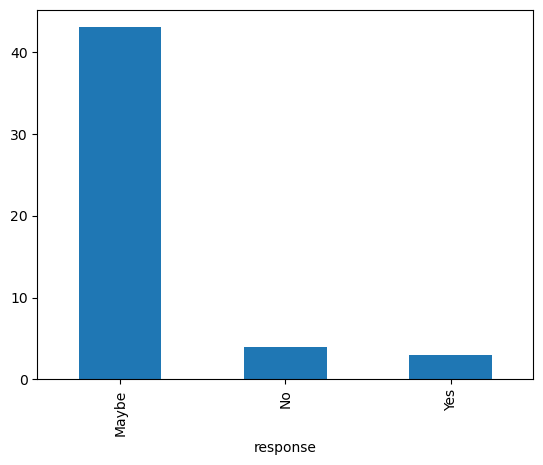

In [18]:
df["response"].value_counts().plot(kind='bar')

In [19]:
is_there_a_good_market(df)

Percentage of 'Yes' responses: 6.00%
Percentage of 'No' responses: 8.00%
Percentage of 'Maybe' responses: 86.00%
Percentage of 'N/A' responses: 0.00%
VERDICT: There is not a good market for bottled gazpacho.


False

## Benchmark: Spain
Naturally, we'll want to compare the results of our market research with the results in Spain, home of Gazpacho.

In [20]:
factory_es = TinyPersonFactory(general_context(nationality="Spanish"))
people_es = factory_es.generate_people(population_size, verbose=True)
control.checkpoint()

market_es = TinyWorld(f"Target audience (Spanish)", people_es, broadcast_if_no_target=False)
market_es.broadcast(interviewer_introduction)
market_es.broadcast(interviewer_main_question)
market_es.run(1)
control.checkpoint()

2025-07-14 16:17:43,215 - tinytroupe - WARNING - Expected 50 samples, but got 71 samples. The LLM may have failed to sum up the quantities in the sampling plan correctly.


2025-07-14 16:18:00,262 - tinytroupe - ERROR - Error generating name for sample 4: Postcondition not met for function <lambda>!


2025-07-14 16:18:10,770 - tinytroupe - ERROR - Error generating name for sample 7: Postcondition not met for function <lambda>!


2025-07-14 16:18:13,900 - tinytroupe - ERROR - Error generating name for sample 8: Postcondition not met for function <lambda>!


2025-07-14 16:19:00,817 - tinytroupe - ERROR - Error generating name for sample 21: Postcondition not met for function <lambda>!


2025-07-14 16:20:06,285 - tinytroupe - ERROR - Error generating name for sample 38: Postcondition not met for function <lambda>!


2025-07-14 16:20:12,990 - tinytroupe - ERROR - Error generating name for sample 40: Postcondition not met for function <lambda>!


2025-07-14 16:20:16,460 - tinytroupe - ERROR - Error generating name for sample 41: Postcondition not met for function <lambda>!


2025-07-14 16:20:21,460 - tinytroupe - ERROR - Error generating name for sample 42: Postcondition not met for function <lambda>!


2025-07-14 16:20:30,383 - tinytroupe - ERROR - Error generating name for sample 44: Postcondition not met for function <lambda>!


2025-07-14 16:21:12,161 - tinytroupe - ERROR - Error generating name for sample 53: Postcondition not met for function <lambda>!


2025-07-14 16:21:31,942 - tinytroupe - ERROR - Error generating name for sample 57: Postcondition not met for function <lambda>!


2025-07-14 16:21:36,864 - tinytroupe - ERROR - Error generating name for sample 58: Postcondition not met for function <lambda>!


2025-07-14 16:22:01,512 - tinytroupe - ERROR - Error generating name for sample 64: Postcondition not met for function <lambda>!


2025-07-14 16:22:05,496 - tinytroupe - ERROR - Error generating name for sample 65: Postcondition not met for function <lambda>!


2025-07-14 16:22:10,551 - tinytroupe - ERROR - Error generating name for sample 66: Postcondition not met for function <lambda>!


2025-07-14 16:22:19,200 - tinytroupe - ERROR - Error generating name for sample 68: Postcondition not met for function <lambda>!


2025-07-14 16:22:28,114 - tinytroupe - ERROR - Error generating name for sample 70: Postcondition not met for function <lambda>!


Generated person 9/50: Carlos Jiménez is a 60 year old Manual Laborer, Mexican, currently living in Guadalajara, Mexico. Carlos Jiménez is a man shaped by his experiences, often reflecting on the challenges he has faced throughout his life. His reserved demeanor masks a deep-seated dedication to his family, as he prioritizes their well-being above all else. Despite his struggles, he finds solace in simple pleasures, such as enjoying a cold beer after a long day or watching local soccer matches, which provide a brief escape from his daily hardships. While he may appear pessimistic, his dry sense of humor occasionally shines through, revealing a resilient spirit that continues to navigate the complexities of life with a sense of quiet determination.


Generated person 5/50: Person_66_unknown is a 50 year old Unemployed, Spanish, currently living in Seville, Spain. Person_66_unknown is a deeply empathetic individual who often finds solace in the simple pleasures of life, such as cooking traditional Spanish meals and listening to local music. His reserved demeanor masks a dry sense of humor that occasionally surfaces, providing a glimpse of his resilience amidst despair. While he tends to withdraw from social interactions, he values the few close relationships he has, particularly with his sister Maria and friend Antonio, who offer him emotional support. Despite his struggles with chronic pain and mental health, he remains resourceful, navigating local markets with a keen understanding of how to make the most of his limited resources.


Generated person 1/50: Person_70_unknown is a 55 year old CEO, American, currently living in San Francisco, California. Person_70_unknown is not only a successful CEO but also a deeply empathetic leader who prioritizes the well-being of his employees. His commitment to ethical business practices is reflected in his strong advocacy for diversity and inclusion within the workplace. Outside of work, he enjoys exploring culinary arts, often experimenting with recipes inspired by his travels to over 30 countries, which fuels his passion for fine dining and cultural experiences. With a strong belief in the importance of education and sustainability, he actively participates in community service and mentors young entrepreneurs, embodying his vision of giving back to society.


Generated person 6/50: Person_65_unknown is a 34 year old Elementary School Teacher, American, currently living in Cleveland, Ohio. Person_65_unknown is not only dedicated to her role as an elementary school teacher but also embodies a warm and approachable personality that resonates with her students and their families. Her passion for education is matched by her love for cooking, particularly experimenting with spicy and international cuisines, which she often integrates into her lessons to foster cultural awareness. Outside the classroom, she actively volunteers at local community centers, reflecting her belief in the importance of community involvement for personal and societal growth. With a cheerful demeanor and a knack for engaging students through creative teaching methods, she strives to create an inclusive and supportive environment where every child can thrive.


Generated person 4/50: Dr. Victor Albright is a 45 year old Senior Research Scientist, American, currently living in San Francisco, California. Dr. Victor Albright is not only dedicated to his research but also deeply committed to fostering a sense of community around environmental issues. His analytical mindset and patience make him an excellent mentor, particularly for younger scientists like his colleague Mark, who often seeks his guidance. Outside of work, Victor enjoys hiking and cycling, often accompanied by his dog Max, and he finds joy in cooking healthy meals that reflect his passion for fresh, organic produce. With a dry sense of humor, he engages in discussions about climate change, advocating for sustainable practices while maintaining a balanced life that prioritizes both personal health and environmental well-being.


Generated person 10/50: Dr. Amelia Sinclair is a 48 year old Senior Research Scientist, American, currently living in San Francisco, California. Dr. Amelia Sinclair is not only dedicated to her research but also embodies a vibrant and engaging personality that draws people to her. With a strong sense of curiosity, she enjoys exploring new ideas and cultures, often sharing her culinary experiments with friends during dinner parties. Her optimistic outlook and belief in the power of collaboration make her a natural mentor, inspiring the next generation of scientists, including her daughter, Emily, who is following in her footsteps. Outside of work, Amelia actively participates in community service and environmental advocacy, reflecting her commitment to promoting sustainability in everyday life.


Generated person 2/50: Julian Alexander Montoya is a 35 year old Visual Artist, American, currently living in New York City, New York. Julian Alexander Montoya is not only a talented visual artist but also a deeply introspective individual who enjoys exploring the intersections of art and political theory. His passion for contemporary art is matched by a love for culinary experiences, particularly Mediterranean and Asian cuisines, which he often experiments with in his kitchen. While he thrives in social settings, engaging in debates about art and politics, he also values his solitude for reflection and creativity. Julian's strong networking skills within the art community and his proficiency in various artistic techniques allow him to articulate complex ideas effectively, making him a compelling figure in discussions about the role of art in society.


Generated person 12/50: Julian Montague is a 35 year old Artist, American, currently living in New York City, New York. Julian Montague is not only a talented artist but also a deeply introspective individual who values meaningful conversations about art and society. His passion for contemporary art is complemented by a keen interest in philosophy and critical theory, which he often explores through reading and discussions with friends. Known for his calm demeanor and dry sense of humor, Julian navigates the pressures of freelance life with a composed attitude, though he occasionally grapples with the impact of his work. He actively engages in community art projects and advocates for mental health awareness in the arts, reflecting his belief that art should challenge societal norms and uplift underrepresented voices.


Generated person 11/50: Elena Vasquez is a 26 year old Artist, American, currently living in Austin, Texas. Elena Vasquez is a vibrant and imaginative artist whose warm personality shines through in her interactions with others. She has a deep appreciation for nature, often drawing inspiration from her outdoor adventures and her multicultural upbringing, which enriches her artistic perspective. In addition to her creative pursuits, Elena is passionate about sustainable living and actively seeks to incorporate eco-friendly practices into her life and art. With a strong sense of empathy, she values community engagement and believes in the power of art to foster social change, often volunteering her time to promote art education and accessibility.


Generated person 8/50: Dr. Samuel Albright is a 45 year old Senior Research Scientist, American, currently living in San Francisco, California. Dr. Samuel Albright is not only dedicated to his research but also embodies a calm and composed demeanor that fosters collaboration within his team. His analytical mindset allows him to tackle complex environmental problems, while his high level of openness keeps him receptive to innovative ideas and solutions. Outside of work, he enjoys hiking and exploring nature, which reflects his deep appreciation for the environment. Samuel also finds joy in cooking healthy meals and experimenting with new recipes, often using fresh, organic produce from local farmers' markets, further aligning his lifestyle with his commitment to sustainability.


Generated person 3/50: Person_68_unknown is a 30 year old CEO, American, currently living in San Francisco, California. Person_68_unknown is not only a dedicated CEO but also a passionate advocate for sustainability and social responsibility. Her empathetic nature and strong sense of justice drive her to mentor young entrepreneurs, helping them navigate the complexities of the business world. With a love for outdoor activities and a commitment to a healthy lifestyle, she often spends her weekends hiking or volunteering at local charities. Her warm and engaging communication style, combined with her belief in the power of innovation, inspires her team and fosters a positive workplace culture.


Generated person 7/50: Person_64_unknown is a 34 year old Elementary School Teacher, American, currently living in Cleveland, Ohio. Person_64_unknown is a warm and approachable individual who thrives on creating a positive and engaging atmosphere in her classroom. Her optimistic nature and empathy allow her to connect deeply with her students, often going above and beyond to support their emotional and educational needs. Outside of teaching, she enjoys cooking and experimenting with international cuisines, often hosting dinner parties that reflect her love for diverse cultures. Additionally, her commitment to community service is evident through her regular volunteering, as she believes in the importance of giving back and advocating for educational reform to support underfunded schools.


Generated person 22/50: Person_57_unknown is a 50 year old Unemployed, Spanish, currently living in Seville, Spain. Person_57_unknown is a deeply introspective individual who often grapples with feelings of sadness and frustration about his current situation. Despite his struggles, he possesses practical skills from years of manual labor, including basic carpentry and gardening, which he values as a connection to his past. He finds solace in traditional Spanish music and enjoys cooking hearty meals, often sharing them with a few close friends, which provides him a sense of community and belonging. Although he tends to avoid social interactions, he cherishes the wisdom of older generations and seeks their advice, reflecting his appreciation for tradition and family values during difficult times.


Generated person 17/50: Person_53_unknown is a 70 year old Unemployed, Spanish, currently living in Seville, Spain. Person_53_unknown embodies a spirit shaped by resilience and a deep connection to his roots. His reserved demeanor often masks a kind-hearted nature, as he finds solace in simple pleasures like gardening and cooking traditional meals, which he shares with those close to him. Despite his struggles with health and a pessimistic outlook on life, he possesses a rich tapestry of stories from his past, reflecting a life filled with both hardship and cherished memories. His appreciation for traditional Spanish music and culture serves as a comforting reminder of the community values he holds dear, even as he navigates the challenges of his current circumstances.


Generated person 16/50: Julian Carter is a 40 year old Manager, American, currently living in San Francisco, California. Julian Carter is not only a dedicated manager but also a pragmatic leader who thrives on collaboration and teamwork. His interests in technology and innovation are complemented by a passion for cooking, where he enjoys experimenting with Mediterranean and Asian cuisines during weekends. Julian values work-life balance, often spending quality time with his supportive spouse, Emily, and engaging in outdoor activities like hiking and biking. With a strong belief in sustainability and diversity, he actively mentors junior employees and volunteers at local community centers, sharing his knowledge of technology and coding with the next generation.


Generated person 19/50: Lucia Morales is a 33 year old Nurse, American, currently living in Los Angeles, California. Lucia Morales is a complex individual who often grapples with her own struggles, leading to a blunt demeanor that can alienate those around her. Despite her challenging circumstances, she possesses a solid foundation of nursing skills and a keen understanding of medical terminology, which she applies in her demanding role at the community hospital. Her interests lean towards the comfort of fast food and reality TV, providing her with a brief escape from the stress of her job and chronic illness. While she often feels overwhelmed and fatigued, her long-term goals reflect a desire for stability and a better quality of life, hinting at a deeper resilience beneath her tough exterior.


Generated person 15/50: Dr. Victor Alonzo is a 45 year old Senior Research Scientist, American, currently living in San Francisco, California. Dr. Victor Alonzo is not only dedicated to his research but also deeply committed to fostering environmental awareness within his community. His analytical mindset and patient demeanor make him an effective mentor, as he enjoys guiding young scientists and engaging in meaningful discussions about the implications of their work. Outside of his professional life, Victor finds joy in hiking and exploring nature, often using these experiences to inspire his research. He also has a passion for cooking, frequently experimenting with healthy recipes that incorporate fresh, organic produce from his own vegetable garden, reflecting his belief in sustainable living.


Generated person 13/50: Dr. Samuel Harrington is a 45 year old Senior Research Scientist, American, currently living in San Francisco, California. Dr. Samuel Harrington is not only dedicated to his research but also deeply committed to fostering a sense of environmental stewardship in his community. His analytical mindset and patient demeanor make him an effective mentor, as he enjoys guiding young scientists and sharing his knowledge. Outside of work, Samuel finds joy in hiking and exploring nature, often using these experiences to inspire his research and cooking healthy meals. He believes that science should be accessible to everyone, and he actively participates in outreach programs to engage the public in discussions about climate change and sustainable practices.


Generated person 14/50: Clara Jiménez is a 22 year old Nurse, Spanish, currently living in Valencia, Spain. Clara Jiménez is not only dedicated to her role as a nurse but also embodies a vibrant and optimistic spirit that resonates with those around her. Her passion for volunteering reflects her belief in accessible healthcare and community support, often leading her to participate in local health initiatives. In her free time, Clara enjoys cooking, particularly experimenting with vegetarian recipes, and she finds joy in sharing meals and laughter with friends and family. With a love for outdoor activities, she frequently explores hiking trails, balancing her professional life with her personal interests to maintain a healthy and fulfilling lifestyle.


Generated person 21/50: Person_58_unknown is a 42 year old CEO, American, currently living in San Francisco, California. Person_58_unknown is not only a dedicated CEO but also a compassionate leader who prioritizes the well-being of his employees and the community. His empathetic nature drives him to engage in philanthropy and sustainability initiatives, reflecting his belief that business should serve a greater purpose. With a strong commitment to continuous learning, he enjoys reading about leadership and personal development, which he often shares with young entrepreneurs he mentors. Outside of work, he embraces an active lifestyle, frequently hiking and cycling, and values quality time spent with his family, fostering a healthy work-life balance.


Generated person 20/50: Lucia Ramirez is a 33 year old Nurse, American, currently living in Los Angeles, California. Lucia Ramirez is a complex individual who often grapples with her own needs and the demands of her profession. While she possesses a strong work ethic instilled by her upbringing, her impulsive nature can lead to moments of frustration, particularly when faced with the challenges of her job and chronic illness. Despite her abrasive demeanor, she has a sarcastic sense of humor that can lighten the mood among friends, especially during late-night outings to bars or fast food joints. Lucia's passion for cooking and dreams of owning a food truck reflect her desire for financial independence and a creative outlet, even as she navigates the pressures of her current lifestyle.


Generated person 24/50: Francisco Javier Ortega is a 70 year old Unemployed, Spanish, currently living in Seville, Spain. Francisco Javier Ortega embodies a deep sense of loyalty and empathy, often prioritizing the needs of his family and friends over his own struggles. His reserved nature is complemented by a rich appreciation for traditional Spanish music and cooking, which serve as comforting connections to his past. Despite his pessimism about the future, he finds solace in nurturing his garden and sharing simple meals with loved ones, cherishing the moments that bring him joy. His experiences have instilled in him a profound understanding of life's hardships, leading him to advocate for the importance of community support for the elderly and those in need.


Generated person 23/50: Sebastian Alarcon is a 35 year old Artist, Spanish, currently living in Barcelona, Spain. Sebastian Alarcon is a deeply introspective individual who thrives in solitude, often immersing himself in his art to explore complex themes. His passion for contemporary art is matched by a keen interest in philosophy and political theory, which he integrates into his work, aiming to provoke thought and challenge societal norms. While he enjoys the culinary arts, particularly experimenting with international cuisines, he prefers quiet cafes where he can sketch or write, away from the distractions of crowded places. Despite the pressures of the art world, he maintains a calm demeanor and a strong sense of individuality, valuing his artistic freedom above commercial success.


Generated person 18/50: Gabriel Alexander Montoya is a 30 year old CEO, American, currently living in San Francisco, California. Gabriel Alexander Montoya is not only a dedicated CEO but also a compassionate leader who believes in the power of collaboration and mentorship. His empathetic nature drives him to actively engage with his team, fostering an environment where everyone feels valued and heard. Outside of work, Gabriel enjoys exploring diverse cultures through travel, which enriches his understanding of global sustainability practices. He is also a passionate cook, often experimenting with healthy recipes and hosting gatherings that reflect his commitment to organic and local produce, further emphasizing his belief in a balanced and responsible lifestyle.


Generated person 30/50: Jasmine Torres is a 31 year old Nurse, American, currently living in Detroit, Michigan. Jasmine is a complex individual who often grapples with the emotional demands of her nursing career, leading to a sharp and sometimes abrasive demeanor. Despite her struggles, she possesses a strong sense of independence and is fiercely protective of her personal space, often preferring to handle her challenges alone. Her interests lean towards the casual and indulgent, as she finds comfort in fast food and reality TV, which serve as her escape from the pressures of daily life. While she may clash with others due to her low agreeableness, her friendships, particularly with David, provide her with a much-needed outlet for venting her frustrations and navigating the complexities of her job and health.


Generated person 32/50: Antonio García is a 50 year old Unemployed, Spanish, currently living in Seville, Spain. Antonio García is a deeply introspective individual who often grapples with feelings of sadness and hopelessness due to his circumstances. His reserved nature makes him prefer quiet evenings at home, where he finds comfort in traditional Spanish music, particularly flamenco, and the aroma of home-cooked meals like paella and gazpacho. Despite his struggles, he possesses a strong sense of loyalty to his family, often reminiscing about better days while helping neighbors with small tasks when he can. Antonio's desire to learn to read and write reflects his determination to improve his situation, even as he feels overwhelmed by the challenges he faces.


Generated person 25/50: Sofia Morales is a 22 year old Nurse, American, currently living in Phoenix, Arizona. Sofia Morales is not only dedicated to her nursing career but also embodies a vibrant and compassionate spirit that resonates with those around her. Her love for nature and outdoor activities, cultivated during her upbringing in a small Arizona town, often leads her to explore hiking trails and biking paths with friends. With a playful sense of humor, she lightens the mood in stressful situations, making her a beloved figure among colleagues and patients alike. Sofia's commitment to community service drives her to volunteer at local shelters and clinics, reflecting her belief that healthcare should be accessible to everyone, and she often shares her passion for vegetarian cooking with friends, creating a warm and inviting atmosphere in her social circles.


Generated person 36/50: Alexander Montgomery is a 30 year old CEO, American, currently living in San Francisco, California. Alexander Montgomery is not only a driven CEO but also a compassionate leader who values the well-being of his team and community. His optimistic outlook and empathetic nature foster a collaborative work environment where innovation thrives. Outside of work, he enjoys exploring new cultures through travel and is an avid fitness enthusiast, often found hiking or cycling on weekends. With a strong commitment to sustainability, he actively participates in community service and believes in mentoring young entrepreneurs, reflecting his dedication to making a positive impact on society.


Generated person 31/50: Person_40_unknown is a 19 year old Student Teacher, American, currently living in Austin, Texas. Person_40_unknown is not only dedicated to her role as a student teacher but also embodies a vibrant and engaging personality that resonates with her students and colleagues alike. Her optimistic outlook and empathetic nature allow her to connect deeply with children, fostering a supportive learning environment. Outside of her teaching responsibilities, she enjoys outdoor activities like hiking and biking, often seeking new vegetarian recipes to try, reflecting her commitment to a healthy lifestyle. With a strong belief in the importance of mental health in education, she actively participates in discussions about educational reform, aiming to inspire change and advocate for equitable access to quality education for all children.


Generated person 33/50: Person_38_unknown is a 30 year old CEO, American, currently living in San Francisco, California. Person_38_unknown is not only a dedicated CEO but also a compassionate leader who values empathy and social responsibility. His passion for sustainable technology is matched by his commitment to mentoring young entrepreneurs, reflecting his belief in the power of education as a catalyst for change. With a charismatic communication style, he engages audiences through storytelling, making complex ideas accessible and inspiring. Outside of work, he enjoys outdoor activities like hiking and cycling, often seeking eco-friendly travel destinations, and he finds joy in cooking healthy meals, believing that nutritious food can also be delicious.


Generated person 27/50: Julian Cortez is a 38 year old Senior Mechanical Engineer, American, currently living in Austin, Texas. Julian Cortez is not only a dedicated Senior Mechanical Engineer but also a kind-hearted individual who values collaboration and community service. His passion for renewable energy extends beyond his professional life, as he actively volunteers with local environmental organizations and participates in community clean-up events. Known for his approachable demeanor, Julian enjoys engaging in thoughtful discussions about technology and sustainability, often using humor to connect with colleagues. In his free time, he finds joy in outdoor activities like hiking and cycling, as well as experimenting with healthy cooking, all while maintaining a balanced lifestyle that prioritizes mental well-being.


Generated person 29/50: Person_41_unknown is a 22 year old Nurse, American, currently living in Phoenix, Arizona. Person_41_unknown is not only dedicated to her nursing career but also embodies a vibrant and optimistic spirit that resonates with those around her. Her love for nature is evident in her weekend hikes and explorations, which she often shares with her best friend Emily. With a passion for vegetarian cooking, she enjoys experimenting with new recipes, often hosting gatherings where she can share her culinary creations. Her cheerful demeanor and strong communication skills make her a natural at connecting with patients and their families, while her belief in accessible healthcare drives her commitment to community support and well-being.


Generated person 35/50: Lucía González is a 25 year old Primary School Teacher, Spanish, currently living in Madrid, Spain. Lucía González is not only dedicated to her role as a teacher but also embodies a warm and approachable personality that resonates with her students and colleagues alike. Her optimism and cheerful demeanor create a positive classroom environment, where she skillfully integrates traditional Spanish culture into her lessons through storytelling and hands-on activities. Outside of the classroom, Lucía enjoys exploring local markets, hiking, and experimenting with new recipes, reflecting her love for cultural experiences and culinary adventures. She is committed to continuous professional development, currently taking online courses to enhance her teaching skills and stay abreast of educational trends, all while maintaining a strong belief in the transformative power of education.


Generated person 34/50: Alessandro Romano is a 35 year old Artist, Italian, currently living in Florence, Italy. Alessandro Romano is not only a talented artist but also a deeply introspective individual who values meaningful conversations about art and society. His passion for social activism is evident in his work, as he seeks to challenge societal norms and provoke thought through his installations and paintings. With a strong belief in the power of cultural exchange, he enjoys traveling to art fairs and immersing himself in diverse cultures, which enriches his creative process. In his downtime, Alessandro finds joy in cooking international cuisines and exploring nature, often using these experiences as inspiration for his art.


Generated person 28/50: Person_42_unknown is a 38 year old Mechanical Engineer, American, currently living in Austin, Texas. Person_42_unknown is not only dedicated to his work but also embodies a kind-hearted and approachable demeanor that makes him a beloved colleague. His passion for sustainable engineering extends beyond the office, as he actively participates in community clean-up events and volunteers at local schools to inspire the next generation. With a strong sense of responsibility, he balances his professional life with outdoor activities like hiking and cycling, which help him manage stress and maintain a healthy lifestyle. In his downtime, he enjoys experimenting with healthy recipes and listening to science and technology podcasts, reflecting his commitment to both personal well-being and continuous learning.


Generated person 26/50: Person_44_unknown is a 30 year old CEO, American, currently living in San Francisco, California. Person_44_unknown is not only a driven CEO but also a compassionate leader who values the well-being of his team and community. His optimistic outlook and strong sense of empathy enable him to connect deeply with others, fostering a collaborative and innovative work environment. Outside of work, he enjoys exploring new cultures through travel, engaging in outdoor activities, and experimenting with gourmet cooking, which reflects his commitment to a healthy lifestyle. With a passion for philanthropy, he actively mentors young entrepreneurs and advocates for sustainable business practices, believing that innovation can address global challenges while contributing positively to society.


Generated person 39/50: Mariana Salazar is a 31 year old Nurse, Mexican, currently living in Guadalajara, Mexico. Mariana Salazar is a complex individual who often grapples with the demands of her profession and personal life. While she can come off as abrasive and critical, her strong sense of justice drives her to advocate for change within the healthcare system, even if her approach is sometimes fueled by frustration. In her downtime, she enjoys the escape of reality TV and the lively atmosphere of local bars, where she can momentarily forget her stresses. Despite her fierce independence, there are moments when she longs for deeper connections, revealing a vulnerability that contrasts with her tough exterior.


Generated person 38/50: Mariana Torres is a 31 year old Nurse, Mexican, currently living in Guadalajara, Mexico. Mariana Torres is a complex individual who often grapples with her own needs and frustrations, which can lead to a confrontational demeanor. Despite her abrasive communication style, she finds solace in the light-hearted escape of reality TV and enjoys the thrill of shopping, even if it strains her finances. Her strong opinions about self-reliance and hard work stem from her challenging upbringing, where financial struggles were a constant presence. While she is skilled in practical nursing, her chronic illness and the demands of her job often leave her feeling overwhelmed, making it difficult for her to balance her responsibilities as a mother and partner.


Generated person 37/50: Rafael Ortega is a 60 year old Manual Laborer, Mexican, currently living in Guadalajara, Mexico. Rafael Ortega is a deeply introspective individual, often reflecting on the challenges life has presented him. Despite his reserved demeanor, he possesses a dry sense of humor that occasionally breaks through, providing a glimpse of his resilience. His love for soccer and traditional Mexican music offers him a sense of connection to his roots and community, while quiet evenings spent with family allow him to recharge after long, demanding workdays. Although he grapples with chronic health issues, Rafael remains dedicated to supporting his family and instills in them the importance of hard work and perseverance, hoping for a brighter future for his children.


Generated person 48/50: Diego Alvarez is a 29 year old Manual Laborer, Mexican, currently living in Guadalajara, Mexico. Diego Alvarez is a dedicated individual who embodies a strong sense of responsibility and community. He finds joy in simple pleasures, such as cooking traditional meals with his family and sharing laughter with coworkers during breaks. His passion for soccer not only fuels his competitive spirit but also serves as a bonding activity with friends and family. Despite the physical demands of his job, Diego maintains a calm demeanor and values honesty and respect in all his relationships, believing that hard work and family are the cornerstones of a fulfilling life.


Generated person 45/50: Lucía Fernández is a 25 year old Primary School Teacher, Spanish, currently living in Madrid, Spain. Lucía Fernández is not only dedicated to her role as a Primary School Teacher but also embodies a warm and approachable personality that resonates with her students and their families. Her enthusiasm for education is matched by her love for Spanish culture, which she seamlessly integrates into her lessons through storytelling and hands-on activities. Outside the classroom, Lucía enjoys exploring Madrid's vibrant cultural scene, cooking traditional dishes, and engaging in outdoor activities like hiking and cycling. With a strong belief in the potential of every child, she actively seeks innovative teaching methods and values inclusivity, aiming to inspire her students to embrace their unique learning journeys.


Generated person 44/50: Victoria Harrington is a 30 year old CEO, American, currently living in San Francisco, California. Victoria Harrington is not only a dedicated CEO but also a passionate advocate for sustainability and social responsibility. Her empathetic nature allows her to connect deeply with her team, fostering a collaborative and supportive work environment. Outside of her professional life, she enjoys exploring new cultures through travel, which enriches her perspective on global sustainability practices. An avid cook, Victoria often experiments with organic ingredients, reflecting her commitment to healthy living and her belief in the importance of mindful eating.


Generated person 42/50: Ethan Harrington is a 38 year old Senior Engineer, American, currently living in Austin, Texas. Ethan Harrington is not only dedicated to his work in sustainable engineering but also embodies a kind-hearted and approachable personality that makes him a natural mentor. His passion for renewable energy extends beyond the office, as he actively volunteers for community clean-up events and enjoys engaging in discussions about technology's role in society. In his free time, Ethan loves exploring the outdoors, whether it's hiking local trails or cycling for charity, and he often shares his culinary skills by cooking healthy meals for friends and family. With a strong belief in the importance of education and collaboration, he strives to inspire the next generation of engineers while maintaining a balanced lifestyle that includes personal growth and reflection.


Generated person 41/50: Dr. Alejandro Montoya is a 48 year old Senior Research Scientist, Spanish, currently living in Barcelona, Spain. Dr. Alejandro Montoya is not only a dedicated scientist but also a warm and approachable individual who thrives on collaboration and communication. His high level of curiosity drives him to explore new ideas, whether in the lab or through his love for travel and diverse cuisines. Outside of work, he enjoys cooking elaborate meals and experimenting with new recipes, often sharing these culinary adventures with his supportive spouse, Lucia. With a strong belief in the importance of education and ethical research, Alejandro actively volunteers to promote STEM education in local schools, inspiring the next generation of scientists while maintaining a healthy work-life balance.


Generated person 40/50: Jonathan Alexander Sinclair is a 55 year old CEO, American, currently living in San Francisco, California. Jonathan Alexander Sinclair is not only a dedicated CEO but also a kind-hearted individual who genuinely cares for his employees' well-being. His charismatic and approachable style fosters an environment of open dialogue and collaboration, where he encourages feedback and values humor to create a positive atmosphere. Outside of work, Jonathan is passionate about philanthropy, often volunteering at local charities and mentoring young entrepreneurs, reflecting his belief that business should be a force for good in society. An avid traveler and culinary enthusiast, he enjoys exploring diverse cultures and cuisines, often experimenting with new recipes at home, which he shares with his family, including his talented chef wife, Emily.


Generated person 46/50: Mateo Garcia is a 28 year old Engineer, Spanish, currently living in Barcelona, Spain. Mateo Garcia is not only dedicated to his engineering career but also embodies a kind-hearted and optimistic spirit that resonates in his personal life. He enjoys exploring new cultures through travel, which complements his passion for sustainability, as he learns about different approaches to environmental responsibility. In his free time, Mateo loves cooking healthy, gluten-free meals and often hosts dinner parties where he shares his culinary creations with friends and family. His commitment to community service is evident through his regular volunteering efforts, and he thrives in collaborative environments, fostering strong relationships with colleagues and loved ones alike.


Generated person 47/50: Oliver Kensington is a 48 year old Senior Research Scientist, British, currently living in Cambridge, England. Oliver Kensington is not only a dedicated scientist but also a vibrant individual with a zest for life. His curiosity extends beyond the lab, as he enjoys exploring international cuisines and often experiments with new recipes, sharing his culinary creations with colleagues and family alike. An advocate for education and community engagement, he regularly volunteers at local schools to inspire young minds, believing that science should be accessible to everyone. With a strong commitment to sustainability and diversity in research, Oliver embodies an optimistic spirit that encourages collaboration and innovation in his field.


Generated person 43/50: Rafael Mendoza is a 60 year old Manual Laborer, Mexican, currently living in Guadalajara, Mexico. Rafael Mendoza is a deeply introspective individual, often reflecting on his life choices and the challenges he has faced. His reserved nature makes him more comfortable in solitude, where he finds solace in simple pleasures like watching soccer matches or enjoying traditional Mexican music. Despite his struggles, he possesses a dry sense of humor that occasionally surfaces, providing a glimpse of resilience beneath his somber exterior. Rafael's strong work ethic and resourcefulness shine through in his ability to tackle various manual tasks, yet he remains acutely aware of the harsh realities of life, believing that community support is vital for those enduring financial hardships.


Generated person 49/50: Lucas Bennett is a 28 year old Engineer, American, currently living in Austin, Texas. Lucas Bennett is not only dedicated to his work as a mechanical engineer but also embodies a kind-hearted and optimistic spirit that resonates with those around him. His curiosity drives him to explore new technologies and engage in meaningful discussions about sustainability, often lightening the mood with his sense of humor. Outside of work, Lucas enjoys outdoor activities like hiking and cycling, which he often shares with his girlfriend, Emma, and his loyal dog, Max. He is also passionate about cooking, particularly gluten-free meals, and frequently experiments with new recipes, all while maintaining a strong commitment to community service and environmental causes.


Generated person 50/50: Person_21_unknown is a 29 year old Manual Laborer, American, currently living in Cleveland, Ohio. Person_21_unknown is a reliable and hardworking individual who takes pride in his craft, often going the extra mile to assist his coworkers and foster a strong team spirit. He enjoys outdoor activities like hiking and fishing, which provide a refreshing break from his physically demanding job. With a passion for woodworking, he often channels his creativity into DIY home improvement projects, crafting furniture pieces that add a personal touch to his living space. In his downtime, he values quality moments with family and friends, often hosting barbecues or game nights, and finds joy in mentoring younger workers, sharing his knowledge and experiences to help them grow in their trades.


USER --> Carlos Jiménez: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please present yourself and also list your top-10 interests?

       + --> Person_66_unknown

       + --> Person_70_unknown

       + --> ...others...

USER --> Carlos Jiménez: [CONVERSATION] 
          >       Would you buy bottled gazpacho if you went to the supermarket today? Why yes, or
          > why not?      Please be honest, we are not here to judge you, but just to learn from
          > you.      We know these choices depend on many factors, but please make your best guess,
          > consider your current      situation in life, location, job and interests, and tell us
          > whether you would buy bottled gazpacho      or not. To make it easier, start your
          > response with "Yes, ", "No, " or "Maybe, ".

       + --> Person_66_unknown

       + --> Person_70_unknown

       + --> ...others...

────────────────────────────────────── Target audience (Spanish) step 1 of 1 ──────────────────────────────────────

Carlos Jiménez acts: [TALK] 
                    > Hello, my name is Carlos Jiménez. I am a 60-year-old manual laborer living in
                    > Guadalajara, Mexico. I work on various construction sites, and my job is
                    > physically demanding. My top interests include watching soccer matches,
                    > listening to traditional Mexican music, and spending time with my family
                    > during holidays. I also enjoy simple pleasures like a cold beer after work and
                    > quiet evenings at home. I prefer routine and tend to avoid crowded places. I
                    > hope this gives you a better understanding of me.

Person_70_unknown acts: [TALK] 
                       > Hello! I'm the CEO of Tech Innovations Inc., where I oversee our strategic
                       > direction and operations. I have a strong passion for technology and
                       > innovation, and I believe in the importance of ethical business practices.
                       > Here are my top-10 interests: 1. Technology and innovation, 2.
                       > Philanthropy, 3. Traveling, 4. Culinary arts, 5. Reading business
                       > literature, 6. Exploring new cultures, 7. Networking with young
                       > entrepreneurs, 8. Community service, 9. Fine dining experiences, 10.
                       > Attending tech conferences.

Dr. Samuel Albright acts: [TALK] 
                         > Hello! I'm Dr. Samuel Albright, a Senior Research Scientist at GreenTech
                         > Innovations. My work focuses on developing sustainable technologies for
                         > urban environments, and I'm passionate about climate change research.
                         > Here are my top-10 interests: 1. Environmental science 2. Sustainable
                         > technology 3. Hiking and outdoor activities 4. Cooking healthy meals 5.
                         > Reading scientific literature 6. Community engagement in environmental
                         > initiatives 7. Renewable energy solutions 8. Urban ecology 9. Mentoring
                         > young scientists 10. Exploring innovative solutions to environmental
                         > problems.

Person_68_unknown acts: [TALK] 
                       > Hello! I'm the CEO of Tech Innovations Inc., where we focus on developing
                       > eco-friendly technology solutions. I'm passionate about sustainable
                       > practices and mentoring young entrepreneurs. My top 10 interests include:
                       > 1. Sustainable technology, 2. Philanthropy, 3. Traveling to new cultures,
                       > 4. Yoga and wellness, 5. Reading about leadership and innovation, 6.
                       > Outdoor activities like hiking and cycling, 7. Attending workshops on
                       > sustainability, 8. Exploring new cuisines, 9. Cooking healthy meals, and
                       > 10. Volunteering at local charities.

Dr. Amelia Sinclair acts: [TALK] 
                         > Hello! I'm Dr. Amelia Sinclair, a Senior Research Scientist at the Global
                         > Environmental Institute. I lead a team studying the effects of climate
                         > change on various ecosystems. My top-10 interests include: 1.
                         > Environmental conservation, 2. Traveling to experience different
                         > cultures, 3. Cooking and trying international cuisines, 4. Reading
                         > scientific literature and fiction, 5. Participating in community service,
                         > 6. Hiking and outdoor activities, 7. Gardening and growing my own herbs
                         > and vegetables, 8. Engaging discussions about science and policy, 9.
                         > Volunteering for environmental causes, and 10. Learning about sustainable
                         > practices.

Person_65_unknown acts: [TALK] 
                       > Hello! I'm an elementary school teacher from Cleveland, Ohio. I focus on
                       > creating engaging lesson plans for my third-grade students, often
                       > incorporating international cuisines to teach cultural awareness. My top 10
                       > interests include: 1. Cooking and trying out new recipes from different
                       > cultures, 2. Volunteering at local community centers, 3. Reading
                       > educational literature and children's books, 4. Exploring nature and hiking
                       > in nearby parks, 5. Engaging in community events and activities, 6.
                       > Listening to upbeat music while cooking, 7. Spending time with friends and
                       > family, 8. Advocating for educational reforms, 9. Traveling to experience
                       > different cultures, and 10. Learning about diverse educational practices.

Elena Vasquez acts: [TALK] 
                   > Hello! I'm Elena Vasquez, a 26-year-old freelance artist based in Austin,
                   > Texas. I create and sell my artwork online and at local galleries, often
                   > exploring themes of nature and identity. My top 10 interests include: 1.
                   > Painting and drawing, 2. Visiting art galleries and museums, 3. Sustainable
                   > living practices, 4. Yoga and mindfulness, 5. Cooking and experimenting with
                   > vegetarian recipes, 6. Nature walks and outdoor activities, 7. Attending art
                   > workshops and community events, 8. Listening to indie music and podcasts about
                   > creativity, 9. Engaging in online art communities, and 10. Volunteering at
                   > local non-profits that promote art education.

Person_66_unknown acts: [TALK] 
                       > I am a 50-year-old man from Seville, Spain. Currently, I am unemployed and
                       > struggling to find work. I have practical skills in manual labor and basic
                       > cooking, and I enjoy traditional Spanish music and cooking simple meals. My
                       > top interests include: 1. Traditional Spanish music, 2. Cooking simple
                       > meals, 3. Spending time in local markets, 4. Visiting local parks, 5.
                       > Listening to the sounds of the neighborhood, 6. Engaging in light cooking
                       > or gardening, 7. Reminiscing about better times, 8. Watching television to
                       > escape reality, 9. Connecting with community resources, and 10. Enjoying
                       > quiet evenings at home.

Person_64_unknown acts: [TALK] 
                       > Hello! I'm an elementary school teacher from Cleveland, Ohio. I teach third
                       > grade at a public school in a lower-income neighborhood, and I'm passionate
                       > about creating an inclusive and engaging learning environment for my
                       > students. My top 10 interests include: 1. Cooking and trying out new
                       > recipes, 2. Volunteering at local community centers, 3. Reading educational
                       > literature and children's books, 4. Exploring local parks and nature
                       > trails, 5. Attending cultural festivals and events, 6. Crafting and DIY
                       > projects for the classroom, 7. Traveling to experience different cultures
                       > through food, 8. Engaging in community events to support local initiatives,
                       > 9. Spending time with friends and family, and 10. Learning about
                       > educational reform to support underfunded schools.

Julian Alexander Montoya acts: [TALK] 
                              > Hello, I'm Julian Alexander Montoya, a visual artist based in New
                              > York City. My work often challenges societal norms and explores
                              > themes of nationalism and identity. I have a Master's in Fine Arts
                              > from Columbia University, and I enjoy engaging in deep discussions
                              > about art and politics. My top 10 interests include: 1. Contemporary
                              > art, 2. Political theory, 3. Traveling to art exhibitions, 4.
                              > Culinary experiences from different cultures, 5. Visiting art
                              > galleries and museums, 6. Engaging in discussions about politics and
                              > art, 7. Collecting unique art pieces from emerging artists, 8.
                              > Exploring the socio-political implications of art, 9. Experimenting
                              > with international recipes, and 10. Participating in workshops with
                              > other artists.

Julian Montague acts: [TALK] 
                     > Hello, I'm Julian Montague, a freelance artist based in New York City. My
                     > work often critiques social and political issues through provocative
                     > installations. I have a Master's in Fine Arts from Columbia University, and I
                     > enjoy collaborating with other artists and participating in community art
                     > projects. My top ten interests include: 1. Contemporary art, 2. Traveling to
                     > art fairs and exhibitions, 3. Philosophy and critical theory, 4. Culinary
                     > arts, especially international cuisines, 5. Exploring new restaurants that
                     > offer organic and sustainable options, 6. Attending gallery openings and art
                     > talks, 7. Reading books on art history and theory, 8. Listening to ambient
                     > music while working, 9. Volunteering at local art programs for
                     > underprivileged youth, and 10. Engaging in thoughtful discussions about art
                     > and politics with friends.

Dr. Victor Albright acts: [TALK] 
                         > Hello! I'm Dr. Victor Albright, a Senior Research Scientist at GreenTech
                         > Innovations. My work focuses on developing sustainable technologies for
                         > urban environments. I have a Ph.D. in Environmental Science from Stanford
                         > University, and I'm passionate about climate change research and
                         > advocating for sustainable practices. Here are my top-10 interests: 1.
                         > Environmental science, 2. Sustainable technology, 3. Hiking and nature,
                         > 4. Cooking healthy meals, 5. Reading non-fiction, especially on science
                         > and history, 6. Volunteering for local environmental initiatives, 7.
                         > Attending lectures on sustainability, 8. Mentoring young scientists, 9.
                         > Exploring eco-friendly solutions, 10. Documentaries about nature and
                         > science.

Dr. Samuel Albright acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if I went to the
                         > supermarket today. I appreciate healthy and fresh options, and gazpacho
                         > aligns with my interest in cooking healthy meals. However, I would also
                         > think about the quality of the ingredients and whether it’s made from
                         > organic produce. If it meets those criteria, I might be inclined to
                         > purchase it, especially during warmer months when a refreshing cold soup
                         > is appealing.

Person_70_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket. I enjoy trying new culinary experiences, especially those that
                       > reflect different cultures. However, I would also think about the quality
                       > and ingredients of the product. If it aligns with my preference for healthy
                       > eating and is made with fresh ingredients, I might go for it. Otherwise, I
                       > might prefer to make it myself at home, as I enjoy cooking and
                       > experimenting with recipes.

Carlos Jiménez acts: [TALK] 
                    > No, I wouldn't buy bottled gazpacho if I went to the supermarket today. I
                    > prefer fresh food, and I find that homemade gazpacho tastes much better than
                    > anything in a bottle. Plus, I usually stick to simple meals and ingredients
                    > that I can prepare myself. Bottled options feel a bit too fancy for my taste,
                    > and I like to keep things straightforward, especially with my current
                    > financial situation. I need to be mindful of my spending, so I would rather
                    > invest in ingredients I can use for multiple meals.

Person_68_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket. I appreciate healthy and convenient food options, and gazpacho
                       > aligns with my interest in organic and nutritious meals. However, I would
                       > also think about the packaging and whether it aligns with my values
                       > regarding sustainability. If the product is eco-friendly and made with
                       > high-quality ingredients, I would be more inclined to purchase it.

Dr. Amelia Sinclair acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if I saw it in the
                         > supermarket. I enjoy trying new foods, especially those that are healthy
                         > and align with my interest in fresh, organic produce. However, I would
                         > also think about the ingredients and whether it’s made with high-quality,
                         > natural ingredients. If it fits my values of sustainability and health, I
                         > might go for it!

Person_65_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket. I enjoy trying new foods, especially international cuisines,
                       > and gazpacho is a refreshing option, especially in warmer weather. However,
                       > I would also think about the ingredients and whether it aligns with my
                       > preference for fresh and healthy options. If it seemed like a good quality
                       > product, I might give it a try!

Elena Vasquez acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket.
                   > I enjoy fresh and healthy foods, and gazpacho is a refreshing option,
                   > especially in the warmer months. However, I would also think about the
                   > ingredients and whether it aligns with my preference for organic and locally
                   > sourced products. If it seemed like a good quality product, I might give it a
                   > try!

Julian Montague acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                     > today. I appreciate fresh and healthy options, and gazpacho aligns with my
                     > preference for culinary arts and organic ingredients. However, I would also
                     > weigh factors like the quality of the product, whether it uses sustainable
                     > ingredients, and if it fits into my current meal plans. If I find a brand
                     > that meets my standards, I might go for it.

Person_64_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I went to the
                       > supermarket today. I enjoy trying new foods and flavors, especially
                       > international cuisines. However, it would depend on a few factors like the
                       > price, the ingredients, and whether it looks fresh and appealing. Since I
                       > often prioritize healthy eating, I would want to make sure it aligns with
                       > my dietary preferences. If it seems like a good option, I might just grab
                       > it!

Dr. Victor Albright acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if it aligns with my
                         > values of healthy eating and sustainability. I appreciate fresh, organic
                         > produce, and if the bottled version is made with high-quality ingredients
                         > and environmentally friendly packaging, it could be a convenient option
                         > for a quick meal. However, I would also prefer to make my own gazpacho
                         > using seasonal vegetables from local farmers' markets whenever possible.
                         > It really depends on the quality and the brand's commitment to
                         > sustainability.

Person_66_unknown acts: [TALK] 
                       > No, I wouldn't buy bottled gazpacho if I went to the supermarket today. I
                       > prefer making it fresh at home using simple ingredients. It reminds me of
                       > my childhood and the traditional meals my family used to prepare. Plus, I
                       > find that homemade gazpacho tastes much better than the bottled versions.
                       > Given my current situation, I also try to save money where I can, and
                       > making my own meals is a way to do that.

Julian Alexander Montoya acts: [TALK] 
                              > Maybe, I would consider buying bottled gazpacho if I were at the
                              > supermarket today. I appreciate fresh and healthy options, and
                              > gazpacho aligns with my interest in culinary experiences from
                              > different cultures. However, I would also think about the quality
                              > and ingredients of the product. If it’s made with fresh, organic
                              > ingredients, I might be more inclined to purchase it. Otherwise, I
                              > might prefer to make it myself at home, as I enjoy experimenting
                              > with international recipes.

Dr. Samuel Albright acts: [TALK] 
                         > I appreciate the opportunity to share my thoughts! If you have any more
                         > questions or need further insights, feel free to ask. I'm here to help
                         > with the market research.

Person_70_unknown acts: [TALK] 
                       > I appreciate the opportunity to share my thoughts! If you have any more
                       > questions or need further insights, feel free to ask. I'm here to help with
                       > your market research.

Elena Vasquez acts: [DONE] 

Carlos Jiménez acts: [TALK] 
                    > I understand that you are looking for insights into my preferences and
                    > interests. I appreciate the opportunity to share. If you have any more
                    > questions or need further information, feel free to ask!

Person_68_unknown acts: [TALK] 
                       > I appreciate the opportunity to share my thoughts! I believe that market
                       > research is essential for understanding consumer preferences, and I'm happy
                       > to contribute. If you have any more questions or need further insights,
                       > feel free to ask!

Person_66_unknown acts: [DONE] 

Person_65_unknown acts: [TALK] 
                       > I appreciate the opportunity to share my thoughts! If you have any more
                       > questions or need further insights, feel free to ask!

2025-07-14 16:29:06,542 - tinytroupe - WARNING - [Julian Montague] Action similarity is too high (0.8591549295774648), replacing it with DONE.


Julian Montague acts: [DONE] 

Julian Alexander Montoya acts: [TALK] 
                              > I appreciate the opportunity to share my thoughts. I believe that
                              > food choices, like art, reflect our values and experiences. I would
                              > be interested to know how others perceive bottled gazpacho and its
                              > place in the market. It’s fascinating how culinary trends can mirror
                              > societal shifts, much like the themes I explore in my art.

Dr. Amelia Sinclair acts: [TALK] 
                         > Hello! I'm Dr. Amelia Sinclair, a Senior Research Scientist at the Global
                         > Environmental Institute. I lead a team studying the effects of climate
                         > change on various ecosystems. My top-10 interests include: 1.
                         > Environmental conservation, 2. Traveling to experience different
                         > cultures, 3. Cooking and trying international cuisines, 4. Reading
                         > scientific literature and fiction, 5. Participating in community service,
                         > 6. Hiking and outdoor activities, 7. Gardening and growing my own herbs
                         > and vegetables, 8. Engaging discussions about science and policy, 9.
                         > Volunteering for environmental causes, and 10. Learning about sustainable
                         > practices.

Dr. Victor Albright acts: [TALK] 
                         > I appreciate the opportunity to share my thoughts! As a scientist focused
                         > on sustainability, I often think about the environmental impact of my
                         > choices, including food. If bottled gazpacho is made with organic
                         > ingredients and packaged sustainably, it could be a good option for a
                         > quick meal. However, I generally prefer fresh, homemade versions when I
                         > have the time to prepare them. Thank you for considering my perspective!

Person_64_unknown acts: [TALK] 
                       > Yes, I would definitely buy bottled gazpacho if I went to the supermarket
                       > today! I love trying new flavors and international cuisines, and gazpacho
                       > is a refreshing option, especially during warmer months. Plus, it's healthy
                       > and fits well with my focus on nutritious eating. If I see a good brand
                       > with fresh ingredients, I would be excited to add it to my cart!

Dr. Samuel Albright acts: [DONE] 

Carlos Jiménez acts: [DONE] 

Person_68_unknown acts: [DONE] 

Person_65_unknown acts: [DONE] 

Person_70_unknown acts: [DONE] 

Dr. Victor Albright acts: [DONE] 

Julian Alexander Montoya acts: [DONE] 

2025-07-14 16:29:12,413 - tinytroupe - WARNING - [Person_64_unknown] Action similarity is too high (0.9694444444444444), replacing it with DONE.


Person_64_unknown acts: [DONE] 

Dr. Amelia Sinclair acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if I saw it in the
                         > supermarket. I enjoy trying new foods, especially those that are healthy
                         > and align with my interest in fresh, organic produce. However, I would
                         > also think about the ingredients and whether it’s made with high-quality,
                         > natural ingredients. If it fits my values of sustainability and health, I
                         > might go for it!

Person_57_unknown acts: [TALK] 
                       > Hello, I am a 50-year-old man from Seville, Spain. I am currently
                       > unemployed and have been struggling to find work due to health issues and a
                       > lack of formal education. My interests include traditional Spanish music,
                       > local community events, and cooking and sharing meals with others. I enjoy
                       > simple, hearty meals like paella and gazpacho, and I like spending time in
                       > local markets and listening to stories from older generations. I dislike
                       > fast food and crowded places that make me feel anxious, as well as
                       > conversations about politics that lead to conflict. My top-10 interests
                       > would be: 1. Traditional Spanish music, 2. Local community events, 3.
                       > Cooking, 4. Sharing meals, 5. Spending time in local markets, 6. Listening
                       > to stories from older generations, 7. Gardening, 8. Carpentry, 9. Attending
                       > local festivals, 10. Quiet walks in the park.

Julian Carter acts: [TALK] 
                   > Hello! I'm Julian Carter, a manager at Tech Innovations Inc. I oversee project
                   > teams and ensure we deliver innovative technology solutions. My top-10
                   > interests include: 1. Technology and innovation, 2. Traveling to new countries,
                   > 3. Cooking and trying new recipes, 4. Outdoor activities like hiking and
                   > cycling, 5. Reading business and leadership books, 6. Attending tech
                   > conferences, 7. Exploring international cuisines, 8. Volunteering at community
                   > centers, 9. Spending time with family, and 10. Learning about sustainable
                   > business practices.

Person_53_unknown acts: [TALK] 
                       > I am a 70-year-old man living in Seville, Spain. I have been unemployed for
                       > several years due to health issues that prevent me from continuing my
                       > previous work in agriculture. I often feel a sense of loss and frustration
                       > about my inability to contribute. My interests include listening to
                       > traditional Spanish music, gardening, and cooking simple meals. I enjoy
                       > sharing stories from my life experiences and appreciate the warmth of the
                       > sun on my skin. My top-10 interests would be: 1. Gardening, 2. Cooking, 3.
                       > Listening to traditional music, 4. Spending time outdoors, 5. Sharing meals
                       > with others, 6. Attending local community events, 7. Reminiscing about the
                       > past, 8. Watching the sunset, 9. Spending time with family, and 10.
                       > Enjoying quiet evenings.   Regarding bottled gazpacho, No, I wouldn't buy
                       > it. I prefer making my own gazpacho with fresh ingredients from the market.
                       > It reminds me of my childhood and the traditional ways of cooking that I
                       > cherish. Plus, I find that homemade food tastes much better than store-b
                       > (...)

Dr. Victor Alonzo acts: [TALK] 
                       > Hello! I'm Dr. Victor Alonzo, a Senior Research Scientist at GreenTech
                       > Innovations. My work focuses on developing sustainable urban solutions, and
                       > I have a Ph.D. in Environmental Science from Stanford University. My top 10
                       > interests include: 1. Environmental science, 2. Sustainable living, 3.
                       > Hiking and outdoor activities, 4. Cooking healthy meals, 5. Reading
                       > scientific literature, 6. Community outreach for environmental education,
                       > 7. Attending science conferences, 8. Exploring new cuisines, 9. Gardening,
                       > and 10. Engaging in discussions about science and policy.

Lucia Morales acts: [TALK] 
                   > I’m Lucia Morales, a nurse working at a local community hospital in Los
                   > Angeles. My job can be quite overwhelming, and I often feel drained by the end
                   > of the day. As for my interests, I enjoy fast food and convenience meals,
                   > watching reality TV shows, and browsing social media for entertainment. I also
                   > like late-night snacks and comfortable clothing like sweatpants and hoodies. I
                   > dislike healthy food options and people who are overly optimistic.   Regarding
                   > the bottled gazpacho, No, I wouldn't buy it. I prefer quick and easy meals, and
                   > I don't think I would find bottled gazpacho appealing or convenient for my
                   > lifestyle. Plus, I often indulge in fast food instead, so it wouldn't fit into
                   > my routine.

Dr. Amelia Sinclair acts: [TALK] 
                         > Hello! I'm Dr. Amelia Sinclair, a Senior Research Scientist at the Global
                         > Environmental Institute. I lead a team studying the effects of climate
                         > change on various ecosystems. My top-10 interests include: 1.
                         > Environmental conservation, 2. Traveling to experience different
                         > cultures, 3. Cooking and trying international cuisines, 4. Reading
                         > scientific literature and fiction, 5. Participating in community service,
                         > 6. Hiking and outdoor activities, 7. Gardening and growing my own herbs
                         > and vegetables, 8. Engaging discussions about science and policy, 9.
                         > Volunteering for environmental causes, and 10. Learning about sustainable
                         > practices.

Person_57_unknown acts: [TALK] 
                       > No, I wouldn't buy bottled gazpacho if I went to the supermarket today. I
                       > prefer making it fresh at home, as I enjoy cooking and sharing meals with
                       > others. Bottled versions often don't taste as good as homemade, and I like
                       > to use fresh ingredients from local markets. Plus, with my current
                       > financial situation, I try to save money where I can, and making my own
                       > meals is usually more economical for me.

Dr. Samuel Harrington acts: [TALK] 
                           > Hello, I'm Dr. Samuel Harrington, a Senior Research Scientist at
                           > GreenTech Innovations. My work focuses on developing sustainable urban
                           > solutions, and I have a Ph.D. in Environmental Science from Stanford
                           > University. My top-10 interests include: 1. Environmental science, 2.
                           > Sustainable living, 3. Hiking and outdoor activities, 4. Cooking
                           > healthy meals, 5. Reading non-fiction, especially on science and
                           > technology, 6. Engaging in community service related to environmental
                           > conservation, 7. Attending science conferences and workshops, 8.
                           > Exploring new cuisines and cooking techniques, 9. Analyzing data for
                           > research, and 10. Mentoring the next generation of scientists.

Julian Carter acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket.
                   > I enjoy trying new recipes and flavors, and gazpacho is a refreshing option,
                   > especially during warmer months. However, I would also think about the quality
                   > of the product and whether it aligns with my preference for fresh and healthy
                   > foods. If it seemed like a good quality option, I might go for it!

Person_58_unknown acts: [TALK] 
                       > Hello! I'm the CEO of Tech Innovations Inc., where we focus on sustainable
                       > tech solutions. My top interests include technology and innovation,
                       > sustainability and environmental issues, philanthropy and community
                       > service, traveling and exploring new cultures, fitness and healthy living,
                       > organic food and farm-to-table dining, outdoor activities like hiking and
                       > cycling, reading books on leadership and personal development, attending
                       > tech conferences and networking events, and spending quality time with
                       > family and friends.

Clara Jiménez acts: [TALK] 
                   > Hello! I'm Clara Jiménez, a 22-year-old nurse from Valencia, Spain. I work at
                   > the Hospital Universitario de Valencia, primarily in the pediatric ward, where
                   > I provide care to young patients and support their families. My top 10
                   > interests include: 1. Volunteering for health-related causes, 2. Cooking and
                   > experimenting with vegetarian recipes, 3. Outdoor activities like hiking and
                   > cycling, 4. Attending music festivals and cultural events, 5. Reading
                   > contemporary fiction, 6. Spending time with friends and family, 7. Listening to
                   > upbeat music while cooking, 8. Exploring new places, 9. Engaging in mindfulness
                   > practices, and 10. Learning about different cultures.

Person_57_unknown acts: [DONE] 

Sebastian Alarcon acts: [TALK] 
                       > Hello, I'm Sebastian Alarcon, a freelance artist based in Barcelona. My
                       > work often explores themes of identity, politics, and social issues. I have
                       > a Master's in Fine Arts from the Universidad de Barcelona, and I specialize
                       > in contemporary painting and installation art. As for my top-10 interests,
                       > they include: 1. Contemporary art, 2. Traveling to art exhibitions, 3.
                       > Exploring different cultures, 4. Philosophy and political theory, 5.
                       > Culinary arts, especially international cuisines, 6. Documentaries about
                       > art and culture, 7. Engaging in deep discussions about art and politics, 8.
                       > Attending art openings and discussions, 9. Experimenting with different
                       > painting techniques, and 10. Supporting local artists.

Francisco Javier Ortega acts: [TALK] 
                             > Hello, my name is Francisco Javier Ortega. I am 70 years old and
                             > currently unemployed. I have a background in manual labor,
                             > particularly in agriculture, but due to health issues, I can no
                             > longer work. My interests include traditional Spanish music,
                             > especially flamenco, gardening, and cooking simple, traditional
                             > dishes. I enjoy home-cooked meals that remind me of my childhood,
                             > quiet evenings spent reminiscing with family, and the smell of fresh
                             > herbs and spices. I dislike fast food and loud environments. My
                             > top-10 interests would be: 1. Traditional Spanish music, 2.
                             > Gardening, 3. Cooking, 4. Family gatherings, 5. Quiet evenings, 6.
                             > Nature walks, 7. Reading, 8. Local community events, 9. Sharing
                             > stories, 10. Learning about traditional cooking methods.

Lucia Ramirez acts: [TALK] 
                   > Hi there! I'm Lucia Ramirez, a 33-year-old nurse living in Los Angeles. I work
                   > at a local community hospital, and my job can be quite demanding. As for my
                   > interests, here are my top 10: 1. Fast food and cooking, 2. Reality TV shows,
                   > 3. Social media and online communities, 4. Shopping for clothes and
                   > accessories, 5. Spending time with friends, 6. Trying new restaurants, 7.
                   > Exploring local food trucks, 8. Watching movies, 9. Attending concerts, and 10.
                   > Traveling when I can.   Regarding the bottled gazpacho, maybe. I might consider
                   > it if I'm in the mood for something refreshing, but honestly, I usually prefer
                   > making my own food or grabbing something quick and easy. Plus, I tend to lean
                   > towards fast food, so it really depends on my cravings at the moment.

Dr. Victor Alonzo acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I went to the
                       > supermarket today. I appreciate healthy and fresh foods, and gazpacho
                       > aligns with my interest in cooking healthy meals. However, I prefer to make
                       > my own when I have the time, as I enjoy experimenting with recipes and
                       > using fresh, organic produce from my garden. If I were in a hurry or
                       > looking for convenience, I might opt for the bottled version, but it would
                       > depend on the ingredients and quality of the product.

2025-07-14 16:29:25,476 - tinytroupe - WARNING - [Person_53_unknown] Action similarity is too high (1), replacing it with DONE.


Person_53_unknown acts: [DONE] 

Julian Carter acts: [TALK] 
                   > I appreciate the opportunity to share my thoughts! If you have any more
                   > questions or need further insights, feel free to ask!

2025-07-14 16:29:26,040 - tinytroupe - WARNING - [Lucia Morales] Action similarity is too high (1), replacing it with DONE.


Lucia Morales acts: [DONE] 

Dr. Amelia Sinclair acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if I saw it in the
                         > supermarket. I enjoy trying new foods, especially those that are healthy
                         > and align with my interest in fresh, organic produce. However, I would
                         > also think about the ingredients and whether it’s made with high-quality,
                         > natural ingredients. If it fits my values of sustainability and health, I
                         > might go for it!

Dr. Samuel Harrington acts: [TALK] 
                           > Maybe, I would consider buying bottled gazpacho if I went to the
                           > supermarket today. I appreciate healthy and fresh options, and gazpacho
                           > aligns with my interest in cooking healthy meals. However, I would also
                           > think about the quality of the product and whether it uses organic
                           > ingredients. If it meets those criteria, I might be inclined to
                           > purchase it, especially during warmer months when a refreshing cold
                           > soup is appealing.

Person_58_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket. I appreciate healthy and convenient food options, especially
                       > those that align with my interest in sustainability. However, I would also
                       > think about the quality of the ingredients and whether it fits into my
                       > lifestyle. If it’s made with organic ingredients and supports local
                       > farmers, I would be more inclined to purchase it. Otherwise, I might prefer
                       > to make it fresh at home, as I enjoy cooking and using fresh produce.

Dr. Victor Alonzo acts: [DONE] 

Julian Carter acts: [DONE] 

Sebastian Alarcon acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I were at the
                       > supermarket today. I appreciate the convenience of ready-made options,
                       > especially when it comes to enjoying traditional dishes like gazpacho.
                       > However, I prefer fresh, homemade versions, as they often taste better and
                       > allow me to control the ingredients. If I were feeling particularly busy or
                       > wanted something quick and refreshing, I might opt for the bottled version,
                       > but it would depend on the brand and its quality.

Clara Jiménez acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy fresh and healthy foods, and gazpacho is a refreshing option,
                   > especially in the warmer months. However, I prefer homemade versions because I
                   > like to control the ingredients and flavors. If I found a brand that uses high-
                   > quality ingredients and has a good reputation, I might give it a try. But
                   > generally, I lean towards making it myself when I have the time.

Gabriel Alexander Montoya acts: [TALK] 
                               > Hello! I'm Gabriel Alexander Montoya, the CEO of EcoTech
                               > Innovations. I'm passionate about sustainable technology and
                               > corporate social responsibility. My top 10 interests include: 1.
                               > Sustainable technology, 2. Philanthropy, 3. Traveling to learn
                               > about different cultures, 4. Cooking healthy meals, 5. Outdoor
                               > activities like hiking and cycling, 6. Reading books on leadership
                               > and personal development, 7. Participating in community service
                               > projects, 8. Networking with innovative startups, 9. Exploring
                               > organic food options, and 10. Mentoring young entrepreneurs.

Francisco Javier Ortega acts: [TALK] 
                             > Maybe, I would consider buying bottled gazpacho if I were to go to
                             > the supermarket today. It really depends on a few factors. I enjoy
                             > traditional Spanish food, and gazpacho is something I appreciate,
                             > especially during the warmer months. However, I prefer homemade
                             > versions because they remind me of my childhood and the flavors I
                             > grew up with. If the bottled version is made with quality ingredients
                             > and tastes authentic, I might give it a try. But if it’s just a mass-
                             > produced product, I would likely skip it in favor of making it myself
                             > or enjoying a fresh one made by someone I trust.

Dr. Samuel Harrington acts: [TALK] 
                           > I appreciate the opportunity to share my thoughts on this. I believe
                           > that making informed choices about food is important, and I always try
                           > to consider the health benefits and sustainability of the products I
                           > buy. If bottled gazpacho is made with fresh, organic ingredients, it
                           > could be a great option for a quick and healthy meal. Thank you for
                           > asking!

2025-07-14 16:29:31,606 - tinytroupe - WARNING - [Lucia Ramirez] Action similarity is too high (1), replacing it with DONE.


Lucia Ramirez acts: [DONE] 

Dr. Amelia Sinclair acts: [TALK] 
                         > Hello! I'm Dr. Amelia Sinclair, a Senior Research Scientist at the Global
                         > Environmental Institute. I lead a team studying the effects of climate
                         > change on various ecosystems. My top-10 interests include: 1.
                         > Environmental conservation, 2. Traveling to experience different
                         > cultures, 3. Cooking and trying international cuisines, 4. Reading
                         > scientific literature and fiction, 5. Participating in community service,
                         > 6. Hiking and outdoor activities, 7. Gardening and growing my own herbs
                         > and vegetables, 8. Engaging discussions about science and policy, 9.
                         > Volunteering for environmental causes, and 10. Learning about sustainable
                         > practices.

Francisco Javier Ortega acts: [DONE] 

Person_58_unknown acts: [TALK] 
                       > Hello! I'm the CEO of Tech Innovations Inc., where we focus on sustainable
                       > tech solutions. My top interests include technology and innovation,
                       > sustainability and environmental issues, philanthropy and community
                       > service, traveling and exploring new cultures, fitness and healthy living,
                       > organic food and farm-to-table dining, outdoor activities like hiking and
                       > cycling, reading books on leadership and personal development, attending
                       > tech conferences and networking events, and spending quality time with
                       > family and friends.

Jasmine Torres acts: [TALK] 
                    > Hi, I'm Jasmine Torres, a 31-year-old nurse living in Detroit. I work at
                    > Detroit General Hospital, where I often deal with high-stress situations. My
                    > top interests include watching reality TV shows, eating out at fast food
                    > restaurants, and spending time with friends at bars. I also enjoy late-night
                    > snacks and casual hangouts. However, I dislike healthy food options and people
                    > who are overly optimistic.   As for the bottled gazpacho, No, I wouldn't buy
                    > it. I prefer quick and easy meals, and gazpacho doesn't really fit into my
                    > usual fast food routine. Plus, I often find myself too tired after work to try
                    > something new or different, so I stick to what I know I like.

Sebastian Alarcon acts: [TALK] 
                       > I appreciate the opportunity to share my thoughts. I believe that food
                       > choices often reflect our lifestyles and values. For me, the quality of
                       > ingredients is paramount, and I tend to lean towards options that align
                       > with my culinary interests. If I can find a bottled gazpacho that uses
                       > organic and locally sourced ingredients, I would be more inclined to
                       > purchase it. Otherwise, I might prefer to make it myself when I have the
                       > time.

2025-07-14 16:29:33,018 - tinytroupe - WARNING - [Clara Jiménez] Action similarity is too high (0.902542372881356), replacing it with DONE.


Clara Jiménez acts: [DONE] 

Gabriel Alexander Montoya acts: [TALK] 
                               > Maybe, I would consider buying bottled gazpacho. I appreciate
                               > healthy and organic food options, and if the gazpacho is made with
                               > fresh, high-quality ingredients, it could be a convenient choice
                               > for a quick meal. However, I would also think about the packaging
                               > and whether it's environmentally friendly, as sustainability is
                               > important to me. If I find a brand that aligns with my values, I
                               > would be more inclined to purchase it.

Dr. Samuel Harrington acts: [DONE] 

Antonio García acts: [TALK] 
                    > Hello, my name is Antonio García. I am 50 years old and currently unemployed.
                    > I live in Seville, Spain. My top interests include traditional Spanish music,
                    > especially flamenco, spending time with my family during meals, and gardening,
                    > as it connects me to my roots.   Regarding your question about buying bottled
                    > gazpacho, I would say, "No, I wouldn't buy it." I prefer home-cooked meals,
                    > especially traditional dishes like gazpacho made from fresh ingredients.
                    > Bottled versions don't taste the same, and I enjoy the process of making it
                    > myself. Plus, I often feel overwhelmed by my financial situation, so I try to
                    > be careful with my spending. I hope this helps you with your market research!

Sofia Morales acts: [TALK] 
                   > Hello! I'm Sofia Morales, a 22-year-old nursing assistant at a local community
                   > hospital in Phoenix, Arizona. I'm currently pursuing an Associate's Degree in
                   > Nursing. My top 10 interests include: 1. Volunteering at local shelters and
                   > clinics, 2. Cooking and experimenting with vegetarian recipes, 3. Outdoor
                   > activities like hiking and biking, 4. Listening to music, especially indie and
                   > pop, 5. Spending time with friends and family, 6. Attending community events
                   > and festivals, 7. Learning about healthcare systems, 8. Traveling and
                   > volunteering abroad, 9. Reading about mental health, and 10. Caring for
                   > animals, especially dogs.

Alexander Montgomery acts: [TALK] 
                          > Hello! I'm Alexander Montgomery, the CEO of Innovatech Solutions, a tech
                          > startup focused on eco-friendly technologies. I'm passionate about
                          > sustainability, innovation, and community service. Here are my top 10
                          > interests: 1. Technology and innovation 2. Sustainability and
                          > environmental issues 3. Philanthropy and community service 4. Traveling
                          > to new cultures 5. Fitness and outdoor activities 6. Networking events
                          > and conferences 7. Reading books on leadership and personal development
                          > 8. Cooking and experimenting with new recipes 9. Hiking and biking 10.
                          > Exploring new restaurants and cafes with friends.

Sebastian Alarcon acts: [DONE] 

Dr. Amelia Sinclair acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if I saw it in the
                         > supermarket. I enjoy trying new foods, especially those that are healthy
                         > and align with my interest in fresh, organic produce. However, I would
                         > also think about the ingredients and whether it’s made with high-quality,
                         > natural ingredients. If it fits my values of sustainability and health, I
                         > might go for it!

Person_58_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket. I appreciate healthy and convenient food options, especially
                       > those that align with my interest in sustainability. However, I would also
                       > think about the quality of the ingredients and whether it fits into my
                       > lifestyle. If it’s made with organic ingredients and supports local
                       > farmers, I would be more inclined to purchase it. Otherwise, I might prefer
                       > to make it fresh at home, as I enjoy cooking and using fresh produce.

Gabriel Alexander Montoya acts: [TALK] 
                               > I appreciate the opportunity to share my thoughts! If I were to buy
                               > bottled gazpacho, it would depend on a few factors. I would look
                               > for a brand that uses organic ingredients and has eco-friendly
                               > packaging. If I find one that meets those criteria, I would
                               > definitely consider it. Otherwise, I might prefer to make my own at
                               > home, as I enjoy cooking healthy meals. Thank you for asking!

2025-07-14 16:29:38,098 - tinytroupe - WARNING - [Jasmine Torres] Action similarity is too high (1), replacing it with DONE.


Jasmine Torres acts: [DONE] 

Person_40_unknown acts: [TALK] 
                       > Hello! I'm a student teacher currently working at a local elementary
                       > school. I'm passionate about education and love creating engaging learning
                       > experiences for my students. Here are my top-10 interests: 1. Education and
                       > teaching methods, 2. Volunteering with children, 3. Reading young adult
                       > fiction, 4. Outdoor activities like hiking and biking, 5. Cooking and
                       > trying new vegetarian recipes, 6. Community events and festivals, 7. Music
                       > festivals and live performances, 8. Animals, especially dogs and cats, 9.
                       > Mental health advocacy in education, 10. Traveling and experiencing
                       > different cultures.

Sofia Morales acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket.
                   > I enjoy fresh and healthy foods, and gazpacho is a refreshing option,
                   > especially in the warmer months. However, I usually prefer making my own meals,
                   > so it would depend on the price and quality of the bottled version. If it
                   > seemed convenient and tasty, I might go for it!

2025-07-14 16:29:39,368 - tinytroupe - WARNING - [Antonio García] Action similarity is too high (1), replacing it with DONE.


Antonio García acts: [DONE] 

Alexander Montgomery acts: [TALK] 
                          > Maybe, I would consider buying bottled gazpacho if I saw it in the
                          > supermarket. I appreciate healthy and convenient food options, and
                          > gazpacho is a refreshing choice, especially during warmer months.
                          > However, I would also look for brands that prioritize sustainability in
                          > their packaging and ingredients. If I find a product that aligns with my
                          > values, I would be more inclined to purchase it.

Person_38_unknown acts: [TALK] 
                       > Hello! I'm the CEO of EcoTech Innovations, where I focus on developing
                       > sustainable technology solutions. My top-10 interests include: 1.
                       > Sustainable technology, 2. Philanthropy, 3. Traveling to eco-friendly
                       > destinations, 4. Outdoor activities like hiking and cycling, 5. Cooking
                       > healthy meals, 6. Engaging discussions about social issues, 7. Volunteering
                       > for community service, 8. Innovative startups that focus on sustainability,
                       > 9. Nature and outdoor adventures, 10. Exploring local farmers' markets for
                       > fresh produce.

Gabriel Alexander Montoya acts: [DONE] 

Dr. Amelia Sinclair acts: [TALK] 
                         > Hello! I'm Dr. Amelia Sinclair, a Senior Research Scientist at the Global
                         > Environmental Institute. I lead a team studying the effects of climate
                         > change on various ecosystems. My top-10 interests include: 1.
                         > Environmental conservation, 2. Traveling to experience different
                         > cultures, 3. Cooking and trying international cuisines, 4. Reading
                         > scientific literature and fiction, 5. Participating in community service,
                         > 6. Hiking and outdoor activities, 7. Gardening and growing my own herbs
                         > and vegetables, 8. Engaging discussions about science and policy, 9.
                         > Volunteering for environmental causes, and 10. Learning about sustainable
                         > practices.

Person_58_unknown acts: [TALK] 
                       > Hello! I'm the CEO of Tech Innovations Inc., where we focus on sustainable
                       > tech solutions. My top interests include technology and innovation,
                       > sustainability and environmental issues, philanthropy and community
                       > service, traveling and exploring new cultures, fitness and healthy living,
                       > organic food and farm-to-table dining, outdoor activities like hiking and
                       > cycling, reading books on leadership and personal development, attending
                       > tech conferences and networking events, and spending quality time with
                       > family and friends.

Person_41_unknown acts: [TALK] 
                       > Hello! I'm a 22-year-old nurse working at St. Joseph's Hospital in Phoenix,
                       > Arizona. I primarily care for young patients in the pediatric ward, and I
                       > find fulfillment in helping others. My top 10 interests include: 1.
                       > Volunteering at local shelters, 2. Cooking and trying out new vegetarian
                       > recipes, 3. Hiking and exploring nature trails, 4. Attending music
                       > festivals and concerts, 5. Spending time with friends and family, 6.
                       > Learning about different cultures, 7. Animal welfare, especially dogs, 8.
                       > Gardening, 9. Reading, and 10. Practicing mindfulness and yoga.

Julian Cortez acts: [TALK] 
                   > Hello! I'm Julian Cortez, a Senior Mechanical Engineer at Tech Innovations Inc.
                   > I specialize in designing and developing products for the renewable energy
                   > sector. My top-10 interests include: 1. Renewable energy technologies, 2.
                   > Outdoor activities like hiking and cycling, 3. Cooking healthy meals, 4.
                   > Volunteering for community service, 5. Reading science fiction and engineering
                   > journals, 6. Attending local farmers' markets, 7. Exploring new recipes and
                   > cuisines, 8. Engaging in discussions about sustainability, 9. Traveling to
                   > learn about different cultures, and 10. Participating in workshops for mental
                   > health awareness.

Lucía González acts: [TALK] 
                    > Hello! I'm Lucía González, a 25-year-old primary school teacher from Madrid,
                    > Spain. I love working with children and helping them discover their potential.
                    > My top 10 interests include: 1. Education and child development, 2. Cultural
                    > events and festivals, 3. Cooking and trying new recipes, 4. Outdoor activities
                    > like hiking and cycling, 5. Reading children's literature, 6. Listening to
                    > Spanish music, 7. Traveling and experiencing different cultures, 8.
                    > Volunteering in community programs, 9. Engaging in discussions about teaching
                    > strategies, and 10. Exploring local markets.

Alexander Montgomery acts: [DONE] 

Person_40_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I went to the
                       > supermarket today. I enjoy trying new vegetarian recipes and appreciate
                       > healthy, organic food. However, I would also think about the price and
                       > whether I could make it myself at home. If it’s convenient and fits my
                       > budget, I might go for it!

2025-07-14 16:29:43,746 - tinytroupe - WARNING - [Sofia Morales] Action similarity is too high (0.9664804469273743), replacing it with DONE.


Sofia Morales acts: [DONE] 

Person_38_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if it aligns with my values
                       > of sustainability and health. If the product is made from organic
                       > ingredients and packaged in an eco-friendly way, I would be more inclined
                       > to purchase it. However, I also enjoy making my own gazpacho at home with
                       > fresh, local produce, so that might influence my decision as well.

Alessandro Romano acts: [TALK] 
                       > Hello, I'm Alessandro Romano, a 35-year-old freelance artist based in
                       > Florence, Italy. My work often explores themes of identity and social
                       > issues through contemporary art. I have a Master's in Fine Arts from the
                       > Accademia di Belle Arti di Firenze and have participated in various
                       > international art residencies and exhibitions.   As for my top-10
                       > interests, they include:  1. Contemporary art  2. Traveling to art fairs
                       > and exhibitions  3. Culinary arts, especially international cuisines  4.
                       > Philosophy and literature  5. Social activism  6. Exploring new cultures
                       > through travel  7. Cooking and trying out new recipes  8. Visiting art
                       > galleries and museums  9. Engaging in discussions about politics and
                       > society  10. Spending time in nature for inspiration.

Dr. Amelia Sinclair acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if I saw it in the
                         > supermarket. I enjoy trying new foods, especially those that are healthy
                         > and align with my interest in fresh, organic produce. However, I would
                         > also think about the ingredients and whether it’s made with high-quality,
                         > natural ingredients. If it fits my values of sustainability and health, I
                         > might go for it!

Person_41_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket. I enjoy trying new vegetarian recipes, and gazpacho sounds
                       > refreshing, especially in the warm weather here in Phoenix. However, I
                       > usually prefer making my own dishes at home, so it would depend on the
                       > price and quality of the bottled version. If it looks healthy and tasty, I
                       > might give it a try!

Julian Cortez acts: [TALK] 
                   > No, I wouldn't buy bottled gazpacho if I went to the supermarket today. While I
                   > appreciate the convenience of ready-made meals, I prefer to make my own
                   > gazpacho using fresh, organic produce. I enjoy cooking and believe that
                   > homemade versions are healthier and taste better. Plus, I like to control the
                   > ingredients to ensure they align with my values regarding sustainability and
                   > health.

Person_40_unknown acts: [DONE] 

Lucía González acts: [TALK] 
                    > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                    > today. I enjoy traditional Spanish cuisine, and gazpacho is a refreshing dish,
                    > especially during warm weather. However, I would also think about the quality
                    > and ingredients of the bottled version. If it has natural ingredients and
                    > tastes good, I would definitely buy it. Otherwise, I might prefer to make it
                    > fresh at home, as I love cooking and experimenting with recipes!

Person_42_unknown acts: [TALK] 
                       > Hello! I'm a mechanical engineer at GreenTech Innovations, where I focus on
                       > designing and testing renewable energy systems like solar panels and wind
                       > turbines. I'm passionate about sustainability and love collaborating with
                       > my team to create eco-friendly solutions.   As for my top-10 interests,
                       > they include: 1. Sustainable engineering 2. Outdoor activities like hiking
                       > and cycling 3. Cooking healthy meals 4. Volunteering for environmental
                       > causes 5. Reading about technological advancements 6. Attending workshops
                       > on renewable energy 7. Exploring new recipes that focus on health 8.
                       > Listening to podcasts about science and technology 9. Participating in
                       > community clean-up events 10. Spending time with my dog, Max, during
                       > outdoor adventures.

Person_44_unknown acts: [TALK] 
                       > Hello! I'm the CEO of Tech Innovations Inc. I lead a team focused on
                       > developing cutting-edge technology solutions. My top-10 interests include:
                       > 1. Technology and innovation, 2. Philanthropy, 3. Traveling to new
                       > cultures, 4. Fitness and wellness, 5. Gourmet cooking, 6. Networking
                       > events, 7. Reading books on leadership, 8. Outdoor activities like hiking,
                       > 9. Exploring new restaurants, and 10. Engaging in personal development
                       > activities.

Person_38_unknown acts: [DONE] 

Person_58_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket. I appreciate healthy and convenient food options, especially
                       > those that align with my interest in sustainability. However, I would also
                       > think about the quality of the ingredients and whether it fits into my
                       > lifestyle. If it’s made with organic ingredients and supports local
                       > farmers, I would be more inclined to purchase it. Otherwise, I might prefer
                       > to make it fresh at home, as I enjoy cooking and using fresh produce.

Person_41_unknown acts: [DONE] 

Mariana Salazar acts: [TALK] 
                     > Hello, I'm Mariana Salazar, a 31-year-old nurse from Guadalajara, Mexico. I
                     > work at a local public hospital, where I often feel overwhelmed by the
                     > demands of the job. My top 10 interests include: 1. Watching reality TV
                     > shows, 2. Cooking quick meals, especially fast food, 3. Spending time with
                     > friends at local bars, 4. Listening to loud music, 5. Shopping for clothes,
                     > 6. Exploring new fast food places, 7. Venting frustrations with colleagues,
                     > 8. Binge-watching shows after work, 9. Attending local events, and 10. Trying
                     > out new recipes, even if they are not healthy.

Alessandro Romano acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I went to the
                       > supermarket today. I appreciate fresh and healthy options, and gazpacho is
                       > a refreshing choice, especially during warmer months. However, I would also
                       > think about the quality and ingredients of the product. If it aligns with
                       > my preference for authentic and healthy food, I might go for it. Otherwise,
                       > I might prefer to make it myself or look for a more artisanal option.

Julian Cortez acts: [TALK] 
                   > I appreciate the opportunity to share my thoughts! If you have any more
                   > questions or need further insights, feel free to ask. I'm here to help!

Dr. Amelia Sinclair acts: [TALK] 
                         > Hello! I'm Dr. Amelia Sinclair, a Senior Research Scientist at the Global
                         > Environmental Institute. I lead a team studying the effects of climate
                         > change on various ecosystems. My top-10 interests include: 1.
                         > Environmental conservation, 2. Traveling to experience different
                         > cultures, 3. Cooking and trying international cuisines, 4. Reading
                         > scientific literature and fiction, 5. Participating in community service,
                         > 6. Hiking and outdoor activities, 7. Gardening and growing my own herbs
                         > and vegetables, 8. Engaging discussions about science and policy, 9.
                         > Volunteering for environmental causes, and 10. Learning about sustainable
                         > practices.

Julian Cortez acts: [DONE] 

Person_44_unknown acts: [TALK] 
                       > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                       > today. I appreciate healthy, organic food options, and gazpacho is a
                       > refreshing choice, especially during warmer months. It aligns with my
                       > interest in wellness and healthy eating. However, I would also check the
                       > ingredients to ensure it's made with quality components and no
                       > preservatives. If it meets those criteria, I would definitely buy it!

Person_58_unknown acts: [TALK] 
                       > Hello! I'm the CEO of Tech Innovations Inc., where we focus on sustainable
                       > tech solutions. My top interests include technology and innovation,
                       > sustainability and environmental issues, philanthropy and community
                       > service, traveling and exploring new cultures, fitness and healthy living,
                       > organic food and farm-to-table dining, outdoor activities like hiking and
                       > cycling, reading books on leadership and personal development, attending
                       > tech conferences and networking events, and spending quality time with
                       > family and friends.

Mariana Torres acts: [TALK] 
                    > Hello! I'm Mariana Torres, a 31-year-old nurse from Guadalajara, Mexico. I
                    > work at a local clinic where I provide basic medical care and assist doctors.
                    > My top 10 interests include: 1. Watching reality TV shows, 2. Shopping for
                    > clothes and accessories, 3. Eating out at fast food restaurants, 4. Gossiping
                    > with friends, 5. Spending time on social media, 6. Going out to eat, 7.
                    > Visiting family occasionally, 8. Browsing shopping apps, 9. Attending local
                    > events, and 10. Relaxing at home with a good movie.

Person_42_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket. I enjoy healthy and fresh foods, and gazpacho is a great
                       > option, especially during warmer months. However, I would need to check the
                       > ingredients to ensure it's made with fresh, organic produce and doesn't
                       > contain any preservatives or additives. If it meets my standards for health
                       > and sustainability, I might go for it!

Lucía González acts: [TALK] 
                    > Hello! I'm Lucía González, a 25-year-old primary school teacher from Madrid,
                    > Spain. I love working with children and helping them discover their potential.
                    > My top 10 interests include: 1. Education and child development, 2. Cultural
                    > events and festivals, 3. Cooking and trying new recipes, 4. Outdoor activities
                    > like hiking and cycling, 5. Reading children's literature, 6. Listening to
                    > Spanish music, 7. Traveling and experiencing different cultures, 8.
                    > Volunteering in community programs, 9. Engaging in discussions about teaching
                    > strategies, and 10. Exploring local markets.

Alessandro Romano acts: [TALK] 
                       > I appreciate the opportunity to share my thoughts. I believe that food
                       > choices are deeply personal and often reflect our values and lifestyle. As
                       > an artist, I tend to gravitate towards options that are not only healthy
                       > but also align with my appreciation for authenticity and quality. If I were
                       > to buy bottled gazpacho, it would need to meet those standards. Thank you
                       > for considering my perspective!

Mariana Salazar acts: [TALK] 
                     > No, I wouldn't buy bottled gazpacho if I went to the supermarket today. I
                     > prefer making my own meals, and I find that bottled options often don't taste
                     > as good as homemade. Plus, I usually opt for quick and easy meals, and
                     > gazpacho isn't something I think about when I'm in a rush. I also have a
                     > chronic illness that affects my energy levels, so I tend to stick to what I
                     > know and like, which is usually fast food or simple dishes.

Diego Alvarez acts: [TALK] 
                   > Hello, my name is Diego Alvarez. I'm 29 years old and I work as a manual
                   > laborer for a local construction company in Guadalajara, Mexico. I enjoy
                   > spending time with my family and friends, watching soccer matches, and
                   > listening to traditional Mexican music. Here are my top-10 interests: 1.
                   > Spending time with family, 2. Watching soccer, 3. Listening to music, 4.
                   > Outdoor activities like hiking, 5. Cooking traditional meals, 6. Helping
                   > neighbors with small repairs, 7. Participating in community events, 8. Learning
                   > new skills, 9. Playing soccer with friends, 10. Enjoying quiet evenings at
                   > home.

Rafael Ortega acts: [TALK] 
                   > Hello, my name is Rafael Ortega. I am a 60-year-old manual laborer from
                   > Guadalajara, Mexico. I work on various construction sites, often taking on
                   > physically demanding jobs. My interests include watching soccer matches,
                   > listening to traditional Mexican music, and spending time with my family,
                   > especially during holidays. I enjoy simple pleasures like a cold beer after a
                   > long day and quiet evenings at home. I dislike crowded places and people who
                   > dismiss the struggles of the working class. Here are my top-10 interests: 1.
                   > Watching soccer, 2. Listening to traditional music, 3. Spending time with
                   > family, 4. Enjoying quiet evenings, 5. Eating tacos, 6. Attending local events,
                   > 7. Helping my children with their studies, 8. Reflecting on life, 9. Sharing
                   > meals with family, 10. Enjoying nature when I can.

Lucía Fernández acts: [TALK] 
                     > Hello! I'm Lucía Fernández, a 25-year-old primary school teacher from Madrid,
                     > Spain. I love teaching and inspiring my students. Here are my top-10
                     > interests: 1. Education and child development, 2. Cultural events and
                     > festivals, 3. Cooking and trying new recipes, 4. Outdoor activities like
                     > hiking and cycling, 5. Reading literature, especially by Spanish authors, 6.
                     > Volunteering in community programs, 7. Exploring new places and cultures, 8.
                     > Listening to music, particularly flamenco and pop, 9. Engaging in creative
                     > projects, and 10. Learning about sustainability and environmental issues.

Person_44_unknown acts: [DONE] 

Dr. Amelia Sinclair acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if I saw it in the
                         > supermarket. I enjoy trying new foods, especially those that are healthy
                         > and align with my interest in fresh, organic produce. However, I would
                         > also think about the ingredients and whether it’s made with high-quality,
                         > natural ingredients. If it fits my values of sustainability and health, I
                         > might go for it!

Mariana Salazar acts: [DONE] 

Alessandro Romano acts: [DONE] 

Mariana Torres acts: [TALK] 
                    > No, I wouldn't buy bottled gazpacho if I went to the supermarket today. I
                    > prefer fresh food, and I find that bottled options often don't taste as good
                    > as homemade. Plus, I usually opt for fast food or quick meals due to my busy
                    > schedule at the clinic, so I wouldn't prioritize something like gazpacho right
                    > now.

Person_58_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket. I appreciate healthy and convenient food options, especially
                       > those that align with my interest in sustainability. However, I would also
                       > think about the quality of the ingredients and whether it fits into my
                       > lifestyle. If it’s made with organic ingredients and supports local
                       > farmers, I would be more inclined to purchase it. Otherwise, I might prefer
                       > to make it fresh at home, as I enjoy cooking and using fresh produce.

Victoria Harrington acts: [TALK] 
                         > Hello! I'm Victoria Harrington, the CEO of Innovatech Solutions, a tech
                         > company focused on eco-friendly products. My top 10 interests include
                         > sustainable technology, philanthropy, traveling to new cultures, yoga and
                         > wellness, culinary arts, reading books on leadership and innovation,
                         > supporting local businesses, attending workshops on personal development,
                         > hiking, and participating in community events.

Diego Alvarez acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket.
                   > I enjoy fresh and homemade meals, but sometimes convenience is important,
                   > especially after a long day of work. If it looked appealing and was reasonably
                   > priced, I might give it a try. However, I prefer to make my own meals when I
                   > can, especially traditional ones. It really depends on my mood and how busy I
                   > am at the time.

Rafael Ortega acts: [TALK] 
                   > No, I wouldn't buy bottled gazpacho if I went to the supermarket today. I
                   > prefer fresh food, and I find that homemade gazpacho tastes much better than
                   > anything in a bottle. Plus, I often have to be mindful of my budget, and I
                   > would rather spend my money on ingredients to make something myself. Bottled
                   > options can be convenient, but they don't really fit my preferences or my
                   > current situation.

Lucía González acts: [TALK] 
                    > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                    > today. I enjoy traditional Spanish cuisine, and gazpacho is a refreshing dish,
                    > especially during warm weather. However, I would also think about the quality
                    > and ingredients of the bottled version. If it has natural ingredients and
                    > tastes good, I would definitely buy it. Otherwise, I might prefer to make it
                    > fresh at home, as I love cooking and experimenting with recipes!

Lucía Fernández acts: [TALK] 
                     > Yes, I would buy bottled gazpacho if I went to the supermarket today. I love
                     > traditional Spanish cuisine, and gazpacho is a refreshing dish, especially
                     > during the warmer months. It’s convenient to have it bottled, as it saves
                     > time in preparation. Plus, I appreciate the flavors and the healthy
                     > ingredients that go into it. It fits well with my interest in cooking and
                     > trying new recipes, and I often enjoy it as a quick meal or snack.

Person_42_unknown acts: [TALK] 
                       > Hello! I'm a mechanical engineer at GreenTech Innovations, where I focus on
                       > designing and testing renewable energy systems like solar panels and wind
                       > turbines. I'm passionate about sustainability and love collaborating with
                       > my team to create eco-friendly solutions.   As for my top-10 interests,
                       > they include: 1. Sustainable engineering 2. Outdoor activities like hiking
                       > and cycling 3. Cooking healthy meals 4. Volunteering for environmental
                       > causes 5. Reading about technological advancements 6. Attending workshops
                       > on renewable energy 7. Exploring new recipes that focus on health 8.
                       > Listening to podcasts about science and technology 9. Participating in
                       > community clean-up events 10. Spending time with my dog, Max, during
                       > outdoor adventures.

Mariana Torres acts: [DONE] 

Rafael Ortega acts: [DONE] 

Diego Alvarez acts: [DONE] 

Lucía Fernández acts: [DONE] 

Person_58_unknown acts: [TALK] 
                       > Hello! I'm the CEO of Tech Innovations Inc., where we focus on sustainable
                       > tech solutions. My top interests include technology and innovation,
                       > sustainability and environmental issues, philanthropy and community
                       > service, traveling and exploring new cultures, fitness and healthy living,
                       > organic food and farm-to-table dining, outdoor activities like hiking and
                       > cycling, reading books on leadership and personal development, attending
                       > tech conferences and networking events, and spending quality time with
                       > family and friends.

Victoria Harrington acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if it aligns with my
                         > values of sustainability and health. I appreciate fresh, organic
                         > ingredients, and if the product is made with high-quality, eco-friendly
                         > practices, I might be inclined to purchase it. However, I generally
                         > prefer making my own meals from scratch, especially when it comes to
                         > healthy options like gazpacho. It really depends on the brand and its
                         > commitment to sustainability.

Dr. Alejandro Montoya acts: [TALK] 
                           > Hello! I'm Dr. Alejandro Montoya, a Senior Research Scientist at
                           > Biotech Innovations Inc. I lead a team focused on developing gene
                           > therapies for rare diseases. My top-10 interests include: 1. Molecular
                           > biology, 2. Traveling, 3. Cooking, 4. Photography, 5. Volunteering, 6.
                           > Attending science conferences, 7. Exploring international cuisines, 8.
                           > Spending time outdoors, 9. Reading both scientific literature and
                           > fiction, and 10. Engaging in discussions about scientific advancements.

Ethan Harrington acts: [TALK] 
                      > Hello! I'm Ethan Harrington, a 38-year-old senior engineer at GreenTech
                      > Innovations. I focus on developing eco-friendly technologies and leading a
                      > small team to design and test products that promote sustainability. My top
                      > 10 interests include: 1. Renewable energy technologies, 2. Outdoor
                      > activities like hiking and cycling, 3. Cooking and experimenting with
                      > healthy recipes, 4. Volunteering for environmental causes, 5. Reading
                      > science fiction and engineering journals, 6. Attending local farmers'
                      > markets, 7. Listening to podcasts about technology and sustainability, 8.
                      > Gardening, 9. Traveling to learn about local sustainability initiatives, and
                      > 10. Participating in charity rides for environmental awareness.

Dr. Amelia Sinclair acts: [TALK] 
                         > Hello! I'm Dr. Amelia Sinclair, a Senior Research Scientist at the Global
                         > Environmental Institute. I lead a team studying the effects of climate
                         > change on various ecosystems. My top-10 interests include: 1.
                         > Environmental conservation, 2. Traveling to experience different
                         > cultures, 3. Cooking and trying international cuisines, 4. Reading
                         > scientific literature and fiction, 5. Participating in community service,
                         > 6. Hiking and outdoor activities, 7. Gardening and growing my own herbs
                         > and vegetables, 8. Engaging discussions about science and policy, 9.
                         > Volunteering for environmental causes, and 10. Learning about sustainable
                         > practices.

Mateo Garcia acts: [TALK] 
                  > Hello! I'm Mateo Garcia, a 28-year-old engineer from Barcelona, Spain. I work at
                  > GreenTech Solutions, where I focus on designing renewable energy systems,
                  > particularly solar energy solutions. I'm passionate about sustainability and
                  > love to explore new ideas and cultures. Here are my top-10 interests: 1.
                  > Sustainable technology, 2. Traveling, 3. Cooking, 4. Outdoor activities like
                  > hiking and cycling, 5. Volunteering for environmental causes, 6. Learning about
                  > different cultures, 7. Attending community events, 8. Listening to podcasts
                  > about science and technology, 9. Exploring local markets for organic produce,
                  > 10. Spending time in nature.

Victoria Harrington acts: [TALK] 
                         > I appreciate the opportunity to share my thoughts! If you have any more
                         > questions or need further insights, feel free to ask!

Jonathan Alexander Sinclair acts: [TALK] 
                                 > Hello! I'm Jonathan Alexander Sinclair, the CEO of Innovatech
                                 > Solutions. I'm passionate about technology and innovation, and I
                                 > love to explore new cultures and cuisines. Here are my top-10
                                 > interests: 1. Technology and innovation 2. Philanthropy and
                                 > social impact 3. Traveling and exploring new cultures 4. Culinary
                                 > arts and international cuisines 5. Golf and outdoor activities 6.
                                 > Reading biographies of influential leaders 7. Attending tech
                                 > conferences and networking events 8. Spending time with family
                                 > and friends 9. Participating in community service projects 10.
                                 > Cooking and experimenting with new recipes.

Person_42_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket. I enjoy healthy and fresh foods, and gazpacho is a great
                       > option, especially during warmer months. However, I would need to check the
                       > ingredients to ensure it's made with fresh, organic produce and doesn't
                       > contain any preservatives or additives. If it meets my standards for health
                       > and sustainability, I might go for it!

Lucía González acts: [TALK] 
                    > Hello! I'm Lucía González, a 25-year-old primary school teacher from Madrid,
                    > Spain. I love working with children and helping them discover their potential.
                    > My top 10 interests include: 1. Education and child development, 2. Cultural
                    > events and festivals, 3. Cooking and trying new recipes, 4. Outdoor activities
                    > like hiking and cycling, 5. Reading children's literature, 6. Listening to
                    > Spanish music, 7. Traveling and experiencing different cultures, 8.
                    > Volunteering in community programs, 9. Engaging in discussions about teaching
                    > strategies, and 10. Exploring local markets.

Person_58_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket. I appreciate healthy and convenient food options, especially
                       > those that align with my interest in sustainability. However, I would also
                       > think about the quality of the ingredients and whether it fits into my
                       > lifestyle. If it’s made with organic ingredients and supports local
                       > farmers, I would be more inclined to purchase it. Otherwise, I might prefer
                       > to make it fresh at home, as I enjoy cooking and using fresh produce.

Victoria Harrington acts: [DONE] 

Rafael Mendoza acts: [TALK] 
                    > I am Rafael Mendoza, a 60-year-old manual laborer from Guadalajara, Mexico. I
                    > work various construction sites and odd jobs, relying on my physical strength
                    > and experience. My top interests include watching local soccer matches,
                    > listening to traditional Mexican music, and spending time with my family
                    > during gatherings. I enjoy simple pleasures like a cold beer after a long day
                    > and quiet evenings at home. I dislike crowded places and people who dismiss
                    > the struggles of the poor.

Dr. Alejandro Montoya acts: [TALK] 
                           > Yes, I would consider buying bottled gazpacho if I went to the
                           > supermarket today. I enjoy Mediterranean cuisine, and gazpacho is a
                           > refreshing dish, especially during warm weather. It aligns with my
                           > interest in exploring international cuisines, and having a convenient
                           > option like bottled gazpacho would save me time in the kitchen.
                           > However, I would also check the ingredients to ensure it's made with
                           > quality components and not overly processed.

Oliver Kensington acts: [TALK] 
                       > Hello! I'm Oliver Kensington, a Senior Research Scientist at Cambridge
                       > Biotech Ltd. I'm passionate about scientific research, particularly in
                       > developing innovative therapies for genetic disorders. My top-10 interests
                       > include: 1. Scientific research, 2. Traveling, 3. Cooking, 4. Reading, 5.
                       > Volunteering, 6. Exploring international cuisines, 7. Attending science
                       > fairs, 8. Gardening, 9. Listening to classical music, and 10. Participating
                       > in community outreach programs.

Dr. Amelia Sinclair acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if I saw it in the
                         > supermarket. I enjoy trying new foods, especially those that are healthy
                         > and align with my interest in fresh, organic produce. However, I would
                         > also think about the ingredients and whether it’s made with high-quality,
                         > natural ingredients. If it fits my values of sustainability and health, I
                         > might go for it!

Mateo Garcia acts: [TALK] 
                  > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                  > today. I appreciate fresh, healthy foods, and gazpacho is a great option,
                  > especially during warm weather. However, I prefer to make my own meals when
                  > possible, focusing on fresh ingredients. If the bottled version is made with
                  > high-quality, organic ingredients and is gluten-free, I might be tempted to buy
                  > it for convenience. But if it contains preservatives or isn't as fresh as
                  > homemade, I would likely skip it.

Ethan Harrington acts: [TALK] 
                      > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                      > today. I enjoy fresh, healthy foods, and gazpacho is a refreshing option,
                      > especially in warmer weather. However, I would likely check the ingredients
                      > first to ensure it's made with quality, organic produce and doesn't contain
                      > any preservatives or additives. If it meets my standards, I might buy it,
                      > but I also enjoy making my own at home, so it would depend on my mood and
                      > how much time I have.

Lucas Bennett acts: [TALK] 
                   > Hello! I'm Lucas Bennett, a 28-year-old mechanical engineer working at
                   > GreenTech Innovations. I'm passionate about sustainable engineering and love to
                   > brainstorm new ideas to improve eco-friendly technologies. Here are my top-10
                   > interests: 1. Sustainable engineering 2. Outdoor activities like hiking and
                   > cycling 3. Cooking and experimenting with gluten-free recipes 4. Volunteering
                   > for environmental causes 5. Reading about technological advancements 6.
                   > Attending workshops on sustainability and innovation 7. Listening to podcasts
                   > about science and technology 8. Traveling and experiencing different cultures
                   > 9. Engaging in discussions about health and wellness 10. Spending time with my
                   > dog, Max, during outdoor adventures.

Jonathan Alexander Sinclair acts: [TALK] 
                                 > Maybe, I would consider buying bottled gazpacho if I went to the
                                 > supermarket today. I enjoy trying new culinary experiences, and
                                 > gazpacho is a refreshing option, especially during warmer months.
                                 > However, it would depend on the quality of the product and
                                 > whether it aligns with my preference for fresh, healthy foods. If
                                 > I find a reputable brand that uses quality ingredients, I might
                                 > just pick it up!

Lucía González acts: [TALK] 
                    > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                    > today. I enjoy traditional Spanish cuisine, and gazpacho is a refreshing dish,
                    > especially during warm weather. However, I would also think about the quality
                    > and ingredients of the bottled version. If it has natural ingredients and
                    > tastes good, I would definitely buy it. Otherwise, I might prefer to make it
                    > fresh at home, as I love cooking and experimenting with recipes!

Person_42_unknown acts: [TALK] 
                       > Hello! I'm a mechanical engineer at GreenTech Innovations, where I focus on
                       > designing and testing renewable energy systems like solar panels and wind
                       > turbines. I'm passionate about sustainability and love collaborating with
                       > my team to create eco-friendly solutions.   As for my top-10 interests,
                       > they include: 1. Sustainable engineering 2. Outdoor activities like hiking
                       > and cycling 3. Cooking healthy meals 4. Volunteering for environmental
                       > causes 5. Reading about technological advancements 6. Attending workshops
                       > on renewable energy 7. Exploring new recipes that focus on health 8.
                       > Listening to podcasts about science and technology 9. Participating in
                       > community clean-up events 10. Spending time with my dog, Max, during
                       > outdoor adventures.

Person_58_unknown acts: [TALK] 
                       > Hello! I'm the CEO of Tech Innovations Inc., where we focus on sustainable
                       > tech solutions. My top interests include technology and innovation,
                       > sustainability and environmental issues, philanthropy and community
                       > service, traveling and exploring new cultures, fitness and healthy living,
                       > organic food and farm-to-table dining, outdoor activities like hiking and
                       > cycling, reading books on leadership and personal development, attending
                       > tech conferences and networking events, and spending quality time with
                       > family and friends.

Rafael Mendoza acts: [TALK] 
                    > No, I wouldn't buy bottled gazpacho if I went to the supermarket today. I
                    > prefer fresh, homemade food, and I find that store-bought options often lack
                    > the flavor and quality I enjoy. Plus, with my financial situation, I tend to
                    > prioritize basic necessities over specialty items like bottled gazpacho. I
                    > also enjoy cooking with my family, and making gazpacho from scratch would be
                    > more meaningful for us.

Dr. Alejandro Montoya acts: [TALK] 
                           > I appreciate the opportunity to share my thoughts! If you have any more
                           > questions or need further insights, feel free to ask. I'm here to help!

Mateo Garcia acts: [DONE] 

Ethan Harrington acts: [TALK] 
                      > I appreciate the opportunity to share my thoughts! If you have any more
                      > questions or need further insights, feel free to ask!

Lucas Bennett acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket.
                   > I enjoy fresh, healthy foods, and gazpacho is a great option, especially during
                   > warmer months. However, I would need to check the ingredients to ensure it's
                   > made with fresh, organic produce and doesn't contain any preservatives or
                   > additives. If it aligns with my values of sustainability and healthy living, I
                   > would definitely give it a try!

Rafael Mendoza acts: [DONE] 

Dr. Alejandro Montoya acts: [DONE] 

Person_21_unknown acts: [TALK] 
                       > Hello! I'm a 29-year-old manual laborer from Cleveland, Ohio. I work for a
                       > local construction company, where I do a lot of heavy lifting and assist
                       > skilled tradespeople. I enjoy outdoor activities like hiking and fishing,
                       > and I also like DIY home improvement projects. My top interests include: 1.
                       > Outdoor activities, 2. DIY home improvement, 3. Watching sports (especially
                       > football and basketball), 4. Spending time with family and friends, 5.
                       > Cooking simple meals, 6. Listening to country music and classic rock, 7.
                       > Volunteering at community events, 8. Woodworking, 9. Barbecuing with
                       > friends, and 10. Playing video games.

Dr. Amelia Sinclair acts: [TALK] 
                         > Hello! I'm Dr. Amelia Sinclair, a Senior Research Scientist at the Global
                         > Environmental Institute. I lead a team studying the effects of climate
                         > change on various ecosystems. My top-10 interests include: 1.
                         > Environmental conservation, 2. Traveling to experience different
                         > cultures, 3. Cooking and trying international cuisines, 4. Reading
                         > scientific literature and fiction, 5. Participating in community service,
                         > 6. Hiking and outdoor activities, 7. Gardening and growing my own herbs
                         > and vegetables, 8. Engaging discussions about science and policy, 9.
                         > Volunteering for environmental causes, and 10. Learning about sustainable
                         > practices.

Jonathan Alexander Sinclair acts: [TALK] 
                                 > Hello! I'm Jonathan Alexander Sinclair, the CEO of Innovatech
                                 > Solutions. I'm passionate about technology and innovation, and I
                                 > love to explore new cultures and cuisines. Here are my top-10
                                 > interests: 1. Technology and innovation 2. Philanthropy and
                                 > social impact 3. Traveling and exploring new cultures 4. Culinary
                                 > arts and international cuisines 5. Golf and outdoor activities 6.
                                 > Reading biographies of influential leaders 7. Attending tech
                                 > conferences and networking events 8. Spending time with family
                                 > and friends 9. Participating in community service projects 10.
                                 > Cooking and experimenting with new recipes.

Lucía González acts: [TALK] 
                    > Hello! I'm Lucía González, a 25-year-old primary school teacher from Madrid,
                    > Spain. I love working with children and helping them discover their potential.
                    > My top 10 interests include: 1. Education and child development, 2. Cultural
                    > events and festivals, 3. Cooking and trying new recipes, 4. Outdoor activities
                    > like hiking and cycling, 5. Reading children's literature, 6. Listening to
                    > Spanish music, 7. Traveling and experiencing different cultures, 8.
                    > Volunteering in community programs, 9. Engaging in discussions about teaching
                    > strategies, and 10. Exploring local markets.

Oliver Kensington acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket. I enjoy exploring different cuisines, and gazpacho is a
                       > refreshing dish, especially during warmer months. However, I would also
                       > think about the quality of the product and whether it aligns with my
                       > preference for fresh, healthy ingredients. If it seemed like a good option,
                       > I might give it a try!

Person_58_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket. I appreciate healthy and convenient food options, especially
                       > those that align with my interest in sustainability. However, I would also
                       > think about the quality of the ingredients and whether it fits into my
                       > lifestyle. If it’s made with organic ingredients and supports local
                       > farmers, I would be more inclined to purchase it. Otherwise, I might prefer
                       > to make it fresh at home, as I enjoy cooking and using fresh produce.

Person_42_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket. I enjoy healthy and fresh foods, and gazpacho is a great
                       > option, especially during warmer months. However, I would need to check the
                       > ingredients to ensure it's made with fresh, organic produce and doesn't
                       > contain any preservatives or additives. If it meets my standards for health
                       > and sustainability, I might go for it!

Ethan Harrington acts: [DONE] 

Lucas Bennett acts: [TALK] 
                   > Yes, I would buy bottled gazpacho if it meets my standards for quality and
                   > sustainability. I appreciate fresh, healthy options, and gazpacho is a great
                   > way to enjoy vegetables in a refreshing way. However, I would check the label
                   > to ensure it contains organic ingredients and no preservatives. If it aligns
                   > with my values, I would definitely consider it!

Oliver Kensington acts: [DONE] 

Person_21_unknown acts: [TALK] 
                       > No, I wouldn't buy bottled gazpacho if I went to the supermarket today. I
                       > prefer fresh, homemade meals, and I find that I enjoy making my own
                       > gazpacho when I have the time. Plus, I tend to avoid processed foods and
                       > prefer to know exactly what goes into my meals. Bottled options just don't
                       > appeal to me as much, especially when I can make it myself with fresh
                       > ingredients. It’s more satisfying that way!

Jonathan Alexander Sinclair acts: [TALK] 
                                 > Maybe, I would consider buying bottled gazpacho if I went to the
                                 > supermarket today. I enjoy trying new culinary experiences, and
                                 > gazpacho is a refreshing option, especially during warmer months.
                                 > However, it would depend on the quality of the product and
                                 > whether it aligns with my preference for fresh, healthy foods. If
                                 > I find a reputable brand that uses quality ingredients, I might
                                 > just pick it up!

Lucía González acts: [TALK] 
                    > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                    > today. I enjoy traditional Spanish cuisine, and gazpacho is a refreshing dish,
                    > especially during warm weather. However, I would also think about the quality
                    > and ingredients of the bottled version. If it has natural ingredients and
                    > tastes good, I would definitely buy it. Otherwise, I might prefer to make it
                    > fresh at home, as I love cooking and experimenting with recipes!

Dr. Amelia Sinclair acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if I saw it in the
                         > supermarket. I enjoy trying new foods, especially those that are healthy
                         > and align with my interest in fresh, organic produce. However, I would
                         > also think about the ingredients and whether it’s made with high-quality,
                         > natural ingredients. If it fits my values of sustainability and health, I
                         > might go for it!

2025-07-14 16:30:24,838 - tinytroupe - WARNING - [Dr. Amelia Sinclair] Agent Dr. Amelia Sinclair is acting without ever stopping. This may be a bug. Let's stop it here anyway.


Person_58_unknown acts: [TALK] 
                       > Hello! I'm the CEO of Tech Innovations Inc., where we focus on sustainable
                       > tech solutions. My top interests include technology and innovation,
                       > sustainability and environmental issues, philanthropy and community
                       > service, traveling and exploring new cultures, fitness and healthy living,
                       > organic food and farm-to-table dining, outdoor activities like hiking and
                       > cycling, reading books on leadership and personal development, attending
                       > tech conferences and networking events, and spending quality time with
                       > family and friends.

2025-07-14 16:30:26,032 - tinytroupe - WARNING - [Lucas Bennett] Action similarity is too high (1), replacing it with DONE.


Lucas Bennett acts: [DONE] 

Person_42_unknown acts: [TALK] 
                       > Hello! I'm a mechanical engineer at GreenTech Innovations, where I focus on
                       > designing and testing renewable energy systems like solar panels and wind
                       > turbines. I'm passionate about sustainability and love collaborating with
                       > my team to create eco-friendly solutions.   As for my top-10 interests,
                       > they include: 1. Sustainable engineering 2. Outdoor activities like hiking
                       > and cycling 3. Cooking healthy meals 4. Volunteering for environmental
                       > causes 5. Reading about technological advancements 6. Attending workshops
                       > on renewable energy 7. Exploring new recipes that focus on health 8.
                       > Listening to podcasts about science and technology 9. Participating in
                       > community clean-up events 10. Spending time with my dog, Max, during
                       > outdoor adventures.

Person_21_unknown acts: [TALK] 
                       > Yes, I would buy bottled gazpacho if I went to the supermarket today. I
                       > think it would be a convenient option for a quick meal, especially during
                       > the hot summer months when I don't feel like cooking. I appreciate that it
                       > can be a refreshing and healthy choice, and if I find a brand that uses
                       > quality ingredients, I might consider it. However, I still prefer making my
                       > own when I have the time, but having a bottle on hand could be useful for
                       > busy days.

Jonathan Alexander Sinclair acts: [TALK] 
                                 > Hello! I'm Jonathan Alexander Sinclair, the CEO of Innovatech
                                 > Solutions. I'm passionate about technology and innovation, and I
                                 > love to explore new cultures and cuisines. Here are my top-10
                                 > interests: 1. Technology and innovation 2. Philanthropy and
                                 > social impact 3. Traveling and exploring new cultures 4. Culinary
                                 > arts and international cuisines 5. Golf and outdoor activities 6.
                                 > Reading biographies of influential leaders 7. Attending tech
                                 > conferences and networking events 8. Spending time with family
                                 > and friends 9. Participating in community service projects 10.
                                 > Cooking and experimenting with new recipes.

Lucía González acts: [TALK] 
                    > Hello! I'm Lucía González, a 25-year-old primary school teacher from Madrid,
                    > Spain. I love working with children and helping them discover their potential.
                    > My top 10 interests include: 1. Education and child development, 2. Cultural
                    > events and festivals, 3. Cooking and trying new recipes, 4. Outdoor activities
                    > like hiking and cycling, 5. Reading children's literature, 6. Listening to
                    > Spanish music, 7. Traveling and experiencing different cultures, 8.
                    > Volunteering in community programs, 9. Engaging in discussions about teaching
                    > strategies, and 10. Exploring local markets.

Person_58_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket. I appreciate healthy and convenient food options, especially
                       > those that align with my interest in sustainability. However, I would also
                       > think about the quality of the ingredients and whether it fits into my
                       > lifestyle. If it’s made with organic ingredients and supports local
                       > farmers, I would be more inclined to purchase it. Otherwise, I might prefer
                       > to make it fresh at home, as I enjoy cooking and using fresh produce.

Person_42_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket. I enjoy healthy and fresh foods, and gazpacho is a great
                       > option, especially during warmer months. However, I would need to check the
                       > ingredients to ensure it's made with fresh, organic produce and doesn't
                       > contain any preservatives or additives. If it meets my standards for health
                       > and sustainability, I might go for it!

Person_21_unknown acts: [TALK] 
                       > Yes, I would buy bottled gazpacho if I went to the supermarket today. It
                       > sounds like a refreshing option, especially during the warmer months. I
                       > appreciate the convenience of having something ready to eat without much
                       > preparation. However, I would still prefer to check the ingredients to
                       > ensure it's made with quality components. If it fits my taste and dietary
                       > preferences, I could see myself picking it up!

Jonathan Alexander Sinclair acts: [TALK] 
                                 > Maybe, I would consider buying bottled gazpacho if I went to the
                                 > supermarket today. I enjoy trying new culinary experiences, and
                                 > gazpacho is a refreshing option, especially during warmer months.
                                 > However, it would depend on the quality of the product and
                                 > whether it aligns with my preference for fresh, healthy foods. If
                                 > I find a reputable brand that uses quality ingredients, I might
                                 > just pick it up!

Lucía González acts: [TALK] 
                    > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                    > today. I enjoy traditional Spanish cuisine, and gazpacho is a refreshing dish,
                    > especially during warm weather. However, I would also think about the quality
                    > and ingredients of the bottled version. If it has natural ingredients and
                    > tastes good, I would definitely buy it. Otherwise, I might prefer to make it
                    > fresh at home, as I love cooking and experimenting with recipes!

Person_58_unknown acts: [TALK] 
                       > Hello! I'm the CEO of Tech Innovations Inc., where we focus on sustainable
                       > tech solutions. My top interests include technology and innovation,
                       > sustainability and environmental issues, philanthropy and community
                       > service, traveling and exploring new cultures, fitness and healthy living,
                       > organic food and farm-to-table dining, outdoor activities like hiking and
                       > cycling, reading books on leadership and personal development, attending
                       > tech conferences and networking events, and spending quality time with
                       > family and friends.

Person_21_unknown acts: [TALK] 
                       > No, I wouldn't buy bottled gazpacho if I went to the supermarket today. I
                       > prefer fresh, homemade meals, and I find that I enjoy making my own
                       > gazpacho when I have the time. Plus, I tend to avoid processed foods and
                       > prefer to know exactly what goes into my meals. Bottled options just don't
                       > appeal to me as much, especially when I can make it myself with fresh
                       > ingredients. It’s more satisfying that way!

Person_42_unknown acts: [TALK] 
                       > Hello! I'm a mechanical engineer at GreenTech Innovations, where I focus on
                       > designing and testing renewable energy systems like solar panels and wind
                       > turbines. I'm passionate about sustainability and love collaborating with
                       > my team to create eco-friendly solutions.   As for my top-10 interests,
                       > they include: 1. Sustainable engineering 2. Outdoor activities like hiking
                       > and cycling 3. Cooking healthy meals 4. Volunteering for environmental
                       > causes 5. Reading about technological advancements 6. Attending workshops
                       > on renewable energy 7. Exploring new recipes that focus on health 8.
                       > Listening to podcasts about science and technology 9. Participating in
                       > community clean-up events 10. Spending time with my dog, Max, during
                       > outdoor adventures.

Jonathan Alexander Sinclair acts: [TALK] 
                                 > Hello! I'm Jonathan Alexander Sinclair, the CEO of Innovatech
                                 > Solutions. I'm passionate about technology and innovation, and I
                                 > love to explore new cultures and cuisines. Here are my top-10
                                 > interests: 1. Technology and innovation 2. Philanthropy and
                                 > social impact 3. Traveling and exploring new cultures 4. Culinary
                                 > arts and international cuisines 5. Golf and outdoor activities 6.
                                 > Reading biographies of influential leaders 7. Attending tech
                                 > conferences and networking events 8. Spending time with family
                                 > and friends 9. Participating in community service projects 10.
                                 > Cooking and experimenting with new recipes.

Lucía González acts: [TALK] 
                    > Hello! I'm Lucía González, a 25-year-old primary school teacher from Madrid,
                    > Spain. I love working with children and helping them discover their potential.
                    > My top 10 interests include: 1. Education and child development, 2. Cultural
                    > events and festivals, 3. Cooking and trying new recipes, 4. Outdoor activities
                    > like hiking and cycling, 5. Reading children's literature, 6. Listening to
                    > Spanish music, 7. Traveling and experiencing different cultures, 8.
                    > Volunteering in community programs, 9. Engaging in discussions about teaching
                    > strategies, and 10. Exploring local markets.

Person_58_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket. I appreciate healthy and convenient food options, especially
                       > those that align with my interest in sustainability. However, I would also
                       > think about the quality of the ingredients and whether it fits into my
                       > lifestyle. If it’s made with organic ingredients and supports local
                       > farmers, I would be more inclined to purchase it. Otherwise, I might prefer
                       > to make it fresh at home, as I enjoy cooking and using fresh produce.

2025-07-14 16:30:38,892 - tinytroupe - WARNING - [Person_58_unknown] Agent Person_58_unknown is acting without ever stopping. This may be a bug. Let's stop it here anyway.


Person_21_unknown acts: [TALK] 
                       > Hello! I'm a 29-year-old manual laborer from Cleveland, Ohio. I work for a
                       > local construction company, where I do a lot of heavy lifting and assist
                       > skilled tradespeople. I enjoy outdoor activities like hiking and fishing,
                       > and I also like DIY home improvement projects. My top interests include: 1.
                       > Outdoor activities, 2. DIY home improvement, 3. Watching sports (especially
                       > football and basketball), 4. Spending time with family and friends, 5.
                       > Cooking simple meals, 6. Listening to country music and classic rock, 7.
                       > Volunteering at community events, 8. Woodworking, 9. Barbecuing with
                       > friends, and 10. Playing video games.

Jonathan Alexander Sinclair acts: [TALK] 
                                 > Maybe, I would consider buying bottled gazpacho if I went to the
                                 > supermarket today. I enjoy trying new culinary experiences, and
                                 > gazpacho is a refreshing option, especially during warmer months.
                                 > However, it would depend on the quality of the product and
                                 > whether it aligns with my preference for fresh, healthy foods. If
                                 > I find a reputable brand that uses quality ingredients, I might
                                 > just pick it up!

Person_42_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket. I enjoy healthy and fresh foods, and gazpacho is a great
                       > option, especially during warmer months. However, I would need to check the
                       > ingredients to ensure it's made with fresh, organic produce and doesn't
                       > contain any preservatives or additives. If it meets my standards for health
                       > and sustainability, I might go for it!

Lucía González acts: [TALK] 
                    > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                    > today. I enjoy traditional Spanish cuisine, and gazpacho is a refreshing dish,
                    > especially during warm weather. However, I would also think about the quality
                    > and ingredients of the bottled version. If it has natural ingredients and
                    > tastes good, I would definitely buy it. Otherwise, I might prefer to make it
                    > fresh at home, as I love cooking and experimenting with recipes!

Person_21_unknown acts: [TALK] 
                       > No, I wouldn't buy bottled gazpacho if I went to the supermarket today. I
                       > prefer fresh, homemade meals, and I find that I enjoy making my own
                       > gazpacho when I have the time. Plus, I tend to avoid processed foods and
                       > prefer to know exactly what goes into my meals. Bottled options just don't
                       > appeal to me as much, especially when I can make it myself with fresh
                       > ingredients. It’s more satisfying that way!

Jonathan Alexander Sinclair acts: [TALK] 
                                 > Hello! I'm Jonathan Alexander Sinclair, the CEO of Innovatech
                                 > Solutions. I'm passionate about technology and innovation, and I
                                 > love to explore new cultures and cuisines. Here are my top-10
                                 > interests: 1. Technology and innovation 2. Philanthropy and
                                 > social impact 3. Traveling and exploring new cultures 4. Culinary
                                 > arts and international cuisines 5. Golf and outdoor activities 6.
                                 > Reading biographies of influential leaders 7. Attending tech
                                 > conferences and networking events 8. Spending time with family
                                 > and friends 9. Participating in community service projects 10.
                                 > Cooking and experimenting with new recipes.

Person_42_unknown acts: [TALK] 
                       > Hello! I'm a mechanical engineer at GreenTech Innovations, where I focus on
                       > designing and testing renewable energy systems like solar panels and wind
                       > turbines. I'm passionate about sustainability and love collaborating with
                       > my team to create eco-friendly solutions.   As for my top-10 interests,
                       > they include: 1. Sustainable engineering 2. Outdoor activities like hiking
                       > and cycling 3. Cooking healthy meals 4. Volunteering for environmental
                       > causes 5. Reading about technological advancements 6. Attending workshops
                       > on renewable energy 7. Exploring new recipes that focus on health 8.
                       > Listening to podcasts about science and technology 9. Participating in
                       > community clean-up events 10. Spending time with my dog, Max, during
                       > outdoor adventures.

Lucía González acts: [TALK] 
                    > Hello! I'm Lucía González, a 25-year-old primary school teacher from Madrid,
                    > Spain. I love working with children and helping them discover their potential.
                    > My top 10 interests include: 1. Education and child development, 2. Cultural
                    > events and festivals, 3. Cooking and trying new recipes, 4. Outdoor activities
                    > like hiking and cycling, 5. Reading children's literature, 6. Listening to
                    > Spanish music, 7. Traveling and experiencing different cultures, 8.
                    > Volunteering in community programs, 9. Engaging in discussions about teaching
                    > strategies, and 10. Exploring local markets.

Person_21_unknown acts: [TALK] 
                       > Yes, I would buy bottled gazpacho if I went to the supermarket today. It
                       > sounds like a refreshing option, especially during the warmer months. I
                       > appreciate the convenience of having something ready to eat without much
                       > preparation. However, I would still prefer to check the ingredients to
                       > ensure it's made with quality components. If it fits my taste and dietary
                       > preferences, I could see myself picking it up!

Jonathan Alexander Sinclair acts: [TALK] 
                                 > Maybe, I would consider buying bottled gazpacho if I went to the
                                 > supermarket today. I enjoy trying new culinary experiences, and
                                 > gazpacho is a refreshing option, especially during warmer months.
                                 > However, it would depend on the quality of the product and
                                 > whether it aligns with my preference for fresh, healthy foods. If
                                 > I find a reputable brand that uses quality ingredients, I might
                                 > just pick it up!

Lucía González acts: [TALK] 
                    > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                    > today. I enjoy traditional Spanish cuisine, and gazpacho is a refreshing dish,
                    > especially during warm weather. However, I would also think about the quality
                    > and ingredients of the bottled version. If it has natural ingredients and
                    > tastes good, I would definitely buy it. Otherwise, I might prefer to make it
                    > fresh at home, as I love cooking and experimenting with recipes!

Person_42_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket. I enjoy healthy and fresh foods, and gazpacho is a great
                       > option, especially during warmer months. However, I would need to check the
                       > ingredients to ensure it's made with fresh, organic produce and doesn't
                       > contain any preservatives or additives. If it meets my standards for health
                       > and sustainability, I might go for it!

Person_21_unknown acts: [TALK] 
                       > No, I wouldn't buy bottled gazpacho if I went to the supermarket today. I
                       > prefer fresh, homemade meals, and I find that I enjoy making my own
                       > gazpacho when I have the time. Plus, I tend to avoid processed foods and
                       > prefer to know exactly what goes into my meals. Bottled options just don't
                       > appeal to me as much, especially when I can make it myself with fresh
                       > ingredients. It’s more satisfying that way!

Jonathan Alexander Sinclair acts: [TALK] 
                                 > Hello! I'm Jonathan Alexander Sinclair, the CEO of Innovatech
                                 > Solutions. I'm passionate about technology and innovation, and I
                                 > love to explore new cultures and cuisines. Here are my top-10
                                 > interests: 1. Technology and innovation 2. Philanthropy and
                                 > social impact 3. Traveling and exploring new cultures 4. Culinary
                                 > arts and international cuisines 5. Golf and outdoor activities 6.
                                 > Reading biographies of influential leaders 7. Attending tech
                                 > conferences and networking events 8. Spending time with family
                                 > and friends 9. Participating in community service projects 10.
                                 > Cooking and experimenting with new recipes.

Lucía González acts: [TALK] 
                    > Hello! I'm Lucía González, a 25-year-old primary school teacher from Madrid,
                    > Spain. I love working with children and helping them discover their potential.
                    > My top 10 interests include: 1. Education and child development, 2. Cultural
                    > events and festivals, 3. Cooking and trying new recipes, 4. Outdoor activities
                    > like hiking and cycling, 5. Reading children's literature, 6. Listening to
                    > Spanish music, 7. Traveling and experiencing different cultures, 8.
                    > Volunteering in community programs, 9. Engaging in discussions about teaching
                    > strategies, and 10. Exploring local markets.

Person_21_unknown acts: [TALK] 
                       > Yes, I would buy bottled gazpacho if I went to the supermarket today. It
                       > sounds like a refreshing option, especially during the warmer months. I
                       > appreciate the convenience of having something ready to eat without much
                       > preparation. However, I would still prefer to check the ingredients to
                       > ensure it's made with quality components. If it fits my taste and dietary
                       > preferences, I could see myself picking it up!

Person_42_unknown acts: [TALK] 
                       > Hello! I'm a mechanical engineer at GreenTech Innovations, where I focus on
                       > designing and testing renewable energy systems like solar panels and wind
                       > turbines. I'm passionate about sustainability and love collaborating with
                       > my team to create eco-friendly solutions.   As for my top-10 interests,
                       > they include: 1. Sustainable engineering 2. Outdoor activities like hiking
                       > and cycling 3. Cooking healthy meals 4. Volunteering for environmental
                       > causes 5. Reading about technological advancements 6. Attending workshops
                       > on renewable energy 7. Exploring new recipes that focus on health 8.
                       > Listening to podcasts about science and technology 9. Participating in
                       > community clean-up events 10. Spending time with my dog, Max, during
                       > outdoor adventures.

Jonathan Alexander Sinclair acts: [TALK] 
                                 > Maybe, I would consider buying bottled gazpacho if I went to the
                                 > supermarket today. I enjoy trying new culinary experiences, and
                                 > gazpacho is a refreshing option, especially during warmer months.
                                 > However, it would depend on the quality of the product and
                                 > whether it aligns with my preference for fresh, healthy foods. If
                                 > I find a reputable brand that uses quality ingredients, I might
                                 > just pick it up!

Lucía González acts: [TALK] 
                    > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                    > today. I enjoy traditional Spanish cuisine, and gazpacho is a refreshing dish,
                    > especially during warm weather. However, I would also think about the quality
                    > and ingredients of the bottled version. If it has natural ingredients and
                    > tastes good, I would definitely buy it. Otherwise, I might prefer to make it
                    > fresh at home, as I love cooking and experimenting with recipes!

2025-07-14 16:31:02,482 - tinytroupe - WARNING - [Lucía González] Agent Lucía González is acting without ever stopping. This may be a bug. Let's stop it here anyway.


Person_21_unknown acts: [TALK] 
                       > No, I wouldn't buy bottled gazpacho if I went to the supermarket today. I
                       > prefer fresh, homemade meals, and I find that I enjoy making my own
                       > gazpacho when I have the time. Plus, I tend to avoid processed foods and
                       > prefer to know exactly what goes into my meals. Bottled options just don't
                       > appeal to me as much, especially when I can make it myself with fresh
                       > ingredients. It’s more satisfying that way!

Person_42_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket. I enjoy healthy and fresh foods, and gazpacho is a great
                       > option, especially during warmer months. However, I would need to check the
                       > ingredients to ensure it's made with fresh, organic produce and doesn't
                       > contain any preservatives or additives. If it meets my standards for health
                       > and sustainability, I might go for it!

Jonathan Alexander Sinclair acts: [TALK] 
                                 > Hello! I'm Jonathan Alexander Sinclair, the CEO of Innovatech
                                 > Solutions. I'm passionate about technology and innovation, and I
                                 > love to explore new cultures and cuisines. Here are my top-10
                                 > interests: 1. Technology and innovation 2. Philanthropy and
                                 > social impact 3. Traveling and exploring new cultures 4. Culinary
                                 > arts and international cuisines 5. Golf and outdoor activities 6.
                                 > Reading biographies of influential leaders 7. Attending tech
                                 > conferences and networking events 8. Spending time with family
                                 > and friends 9. Participating in community service projects 10.
                                 > Cooking and experimenting with new recipes.

Person_21_unknown acts: [TALK] 
                       > Yes, I would buy bottled gazpacho if I went to the supermarket today. It
                       > sounds like a refreshing option, especially during the warmer months. I
                       > appreciate the convenience of having something ready to eat without much
                       > preparation. However, I would still prefer to check the ingredients to
                       > ensure it's made with quality components. If it fits my taste and dietary
                       > preferences, I could see myself picking it up!

Person_42_unknown acts: [TALK] 
                       > Hello! I'm a mechanical engineer at GreenTech Innovations, where I focus on
                       > designing and testing renewable energy systems like solar panels and wind
                       > turbines. I'm passionate about sustainability and love collaborating with
                       > my team to create eco-friendly solutions.   As for my top-10 interests,
                       > they include: 1. Sustainable engineering 2. Outdoor activities like hiking
                       > and cycling 3. Cooking healthy meals 4. Volunteering for environmental
                       > causes 5. Reading about technological advancements 6. Attending workshops
                       > on renewable energy 7. Exploring new recipes that focus on health 8.
                       > Listening to podcasts about science and technology 9. Participating in
                       > community clean-up events 10. Spending time with my dog, Max, during
                       > outdoor adventures.

Jonathan Alexander Sinclair acts: [TALK] 
                                 > Maybe, I would consider buying bottled gazpacho if I went to the
                                 > supermarket today. I enjoy trying new culinary experiences, and
                                 > gazpacho is a refreshing option, especially during warmer months.
                                 > However, it would depend on the quality of the product and
                                 > whether it aligns with my preference for fresh, healthy foods. If
                                 > I find a reputable brand that uses quality ingredients, I might
                                 > just pick it up!

Person_21_unknown acts: [TALK] 
                       > No, I wouldn't buy bottled gazpacho if I went to the supermarket today. I
                       > prefer fresh, homemade meals, and I find that I enjoy making my own
                       > gazpacho when I have the time. Plus, I tend to avoid processed foods and
                       > prefer to know exactly what goes into my meals. Bottled options just don't
                       > appeal to me as much, especially when I can make it myself with fresh
                       > ingredients. It’s more satisfying that way!

Person_42_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket. I enjoy healthy and fresh foods, and gazpacho is a great
                       > option, especially during warmer months. However, I would need to check the
                       > ingredients to ensure it's made with fresh, organic produce and doesn't
                       > contain any preservatives or additives. If it meets my standards for health
                       > and sustainability, I might go for it!

2025-07-14 16:31:14,420 - tinytroupe - WARNING - [Person_42_unknown] Agent Person_42_unknown is acting without ever stopping. This may be a bug. Let's stop it here anyway.


Jonathan Alexander Sinclair acts: [TALK] 
                                 > Hello! I'm Jonathan Alexander Sinclair, the CEO of Innovatech
                                 > Solutions. I'm passionate about technology and innovation, and I
                                 > love to explore new cultures and cuisines. Here are my top-10
                                 > interests: 1. Technology and innovation 2. Philanthropy and
                                 > social impact 3. Traveling and exploring new cultures 4. Culinary
                                 > arts and international cuisines 5. Golf and outdoor activities 6.
                                 > Reading biographies of influential leaders 7. Attending tech
                                 > conferences and networking events 8. Spending time with family
                                 > and friends 9. Participating in community service projects 10.
                                 > Cooking and experimenting with new recipes.

Person_21_unknown acts: [TALK] 
                       > Yes, I would buy bottled gazpacho if I went to the supermarket today. It
                       > sounds like a refreshing option, especially during the warmer months. I
                       > appreciate the convenience of having something ready to eat without much
                       > preparation. However, I would still prefer to check the ingredients to
                       > ensure it's made with quality components. If it fits my taste and dietary
                       > preferences, I could see myself picking it up!

Jonathan Alexander Sinclair acts: [TALK] 
                                 > Maybe, I would consider buying bottled gazpacho if I went to the
                                 > supermarket today. I enjoy trying new culinary experiences, and
                                 > gazpacho is a refreshing option, especially during warmer months.
                                 > However, it would depend on the quality of the product and
                                 > whether it aligns with my preference for fresh, healthy foods. If
                                 > I find a reputable brand that uses quality ingredients, I might
                                 > just pick it up!

2025-07-14 16:31:19,330 - tinytroupe - WARNING - [Jonathan Alexander Sinclair] Agent Jonathan Alexander Sinclair is acting without ever stopping. This may be a bug. Let's stop it here anyway.


Person_21_unknown acts: [TALK] 
                       > No, I wouldn't buy bottled gazpacho if I went to the supermarket today. I
                       > prefer fresh, homemade meals, and I find that I enjoy making my own
                       > gazpacho when I have the time. Plus, I tend to avoid processed foods and
                       > prefer to know exactly what goes into my meals. Bottled options just don't
                       > appeal to me as much, especially when I can make it myself with fresh
                       > ingredients. It’s more satisfying that way!

Person_21_unknown acts: [TALK] 
                       > Yes, I would buy bottled gazpacho if I went to the supermarket today. It
                       > sounds like a refreshing option, especially during the warmer months. I
                       > appreciate the convenience of having something ready to eat without much
                       > preparation. However, I would still prefer to check the ingredients to
                       > ensure it's made with quality components. If it fits my taste and dietary
                       > preferences, I could see myself picking it up!

2025-07-14 16:31:27,207 - tinytroupe - WARNING - [Person_21_unknown] Agent Person_21_unknown is acting without ever stopping. This may be a bug. Let's stop it here anyway.


In [21]:
results_es = results_extractor.extract_results_from_agents(people_es)
df_es = pd.DataFrame(results_es)
df_es

Extraction raw result message: {'content': '{"response":"No","justification":"I prefer fresh food, and I find that homemade gazpacho tastes much better than anything in a bottle. Plus, I usually stick to simple meals and ingredients that I can prepare myself. Bottled options feel a bit too fancy for my taste, and I like to keep things straightforward, especially with my current financial situation."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "No", "justification": "I prefer making it fresh at home using simple ingredients. It reminds me of my childhood and the traditional meals my family used to prepare. Plus, I find that homemade gazpacho tastes much better than the bottled versions. Given my current situation, I also try to save money where I can, and making my own meals is a way to do that."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy trying new culinary experiences, especially those that reflect different cultures. However, I would also think about the quality and ingredients of the product. If it aligns with my preference for healthy eating and is made with fresh ingredients, I might go for it. Otherwise, I might prefer to make it myself at home, as I enjoy cooking and experimenting with recipes."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy trying new foods, especially international cuisines, and gazpacho is a refreshing option, especially in warmer weather. However, I would also think about the ingredients and whether it aligns with my preference for fresh and healthy options. If it seemed like a good quality product, I might give it a try!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if it aligns with my values of healthy eating and sustainability. I appreciate fresh, organic produce, and if the bottled version is made with high-quality ingredients and environmentally friendly packaging, it could be a convenient option for a quick meal. However, I would also prefer to make my own gazpacho using seasonal vegetables from local farmers\' markets whenever possible."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy trying new foods, especially those that are healthy and align with my interest in fresh, organic produce. However, I would also think about the ingredients and whether it’s made with high-quality, natural ingredients. If it fits my values of sustainability and health, I might go for it!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I were at the supermarket today. I appreciate fresh and healthy options, and gazpacho aligns with my interest in culinary experiences from different cultures. However, I would also think about the quality and ingredients of the product. If it’s made with fresh, organic ingredients, I might be more inclined to purchase it. Otherwise, I might prefer to make it myself at home, as I enjoy experimenting with international recipes."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. I appreciate fresh and healthy options, and gazpacho aligns with my preference for culinary arts and organic ingredients. However, I would also weigh factors like the quality of the product, whether it uses sustainable ingredients, and if it fits into my current meal plans. If I find a brand that meets my standards, I might go for it."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy fresh and healthy foods, and gazpacho is a refreshing option, especially in the warmer months. However, I would also think about the ingredients and whether it aligns with my preference for organic and locally sourced products. If it seemed like a good quality product, I might give it a try!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. I appreciate healthy and fresh options, and gazpacho aligns with my interest in cooking healthy meals. However, I would also think about the quality of the ingredients and whether it’s made from organic produce. If it meets those criteria, I might be inclined to purchase it, especially during warmer months when a refreshing cold soup is appealing."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I appreciate healthy and convenient food options, and gazpacho aligns with my interest in organic and nutritious meals. However, I would also think about the packaging and whether it aligns with my values regarding sustainability. If the product is eco-friendly and made with high-quality ingredients, I would be more inclined to purchase it."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{\n  "response": "Yes",\n  "justification": "I would definitely buy bottled gazpacho if I went to the supermarket today! I love trying new flavors and international cuisines, and gazpacho is a refreshing option, especially during warmer months. Plus, it\'s healthy and fits well with my focus on nutritious eating. If I see a good brand with fresh ingredients, I would be excited to add it to my cart!"\n}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "No", "justification": "I prefer making it fresh at home, as I enjoy cooking and sharing meals with others. Bottled versions often don\'t taste as good as homemade, and I like to use fresh ingredients from local markets. Plus, with my current financial situation, I try to save money where I can, and making my own meals is usually more economical for me."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "No", "justification": "I prefer making my own gazpacho with fresh ingredients from the market. It reminds me of my childhood and the traditional ways of cooking that I cherish. Plus, I find that homemade food tastes much better than store-bought options."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy trying new recipes and flavors, and gazpacho is a refreshing option, especially during warmer months. However, I would also think about the quality of the product and whether it aligns with my preference for fresh and healthy foods. If it seemed like a good quality option, I might go for it!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "No", "justification": "I prefer quick and easy meals, and I don\'t think I would find bottled gazpacho appealing or convenient for my lifestyle."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. I appreciate healthy and fresh foods, and gazpacho aligns with my interest in cooking healthy meals. However, I prefer to make my own when I have the time, as I enjoy experimenting with recipes and using fresh, organic produce from my garden. If I were in a hurry or looking for convenience, I might opt for the bottled version, but it would depend on the ingredients and quality of the product."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. I appreciate healthy and fresh options, and gazpacho aligns with my interest in cooking healthy meals. However, I would also think about the quality of the product and whether it uses organic ingredients."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. I enjoy fresh and healthy foods, and gazpacho is a refreshing option, especially in the warmer months. However, I prefer homemade versions because I like to control the ingredients and flavors. If I found a brand that uses high-quality ingredients and has a good reputation, I might give it a try. But generally, I lean towards making it myself when I have the time."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I appreciate healthy and convenient food options, especially those that align with my interest in sustainability. However, I would also think about the quality of the ingredients and whether it fits into my lifestyle. If it’s made with organic ingredients and supports local farmers, I would be more inclined to purchase it. Otherwise, I might prefer to make it fresh at home, as I enjoy cooking and using fresh produce."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I might consider it if I\'m in the mood for something refreshing, but honestly, I usually prefer making my own food or grabbing something quick and easy."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I were to go to the supermarket today. It really depends on a few factors. I enjoy traditional Spanish food, and gazpacho is something I appreciate, especially during the warmer months. However, I prefer homemade versions because they remind me of my childhood and the flavors I grew up with. If the bottled version is made with quality ingredients and tastes authentic, I might give it a try. But if it’s just a mass-produced product, I would likely skip it in favor of making it myself or enjoying a fresh one made by someone I trust."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I were at the supermarket today. I appreciate the convenience of ready-made options, especially when it comes to enjoying traditional dishes like gazpacho. However, I prefer fresh, homemade versions, as they often taste better and allow me to control the ingredients. If I were feeling particularly busy or wanted something quick and refreshing, I might opt for the bottled version, but it would depend on the brand and its quality."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I appreciate healthy and organic food options, and if the gazpacho is made with fresh, high-quality ingredients, it could be a convenient choice. However, I would also think about the packaging and whether it\'s environmentally friendly, as sustainability is important to me."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response":"No","justification":"I prefer quick and easy meals, and gazpacho doesn\'t really fit into my usual fast food routine. Plus, I often find myself too tired after work to try something new or different, so I stick to what I know I like."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "No", "justification": "I prefer home-cooked meals, especially traditional dishes like gazpacho made from fresh ingredients. Bottled versions don\'t taste the same, and I enjoy the process of making it myself. Plus, I often feel overwhelmed by my financial situation, so I try to be careful with my spending."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy fresh and healthy foods, and gazpacho is a refreshing option, especially in the warmer months. However, I usually prefer making my own meals, so it would depend on the price and quality of the bottled version. If it seemed convenient and tasty, I might go for it!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I appreciate healthy and convenient food options, and gazpacho is a refreshing choice, especially during warmer months. However, I would also look for brands that prioritize sustainability in their packaging and ingredients. If I find a product that aligns with my values, I would be more inclined to purchase it."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. I enjoy trying new vegetarian recipes and appreciate healthy, organic food. However, I would also think about the price and whether I could make it myself at home. If it’s convenient and fits my budget, I might go for it!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if it aligns with my values of sustainability and health. If the product is made from organic ingredients and packaged in an eco-friendly way, I would be more inclined to purchase it. However, I also enjoy making my own gazpacho at home with fresh, local produce, so that might influence my decision as well."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "No", "justification": "I prefer to make my own gazpacho using fresh, organic produce. I enjoy cooking and believe that homemade versions are healthier and taste better."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy trying new vegetarian recipes, and gazpacho sounds refreshing, especially in the warm weather here in Phoenix. However, I usually prefer making my own dishes at home, so it would depend on the price and quality of the bottled version. If it looks healthy and tasty, I might give it a try!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Yes", "justification": "I enjoy traditional Spanish cuisine, and gazpacho is a refreshing dish, especially during warm weather. However, I would also think about the quality and ingredients of the bottled version. If it has natural ingredients and tastes good, I would definitely buy it."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. I appreciate fresh and healthy options, and gazpacho is a refreshing choice, especially during warmer months. However, I would also think about the quality and ingredients of the product. If it aligns with my preference for authentic and healthy food, I might go for it."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy healthy and fresh foods, and gazpacho is a great option, especially during warmer months. However, I would need to check the ingredients to ensure it\'s made with fresh, organic produce and doesn\'t contain any preservatives or additives. If it meets my standards for health and sustainability, I might go for it!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Yes", "justification": "I appreciate healthy, organic food options, and gazpacho is a refreshing choice, especially during warmer months. It aligns with my interest in wellness and healthy eating."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "No", "justification": "I prefer making my own meals, and I find that bottled options often don\'t taste as good as homemade. Plus, I usually opt for quick and easy meals, and gazpacho isn\'t something I think about when I\'m in a rush. I also have a chronic illness that affects my energy levels, so I tend to stick to what I know and like, which is usually fast food or simple dishes."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "No", "justification": "I prefer fresh food, and I find that bottled options often don\'t taste as good as homemade. Plus, I usually opt for fast food or quick meals due to my busy schedule at the clinic, so I wouldn\'t prioritize something like gazpacho right now."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "No", "justification": "I prefer fresh food, and I find that homemade gazpacho tastes much better than anything in a bottle. Plus, I often have to be mindful of my budget, and I would rather spend my money on ingredients to make something myself."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy fresh and homemade meals, but sometimes convenience is important, especially after a long day of work. If it looked appealing and was reasonably priced, I might give it a try. However, I prefer to make my own meals when I can, especially traditional ones. It really depends on my mood and how busy I am at the time."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Yes", "justification": "I love traditional Spanish cuisine, and gazpacho is a refreshing dish, especially during the warmer months. It’s convenient to have it bottled, as it saves time in preparation. Plus, I appreciate the flavors and the healthy ingredients that go into it. It fits well with my interest in cooking and trying new recipes, and I often enjoy it as a quick meal or snack."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if it aligns with my values of sustainability and health. I appreciate fresh, organic ingredients, and if the product is made with high-quality, eco-friendly practices, I might be inclined to purchase it. However, I generally prefer making my own meals from scratch, especially when it comes to healthy options like gazpacho. It really depends on the brand and its commitment to sustainability."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. I enjoy fresh, healthy foods, and gazpacho is a refreshing option, especially in warmer weather. However, I would likely check the ingredients first to ensure it\'s made with quality, organic produce and doesn\'t contain any preservatives or additives. If it meets my standards, I might buy it, but I also enjoy making my own at home, so it would depend on my mood and how much time I have."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Yes", "justification": "I enjoy Mediterranean cuisine, and gazpacho is a refreshing dish, especially during warm weather. It aligns with my interest in exploring international cuisines, and having a convenient option like bottled gazpacho would save me time in the kitchen."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{\n  "response": "Maybe",\n  "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. I enjoy trying new culinary experiences, and gazpacho is a refreshing option, especially during warmer months. However, it would depend on the quality of the product and whether it aligns with my preference for fresh, healthy foods. If I find a reputable brand that uses quality ingredients, I might just pick it up!"\n}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I appreciate fresh, healthy foods, and gazpacho is a great option, especially during warm weather. However, I prefer to make my own meals when possible, focusing on fresh ingredients. If the bottled version is made with high-quality, organic ingredients and is gluten-free, I might be tempted to buy it for convenience. But if it contains preservatives or isn\'t as fresh as homemade, I would likely skip it."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy exploring different cuisines, and gazpacho is a refreshing dish, especially during warmer months. However, I would also think about the quality of the product and whether it aligns with my preference for fresh, healthy ingredients. If it seemed like a good option, I might give it a try!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "No", "justification": "I prefer fresh, homemade food, and I find that store-bought options often lack the flavor and quality I enjoy. Plus, with my financial situation, I tend to prioritize basic necessities over specialty items like bottled gazpacho. I also enjoy cooking with my family, and making gazpacho from scratch would be more meaningful for us."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Yes", "justification": "I would buy bottled gazpacho if it meets my standards for quality and sustainability. I appreciate fresh, healthy options, and gazpacho is a great way to enjoy vegetables in a refreshing way. However, I would check the label to ensure it contains organic ingredients and no preservatives. If it aligns with my values, I would definitely consider it!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{\n  "response": "Yes",\n  "justification": "Yes, I would buy bottled gazpacho if I went to the supermarket today. It sounds like a refreshing option, especially during the warmer months. I appreciate the convenience of having something ready to eat without much preparation. However, I would still prefer to check the ingredients to ensure it\'s made with quality components. If it fits my taste and dietary preferences, I could see myself picking it up!"\n}', 'refusal': None, 'role': 'assistant', 'annotations': []}


,response,justification
0,No,"I prefer fresh food, and I find that homemade ..."
1,No,I prefer making it fresh at home using simple ...
2,Maybe,I would consider buying bottled gazpacho if I ...
3,Maybe,I would consider buying bottled gazpacho if I ...
4,Maybe,I would consider buying bottled gazpacho if it...
5,Maybe,I would consider buying bottled gazpacho if I ...
6,Maybe,I would consider buying bottled gazpacho if I ...
7,Maybe,I would consider buying bottled gazpacho if I ...
8,Maybe,I would consider buying bottled gazpacho if I ...
9,Maybe,I would consider buying bottled gazpacho if I ...


<Axes: xlabel='response'>

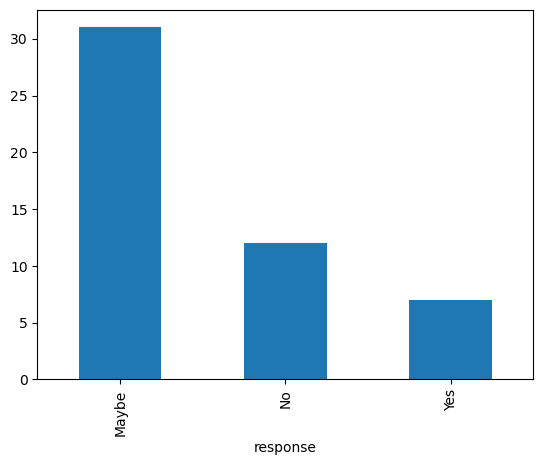

In [22]:
df_es["response"].value_counts().plot(kind='bar')

In [23]:
is_there_a_good_market(df_es)

Percentage of 'Yes' responses: 14.00%
Percentage of 'No' responses: 24.00%
Percentage of 'Maybe' responses: 62.00%
Percentage of 'N/A' responses: 0.00%
VERDICT: There is a good market for bottled gazpacho.


True

So how the target market compares with the Spanish benchmark?

In [24]:
# compare df with df_es

# % of yes
percentage_yes = df["response"].value_counts(normalize=True).get("Yes", 0)
percentage_yes_es = df_es["response"].value_counts(normalize=True).get("Yes", 0)
print(f"Percentage of 'Yes' responses in the target market: {percentage_yes:.2%}")
print(f"Percentage of 'Yes' responses in Spain: {percentage_yes_es:.2%}")
# how much more likely are people in Spain to buy the product?
if percentage_yes != 0:
    print(f"Spanish people are {percentage_yes_es / percentage_yes:.2f} times more likely to buy the product.")

# % of no
percentage_no = df["response"].value_counts(normalize=True).get("No", 0)
percentage_no_es = df_es["response"].value_counts(normalize=True).get("No", 0)
print(f"Percentage of 'No' responses in the target market: {percentage_no:.2%}")
print(f"Percentage of 'No' responses in Spain: {percentage_no_es:.2%}")
# how much more likely are people in Spain to not buy the product?
if percentage_no != 0:
    print(f"Spanish people are {percentage_no_es / percentage_no:.2f} times more likely to not buy the product.")

Percentage of 'Yes' responses in the target market: 6.00%
Percentage of 'Yes' responses in Spain: 14.00%
Spanish people are 2.33 times more likely to buy the product.
Percentage of 'No' responses in the target market: 8.00%
Percentage of 'No' responses in Spain: 24.00%
Spanish people are 3.00 times more likely to not buy the product.


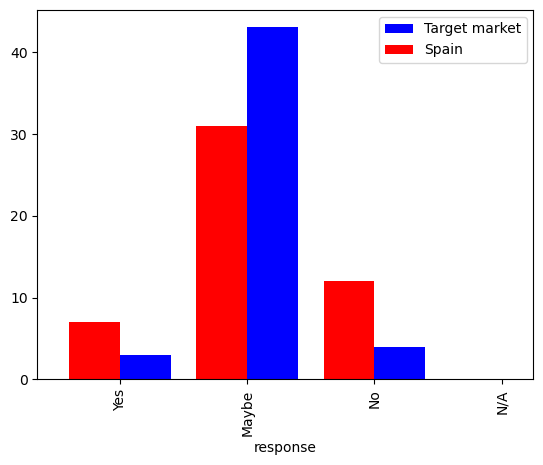

In [25]:
# compare charts. Put both bars in the same plot, for easier comparison
# Need to order the labels in the chart.
fig, ax = plt.subplots()
df["response"].value_counts().reindex(["Yes", "Maybe", "No", "N/A"]).plot(kind='bar', color='blue', position=0, width=0.4, label="Target market", ax=ax)
df_es["response"].value_counts().reindex(["Yes", "Maybe", "No", "N/A"]).plot(kind='bar', color='red', position=1, width=0.4, label="Spain", ax=ax)
plt.legend()
plt.show()


## Other countries

Should we compute other nationalities? This might take a while, so we leave it as an option.

In [26]:
if not compute_other_nationalities:
    control.end()
    raise KeyboardInterrupt

Here's a convenience function to perform the same analysis for other countries more easily.

In [27]:
def market_research_simulation(nationality, population_size, results_extractor):
    factory = TinyPersonFactory(general_context(nationality=nationality))
    people = factory.generate_people(population_size, verbose=True)
    market = TinyWorld(f"Target audience ({nationality})", people, broadcast_if_no_target=False)
    control.checkpoint()

    market.broadcast(interviewer_introduction)
    market.broadcast(interviewer_main_question)
    market.run(1)
    control.checkpoint()
    
    results = results_extractor.extract_results_from_agents(people)
    df = pd.DataFrame(results)

    return df


### Brazil

In [28]:
df_br = market_research_simulation("Brazilian", 
                                   population_size=population_size, 
                                   results_extractor=results_extractor)

2025-07-14 16:37:16,123 - tinytroupe - WARNING - Expected 50 samples, but got 129 samples. The LLM may have failed to sum up the quantities in the sampling plan correctly.


2025-07-14 16:37:24,293 - tinytroupe - ERROR - Error generating name for sample 0: Postcondition not met for function <lambda>!


2025-07-14 16:37:50,552 - tinytroupe - ERROR - Error generating name for sample 4: Postcondition not met for function <lambda>!


2025-07-14 16:38:02,812 - tinytroupe - ERROR - Error generating name for sample 6: Postcondition not met for function <lambda>!


2025-07-14 16:38:40,323 - tinytroupe - ERROR - Error generating name for sample 12: Postcondition not met for function <lambda>!


2025-07-14 16:38:52,701 - tinytroupe - ERROR - Error generating name for sample 14: Postcondition not met for function <lambda>!


2025-07-14 16:38:58,368 - tinytroupe - ERROR - Error generating name for sample 15: Postcondition not met for function <lambda>!


2025-07-14 16:39:09,919 - tinytroupe - ERROR - Error generating name for sample 17: Postcondition not met for function <lambda>!


2025-07-14 16:39:15,789 - tinytroupe - ERROR - Error generating name for sample 18: Postcondition not met for function <lambda>!


2025-07-14 16:39:42,346 - tinytroupe - ERROR - Error generating name for sample 22: Postcondition not met for function <lambda>!


2025-07-14 16:39:48,587 - tinytroupe - ERROR - Error generating name for sample 23: Postcondition not met for function <lambda>!


2025-07-14 16:40:12,933 - tinytroupe - ERROR - Error generating name for sample 27: Postcondition not met for function <lambda>!


2025-07-14 16:40:19,840 - tinytroupe - ERROR - Error generating name for sample 28: Postcondition not met for function <lambda>!


2025-07-14 16:40:37,543 - tinytroupe - ERROR - Error generating name for sample 30: Postcondition not met for function <lambda>!


2025-07-14 16:40:46,122 - tinytroupe - ERROR - Error generating name for sample 31: Postcondition not met for function <lambda>!


2025-07-14 16:40:54,534 - tinytroupe - ERROR - Error generating name for sample 32: Postcondition not met for function <lambda>!


2025-07-14 16:41:27,858 - tinytroupe - ERROR - Error generating name for sample 35: Postcondition not met for function <lambda>!


2025-07-14 16:41:37,244 - tinytroupe - ERROR - Error generating name for sample 36: Postcondition not met for function <lambda>!


2025-07-14 16:42:25,531 - tinytroupe - ERROR - Error generating name for sample 42: Postcondition not met for function <lambda>!


2025-07-14 16:42:35,592 - tinytroupe - ERROR - Error generating name for sample 43: Postcondition not met for function <lambda>!


2025-07-14 16:43:04,738 - tinytroupe - ERROR - Error generating name for sample 46: Postcondition not met for function <lambda>!


2025-07-14 16:43:19,278 - tinytroupe - ERROR - Error generating name for sample 48: Postcondition not met for function <lambda>!


2025-07-14 16:43:26,099 - tinytroupe - ERROR - Error generating name for sample 49: Postcondition not met for function <lambda>!


2025-07-14 16:43:46,655 - tinytroupe - ERROR - Error generating name for sample 51: Postcondition not met for function <lambda>!


2025-07-14 16:44:13,550 - tinytroupe - ERROR - Error generating name for sample 52: Postcondition not met for function <lambda>!


2025-07-14 16:44:47,813 - tinytroupe - ERROR - Error generating name for sample 54: Postcondition not met for function <lambda>!


2025-07-14 16:45:10,302 - tinytroupe - ERROR - Error generating name for sample 56: Postcondition not met for function <lambda>!


2025-07-14 16:45:34,773 - tinytroupe - ERROR - Error generating name for sample 58: Postcondition not met for function <lambda>!


2025-07-14 16:45:57,836 - tinytroupe - ERROR - Error generating name for sample 61: Postcondition not met for function <lambda>!


2025-07-14 16:46:20,298 - tinytroupe - ERROR - Error generating name for sample 65: Postcondition not met for function <lambda>!


2025-07-14 16:46:26,700 - tinytroupe - ERROR - Error generating name for sample 66: Postcondition not met for function <lambda>!


2025-07-14 16:47:03,640 - tinytroupe - ERROR - Error generating name for sample 71: Postcondition not met for function <lambda>!


2025-07-14 16:47:08,805 - tinytroupe - ERROR - Error generating name for sample 72: Postcondition not met for function <lambda>!


2025-07-14 16:47:14,903 - tinytroupe - ERROR - Error generating name for sample 73: Postcondition not met for function <lambda>!


2025-07-14 16:48:16,223 - tinytroupe - ERROR - Error generating name for sample 77: Postcondition not met for function <lambda>!


2025-07-14 16:48:22,679 - tinytroupe - ERROR - Error generating name for sample 78: Postcondition not met for function <lambda>!


2025-07-14 16:48:39,666 - tinytroupe - ERROR - Error generating name for sample 81: Postcondition not met for function <lambda>!


2025-07-14 16:48:50,772 - tinytroupe - ERROR - Error generating name for sample 83: Postcondition not met for function <lambda>!


2025-07-14 16:49:06,215 - tinytroupe - ERROR - Error generating name for sample 86: Postcondition not met for function <lambda>!


2025-07-14 16:49:16,817 - tinytroupe - ERROR - Error generating name for sample 88: Postcondition not met for function <lambda>!


2025-07-14 16:49:30,036 - tinytroupe - ERROR - Error generating name for sample 90: Postcondition not met for function <lambda>!


2025-07-14 16:50:02,937 - tinytroupe - ERROR - Error generating name for sample 95: Postcondition not met for function <lambda>!


2025-07-14 16:50:12,817 - tinytroupe - ERROR - Error generating name for sample 97: Postcondition not met for function <lambda>!


2025-07-14 16:50:50,567 - tinytroupe - ERROR - Error generating name for sample 103: Postcondition not met for function <lambda>!


2025-07-14 16:51:04,127 - tinytroupe - ERROR - Error generating name for sample 105: Postcondition not met for function <lambda>!


2025-07-14 16:51:10,118 - tinytroupe - ERROR - Error generating name for sample 106: Postcondition not met for function <lambda>!


2025-07-14 16:51:29,131 - tinytroupe - ERROR - Error generating name for sample 109: Postcondition not met for function <lambda>!


2025-07-14 16:51:51,633 - tinytroupe - ERROR - Error generating name for sample 112: Postcondition not met for function <lambda>!


2025-07-14 16:52:08,856 - tinytroupe - ERROR - Error generating name for sample 115: Postcondition not met for function <lambda>!


2025-07-14 16:52:22,373 - tinytroupe - ERROR - Error generating name for sample 117: Postcondition not met for function <lambda>!


2025-07-14 16:52:38,407 - tinytroupe - ERROR - Error generating name for sample 119: Postcondition not met for function <lambda>!


2025-07-14 16:52:45,321 - tinytroupe - ERROR - Error generating name for sample 120: Postcondition not met for function <lambda>!


2025-07-14 16:52:50,401 - tinytroupe - ERROR - Error generating name for sample 121: Postcondition not met for function <lambda>!


2025-07-14 16:53:03,712 - tinytroupe - ERROR - Error generating name for sample 123: Postcondition not met for function <lambda>!


2025-07-14 16:53:10,413 - tinytroupe - ERROR - Error generating name for sample 124: Postcondition not met for function <lambda>!


2025-07-14 16:53:15,927 - tinytroupe - ERROR - Error generating name for sample 125: Postcondition not met for function <lambda>!


2025-07-14 16:53:22,006 - tinytroupe - ERROR - Error generating name for sample 126: Postcondition not met for function <lambda>!


Generated person 9/50: Person_120_unknown is a 33 year old Teacher, Brazilian, currently living in São Paulo, Brazil. Person_120_unknown is not only dedicated to her role as a teacher but also deeply passionate about preserving and sharing Brazilian culture. Her calm and reserved demeanor allows her to connect meaningfully with her students, fostering a supportive learning environment. Outside the classroom, she enjoys exploring culinary arts, often experimenting with traditional recipes and sharing her love for cooking with friends and family. With a strong sense of responsibility towards her community, she actively volunteers and participates in local cultural events, believing that education and cultural heritage are vital for personal and communal identity.


Generated person 5/50: Person_124_unknown is a 23 year old Manual Laborer, American, currently living in Detroit, Michigan. Person_124_unknown is a vibrant individual who thrives on social connections and values authenticity in their relationships. With a passion for street food culture, they often explore local markets and enjoy sharing meals with friends, particularly tacos from food trucks. Despite the challenges posed by their mental health, they maintain an optimistic outlook and use humor to uplift those around them. Their resourcefulness and strong communication skills not only make them a reliable coworker but also reflect their commitment to community service, as they frequently volunteer at local shelters to support those in need.


Generated person 12/50: Person_117_unknown is a 30 year old Manual Laborer, Brazilian, currently living in São Paulo, Brazil. Person_117_unknown is a kind-hearted individual who values family and community support, often putting others' needs before his own. He has a passion for cooking, particularly desserts, and takes pride in preparing sweet treats for family gatherings, showcasing his creativity in the kitchen. Despite facing mobility challenges, he maintains a pragmatic outlook on life, using humor to navigate difficulties and foster connections with friends and neighbors. His love for soccer not only provides a source of joy but also strengthens his bonds with friends, as they share memorable moments cheering for their favorite team together.


Generated person 11/50: Dr. Victor Alarcon is a 48 year old Physician, American, currently living in Phoenix, Arizona. Dr. Victor Alarcon is not only dedicated to his medical practice but also deeply invested in advocating for healthcare reform, particularly for lower-income patients. His passion for nutrition and wellness reflects his commitment to preventive care, which he believes is essential for improving patient outcomes. Despite his confrontational style, he values honest discussions and often engages in spirited debates with colleagues about healthcare policies. Outside of work, Victor finds solace in fishing and outdoor activities, which serve as a therapeutic escape from the stresses of his demanding profession.


Generated person 3/50: Person_126_unknown is a 21 year old Manual Laborer, American, currently living in Detroit, Michigan. Person_126_unknown is a vibrant individual who thrives on social interactions and values the connections they make with others. Their optimistic nature shines through in their love for street food culture and music festivals, where they often find joy in spontaneous outings with friends. Despite facing mental health challenges, they channel their experiences into a passion for community service, volunteering at local shelters and advocating for mental health awareness. With a knack for resourcefulness and a cheerful disposition, they approach life with humor, making the most of each day while dreaming of a future where they can foster supportive networks in underserved communities.


Generated person 2/50: Isadora Valentina Moreau is a 27 year old Artist, French, currently living in Paris, France. Isadora Valentina Moreau is not only a talented artist but also a deeply empathetic individual who values connection and community. Her vibrant imagination fuels her creativity, allowing her to think outside the box and explore unconventional ideas in her work. With a strong belief in the power of art as a catalyst for social change, she actively engages in discussions about cultural diversity and social responsibility. In her free time, Isadora enjoys visiting art galleries, experimenting with new recipes, and immersing herself in nature, all of which serve as sources of inspiration for her artistic endeavors.


Generated person 1/50: Lucas Alarcon is a 31 year old Mechanical Engineer, American, currently living in Portland, Oregon. Lucas Alarcon is not only dedicated to his work in mechanical engineering but also embodies a vibrant and sociable personality that draws people to him. He thrives in group settings, often using humor to foster connections and engage in meaningful discussions about sustainability and health. Outside of work, Lucas enjoys outdoor activities like hiking and cycling, which allow him to explore the natural beauty of the Pacific Northwest while staying active. His passion for cooking healthy meals is complemented by his commitment to community engagement, as he frequently volunteers at local environmental organizations and enjoys sharing his culinary creations with friends and family.


Generated person 4/50: Person_125_unknown is a 21 year old Manual Laborer, American, currently living in Detroit, Michigan. Person_125_unknown is a vibrant individual who approaches life with an optimistic outlook, often using humor to navigate the challenges they face. Their passion for street food culture not only fuels their culinary experiments but also reflects their belief in the power of food to bring people together. While they enjoy social interactions, they also value their alone time to recharge, especially when managing their mental health. With aspirations to pursue a degree in social work, they are dedicated to helping others who face similar struggles, demonstrating a deep empathy and commitment to community support.


Generated person 7/50: Javier Ortega is a 21 year old Manual Laborer, Mexican, currently living in Mexico City, Mexico. Javier Ortega is a friendly and approachable individual who thrives on social interactions, often using humor to connect with those around him. His love for street food culture is evident in his culinary explorations, frequently trying new dishes from local vendors during lunch breaks. While he faces challenges with anxiety and mood swings, he actively seeks ways to improve his mental health, believing in the importance of community support and open discussions about mental well-being. With a strong work ethic and a desire to learn, Javier is not only dedicated to his job but also aspires to start his own food stall, combining his passion for cooking with his entrepreneurial spirit.


Generated person 6/50: Person_123_unknown is a 53 year old Business Executive, American, currently living in Beverly Hills, California. Person_123_unknown is a dynamic and ambitious individual, driven by a relentless pursuit of success and a desire to expand his influence in the corporate world. His interests extend beyond business, as he enjoys golfing and attending exclusive social events, where he thrives on networking with influential figures. Known for his direct and assertive communication style, he often engages in heated discussions about politics and economics, reflecting his strong conservative beliefs. Despite his confrontational nature, he is fiercely protective of his family and values the importance of hard work, which he instills in his son, Michael, as they discuss future career aspirations together.


Generated person 10/50: Dr. Emily Carter is a 28 year old Family Physician, American, currently living in Austin, Texas. Dr. Emily Carter is not only dedicated to her role as a family physician but also embodies a vibrant and engaging personality that resonates with her patients and colleagues alike. Her optimism and cheerful demeanor make her approachable, fostering an environment where patients feel comfortable discussing their health concerns. Outside of her professional life, Emily enjoys healthy cooking and often experiments with new recipes, reflecting her commitment to nutrition and wellness. She actively participates in community health initiatives, believing that healthcare should be accessible to all, and regularly volunteers her time to promote health awareness and education in underserved populations.


Generated person 8/50: Person_121_unknown is a 42 year old Business Executive, American, currently living in Dallas, Texas. Person_121_unknown is a highly ambitious individual who thrives on the challenges of the corporate world, often pushing himself and his team to achieve exceptional results. His interests extend beyond business strategy and investing; he has a passion for golf, which serves as both a leisure activity and a networking opportunity. While he enjoys the finer things in life, such as luxury cars and fine dining, he also grapples with feelings of emptiness, questioning the personal sacrifices made in pursuit of success. Despite his direct and assertive communication style, he is actively involved in local charities, particularly those focused on education, reflecting a desire to give back, even as he navigates the pressures of his demanding career.


Generated person 23/50: Person_106_unknown is a 35 year old Teacher, American, currently living in Portland, Oregon. Person_106_unknown is not only dedicated to her role as a teacher but also embodies a vibrant and nurturing personality that resonates with her students and colleagues alike. Her passion for health and wellness extends beyond the classroom, as she actively participates in community service and promotes sustainable living practices. With a love for gardening and cooking, she often shares her knowledge of nutrition through engaging workshops, fostering a sense of community among families. In her free time, she enjoys outdoor activities, yoga, and reading, all of which contribute to her holistic approach to education and personal well-being.


Generated person 13/50: Person_115_unknown is a 29 year old Registered Nurse, American, currently living in Cleveland, Ohio. Person_115_unknown is a sociable and nurturing individual who thrives on connecting with others, both in her personal and professional life. She has a strong interest in health and wellness, often volunteering at community health initiatives and attending local health fairs to promote better health practices. With a penchant for cooking, she enjoys experimenting with healthy recipes that align with her dietary preferences, while also advocating for chronic illness awareness to support others facing similar challenges. Balancing her work and social life, she practices mindfulness and engages in outdoor activities like hiking and biking to maintain her physical and mental well-being.


Generated person 19/50: Cláudia Almeida is a 48 year old Teacher, Brazilian, currently living in São Paulo, Brazil. Cláudia Almeida is not only a dedicated teacher but also a nurturing individual who deeply values empathy and connection with her students. Her passion for education is complemented by her love for literature, particularly works by Brazilian authors, which she often incorporates into her teaching. Cláudia enjoys quiet evenings at home, where she can unwind with a good book or experiment with new dessert recipes, reflecting her creative side. With a strong belief in the importance of mental health and diversity in education, she actively participates in community initiatives, advocating for better resources and support for teachers, while also finding solace in her garden and nature.


Generated person 14/50: Victor Alarcon is a 34 year old Mechanical Engineer, American, currently living in Phoenix, Arizona. Victor Alarcon is a highly analytical individual with a strong passion for engineering, which began in his childhood as he took apart household items to understand their mechanics. He enjoys mentoring younger engineers, sharing his extensive knowledge while navigating his confrontational communication style. Outside of work, Victor finds solace in outdoor activities like hiking and fishing, which help him manage stress and maintain his health. He is also deeply engaged in political discussions, advocating for traditional values and often participating in community events that reflect his beliefs.


Generated person 22/50: Clara Isabella Moreno is a 26 year old Registered Nurse, American, currently living in San Diego, California. Clara is not only dedicated to her nursing career but also embodies a warm and approachable personality that makes her a favorite among patients and colleagues alike. Her love for cooking and trying new recipes reflects her curiosity about different cultures, which she often shares during gatherings with friends and family. Clara is deeply committed to advocating for healthcare access and equity, frequently volunteering at community health events to support underserved populations. In her downtime, she finds solace in yoga and mindfulness practices, helping her manage the emotional demands of her job while maintaining a balanced lifestyle.


Generated person 21/50: Carlos Eduardo da Silva is a 30 year old Manual Laborer, Brazilian, currently living in São Paulo, Brazil. Carlos Eduardo da Silva is not only a dedicated manual laborer but also a kind-hearted individual who values community and family above all. He enjoys cooking, particularly experimenting with dessert recipes, and often shares his creations with friends and family during gatherings, fostering a sense of togetherness. His pragmatic approach to life is complemented by a good sense of humor, which he uses to navigate challenges, including his mobility issues. Carlos is also passionate about advocating for better working conditions for manual laborers, reflecting his belief in fairness and respect for all individuals, regardless of their socioeconomic status.


Generated person 24/50: Person_105_unknown is a 22 year old Unemployed, American, currently living in Detroit, Michigan. Person_105_unknown is a complex individual navigating the challenges of unemployment and mental health. With a dry sense of humor and a tendency to be introspective, they often find solace in quiet moments, whether it's exploring local street food or watching cooking shows. Despite their struggles, they possess basic cooking skills and a keen ability to find deals, reflecting a resourceful side that shines through their otherwise cynical outlook. Their close bond with their dog, Max, offers a comforting presence, while their best friend Alex provides much-needed support and encouragement in their journey toward stability and self-improvement.


Generated person 18/50: Fernando Augusto Ribeiro is a 49 year old Senior Engineer, Brazilian, currently living in São Paulo, Brazil. Fernando Augusto Ribeiro is not only dedicated to his work as a Senior Engineer but also embodies a strong commitment to sustainability and community engagement. His analytical nature drives him to explore innovative engineering solutions, while his love for cooking allows him to unwind by experimenting with new dessert recipes, particularly traditional Brazilian sweets. Despite his reserved demeanor, he finds joy in mentoring young engineers, sharing his knowledge about sustainable practices, and fostering discussions about environmental issues with his son, Lucas. In his downtime, he enjoys quiet evenings at home, often accompanied by classical music, which helps him recharge after a demanding workday.


Generated person 15/50: Mariana Oliveira is a 25 year old Elementary School Teacher, Brazilian, currently living in São Paulo, Brazil. Mariana Oliveira is not only a dedicated teacher but also a vibrant individual who thrives on creativity and connection. Her warm and approachable demeanor makes her a favorite among students and colleagues alike, as she often uses humor and storytelling to foster an engaging learning environment. Outside the classroom, she enjoys exploring Brazilian culture through cooking traditional dishes and participating in local festivals, which reflects her belief in the importance of cultural diversity in education. With a passion for continuous improvement, Mariana actively seeks feedback and attends workshops to enhance her teaching methods, all while maintaining a positive outlook even during busy times.


Generated person 17/50: Person_112_unknown is a 37 year old Elementary School Teacher, Brazilian, currently living in São Paulo, Brazil. Person_112_unknown is not only a dedicated educator but also a nurturing individual who deeply values the well-being of her students. Her calm and reflective demeanor allows her to create a safe space for learning, where children feel comfortable expressing themselves. Outside the classroom, she enjoys quiet evenings at home, often indulging in her passion for baking and gardening, which provide her with a sense of tranquility. With a strong belief in the importance of community involvement, she actively participates in local initiatives, advocating for better resources for public education while managing her health with a positive outlook.


Generated person 16/50: Edward Harrison is a 54 year old Senior Engineer, American, currently living in Phoenix, Arizona. Edward Harrison is a passionate advocate for traditional values, often engaging in political debates within his community. His assertive communication style, while sometimes perceived as abrasive, reflects his strong opinions and commitment to high standards in both his professional and personal life. Outside of work, he finds solace in fishing, which serves as a therapeutic escape from his daily stresses, and he enjoys spending weekends with family, often engaging in spirited discussions. With a keen interest in engineering innovations, he stays updated on industry trends, all while managing his health through a disciplined diet and regular exercise.


Generated person 20/50: Person_109_unknown is a 34 year old Politician, American, currently living in San Francisco, California. Person_109_unknown is not only dedicated to their role in the California State Assembly but also embodies a vibrant and engaging personality that resonates with those around them. Their strong sense of empathy and sociability allows them to connect deeply with constituents, fostering a community-oriented approach to politics. Outside of their legislative duties, they are passionate about social justice and environmental sustainability, often participating in community service and local events. With a love for cooking and healthy living, they enjoy hosting dinner parties where they discuss political issues, blending their interests in food and activism seamlessly.


Generated person 25/50: Person_103_unknown is a 24 year old Unemployed, American, currently living in New Orleans, Louisiana. Person_103_unknown is a vibrant individual who finds joy in the little things, often using humor to navigate life's challenges. With a keen interest in culinary arts, they enjoy exploring local food markets and festivals, and have a knack for discovering hidden gems in the food scene. Despite facing mental health challenges, they maintain an optimistic outlook and prioritize open discussions about mental well-being. Their cheerful demeanor and empathetic nature make them a beloved friend, and they often engage in light-hearted banter to ease anxiety, all while dreaming of starting a food blog to share their culinary adventures.


Generated person 26/50: Sofia Valentina Moreau is a 39 year old Artist, French, currently living in Paris, France. Sofia Valentina Moreau is not only a talented artist but also a warm and inviting individual who thrives in social settings. Her passion for social activism drives her to engage in meaningful discussions about art and life, often using her work to challenge societal norms. With a keen eye for detail and a love for culinary experiences, she enjoys exploring new restaurants and sharing her favorite dishes with friends. Sofia's empathetic nature and commitment to community involvement are evident in her volunteer work with underprivileged youth, where she fosters creativity and inclusivity through art workshops.


Generated person 33/50: Fernando Alencar is a 41 year old Doctor, Brazilian, currently living in São Paulo, Brazil. Fernando Alencar is not only dedicated to his medical practice but also possesses a rich array of interests that reflect his thoughtful nature. He finds joy in culinary arts, particularly in baking, where he often experiments with traditional Brazilian desserts, showcasing his creativity and love for family traditions. His introspective personality drives him to seek deep connections, preferring meaningful conversations over small talk, and he often spends his weekends gardening or enjoying quiet walks in nature, which help him recharge. Committed to his patients and community, he actively volunteers at local health fairs, advocating for accessible healthcare and preventive care, aligning with his belief in the importance of personal responsibility in health outcomes.


Generated person 29/50: Luis Fernando Torres is a 20 year old Manual Laborer, Mexican, currently living in Mexico City, Mexico. Luis Fernando Torres is a friendly and approachable individual who thrives on social interactions, often using humor to connect with those around him. He has a deep appreciation for street food culture, stemming from his childhood experiences helping his mother sell snacks, which fuels his aspiration to start his own food business. Despite facing mental health challenges, he remains optimistic and values the support of his community, believing that open discussions about mental health are crucial. In his free time, Luis enjoys playing soccer with friends, listening to reggaeton and cumbia music, and exploring local markets, all of which help him unwind and recharge after a demanding workweek.


Generated person 27/50: Luis Fernando Ortega is a 21 year old Manual Laborer, Mexican, currently living in Mexico City, Mexico. Luis Fernando Ortega is not only a dedicated manual laborer but also a vibrant individual who thrives on social connections. His cheerful demeanor and sense of humor help him navigate the challenges of his work and mental health, allowing him to bond easily with coworkers and friends. Passionate about street food, he enjoys exploring local markets and experimenting with traditional recipes, often drawing inspiration from his grandmother's cooking. Despite the pressures of his job and personal struggles, Luis remains optimistic, valuing family and community as essential pillars of his life.


Generated person 32/50: Person_97_unknown is a 55 year old Business Executive, Brazilian, currently living in São Paulo, Brazil. Person_97_unknown is a thoughtful and introspective individual who values deep connections and meaningful conversations. He has a passion for culinary arts, particularly desserts, which he enjoys creating during his weekends spent cooking with his wife, Claudia. With a strong sense of responsibility, he often mentors young professionals, believing that mentorship is vital for nurturing future leaders. Despite his reserved nature, he finds joy in quiet evenings with close friends, exploring local markets for fresh ingredients, and maintaining a balanced lifestyle that prioritizes health and well-being.


Generated person 28/50: Carlos Javier Mendoza is a 20 year old Manual Laborer, Mexican, currently living in Mexico City, Mexico. Carlos Javier Mendoza is not only a dedicated manual laborer but also a vibrant individual who thrives in social settings. His cheerful demeanor and knack for humor help him forge strong connections with coworkers, making the physically demanding work more enjoyable. Outside of work, Carlos has a deep passion for street food culture, often experimenting with cooking and dreaming of one day opening his own food stall. Despite facing mental health challenges, he remains optimistic and values the support of his family and friends, often finding solace in shared meals and community soccer games.


Generated person 35/50: Lucas Almeida is a 30 year old Manual Laborer, Brazilian, currently living in São Paulo, Brazil. Lucas Almeida is not only a dedicated manual laborer but also a warm-hearted individual who thrives on community connections. His love for cooking, particularly desserts, reflects his creative side, and he often experiments with new recipes to share with family and friends. Despite facing mobility challenges, Lucas maintains a pragmatic outlook, using humor to navigate life's difficulties while remaining steadfast in his belief that hard work should be justly rewarded. He is deeply committed to his family and dreams of one day starting his own small dessert business, driven by his passion for sweets and the desire to improve their living conditions.


Generated person 34/50: Dr. Maria Santos is a 45 year old Doctor, Brazilian, currently living in São Paulo, Brazil. Dr. Maria Santos is not only a dedicated physician but also a compassionate advocate for her patients and the community. Her introverted nature allows her to connect deeply with individuals during one-on-one consultations, where she excels at explaining complex medical concepts in an accessible manner. Outside of her practice, Maria finds joy in cooking, particularly experimenting with dessert recipes, and often shares her culinary creations with friends and family. She values quiet evenings spent reading or gardening, which help her recharge and maintain a balanced lifestyle amidst the demands of her profession.


Generated person 30/50: Julian Albrecht is a 39 year old Artist, German, currently living in Munich, Germany. Julian Albrecht is not only a talented artist but also a warm and engaging individual who thrives on social interactions. His playful sense of humor and empathetic nature make him a beloved figure among friends and fellow artists alike. Passionate about social activism, he often integrates themes of identity and justice into his work, believing that art can be a powerful catalyst for change. In addition to his artistic pursuits, Julian enjoys exploring local markets, experimenting with culinary delights, and engaging in deep conversations about art and society, all of which enrich his creative process and personal connections.


Generated person 36/50: Rafael da Silva is a 30 year old Manual Laborer, Brazilian, currently living in São Paulo, Brazil. Rafael da Silva is not only dedicated to his work but also possesses a warm and kind-hearted nature that makes him a beloved figure among his coworkers. He enjoys cooking, particularly experimenting with dessert recipes, a skill he inherited from his grandmother, and often shares his creations with friends and family, fostering a sense of community. His strong sense of empathy drives him to advocate for fair treatment of workers, reflecting his belief that everyone deserves respect, regardless of their occupation. Despite facing mobility challenges, Rafael approaches life with a pragmatic attitude, using humor to navigate stress and maintain a positive atmosphere both at work and at home.


Generated person 31/50: Mariana Lopes is a 37 year old Teacher, Brazilian, currently living in São Paulo, Brazil. Mariana Lopes is not only a dedicated teacher but also a nurturing individual who deeply values empathy and community involvement. Her passion for education is complemented by her love for baking, which she often uses as a creative way to engage with her students and their families. In her quiet moments, she enjoys reading both fiction and educational literature, which fuels her desire to inspire her students. Despite the challenges she faces in her profession, Mariana remains committed to her long-term goals of creating an inclusive classroom environment and improving her financial situation for her family, all while maintaining a warm and patient demeanor.


Generated person 47/50: Mariana Alves is a 25 year old Elementary School Teacher, Brazilian, currently living in São Paulo, Brazil. Mariana Alves is not only a dedicated teacher but also a vibrant individual who thrives on creativity and community engagement. Her warm and approachable demeanor makes her a favorite among students and colleagues alike, as she often uses humor to foster a positive learning environment. Outside the classroom, she enjoys cooking traditional Brazilian dishes, exploring local markets, and participating in community events, reflecting her deep appreciation for cultural diversity. With a passion for storytelling and a commitment to empathy, Mariana aims to inspire her students while continuously seeking innovative ways to enhance their educational experiences.


Generated person 37/50: Ricardo Almeida is a 49 year old Senior Engineer, Brazilian, currently living in São Paulo, Brazil. Ricardo Almeida is a pragmatic and detail-oriented individual who thrives in structured environments. His passion for sustainable engineering is complemented by a love for cooking, particularly experimenting with dessert recipes, which he enjoys during quiet weekends at home. An avid reader, he often immerses himself in history and politics, reflecting his belief in the importance of education for personal and professional growth. Despite his reserved nature, he values family deeply and finds joy in mentoring young engineers, sharing his knowledge of sustainable practices while balancing his professional ambitions with a commitment to community involvement.


Generated person 44/50: Dr. Rafael Alencar is a 45 year old Doctor, Brazilian, currently living in São Paulo, Brazil. Dr. Rafael Alencar is not only dedicated to his medical practice but also possesses a rich inner life shaped by his introspective nature. He finds solace in culinary arts, particularly in baking, where he experiments with recipes that evoke fond memories from his childhood. Despite his reserved demeanor, he has a dry sense of humor that emerges in the company of close friends, providing a glimpse into his more relaxed side. His commitment to community health is evident through his volunteer work, where he shares his knowledge and passion for diabetes education, reflecting his belief in the importance of accessible healthcare for all.


Generated person 42/50: Isabella Marcellus is a 29 year old Artist, American, currently living in New York City, New York. Isabella Marcellus is not only a talented artist but also a kind-hearted and empathetic individual who thrives in social settings. Her passion for cultural diversity and social activism is reflected in her artwork, as she believes in the power of art to inspire change and foster understanding. In her free time, she enjoys cooking a variety of international dishes, often hosting dinner parties to share her culinary creations and connect with friends. With a strong commitment to community, Isabella actively volunteers at local art programs for children, aiming to provide access to creative expression for underprivileged youth.


Generated person 46/50: Person_83_unknown is a 20 year old Manual Laborer, American, currently living in New Orleans, Louisiana. Person_83_unknown is a resilient individual who balances the demands of manual labor with a strong commitment to personal growth and community service. With a passion for street food and a dream of owning a food truck, they often find joy in exploring local markets and festivals, where they can connect with others who share their interests. Their cheerful demeanor and humor help them navigate the challenges of anxiety, while their empathetic nature drives them to volunteer at local shelters, reinforcing their belief in the importance of community support. Despite the physical exhaustion from work, they prioritize self-care and often engage in activities like journaling and meditation to maintain their mental well-being.


Generated person 43/50: Person_86_unknown is a 37 year old Elementary School Teacher, Brazilian, currently living in São Paulo, Brazil. Person_86_unknown is not only a dedicated educator but also a compassionate individual who values the well-being of her students and community. She has a strong interest in baking, often experimenting with traditional Brazilian desserts, which she enjoys sharing with friends and family. Her calm demeanor and patient approach make her a trusted confidante among her peers, and she often engages in meaningful conversations that reflect her empathetic nature. Despite her reserved personality, she actively participates in community service and educational workshops, demonstrating her commitment to improving the educational landscape for underprivileged children.


Generated person 38/50: Liam Torres is a 20 year old Unemployed, American, currently living in Los Angeles, California. Liam is a resilient individual who, despite facing mental health challenges, maintains an optimistic outlook on life. He finds joy in cooking simple meals, using it as a creative outlet and a way to cope with stress. His love for indie and acoustic music often provides a comforting backdrop to his daily routines, while his cheerful demeanor and knack for humor help him connect with friends and lighten the mood during tough times. Liam values kindness and community support, often volunteering at local shelters, which not only allows him to give back but also fosters a sense of belonging and purpose in his life.


Generated person 41/50: Person_88_unknown is a 50 year old Nurse, American, currently living in Cleveland, Ohio. Person_88_unknown is a deeply empathetic individual who finds fulfillment in her role as a nurse, often reflecting on the meaningful connections she builds with her patients. Her introverted nature leads her to prefer quiet evenings at home, where she enjoys reading and gardening, activities that help her unwind after long shifts. With a strong belief in accessible healthcare, she actively volunteers at local shelters, demonstrating her commitment to supporting those in need. Despite the challenges of managing her chronic conditions, she maintains a positive outlook and is dedicated to living a healthy lifestyle, often experimenting with new recipes that align with her dietary preferences.


Generated person 48/50: Person_81_unknown is a 23 year old Manual Laborer, American, currently living in Detroit, Michigan. Person_81_unknown is a resilient individual who approaches life with an optimistic outlook, often using humor to navigate challenges. They have a strong sense of community and actively participate in local events, reflecting their belief in the importance of support and connection. With a passion for street food and outdoor activities, they enjoy exploring their city with friends, particularly relishing the camaraderie found in shared experiences. Despite facing mental health challenges, they are committed to improving their well-being and advocate for mental health awareness, demonstrating their empathetic nature and desire to uplift others.


Generated person 39/50: Person_90_unknown is a 41 year old Visual Artist, American, currently living in San Francisco, California. Person_90_unknown is a warm and engaging individual, known for her kindness and empathy towards others. With a high level of openness, she embraces new ideas and experiences, often seeking inspiration from her travels and interactions with diverse cultures. Her passion for social activism drives her to engage in meaningful discussions about pressing issues, and she believes in the transformative power of art to inspire change. In her free time, she enjoys cooking international dishes, hosting dinner parties, and exploring local art galleries, all while maintaining a balanced lifestyle that includes yoga and nature walks to recharge her creative spirit.


Generated person 40/50: Carmen Elena Torres is a 50 year old High School Teacher, American, currently living in Santa Fe, New Mexico. Carmen Elena Torres is not only dedicated to her role as a high school teacher but also embodies a vibrant and engaging personality that resonates with her students and colleagues alike. Her passion for health and wellness extends beyond the classroom, as she actively participates in community service projects and organizes workshops that promote healthy living. With a love for gardening and cooking, she often shares her culinary creations and gardening tips, fostering a sense of community among friends and family. Carmen's warm and approachable demeanor, combined with her commitment to sustainability and education, makes her a beloved figure in both her school and the wider Santa Fe community.


Generated person 45/50: Renato da Silva is a 39 year old Teacher, Brazilian, currently living in São Paulo, Brazil. Renato da Silva is not only a dedicated teacher but also a passionate advocate for cultural heritage and community engagement. His introspective nature allows him to connect deeply with his students, fostering an environment where they feel valued and understood. Outside the classroom, Renato enjoys exploring São Paulo's diverse neighborhoods, often seeking out new culinary experiences that he later incorporates into his lessons. He believes that food is a vital part of cultural identity, and he often hosts dinner parties where he shares traditional Brazilian dishes, creating a warm atmosphere for friends and family to bond over stories and shared experiences.


Generated person 49/50: Diego Castillo is a 21 year old Manual Laborer, Mexican, currently living in Mexico City, Mexico. Diego Castillo is a resilient and optimistic individual who finds joy in the simple pleasures of life, such as street food and soccer. His cheerful demeanor and sense of humor help him connect with others, making him well-liked among his coworkers and friends. Despite facing mental health challenges, he actively seeks coping strategies and values the importance of community support. Diego's passion for cooking allows him to experiment with flavors, and he dreams of one day sharing his culinary creations through a small food stall, bringing people together over delicious meals.


Generated person 50/50: Mateo Cruz is a 21 year old Manual Laborer, Mexican, currently living in Mexico City, Mexico. Mateo Cruz is a friendly and approachable individual who thrives in social settings, often using humor to connect with those around him. He has a deep appreciation for street food culture, particularly enjoying tacos from local vendors, and frequently explores new culinary experiences with friends. While he faces challenges with anxiety and mood swings, he actively seeks community support and values open discussions about mental health. His practical skills in construction and problem-solving make him a reliable coworker, and he finds joy in the camaraderie of his job, often sharing meals and laughter with his colleagues during breaks.


USER --> Person_120_unknown: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please present yourself and also list your top-10 interests?

       + --> Person_124_unknown

       + --> Person_117_unknown

       + --> ...others...

USER --> Person_120_unknown: [CONVERSATION] 
          >       Would you buy bottled gazpacho if you went to the supermarket today? Why yes, or
          > why not?      Please be honest, we are not here to judge you, but just to learn from
          > you.      We know these choices depend on many factors, but please make your best guess,
          > consider your current      situation in life, location, job and interests, and tell us
          > whether you would buy bottled gazpacho      or not. To make it easier, start your
          > response with "Yes, ", "No, " or "Maybe, ".

       + --> Person_124_unknown

       + --> Person_117_unknown

       + --> ...others...

───────────────────────────────────── Target audience (Brazilian) step 1 of 1 ─────────────────────────────────────

Person_126_unknown acts: [TALK] 
                        > Hi there! I'm a 21-year-old non-binary person living in Detroit, Michigan.
                        > I work as a manual laborer for a local construction company, and I'm
                        > currently enrolled in community college pursuing a degree in social work.
                        > My top 10 interests include street food culture, music festivals,
                        > community service, outdoor activities like hiking and biking, cooking,
                        > volunteering, spending time with friends, exploring local markets,
                        > listening to upbeat music, and advocating for mental health awareness.

Person_125_unknown acts: [TALK] 
                        > Sure! I'm a 21-year-old non-binary person living in Detroit, Michigan. I
                        > work as a manual laborer for a local construction company, and I'm also
                        > enrolled in community college pursuing a degree in social work. My top-10
                        > interests include street food culture, music (especially hip-hop and R&B),
                        > community events, cooking and experimenting with new recipes, spending
                        > time with friends, volunteering, exploring new neighborhoods, trying
                        > different street foods, listening to music while working, and
                        > participating in community service projects.

Dr. Victor Alarcon acts: [TALK] 
                        > Hello, I'm Dr. Victor Alarcon, a physician specializing in internal
                        > medicine. I run a private practice where I manage a diverse patient
                        > population, many of whom suffer from chronic conditions like diabetes and
                        > hypertension. My top 10 interests include: 1. Healthcare policy, 2.
                        > Nutrition and wellness, 3. Reading medical journals, 4. Fishing, 5.
                        > Outdoor activities, 6. Community health initiatives, 7. Preventive care,
                        > 8. Patient advocacy, 9. Medical education, and 10. Engaging in debates
                        > about healthcare reform.

Javier Ortega acts: [TALK] 
                   > Hello! I'm Javier Ortega, a 21-year-old manual laborer from Mexico City. I work
                   > for a local construction company, where I help with various tasks on
                   > construction sites. I enjoy spending time with my friends and family, and I
                   > have a keen interest in street food culture, music, and soccer. Here are my
                   > top-10 interests: 1. Street food culture 2. Music, especially cumbia and
                   > mariachi 3. Soccer 4. Spending time with friends and family 5. Cooking and
                   > trying new recipes 6. Community events and festivals 7. Learning new skills
                   > related to construction 8. Exploring local markets 9. Playing soccer on
                   > weekends 10. Listening to music while working.

Person_123_unknown acts: [TALK] 
                        > I appreciate the opportunity to share more about myself. My name is
                        > Person_123_unknown, and I am a 53-year-old business executive at Global
                        > Enterprises Inc. I have an MBA from Harvard University and have spent my
                        > career overseeing strategic initiatives and driving company growth. My top
                        > 10 interests include: 1. Investing in startups and emerging technologies,
                        > 2. Golfing and attending exclusive social events, 3. Reading business
                        > biographies and financial news, 4. Participating in political discussions
                        > and debates, 5. Networking with influential individuals, 6. Traveling to
                        > exclusive destinations, 7. Fine dining experiences, 8. Collecting vintage
                        > cars, 9. Engaging in heated discussions about politics and economics, and
                        > 10. Following stock market updates.

Person_121_unknown acts: [TALK] 
                        > I am a Business Executive at Global Tech Solutions, overseeing operations
                        > and strategic planning. My top-10 interests include business strategy,
                        > investing, golf, fine dining, traveling, networking events, reading
                        > business books, classic cars, charity work, and market trends.   Regarding
                        > bottled gazpacho, I would say "Maybe." While I appreciate convenience and
                        > enjoy trying new products, I tend to prefer fresh, homemade options when
                        > it comes to food. However, if I were in a hurry or looking for something
                        > quick and healthy, I might consider it. It really depends on my schedule
                        > and how I feel about the quality of the product available at the
                        > supermarket.

Isadora Valentina Moreau acts: [TALK] 
                              > Hello! I'm Isadora Valentina Moreau, a 27-year-old freelance artist
                              > based in Paris. My work primarily focuses on painting and mixed
                              > media installations, exploring themes of identity, culture, and
                              > social issues. I have a deep passion for contemporary art and often
                              > participate in local art fairs and exhibitions.   As for my top-10
                              > interests, they are: 1. Contemporary art 2. Traveling to art
                              > festivals 3. Exploring different cuisines 4. Photography 5. Social
                              > activism 6. Engaging in deep conversations about art and society 7.
                              > Visiting art galleries and museums 8. Spending time in nature for
                              > inspiration 9. Experimenting with new recipes 10. Listening to indie
                              > music while painting.

Lucas Alarcon acts: [TALK] 
                   > Hello! I'm Lucas Alarcon, a 31-year-old mechanical engineer living in Portland,
                   > Oregon. I work at GreenTech Innovations, where I focus on developing
                   > sustainable energy solutions. My top 10 interests include: 1. Sustainable
                   > living, 2. Outdoor activities like hiking and cycling, 3. Cooking and
                   > experimenting with healthy recipes, 4. Volunteering for environmental causes,
                   > 5. Attending community events focused on sustainability, 6. Traveling to learn
                   > about different cultures, 7. Photography, especially of nature and food, 8.
                   > Reading about new technologies in renewable energy, 9. Gardening, and 10.
                   > Engaging in discussions about health and wellness.

Person_120_unknown acts: [TALK] 
                        > Hello! My name is Person_120_unknown, and I'm a 33-year-old teacher from
                        > São Paulo, Brazil. I work at a local public school where I focus on
                        > integrating traditional Brazilian culture into my lessons. My top-10
                        > interests include: 1. Culinary arts, especially traditional Brazilian
                        > cooking, 2. Reading literature that reflects Brazilian culture, 3.
                        > Participating in community events and cultural festivals, 4. Spending time
                        > in nature, particularly in parks, 5. Listening to Brazilian music,
                        > especially bossa nova, 6. Cooking for friends and family, 7. Exploring
                        > local markets for fresh ingredients, 8. Learning about different
                        > educational methods, 9. Volunteering at community centers, and 10.
                        > Journaling about my experiences and thoughts.

Dr. Emily Carter acts: [TALK] 
                      > Hello! I'm Dr. Emily Carter, a family physician working at the Austin
                      > Community Health Center. I focus on preventive health and educating my
                      > patients about healthy lifestyle choices. Here are my top-10 interests: 1.
                      > Healthy cooking and nutrition, 2. Outdoor activities like hiking and
                      > cycling, 3. Volunteering for health-related causes, 4. Reading about medical
                      > advancements and public health, 5. Yoga and mindfulness practices, 6.
                      > Spending time with friends and family outdoors, 7. Attending workshops on
                      > nutrition or wellness, 8. Exploring new recipes that emphasize whole foods,
                      > 9. Traveling to learn about different healthcare systems, and 10. Engaging
                      > in community health initiatives.

Person_124_unknown acts: [TALK] 
                        > Sure! I'm a 23-year-old non-binary manual laborer living in Detroit,
                        > Michigan. I work for a local construction company, and while the job can
                        > be physically demanding, I enjoy the camaraderie with my coworkers. I'm
                        > currently enrolled in community college, pursuing a degree in social work
                        > because I want to help others facing challenges similar to mine.   As for
                        > my top-10 interests, here they are: 1. Street food culture 2. Music,
                        > especially hip-hop and indie 3. Outdoor activities like hiking and biking
                        > 4. Community events and local festivals 5. Cooking and experimenting with
                        > new recipes 6. Volunteering at local shelters 7. Attending local music
                        > festivals 8. Spending time with friends at parks 9. Exploring local food
                        > markets 10. Learning about mental health and wellness.

Person_117_unknown acts: [TALK] 
                        > Hello! I'm a 30-year-old manual laborer from São Paulo, Brazil. I work for
                        > a local construction company, where I help with various tasks, especially
                        > lighter ones due to my mobility issues. My top 10 interests include: 1.
                        > Cooking and trying new dessert recipes, 2. Spending time with family and
                        > friends, 3. Watching soccer matches, especially when Brazil is playing, 4.
                        > Listening to samba and bossa nova music, 5. Finding discounts and
                        > promotions while shopping, 6. Helping neighbors with small tasks, 7.
                        > Attending local soccer matches, 8. Experimenting with new recipes, 9.
                        > Sharing stories and laughter with friends, and 10. Enjoying quiet evenings
                        > at home.

Person_126_unknown acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I saw it in the
                        > supermarket. I enjoy trying new foods, especially those that are quick and
                        > easy to prepare. However, it would depend on the price and whether it
                        > looks fresh and appealing. Since I often cook simple meals after work,
                        > having something like gazpacho on hand could be convenient, especially
                        > during warmer days. But if it's too expensive or doesn't seem worth it, I
                        > might skip it.

Person_125_unknown acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I saw it in the
                        > supermarket. I enjoy trying new foods, and gazpacho sounds refreshing,
                        > especially during warmer months. However, it would depend on the price and
                        > whether it looks appealing. If I had the chance to try it first or if it
                        > was from a local vendor, I might be more inclined to buy it. But if it
                        > seems too expensive or not fresh, I might skip it.

Dr. Emily Carter acts: [TALK] 
                      > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                      > today. I appreciate healthy and fresh options, and gazpacho is a nutritious
                      > choice, especially during warmer months. However, I would also think about
                      > the ingredients and whether it aligns with my preference for fresh, organic
                      > produce. If it contains high-quality ingredients and is convenient for a
                      > quick meal, I might go for it!

Person_120_unknown acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I went to the
                        > supermarket today. I appreciate healthy and fresh options, and gazpacho
                        > aligns with my interest in culinary arts and healthy eating. However, I
                        > prefer making traditional dishes myself, especially since I enjoy cooking
                        > and sharing meals with friends and family. If I found a high-quality
                        > bottled version that reflects traditional recipes, I might be tempted to
                        > buy it for convenience or to try something new.

Person_124_unknown acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I saw it in the
                        > supermarket. I enjoy trying new foods, especially those that are
                        > refreshing and healthy. However, it would depend on a few factors like the
                        > price, the ingredients, and whether I feel like making my own version at
                        > home. Since I often cook simple meals after work, I might lean towards
                        > making it myself if I have the time and ingredients. But if I'm feeling
                        > particularly tired or busy, I might just grab a bottle to save time. So,
                        > it really depends on my mood and circumstances at that moment!

Person_117_unknown acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I saw it in the
                        > supermarket. I enjoy trying new foods, and gazpacho sounds refreshing,
                        > especially in the hot weather here in São Paulo. However, I would also
                        > think about the price and whether it's worth it compared to making it
                        > myself. If it's too expensive, I might skip it and just make my own at
                        > home, since I like cooking and experimenting with recipes. But if I find a
                        > good deal, I might just grab a bottle!

Javier Ortega acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket.
                   > I enjoy trying new foods, especially refreshing ones like gazpacho, especially
                   > during hot days. However, it would depend on a few factors like the price, the
                   > ingredients, and if it looks appealing. If it’s affordable and made with fresh
                   > ingredients, I might give it a try!

Dr. Victor Alarcon acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I were in the mood for
                        > a refreshing, healthy option. However, I usually prefer making my own
                        > meals, especially since I focus on nutrition and wellness. If the bottled
                        > version is made with quality ingredients and is low in sodium, it could be
                        > a convenient choice for a quick meal. But I would need to check the label
                        > first to ensure it aligns with my dietary preferences.

Person_123_unknown acts: [TALK] 
                        > No, I would not buy bottled gazpacho if I went to the supermarket today.
                        > While I appreciate the convenience of ready-made products, I prefer to
                        > make my own gazpacho from fresh ingredients. I find that homemade versions
                        > taste better and allow me to control the quality of the ingredients.
                        > Additionally, I tend to avoid pre-packaged foods unless they align with my
                        > dietary preferences, which focus on health and quality. So, in this case,
                        > I would pass on the bottled option.

Lucas Alarcon acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket.
                   > I appreciate fresh, healthy options, and gazpacho aligns with my interest in
                   > healthy eating. However, I would prefer to make it myself using fresh
                   > ingredients from local farmers' markets. If the bottled version is made with
                   > organic ingredients and has no artificial additives, I might give it a try,
                   > especially if I'm looking for a quick meal option after a busy day at work.

Dr. Emily Carter acts: [DONE] 

Isadora Valentina Moreau acts: [TALK] 
                              > Maybe, I would consider buying bottled gazpacho if I went to the
                              > supermarket today. I enjoy fresh and healthy foods, and gazpacho is
                              > a refreshing option, especially during warmer months. However, it
                              > would depend on a few factors like the quality of the product, the
                              > ingredients used, and whether I feel like preparing a meal or just
                              > grabbing something quick. If I see a brand that emphasizes fresh
                              > ingredients and aligns with my values of supporting local and
                              > sustainable products, I might be more inclined to buy it.

2025-07-14 17:06:16,843 - tinytroupe - WARNING - [Person_121_unknown] Action similarity is too high (1), replacing it with DONE.


Person_121_unknown acts: [DONE] 

Person_126_unknown acts: [TALK] 
                        > Sure! I'm a 21-year-old non-binary person living in Detroit, Michigan. I
                        > work as a manual laborer for a local construction company, and I'm
                        > currently enrolled in community college pursuing a degree in social work.
                        > My top 10 interests include street food culture, music festivals,
                        > community service, outdoor activities like hiking and biking, cooking,
                        > volunteering, spending time with friends, exploring local markets,
                        > listening to upbeat music, and advocating for mental health awareness.

Person_117_unknown acts: [DONE] 

Javier Ortega acts: [DONE] 

Person_125_unknown acts: [TALK] 
                        > Sure! I'm a 21-year-old non-binary person living in Detroit, Michigan. I
                        > work as a manual laborer for a local construction company, and I'm also
                        > enrolled in community college pursuing a degree in social work. My top-10
                        > interests include street food culture, music (especially hip-hop and R&B),
                        > community events, cooking and experimenting with new recipes, spending
                        > time with friends, volunteering, exploring new neighborhoods, trying
                        > different street foods, listening to music while working, and
                        > participating in community service projects.

Lucas Alarcon acts: [DONE] 

Dr. Victor Alarcon acts: [DONE] 

Isadora Valentina Moreau acts: [DONE] 

Person_120_unknown acts: [TALK] 
                        > I appreciate the opportunity to share my thoughts! I believe that food
                        > choices are deeply connected to our culture and personal values. As a
                        > teacher, I often emphasize the importance of traditional foods in my
                        > lessons, and I think it's essential to support local producers and
                        > maintain our culinary heritage. If I were to buy bottled gazpacho, it
                        > would have to be a product that respects these values and offers a taste
                        > of authentic flavors. Thank you for considering my perspective!

Person_124_unknown acts: [TALK] 
                        > Sure! I'm a 23-year-old non-binary manual laborer living in Detroit,
                        > Michigan. I work for a local construction company, and while the job can
                        > be physically demanding, I enjoy the camaraderie with my coworkers. I'm
                        > currently enrolled in community college, pursuing a degree in social work
                        > because I want to help others facing challenges similar to mine.   As for
                        > my top-10 interests, here they are: 1. Street food culture 2. Music,
                        > especially hip-hop and indie 3. Outdoor activities like hiking and biking
                        > 4. Community events and local festivals 5. Cooking and experimenting with
                        > new recipes 6. Volunteering at local shelters 7. Attending local music
                        > festivals 8. Spending time with friends at parks 9. Exploring local food
                        > markets 10. Learning about mental health and wellness.

Person_126_unknown acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I saw it in the
                        > supermarket. I enjoy trying new foods, especially those that are quick and
                        > easy to prepare. However, it would depend on the price and whether it
                        > looks fresh and appealing. Since I often cook simple meals after work,
                        > having something like gazpacho on hand could be convenient, especially
                        > during warmer days. But if it's too expensive or doesn't seem worth it, I
                        > might skip it.

Person_123_unknown acts: [TALK] 
                        > I appreciate the opportunity to share more about myself. My name is
                        > Person_123_unknown, and I am a 53-year-old business executive at Global
                        > Enterprises Inc. I have an MBA from Harvard University and have spent my
                        > career overseeing strategic initiatives and driving company growth. My top
                        > 10 interests include: 1. Investing in startups and emerging technologies,
                        > 2. Golfing and attending exclusive social events, 3. Reading business
                        > biographies and financial news, 4. Participating in political discussions
                        > and debates, 5. Networking with influential individuals, 6. Traveling to
                        > exclusive destinations, 7. Fine dining experiences, 8. Collecting vintage
                        > cars, 9. Engaging in heated discussions about politics and economics, and
                        > 10. Following stock market updates.

Person_120_unknown acts: [DONE] 

2025-07-14 17:06:24,878 - tinytroupe - WARNING - [Person_125_unknown] Action similarity is too high (1), replacing it with DONE.


Person_125_unknown acts: [DONE] 

Person_126_unknown acts: [TALK] 
                        > Sure! I'm a 21-year-old non-binary person living in Detroit, Michigan. I
                        > work as a manual laborer for a local construction company, and I'm
                        > currently enrolled in community college pursuing a degree in social work.
                        > My top 10 interests include street food culture, music festivals,
                        > community service, outdoor activities like hiking and biking, cooking,
                        > volunteering, spending time with friends, exploring local markets,
                        > listening to upbeat music, and advocating for mental health awareness.

Person_123_unknown acts: [TALK] 
                        > No, I would not buy bottled gazpacho if I went to the supermarket today.
                        > While I appreciate the convenience of ready-made products, I prefer to
                        > make my own gazpacho from fresh ingredients. I find that homemade versions
                        > taste better and allow me to control the quality of the ingredients.
                        > Additionally, I tend to avoid pre-packaged foods unless they align with my
                        > dietary preferences, which focus on health and quality. So, in this case,
                        > I would pass on the bottled option.

Person_124_unknown acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I saw it in the
                        > supermarket. I enjoy trying new foods, especially those that are
                        > refreshing and healthy. However, it would depend on a few factors like the
                        > price, the ingredients, and whether I feel like making my own version at
                        > home. Since I often cook simple meals after work, I might lean towards
                        > making it myself if I have the time and ingredients. But if I'm feeling
                        > particularly tired or busy, I might just grab a bottle to save time. So,
                        > it really depends on my mood and circumstances at that moment!

Person_126_unknown acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I saw it in the
                        > supermarket. I enjoy trying new foods, especially those that are quick and
                        > easy to prepare. However, it would depend on the price and whether it
                        > looks fresh and appealing. Since I often cook simple meals after work,
                        > having something like gazpacho on hand could be convenient, especially
                        > during warmer days. But if it's too expensive or doesn't seem worth it, I
                        > might skip it.

Person_123_unknown acts: [TALK] 
                        > I appreciate the opportunity to share more about myself. My name is
                        > Person_123_unknown, and I am a 53-year-old business executive at Global
                        > Enterprises Inc. I have an MBA from Harvard University and have spent my
                        > career overseeing strategic initiatives and driving company growth. My top
                        > 10 interests include: 1. Investing in startups and emerging technologies,
                        > 2. Golfing and attending exclusive social events, 3. Reading business
                        > biographies and financial news, 4. Participating in political discussions
                        > and debates, 5. Networking with influential individuals, 6. Traveling to
                        > exclusive destinations, 7. Fine dining experiences, 8. Collecting vintage
                        > cars, 9. Engaging in heated discussions about politics and economics, and
                        > 10. Following stock market updates.

Person_124_unknown acts: [TALK] 
                        > Sure! I'm a 23-year-old non-binary manual laborer living in Detroit,
                        > Michigan. I work for a local construction company, and while the job can
                        > be physically demanding, I enjoy the camaraderie with my coworkers. I'm
                        > currently enrolled in community college, pursuing a degree in social work
                        > because I want to help others facing challenges similar to mine.   As for
                        > my top-10 interests, here they are: 1. Street food culture 2. Music,
                        > especially hip-hop and indie 3. Outdoor activities like hiking and biking
                        > 4. Community events and local festivals 5. Cooking and experimenting with
                        > new recipes 6. Volunteering at local shelters 7. Attending local music
                        > festivals 8. Spending time with friends at parks 9. Exploring local food
                        > markets 10. Learning about mental health and wellness.

Person_126_unknown acts: [TALK] 
                        > Sure! I'm a 21-year-old non-binary person living in Detroit, Michigan. I
                        > work as a manual laborer for a local construction company, and I'm
                        > currently enrolled in community college pursuing a degree in social work.
                        > My top 10 interests include street food culture, music festivals,
                        > community service, outdoor activities like hiking and biking, cooking,
                        > volunteering, spending time with friends, exploring local markets,
                        > listening to upbeat music, and advocating for mental health awareness.

Person_123_unknown acts: [TALK] 
                        > No, I would not buy bottled gazpacho if I went to the supermarket today.
                        > While I appreciate the convenience of ready-made products, I prefer to
                        > make my own gazpacho from fresh ingredients. I find that homemade versions
                        > taste better and allow me to control the quality of the ingredients.
                        > Additionally, I tend to avoid pre-packaged foods unless they align with my
                        > dietary preferences, which focus on health and quality. So, in this case,
                        > I would pass on the bottled option.

Person_106_unknown acts: [TALK] 
                        > Hello! I'm a dedicated teacher at Portland Public Schools, focusing on
                        > health and wellness in my curriculum. I strive to create an engaging
                        > learning environment for my students. My top 10 interests include: 1.
                        > Gardening, 2. Cooking, 3. Yoga, 4. Reading, 5. Community service, 6.
                        > Outdoor activities like hiking and biking, 7. Attending workshops on
                        > nutrition and education, 8. Spending time with friends and family, 9.
                        > Supporting local farmers' markets, and 10. Advocating for sustainable
                        > living.

Person_124_unknown acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I saw it in the
                        > supermarket. I enjoy trying new foods, especially those that are
                        > refreshing and healthy. However, it would depend on a few factors like the
                        > price, the ingredients, and whether I feel like making my own version at
                        > home. Since I often cook simple meals after work, I might lean towards
                        > making it myself if I have the time and ingredients. But if I'm feeling
                        > particularly tired or busy, I might just grab a bottle to save time. So,
                        > it really depends on my mood and circumstances at that moment!

Person_115_unknown acts: [TALK] 
                        > Hello! I'm a registered nurse working at Cleveland General Hospital. I
                        > love helping others and making a difference in their lives. Here are my
                        > top-10 interests: 1. Health and wellness, 2. Cooking and nutrition, 3.
                        > Volunteering in community health initiatives, 4. Spending time with
                        > friends and family, 5. Outdoor activities like hiking and biking, 6.
                        > Reading health-related articles and books, 7. Attending local health fairs
                        > and workshops, 8. Exploring different cultures, 9. Mindfulness and stress-
                        > relief techniques, 10. Experimenting with healthy recipes.

Person_126_unknown acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I saw it in the
                        > supermarket. I enjoy trying new foods, especially those that are quick and
                        > easy to prepare. However, it would depend on the price and whether it
                        > looks fresh and appealing. Since I often cook simple meals after work,
                        > having something like gazpacho on hand could be convenient, especially
                        > during warmer days. But if it's too expensive or doesn't seem worth it, I
                        > might skip it.

Cláudia Almeida acts: [TALK] 
                     > Hello! I'm Cláudia Almeida, a 48-year-old teacher from São Paulo, Brazil. I
                     > work at a public school where I focus on creating an inclusive and engaging
                     > learning environment for my middle school students. My top 10 interests
                     > include: 1. Reading literature, especially by Brazilian authors, 2. Cooking
                     > and experimenting with new dessert recipes, 3. Gardening and spending time in
                     > nature, 4. Volunteering for educational initiatives, 5. Attending cultural
                     > events and art exhibitions, 6. Learning about new teaching methodologies, 7.
                     > Writing about my experiences in education, 8. Exploring local markets, 9.
                     > Spending quiet evenings at home, and 10. Engaging in community events to
                     > support education.

Person_106_unknown acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I saw it in the
                        > supermarket. I appreciate fresh, healthy options, and gazpacho aligns with
                        > my interest in nutritious eating. However, I prefer making my own when I
                        > have the time, as I enjoy cooking with fresh ingredients. If the bottled
                        > version is made with organic produce and has no preservatives, I might be
                        > tempted to buy it for convenience, especially on a busy day.

Victor Alarcon acts: [TALK] 
                    > Hello, I'm Victor Alarcon, a 34-year-old mechanical engineer living in
                    > Phoenix, Arizona. I work at Tech Innovations Inc., where I design and test
                    > mechanical systems. My top 10 interests include: 1. Engineering and
                    > technology, 2. Political discussions, 3. Outdoor activities like hiking and
                    > fishing, 4. Classic rock music, 5. Reading technical journals, 6. Home
                    > improvement projects, 7. Mentoring younger engineers, 8. Watching
                    > documentaries about historical events, 9. Participating in community events,
                    > and 10. Collecting vintage tools.

Person_123_unknown acts: [TALK] 
                        > I appreciate the opportunity to share more about myself. My name is
                        > Person_123_unknown, and I am a 53-year-old business executive at Global
                        > Enterprises Inc. I have an MBA from Harvard University and have spent my
                        > career overseeing strategic initiatives and driving company growth. My top
                        > 10 interests include: 1. Investing in startups and emerging technologies,
                        > 2. Golfing and attending exclusive social events, 3. Reading business
                        > biographies and financial news, 4. Participating in political discussions
                        > and debates, 5. Networking with influential individuals, 6. Traveling to
                        > exclusive destinations, 7. Fine dining experiences, 8. Collecting vintage
                        > cars, 9. Engaging in heated discussions about politics and economics, and
                        > 10. Following stock market updates.

Person_115_unknown acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I saw it in the
                        > supermarket. I enjoy healthy and refreshing foods, especially during
                        > warmer months. However, I would also think about the ingredients and
                        > whether it aligns with my dietary preferences. If it has a good balance of
                        > flavors and is made with fresh ingredients, I might go for it. But if it
                        > contains too many preservatives or doesn't taste fresh, I would likely
                        > skip it.

Clara Isabella Moreno acts: [TALK] 
                           > Hello! I'm Clara Isabella Moreno, a 26-year-old registered nurse
                           > working at Scripps Health in San Diego, California. I have a passion
                           > for providing compassionate care to my patients, especially in the
                           > emergency department. My top 10 interests include: 1. Cooking and
                           > trying new recipes from different cultures, 2. Volunteering at local
                           > shelters and community health events, 3. Exploring new restaurants and
                           > cafes with friends, 4. Practicing yoga and mindfulness for stress
                           > relief, 5. Spending time at the beach or hiking in nature, 6. Listening
                           > to music, particularly indie and acoustic genres, 7. Reading novels
                           > that explore human relationships and social issues, 8. Traveling and
                           > experiencing different cultures through food, 9. Advocating for
                           > healthcare access and equity in underserved communities, and 10.
                           > Spending quality time with my pet cat, Luna.

Person_124_unknown acts: [TALK] 
                        > Sure! I'm a 23-year-old non-binary manual laborer living in Detroit,
                        > Michigan. I work for a local construction company, and while the job can
                        > be physically demanding, I enjoy the camaraderie with my coworkers. I'm
                        > currently enrolled in community college, pursuing a degree in social work
                        > because I want to help others facing challenges similar to mine.   As for
                        > my top-10 interests, here they are: 1. Street food culture 2. Music,
                        > especially hip-hop and indie 3. Outdoor activities like hiking and biking
                        > 4. Community events and local festivals 5. Cooking and experimenting with
                        > new recipes 6. Volunteering at local shelters 7. Attending local music
                        > festivals 8. Spending time with friends at parks 9. Exploring local food
                        > markets 10. Learning about mental health and wellness.

Person_126_unknown acts: [TALK] 
                        > Sure! I'm a 21-year-old non-binary person living in Detroit, Michigan. I
                        > work as a manual laborer for a local construction company, and I'm
                        > currently enrolled in community college pursuing a degree in social work.
                        > My top 10 interests include street food culture, music festivals,
                        > community service, outdoor activities like hiking and biking, cooking,
                        > volunteering, spending time with friends, exploring local markets,
                        > listening to upbeat music, and advocating for mental health awareness.

Carlos Eduardo da Silva acts: [TALK] 
                             > Hello! My name is Carlos Eduardo da Silva, I'm 30 years old, and I
                             > live in São Paulo, Brazil. I work as a manual laborer, often taking
                             > on physically demanding jobs in construction and maintenance. I enjoy
                             > cooking, especially desserts, and I love spending time with my family
                             > and friends. Here are my top-10 interests: 1. Cooking and trying new
                             > dessert recipes, 2. Spending time with family and friends, 3.
                             > Watching soccer matches, especially when Brazil is playing, 4.
                             > Listening to samba and bossa nova music, 5. Participating in
                             > community events, 6. Exploring local markets, 7. Enjoying nature and
                             > outdoor activities, 8. Helping neighbors with small repairs, 9.
                             > Sharing food during gatherings, and 10. Learning new skills related
                             > to construction and maintenance.

Person_106_unknown acts: [TALK] 
                        > I appreciate the opportunity to share my thoughts! I believe that
                        > convenience is important, especially for busy days, but I also value the
                        > quality of the food I consume. If I can find a bottled gazpacho that meets
                        > my standards for health and taste, I would definitely consider it. Thank
                        > you for asking!

Fernando Augusto Ribeiro acts: [TALK] 
                              > Hello, I'm Fernando Augusto Ribeiro, a senior engineer at TechBuild
                              > Solutions. I specialize in overseeing large-scale construction
                              > projects, focusing on sustainable practices. My top interests
                              > include: 1. Engineering innovations, 2. Sustainable living, 3.
                              > Cooking and baking, 4. Reading technical journals, 5. Spending time
                              > in nature, 6. Gardening, 7. Mentoring young engineers, 8. Traveling
                              > to experience different cultures, 9. Volunteering in community
                              > projects, and 10. Exploring new dessert recipes.

Person_105_unknown acts: [TALK] 
                        > I’m currently unemployed and trying to manage my mental health, so I have
                        > to be careful with my spending. I enjoy cooking and exploring local street
                        > food options, but I also tend to stick to simple meals that are budget-
                        > friendly.   As for bottled gazpacho, I would say "Maybe." It sounds
                        > refreshing, especially in the summer, but I might hesitate to buy it
                        > because I could make a simple version at home with fresh ingredients,
                        > which would be more cost-effective. Plus, I prefer to know exactly what’s
                        > in my food, and sometimes store-bought options can be a bit pricey for
                        > what they offer.   So, it really depends on my mood and whether I feel
                        > like treating myself that day or just sticking to my usual routine.

Cláudia Almeida acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                     > today. I enjoy fresh and healthy foods, and gazpacho is a refreshing option,
                     > especially in the warmer months. However, I would also think about the
                     > quality of the product and whether it aligns with my preference for fresh
                     > ingredients. If I find a brand that uses natural ingredients and has good
                     > reviews, I might be tempted to buy it. Otherwise, I might prefer to make it
                     > myself at home, as I enjoy cooking and experimenting with recipes.

Person_115_unknown acts: [DONE] 

Victor Alarcon acts: [TALK] 
                    > No, I wouldn't buy bottled gazpacho if I went to the supermarket today. I
                    > prefer fresh, homemade versions of dishes like gazpacho, as I find them to be
                    > more flavorful and satisfying. Additionally, I tend to avoid pre-packaged
                    > foods when possible, especially since I manage my diet due to diabetes. I also
                    > think that the quality of bottled options often doesn't match what I can make
                    > myself, so I would rather skip it.

Person_123_unknown acts: [TALK] 
                        > No, I would not buy bottled gazpacho if I went to the supermarket today.
                        > While I appreciate the convenience of ready-made products, I prefer to
                        > make my own gazpacho from fresh ingredients. I find that homemade versions
                        > taste better and allow me to control the quality of the ingredients.
                        > Additionally, I tend to avoid pre-packaged foods unless they align with my
                        > dietary preferences, which focus on health and quality. So, in this case,
                        > I would pass on the bottled option.

Mariana Oliveira acts: [TALK] 
                      > Hello! I'm Mariana Oliveira, a 25-year-old elementary school teacher from
                      > São Paulo, Brazil. I love working with children and creating engaging
                      > lessons that incorporate Brazilian culture. Here are my top-10 interests: 1.
                      > Education and teaching methods 2. Brazilian culture and traditions 3.
                      > Cooking and trying new recipes 4. Traveling and exploring new places 5.
                      > Music, especially samba and bossa nova 6. Participating in community events
                      > and festivals 7. Reading children's literature and educational books 8.
                      > Learning new languages 9. Outdoor activities and nature 10. Volunteering and
                      > supporting local initiatives.

Person_106_unknown acts: [DONE] 

Clara Isabella Moreno acts: [TALK] 
                           > Maybe, I would consider buying bottled gazpacho if I went to the
                           > supermarket today. I enjoy trying new foods and flavors, and gazpacho
                           > is a refreshing option, especially in warm weather. However, I would
                           > also think about the quality of the product and whether it aligns with
                           > my preference for fresh, healthy meals. If it seems like a good quality
                           > option, I might go for it, but if it looks overly processed or not
                           > appealing, I would likely skip it.

Victor Alarcon acts: [TALK] 
                    > I appreciate the opportunity to share my thoughts. If you have any more
                    > questions or need further insights, feel free to ask!

Person_126_unknown acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I saw it in the
                        > supermarket. I enjoy trying new foods, especially those that are quick and
                        > easy to prepare. However, it would depend on the price and whether it
                        > looks fresh and appealing. Since I often cook simple meals after work,
                        > having something like gazpacho on hand could be convenient, especially
                        > during warmer days. But if it's too expensive or doesn't seem worth it, I
                        > might skip it.

Carlos Eduardo da Silva acts: [TALK] 
                             > Maybe, I would consider buying bottled gazpacho if I saw it in the
                             > supermarket. I enjoy trying new foods, and gazpacho sounds
                             > refreshing, especially in the hot weather we have here in São Paulo.
                             > However, it would depend on the price and whether I could find a good
                             > quality brand. If it's too expensive or doesn't taste good, I might
                             > skip it and just make my own at home, since I love cooking. Plus, I
                             > like to know what ingredients are in my food, so that would be a
                             > factor too.

2025-07-14 17:06:57,032 - tinytroupe - WARNING - [Person_124_unknown] Action similarity is too high (1), replacing it with DONE.


Fernando Augusto Ribeiro acts: [TALK] 
                              > No, I wouldn't buy bottled gazpacho if I went to the supermarket
                              > today. While I appreciate the convenience of ready-made products, I
                              > prefer making my own gazpacho at home using fresh ingredients. I
                              > enjoy cooking and believe that homemade versions taste better and
                              > allow me to control the quality of the ingredients. Additionally, I
                              > like to experiment with flavors and adjust the recipe to my liking,
                              > which is something I can't do with a bottled version.

Person_124_unknown acts: [DONE] 

Cláudia Almeida acts: [TALK] 
                     > Hello! I'm Cláudia Almeida, a 48-year-old teacher from São Paulo, Brazil. I
                     > work at a public school where I focus on creating an inclusive and engaging
                     > learning environment for my middle school students. My top 10 interests
                     > include: 1. Reading literature, especially by Brazilian authors, 2. Cooking
                     > and experimenting with new dessert recipes, 3. Gardening and spending time in
                     > nature, 4. Volunteering for educational initiatives, 5. Attending cultural
                     > events and art exhibitions, 6. Learning about new teaching methodologies, 7.
                     > Writing about my experiences in education, 8. Exploring local markets, 9.
                     > Spending quiet evenings at home, and 10. Engaging in community events to
                     > support education.

2025-07-14 17:06:58,726 - tinytroupe - WARNING - [Person_105_unknown] Action similarity is too high (1), replacing it with DONE.


Person_105_unknown acts: [DONE] 

Mariana Oliveira acts: [TALK] 
                      > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                      > today. I enjoy trying new foods and flavors, and gazpacho is a refreshing
                      > dish, especially in the warm weather here in Brazil. However, I would also
                      > think about the quality of the product and whether it aligns with my
                      > preference for fresh and homemade meals. If I find a brand that uses natural
                      > ingredients and has good reviews, I might go for it!

Person_123_unknown acts: [TALK] 
                        > I appreciate the opportunity to share more about myself. My name is
                        > Person_123_unknown, and I am a 53-year-old business executive at Global
                        > Enterprises Inc. I have an MBA from Harvard University and have spent my
                        > career overseeing strategic initiatives and driving company growth. My top
                        > 10 interests include: 1. Investing in startups and emerging technologies,
                        > 2. Golfing and attending exclusive social events, 3. Reading business
                        > biographies and financial news, 4. Participating in political discussions
                        > and debates, 5. Networking with influential individuals, 6. Traveling to
                        > exclusive destinations, 7. Fine dining experiences, 8. Collecting vintage
                        > cars, 9. Engaging in heated discussions about politics and economics, and
                        > 10. Following stock market updates.

Clara Isabella Moreno acts: [TALK] 
                           > I appreciate the opportunity to share my thoughts! I think it's
                           > important to consider how our choices reflect our lifestyles and
                           > preferences. If I were to buy bottled gazpacho, it would be because I'm
                           > looking for something quick and refreshing, especially after a long
                           > shift at the hospital. I often look for convenient yet healthy options,
                           > so it would depend on the ingredients and how it fits into my meal
                           > planning.

Fernando Augusto Ribeiro acts: [TALK] 
                              > I appreciate the opportunity to share my thoughts and interests. If
                              > you have any more questions or need further insights, feel free to
                              > ask!

Carlos Eduardo da Silva acts: [TALK] 
                             > I appreciate the opportunity to share my thoughts! If you have any
                             > more questions or need further insights, feel free to ask. I'm happy
                             > to help with your market research.

Victor Alarcon acts: [DONE] 

Person_126_unknown acts: [TALK] 
                        > Sure! I'm a 21-year-old non-binary person living in Detroit, Michigan. I
                        > work as a manual laborer for a local construction company, and I'm
                        > currently enrolled in community college pursuing a degree in social work.
                        > My top 10 interests include street food culture, music festivals,
                        > community service, outdoor activities like hiking and biking, cooking,
                        > volunteering, spending time with friends, exploring local markets,
                        > listening to upbeat music, and advocating for mental health awareness.

Clara Isabella Moreno acts: [DONE] 

Cláudia Almeida acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                     > today. I enjoy fresh and healthy foods, and gazpacho is a refreshing option,
                     > especially in the warmer months. However, I would also think about the
                     > quality of the product and whether it aligns with my preference for fresh
                     > ingredients. If I find a brand that uses natural ingredients and has good
                     > reviews, I might be tempted to buy it. Otherwise, I might prefer to make it
                     > myself at home, as I enjoy cooking and experimenting with recipes.

Fernando Augusto Ribeiro acts: [DONE] 

Mariana Oliveira acts: [TALK] 
                      > Hello! I'm Mariana Oliveira, a 25-year-old elementary school teacher from
                      > São Paulo, Brazil. I love working with children and creating engaging
                      > lessons that incorporate Brazilian culture. Here are my top-10 interests: 1.
                      > Education and teaching methods 2. Brazilian culture and traditions 3.
                      > Cooking and trying new recipes 4. Traveling and exploring new places 5.
                      > Music, especially samba and bossa nova 6. Participating in community events
                      > and festivals 7. Reading children's literature and educational books 8.
                      > Learning new languages 9. Outdoor activities and nature 10. Volunteering and
                      > supporting local initiatives.

Carlos Eduardo da Silva acts: [DONE] 

Person_123_unknown acts: [TALK] 
                        > No, I would not buy bottled gazpacho if I went to the supermarket today.
                        > While I appreciate the convenience of ready-made products, I prefer to
                        > make my own gazpacho from fresh ingredients. I find that homemade versions
                        > taste better and allow me to control the quality of the ingredients.
                        > Additionally, I tend to avoid pre-packaged foods unless they align with my
                        > dietary preferences, which focus on health and quality. So, in this case,
                        > I would pass on the bottled option.

Person_126_unknown acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I saw it in the
                        > supermarket. I enjoy trying new foods, especially those that are quick and
                        > easy to prepare. However, it would depend on the price and whether it
                        > looks fresh and appealing. Since I often cook simple meals after work,
                        > having something like gazpacho on hand could be convenient, especially
                        > during warmer days. But if it's too expensive or doesn't seem worth it, I
                        > might skip it.

Person_112_unknown acts: [TALK] 
                        > Hello! My name is Person_112_unknown, and I am a 37-year-old elementary
                        > school teacher from São Paulo, Brazil. I am passionate about education and
                        > dedicated to creating an inclusive and nurturing environment for my
                        > students. Here are my top-10 interests: 1. Reading educational literature
                        > and children's books. 2. Baking and trying out new dessert recipes. 3.
                        > Participating in community service and educational workshops. 4. Gardening
                        > and nurturing plants. 5. Spending time with close friends over coffee. 6.
                        > Traveling and experiencing different cultures. 7. Engaging in yoga and
                        > meditation for self-care. 8. Advocating for better resources in public
                        > education. 9. Exploring nature and enjoying quiet evenings at home. 10.
                        > Learning about new teaching methods and technologies.

Cláudia Almeida acts: [TALK] 
                     > Hello! I'm Cláudia Almeida, a 48-year-old teacher from São Paulo, Brazil. I
                     > work at a public school where I focus on creating an inclusive and engaging
                     > learning environment for my middle school students. My top 10 interests
                     > include: 1. Reading literature, especially by Brazilian authors, 2. Cooking
                     > and experimenting with new dessert recipes, 3. Gardening and spending time in
                     > nature, 4. Volunteering for educational initiatives, 5. Attending cultural
                     > events and art exhibitions, 6. Learning about new teaching methodologies, 7.
                     > Writing about my experiences in education, 8. Exploring local markets, 9.
                     > Spending quiet evenings at home, and 10. Engaging in community events to
                     > support education.

Mariana Oliveira acts: [TALK] 
                      > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                      > today. I enjoy trying new foods and flavors, and gazpacho is a refreshing
                      > dish, especially in the warm weather here in Brazil. However, I would also
                      > think about the quality of the product and whether it aligns with my
                      > preference for fresh and homemade meals. If I find a brand that uses natural
                      > ingredients and has good reviews, I might go for it!

Person_123_unknown acts: [TALK] 
                        > I appreciate the opportunity to share more about myself. My name is
                        > Person_123_unknown, and I am a 53-year-old business executive at Global
                        > Enterprises Inc. I have an MBA from Harvard University and have spent my
                        > career overseeing strategic initiatives and driving company growth. My top
                        > 10 interests include: 1. Investing in startups and emerging technologies,
                        > 2. Golfing and attending exclusive social events, 3. Reading business
                        > biographies and financial news, 4. Participating in political discussions
                        > and debates, 5. Networking with influential individuals, 6. Traveling to
                        > exclusive destinations, 7. Fine dining experiences, 8. Collecting vintage
                        > cars, 9. Engaging in heated discussions about politics and economics, and
                        > 10. Following stock market updates.

Person_112_unknown acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I went to the
                        > supermarket today. I enjoy fresh and healthy foods, and gazpacho is a
                        > refreshing option, especially in warm weather. However, I would also think
                        > about the ingredients and whether it aligns with my dietary preferences,
                        > as I manage chronic illnesses like diabetes. If the bottled version has
                        > natural ingredients and is low in sugar, I might be tempted to buy it.
                        > Otherwise, I might prefer to make my own at home, as I enjoy cooking and
                        > experimenting with recipes.

Edward Harrison acts: [TALK] 
                     > Hello, I'm Edward Harrison, a Senior Engineer at Tech Solutions Inc. I
                     > specialize in energy efficiency and mechanical systems. My top interests
                     > include engineering innovations, political debates, fishing and outdoor
                     > activities, and classic rock music. I also enjoy spending time with my family
                     > and engaging in community discussions about conservative values.

Person_126_unknown acts: [TALK] 
                        > Sure! I'm a 21-year-old non-binary person living in Detroit, Michigan. I
                        > work as a manual laborer for a local construction company, and I'm
                        > currently enrolled in community college pursuing a degree in social work.
                        > My top 10 interests include street food culture, music festivals,
                        > community service, outdoor activities like hiking and biking, cooking,
                        > volunteering, spending time with friends, exploring local markets,
                        > listening to upbeat music, and advocating for mental health awareness.

Mariana Oliveira acts: [TALK] 
                      > Hello! I'm Mariana Oliveira, a 25-year-old elementary school teacher from
                      > São Paulo, Brazil. I love working with children and creating engaging
                      > lessons that incorporate Brazilian culture. Here are my top-10 interests: 1.
                      > Education and teaching methods 2. Brazilian culture and traditions 3.
                      > Cooking and trying new recipes 4. Traveling and exploring new places 5.
                      > Music, especially samba and bossa nova 6. Participating in community events
                      > and festivals 7. Reading children's literature and educational books 8.
                      > Learning new languages 9. Outdoor activities and nature 10. Volunteering and
                      > supporting local initiatives.

Cláudia Almeida acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                     > today. I enjoy fresh and healthy foods, and gazpacho is a refreshing option,
                     > especially in the warmer months. However, I would also think about the
                     > quality of the product and whether it aligns with my preference for fresh
                     > ingredients. If I find a brand that uses natural ingredients and has good
                     > reviews, I might be tempted to buy it. Otherwise, I might prefer to make it
                     > myself at home, as I enjoy cooking and experimenting with recipes.

Person_123_unknown acts: [TALK] 
                        > No, I would not buy bottled gazpacho if I went to the supermarket today.
                        > While I appreciate the convenience of ready-made products, I prefer to
                        > make my own gazpacho from fresh ingredients. I find that homemade versions
                        > taste better and allow me to control the quality of the ingredients.
                        > Additionally, I tend to avoid pre-packaged foods unless they align with my
                        > dietary preferences, which focus on health and quality. So, in this case,
                        > I would pass on the bottled option.

Person_112_unknown acts: [TALK] 
                        > I appreciate the opportunity to share my thoughts! If you have any more
                        > questions or need further insights, feel free to ask. I'm here to help
                        > with your market research.

Person_109_unknown acts: [TALK] 
                        > Hello! I'm a politician serving in the California State Assembly, focusing
                        > on healthcare, education, and environmental issues. I’m passionate about
                        > advocating for social justice and engaging with my community. My top 10
                        > interests include: 1. Advocating for social justice, 2. Participating in
                        > community service, 3. Exploring local farmers' markets, 4. Engaging in
                        > political discussions, 5. Practicing yoga and mindfulness, 6. Attending
                        > local art shows and cultural events, 7. Spending time outdoors, especially
                        > in nature, 8. Cooking healthy meals with friends, 9. Reading books on
                        > political theory and social movements, and 10. Volunteering at local
                        > shelters and food banks.

Edward Harrison acts: [TALK] 
                     > No, I wouldn't buy bottled gazpacho if I went to the supermarket today. I
                     > prefer fresh, homemade versions of dishes like gazpacho, as I find them to be
                     > more flavorful and healthier. Plus, I tend to avoid pre-packaged foods when I
                     > can, especially since I manage my diet for health reasons. I also enjoy
                     > cooking simple meals at home, which is more satisfying for me.

Person_126_unknown acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I saw it in the
                        > supermarket. I enjoy trying new foods, especially those that are quick and
                        > easy to prepare. However, it would depend on the price and whether it
                        > looks fresh and appealing. Since I often cook simple meals after work,
                        > having something like gazpacho on hand could be convenient, especially
                        > during warmer days. But if it's too expensive or doesn't seem worth it, I
                        > might skip it.

Person_112_unknown acts: [DONE] 

Mariana Oliveira acts: [TALK] 
                      > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                      > today. I enjoy trying new foods and flavors, and gazpacho is a refreshing
                      > dish, especially in the warm weather here in Brazil. However, I would also
                      > think about the quality of the product and whether it aligns with my
                      > preference for fresh and homemade meals. If I find a brand that uses natural
                      > ingredients and has good reviews, I might go for it!

Edward Harrison acts: [DONE] 

Cláudia Almeida acts: [TALK] 
                     > Hello! I'm Cláudia Almeida, a 48-year-old teacher from São Paulo, Brazil. I
                     > work at a public school where I focus on creating an inclusive and engaging
                     > learning environment for my middle school students. My top 10 interests
                     > include: 1. Reading literature, especially by Brazilian authors, 2. Cooking
                     > and experimenting with new dessert recipes, 3. Gardening and spending time in
                     > nature, 4. Volunteering for educational initiatives, 5. Attending cultural
                     > events and art exhibitions, 6. Learning about new teaching methodologies, 7.
                     > Writing about my experiences in education, 8. Exploring local markets, 9.
                     > Spending quiet evenings at home, and 10. Engaging in community events to
                     > support education.

Person_123_unknown acts: [TALK] 
                        > I appreciate the opportunity to share more about myself. My name is
                        > Person_123_unknown, and I am a 53-year-old business executive at Global
                        > Enterprises Inc. I have an MBA from Harvard University and have spent my
                        > career overseeing strategic initiatives and driving company growth. My top
                        > 10 interests include: 1. Investing in startups and emerging technologies,
                        > 2. Golfing and attending exclusive social events, 3. Reading business
                        > biographies and financial news, 4. Participating in political discussions
                        > and debates, 5. Networking with influential individuals, 6. Traveling to
                        > exclusive destinations, 7. Fine dining experiences, 8. Collecting vintage
                        > cars, 9. Engaging in heated discussions about politics and economics, and
                        > 10. Following stock market updates.

Person_103_unknown acts: [TALK] 
                        > Hello! I'm a 24-year-old non-binary person living in New Orleans.
                        > Currently, I'm unemployed and looking for work, but I face some challenges
                        > due to mental health issues. I have a high school diploma and I'm
                        > exploring community college options. My top 10 interests include: 1.
                        > Culinary arts, especially street food, 2. Exploring local markets and food
                        > festivals, 3. Listening to indie and folk music, 4. Spending time
                        > outdoors, particularly in parks, 5. Food photography, 6. Traveling to
                        > experience different street food scenes, 7. Cooking simple meals at home,
                        > 8. Engaging in light-hearted banter with friends, 9. Learning about
                        > different cultures, and 10. Journaling about my experiences.

Person_109_unknown acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I went to the
                        > supermarket today. I appreciate fresh, organic produce, and if the bottled
                        > version is made with high-quality ingredients, it could be a convenient
                        > option for a healthy meal. However, I would also think about the
                        > environmental impact of packaging and whether I could make it myself with
                        > fresh ingredients from a local farmers' market. It really depends on the
                        > brand and how it aligns with my values regarding sustainability and
                        > health.

Fernando Alencar acts: [TALK] 
                      > Hello, I'm Fernando Alencar, a 41-year-old doctor specializing in internal
                      > medicine. I focus on managing chronic conditions like diabetes and
                      > hypertension in my private practice. My top interests include culinary arts,
                      > especially baking and dessert-making, reading medical journals, and
                      > gardening. I also enjoy spending quiet evenings at home with a good book and
                      > cooking for friends and family during gatherings.

Luis Fernando Torres acts: [TALK] 
                          > Hello! I'm Luis Fernando Torres, a 20-year-old manual laborer from
                          > Mexico City. I work for a local construction company, and I enjoy
                          > spending time with my friends and family. My top-10 interests include:
                          > 1. Street food culture, 2. Soccer, 3. Music (especially reggaeton and
                          > cumbia), 4. Spending time with friends and family, 5. Exploring local
                          > markets, 6. Cooking, 7. Watching soccer matches, 8. Playing soccer, 9.
                          > Learning about new foods, and 10. Community events.

Mariana Oliveira acts: [TALK] 
                      > Hello! I'm Mariana Oliveira, a 25-year-old elementary school teacher from
                      > São Paulo, Brazil. I love working with children and creating engaging
                      > lessons that incorporate Brazilian culture. Here are my top-10 interests: 1.
                      > Education and teaching methods 2. Brazilian culture and traditions 3.
                      > Cooking and trying new recipes 4. Traveling and exploring new places 5.
                      > Music, especially samba and bossa nova 6. Participating in community events
                      > and festivals 7. Reading children's literature and educational books 8.
                      > Learning new languages 9. Outdoor activities and nature 10. Volunteering and
                      > supporting local initiatives.

Person_126_unknown acts: [TALK] 
                        > Sure! I'm a 21-year-old non-binary person living in Detroit, Michigan. I
                        > work as a manual laborer for a local construction company, and I'm
                        > currently enrolled in community college pursuing a degree in social work.
                        > My top 10 interests include street food culture, music festivals,
                        > community service, outdoor activities like hiking and biking, cooking,
                        > volunteering, spending time with friends, exploring local markets,
                        > listening to upbeat music, and advocating for mental health awareness.

Sofia Valentina Moreau acts: [TALK] 
                            > Hello! I'm Sofia Valentina Moreau, a 39-year-old freelance artist
                            > based in Paris. My work often explores themes of identity and social
                            > justice, and I love to engage with diverse cultures and ideas. Here
                            > are my top-10 interests: 1. Contemporary art, 2. Traveling, 3.
                            > Culinary experiences, 4. Social activism, 5. Photography, 6. Engaging
                            > in deep conversations about life and art, 7. Visiting art galleries
                            > and museums, 8. Spending time in nature, 9. Attending cultural events
                            > and festivals, 10. Volunteering at local art programs.

Luis Fernando Ortega acts: [TALK] 
                          > Hello! I'm Luis Fernando Ortega, a 21-year-old manual laborer from
                          > Mexico City. I work at various construction sites, and I'm currently
                          > enrolled in a vocational training program to improve my skills. My top
                          > 10 interests include: 1. Street food culture, 2. Soccer, 3. Music,
                          > especially regional Mexican genres, 4. Spending time with friends and
                          > family, 5. Cooking and experimenting with recipes, 6. Exploring local
                          > markets, 7. Watching movies, especially comedies, 8. Attending community
                          > events, 9. Learning new construction techniques, and 10. Enjoying live
                          > music at local venues.

Cláudia Almeida acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                     > today. I enjoy fresh and healthy foods, and gazpacho is a refreshing option,
                     > especially in the warmer months. However, I would also think about the
                     > quality of the product and whether it aligns with my preference for fresh
                     > ingredients. If I find a brand that uses natural ingredients and has good
                     > reviews, I might be tempted to buy it. Otherwise, I might prefer to make it
                     > myself at home, as I enjoy cooking and experimenting with recipes.

Person_123_unknown acts: [TALK] 
                        > No, I would not buy bottled gazpacho if I went to the supermarket today.
                        > While I appreciate the convenience of ready-made products, I prefer to
                        > make my own gazpacho from fresh ingredients. I find that homemade versions
                        > taste better and allow me to control the quality of the ingredients.
                        > Additionally, I tend to avoid pre-packaged foods unless they align with my
                        > dietary preferences, which focus on health and quality. So, in this case,
                        > I would pass on the bottled option.

Person_103_unknown acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I saw it in the
                        > supermarket. I enjoy trying new foods, especially those that are
                        > refreshing and easy to prepare. However, it would depend on a few factors
                        > like the price, the ingredients, and whether it looks appealing. Since I'm
                        > currently exploring culinary options and trying to maintain a balanced
                        > diet, I might be tempted to give it a try, especially if it's a good
                        > quality product. But if it seems too expensive or not fresh enough, I
                        > might skip it.

2025-07-14 17:07:32,495 - tinytroupe - WARNING - [Person_109_unknown] Action similarity is too high (0.9563492063492064), replacing it with DONE.


Person_109_unknown acts: [DONE] 

Luis Fernando Torres acts: [TALK] 
                          > Maybe, I would consider buying bottled gazpacho if I saw it in the
                          > supermarket. I like trying new foods, especially refreshing ones, and
                          > gazpacho sounds like a nice option, especially in the hot weather here
                          > in Mexico City. However, it would depend on the price and if I have
                          > enough money after buying other essentials. If it's affordable and looks
                          > good, I might give it a try!

Mariana Oliveira acts: [TALK] 
                      > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                      > today. I enjoy trying new foods and flavors, and gazpacho is a refreshing
                      > dish, especially in the warm weather here in Brazil. However, I would also
                      > think about the quality of the product and whether it aligns with my
                      > preference for fresh and homemade meals. If I find a brand that uses natural
                      > ingredients and has good reviews, I might go for it!

Fernando Alencar acts: [TALK] 
                      > Maybe, I would consider buying bottled gazpacho if I saw it in the
                      > supermarket. I appreciate fresh and healthy options, and gazpacho can be a
                      > refreshing choice, especially in warm weather. However, I prefer homemade
                      > versions because I can control the ingredients and flavors. If the bottled
                      > version is made with quality ingredients and has a good taste, I might give
                      > it a try, but it would depend on the brand and my current mood for something
                      > quick and easy.

Person_103_unknown acts: [DONE] 

Person_126_unknown acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I saw it in the
                        > supermarket. I enjoy trying new foods, especially those that are quick and
                        > easy to prepare. However, it would depend on the price and whether it
                        > looks fresh and appealing. Since I often cook simple meals after work,
                        > having something like gazpacho on hand could be convenient, especially
                        > during warmer days. But if it's too expensive or doesn't seem worth it, I
                        > might skip it.

2025-07-14 17:07:34,713 - tinytroupe - WARNING - [Person_126_unknown] Agent Person_126_unknown is acting without ever stopping. This may be a bug. Let's stop it here anyway.


Luis Fernando Ortega acts: [TALK] 
                          > Maybe, I would consider buying bottled gazpacho if I saw it in the
                          > supermarket. I enjoy trying new foods, especially refreshing ones like
                          > gazpacho, especially during hot days. However, it would depend on the
                          > price and if it looked appealing. If I had the chance to try it first or
                          > if it was from a local brand, I might be more inclined to buy it. But if
                          > it was too expensive or didn't look fresh, I might skip it.

Sofia Valentina Moreau acts: [TALK] 
                            > Maybe, I would consider buying bottled gazpacho if I were at the
                            > supermarket today. I enjoy fresh and healthy food options, and
                            > gazpacho is a refreshing choice, especially during warmer months.
                            > However, I would also think about the quality and ingredients of the
                            > product. If it aligns with my values of supporting local and
                            > sustainable products, I might be more inclined to purchase it.
                            > Otherwise, I might prefer to make it myself or look for a fresh
                            > version from a local vendor.

Person_97_unknown acts: [TALK] 
                       > Hello, I'm a business executive from São Paulo, Brazil, with a focus on
                       > strategic planning and operations in a leading technology firm. My top-10
                       > interests include culinary arts, especially desserts, traveling to
                       > historical sites, reading business literature and biographies, gardening,
                       > spending time in nature, exploring local markets for fresh ingredients,
                       > mentoring young professionals, community service, cooking elaborate meals,
                       > and enjoying quiet evenings at home with a good book.

Person_123_unknown acts: [TALK] 
                        > I appreciate the opportunity to share more about myself. My name is
                        > Person_123_unknown, and I am a 53-year-old business executive at Global
                        > Enterprises Inc. I have an MBA from Harvard University and have spent my
                        > career overseeing strategic initiatives and driving company growth. My top
                        > 10 interests include: 1. Investing in startups and emerging technologies,
                        > 2. Golfing and attending exclusive social events, 3. Reading business
                        > biographies and financial news, 4. Participating in political discussions
                        > and debates, 5. Networking with influential individuals, 6. Traveling to
                        > exclusive destinations, 7. Fine dining experiences, 8. Collecting vintage
                        > cars, 9. Engaging in heated discussions about politics and economics, and
                        > 10. Following stock market updates.

Luis Fernando Torres acts: [DONE] 

Sofia Valentina Moreau acts: [DONE] 

Luis Fernando Ortega acts: [TALK] 
                          > I appreciate the opportunity to share my thoughts! If you have any more
                          > questions or need further insights, feel free to ask!

Fernando Alencar acts: [TALK] 
                      > I appreciate the opportunity to share my thoughts. I believe that while
                      > convenience is important, I also value the quality and healthiness of the
                      > food I consume. If I can find a bottled gazpacho that meets those standards,
                      > I would be more inclined to purchase it.

Cláudia Almeida acts: [TALK] 
                     > Hello! I'm Cláudia Almeida, a 48-year-old teacher from São Paulo, Brazil. I
                     > work at a public school where I focus on creating an inclusive and engaging
                     > learning environment for my middle school students. My top 10 interests
                     > include: 1. Reading literature, especially by Brazilian authors, 2. Cooking
                     > and experimenting with new dessert recipes, 3. Gardening and spending time in
                     > nature, 4. Volunteering for educational initiatives, 5. Attending cultural
                     > events and art exhibitions, 6. Learning about new teaching methodologies, 7.
                     > Writing about my experiences in education, 8. Exploring local markets, 9.
                     > Spending quiet evenings at home, and 10. Engaging in community events to
                     > support education.

Mariana Oliveira acts: [TALK] 
                      > Hello! I'm Mariana Oliveira, a 25-year-old elementary school teacher from
                      > São Paulo, Brazil. I love working with children and creating engaging
                      > lessons that incorporate Brazilian culture. Here are my top-10 interests: 1.
                      > Education and teaching methods 2. Brazilian culture and traditions 3.
                      > Cooking and trying new recipes 4. Traveling and exploring new places 5.
                      > Music, especially samba and bossa nova 6. Participating in community events
                      > and festivals 7. Reading children's literature and educational books 8.
                      > Learning new languages 9. Outdoor activities and nature 10. Volunteering and
                      > supporting local initiatives.

Person_97_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket. I appreciate fresh and healthy options, and gazpacho aligns
                       > with my interest in culinary arts. However, I prefer making my own dishes
                       > when I have the time, especially since I enjoy cooking. If the bottled
                       > version is of high quality and made with fresh ingredients, I might give it
                       > a try, but it would depend on the brand and price as well.

Person_123_unknown acts: [TALK] 
                        > No, I would not buy bottled gazpacho if I went to the supermarket today.
                        > While I appreciate the convenience of ready-made products, I prefer to
                        > make my own gazpacho from fresh ingredients. I find that homemade versions
                        > taste better and allow me to control the quality of the ingredients.
                        > Additionally, I tend to avoid pre-packaged foods unless they align with my
                        > dietary preferences, which focus on health and quality. So, in this case,
                        > I would pass on the bottled option.

2025-07-14 17:07:41,435 - tinytroupe - WARNING - [Person_123_unknown] Agent Person_123_unknown is acting without ever stopping. This may be a bug. Let's stop it here anyway.


Carlos Javier Mendoza acts: [TALK] 
                           > Hello! I'm Carlos Javier Mendoza, a 20-year-old manual laborer from
                           > Mexico City. I work at various construction sites, and I'm currently
                           > enrolled in a vocational training program to improve my skills. My top
                           > 10 interests include: 1. Street food culture, 2. Soccer, 3. Music
                           > (especially reggaeton and cumbia), 4. Spending time with friends and
                           > family, 5. Cooking, 6. Community events, 7. Learning new skills related
                           > to construction, 8. Outdoor activities, 9. Playing video games, and 10.
                           > Watching movies.   As for the bottled gazpacho, maybe. I think it could
                           > be refreshing, especially in the hot weather here in Mexico City.
                           > However, I usually prefer fresh, homemade food, especially street food,
                           > so I might not choose it over something like tacos or a fresh fruit
                           > drink. It really depends on my mood and what I'm craving at the moment!

Fernando Alencar acts: [DONE] 

Luis Fernando Ortega acts: [DONE] 

Cláudia Almeida acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                     > today. I enjoy fresh and healthy foods, and gazpacho is a refreshing option,
                     > especially in the warmer months. However, I would also think about the
                     > quality of the product and whether it aligns with my preference for fresh
                     > ingredients. If I find a brand that uses natural ingredients and has good
                     > reviews, I might be tempted to buy it. Otherwise, I might prefer to make it
                     > myself at home, as I enjoy cooking and experimenting with recipes.

Person_97_unknown acts: [TALK] 
                       > I appreciate the opportunity to share my thoughts. I believe that market
                       > research is essential for understanding consumer preferences, and I'm happy
                       > to contribute. If you have any more questions or need further insights,
                       > feel free to ask!

Mariana Oliveira acts: [TALK] 
                      > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                      > today. I enjoy trying new foods and flavors, and gazpacho is a refreshing
                      > dish, especially in the warm weather here in Brazil. However, I would also
                      > think about the quality of the product and whether it aligns with my
                      > preference for fresh and homemade meals. If I find a brand that uses natural
                      > ingredients and has good reviews, I might go for it!

Person_97_unknown acts: [DONE] 

2025-07-14 17:07:47,926 - tinytroupe - WARNING - [Carlos Javier Mendoza] Action similarity is too high (1), replacing it with DONE.


Carlos Javier Mendoza acts: [DONE] 

Cláudia Almeida acts: [TALK] 
                     > Hello! I'm Cláudia Almeida, a 48-year-old teacher from São Paulo, Brazil. I
                     > work at a public school where I focus on creating an inclusive and engaging
                     > learning environment for my middle school students. My top 10 interests
                     > include: 1. Reading literature, especially by Brazilian authors, 2. Cooking
                     > and experimenting with new dessert recipes, 3. Gardening and spending time in
                     > nature, 4. Volunteering for educational initiatives, 5. Attending cultural
                     > events and art exhibitions, 6. Learning about new teaching methodologies, 7.
                     > Writing about my experiences in education, 8. Exploring local markets, 9.
                     > Spending quiet evenings at home, and 10. Engaging in community events to
                     > support education.

Lucas Almeida acts: [TALK] 
                   > Hello! I'm Lucas Almeida, a 30-year-old manual laborer from São Paulo, Brazil.
                   > I work at various construction sites, and I enjoy spending time with my family
                   > and friends. Here are my top-10 interests: 1. Cooking and trying new dessert
                   > recipes. 2. Spending time with family and friends. 3. Watching soccer matches,
                   > especially supporting local teams. 4. Listening to music, particularly samba
                   > and MPB. 5. Attending local community events and festivals. 6. Helping
                   > neighbors with small tasks or repairs. 7. Sharing food during gatherings. 8.
                   > Exploring new places in São Paulo. 9. Learning new skills related to
                   > construction. 10. Relaxing and recharging during weekends.

Mariana Oliveira acts: [TALK] 
                      > Hello! I'm Mariana Oliveira, a 25-year-old elementary school teacher from
                      > São Paulo, Brazil. I love working with children and creating engaging
                      > lessons that incorporate Brazilian culture. Here are my top-10 interests: 1.
                      > Education and teaching methods 2. Brazilian culture and traditions 3.
                      > Cooking and trying new recipes 4. Traveling and exploring new places 5.
                      > Music, especially samba and bossa nova 6. Participating in community events
                      > and festivals 7. Reading children's literature and educational books 8.
                      > Learning new languages 9. Outdoor activities and nature 10. Volunteering and
                      > supporting local initiatives.

Dr. Maria Santos acts: [TALK] 
                      > Hello! I'm Dr. Maria Santos, a dedicated physician specializing in internal
                      > medicine. I focus on managing chronic illnesses like diabetes and
                      > hypertension, and I strive to improve my patients' quality of life through
                      > compassionate care. My top-10 interests include: 1. Cooking and trying new
                      > dessert recipes, 2. Reading medical journals and literature, 3. Gardening as
                      > a form of relaxation, 4. Volunteering for health awareness campaigns, 5.
                      > Spending time in nature, particularly in botanical gardens, 6. Attending
                      > local art exhibitions, 7. Engaging in community health initiatives, 8.
                      > Practicing mindfulness and meditation, 9. Exploring new culinary techniques,
                      > and 10. Advocating for better healthcare policies in Brazil.

Mariana Oliveira acts: [TALK] 
                      > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                      > today. I enjoy trying new foods and flavors, and gazpacho is a refreshing
                      > dish, especially in the warm weather here in Brazil. However, I would also
                      > think about the quality of the product and whether it aligns with my
                      > preference for fresh and homemade meals. If I find a brand that uses natural
                      > ingredients and has good reviews, I might go for it!

Lucas Almeida acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket.
                   > I like trying new foods, and gazpacho sounds refreshing, especially in the hot
                   > weather here in São Paulo. However, it would depend on the price and if I could
                   > find a good deal. I usually prefer to make things from scratch, especially when
                   > it comes to cooking, but if I’m in a hurry or if it’s a good quality product, I
                   > might give it a try.

Cláudia Almeida acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                     > today. I enjoy fresh and healthy foods, and gazpacho is a refreshing option,
                     > especially in the warmer months. However, I would also think about the
                     > quality of the product and whether it aligns with my preference for fresh
                     > ingredients. If I find a brand that uses natural ingredients and has good
                     > reviews, I might be tempted to buy it. Otherwise, I might prefer to make it
                     > myself at home, as I enjoy cooking and experimenting with recipes.

Julian Albrecht acts: [TALK] 
                     > Hello! I'm Julian Albrecht, a freelance artist based in Munich, Germany. My
                     > work often explores themes of identity and social justice, and I love to
                     > engage with others about art and life. Here are my top-10 interests: 1.
                     > Contemporary art 2. Traveling to new countries 3. Culinary experiences,
                     > especially Italian and Japanese cuisine 4. Social activism 5. Photography 6.
                     > Exploring local markets and trying new foods 7. Attending art exhibitions and
                     > cultural events 8. Spending time in nature for inspiration 9. Engaging in
                     > deep conversations about art and society 10. Collecting unique art pieces
                     > from around the world.

Lucas Almeida acts: [DONE] 

Dr. Maria Santos acts: [TALK] 
                      > Maybe, I would consider buying bottled gazpacho if I saw it in the
                      > supermarket. I enjoy cooking and trying new recipes, and gazpacho is a
                      > refreshing option, especially in warm weather. However, I prefer fresh
                      > ingredients and homemade meals, so it would depend on the quality of the
                      > bottled version. If it seemed convenient and healthy, I might give it a try,
                      > but I would likely lean towards making it myself if I had the time.

Rafael da Silva acts: [TALK] 
                     > Hello! I'm Rafael da Silva, a 30-year-old manual laborer from São Paulo,
                     > Brazil. I work for a local construction company, where I help build
                     > residential properties. My job is physically demanding, but I enjoy it
                     > because it allows me to support my family. Here are my top-10 interests: 1.
                     > Cooking and trying new dessert recipes. 2. Spending time with family and
                     > friends. 3. Watching soccer matches, especially supporting local teams. 4.
                     > Listening to music, particularly samba and MPB. 5. Participating in community
                     > events and celebrations. 6. Exploring outdoor activities with my family. 7.
                     > Learning about safety and efficiency in manual labor. 8. Sharing stories and
                     > jokes with coworkers. 9. Finding discounts and promotions when shopping. 10.
                     > Advocating for better working conditions for manual laborers.

Mariana Oliveira acts: [TALK] 
                      > Hello! I'm Mariana Oliveira, a 25-year-old elementary school teacher from
                      > São Paulo, Brazil. I love working with children and creating engaging
                      > lessons that incorporate Brazilian culture. Here are my top-10 interests: 1.
                      > Education and teaching methods 2. Brazilian culture and traditions 3.
                      > Cooking and trying new recipes 4. Traveling and exploring new places 5.
                      > Music, especially samba and bossa nova 6. Participating in community events
                      > and festivals 7. Reading children's literature and educational books 8.
                      > Learning new languages 9. Outdoor activities and nature 10. Volunteering and
                      > supporting local initiatives.

Cláudia Almeida acts: [TALK] 
                     > Hello! I'm Cláudia Almeida, a 48-year-old teacher from São Paulo, Brazil. I
                     > work at a public school where I focus on creating an inclusive and engaging
                     > learning environment for my middle school students. My top 10 interests
                     > include: 1. Reading literature, especially by Brazilian authors, 2. Cooking
                     > and experimenting with new dessert recipes, 3. Gardening and spending time in
                     > nature, 4. Volunteering for educational initiatives, 5. Attending cultural
                     > events and art exhibitions, 6. Learning about new teaching methodologies, 7.
                     > Writing about my experiences in education, 8. Exploring local markets, 9.
                     > Spending quiet evenings at home, and 10. Engaging in community events to
                     > support education.

Julian Albrecht acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                     > today. I enjoy trying new culinary experiences, especially when it comes to
                     > fresh and healthy options. However, it would depend on a few factors like the
                     > quality of the product, the ingredients used, and whether it aligns with my
                     > preference for fresh, homemade flavors. If it looks appealing and is made
                     > with good ingredients, I might just give it a try!

Dr. Maria Santos acts: [TALK] 
                      > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                      > today. I appreciate the convenience of ready-made options, especially during
                      > busy days. However, I would also look for a brand that uses fresh
                      > ingredients and has a good flavor profile. If I find one that meets my
                      > standards, I would definitely give it a try!

Rafael da Silva acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                     > today. It really depends on a few factors. I enjoy trying new foods, and
                     > gazpacho sounds refreshing, especially in the hot weather we have here in São
                     > Paulo. However, I usually prefer fresh, homemade meals, and I might be
                     > hesitant about the price of bottled products. If I find it on sale or if I’m
                     > in the mood for something quick and easy, I might go for it. But if I have
                     > the time, I’d rather make it myself with fresh ingredients.

Mariana Oliveira acts: [TALK] 
                      > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                      > today. I enjoy trying new foods and flavors, and gazpacho is a refreshing
                      > dish, especially in the warm weather here in Brazil. However, I would also
                      > think about the quality of the product and whether it aligns with my
                      > preference for fresh and homemade meals. If I find a brand that uses natural
                      > ingredients and has good reviews, I might go for it!

Cláudia Almeida acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                     > today. I enjoy fresh and healthy foods, and gazpacho is a refreshing option,
                     > especially in the warmer months. However, I would also think about the
                     > quality of the product and whether it aligns with my preference for fresh
                     > ingredients. If I find a brand that uses natural ingredients and has good
                     > reviews, I might be tempted to buy it. Otherwise, I might prefer to make it
                     > myself at home, as I enjoy cooking and experimenting with recipes.

Dr. Maria Santos acts: [TALK] 
                      > No, I wouldn't buy bottled gazpacho today. I prefer making it fresh at home,
                      > as I enjoy cooking and experimenting with flavors. Plus, I find that
                      > homemade versions taste better and allow me to control the ingredients. If I
                      > were in a hurry, I might consider it, but generally, I like to prepare my
                      > meals myself.

Rafael da Silva acts: [DONE] 

Julian Albrecht acts: [TALK] 
                     > Hello! I'm Julian Albrecht, a freelance artist based in Munich, Germany. My
                     > work often explores themes of identity and social justice, and I love to
                     > engage with others about art and life. Here are my top-10 interests: 1.
                     > Contemporary art 2. Traveling to new countries 3. Culinary experiences,
                     > especially Italian and Japanese cuisine 4. Social activism 5. Photography 6.
                     > Exploring local markets and trying new foods 7. Attending art exhibitions and
                     > cultural events 8. Spending time in nature for inspiration 9. Engaging in
                     > deep conversations about art and society 10. Collecting unique art pieces
                     > from around the world.

Mariana Alves acts: [TALK] 
                   > Hello! I'm Mariana Alves, a 25-year-old elementary school teacher from São
                   > Paulo, Brazil. I love working with children and strive to create an engaging
                   > and inclusive learning environment. Here are my top-10 interests: 1. Cooking
                   > traditional Brazilian dishes. 2. Participating in community events and
                   > festivals. 3. Reading educational literature and children's books. 4. Exploring
                   > local markets and trying new foods. 5. Traveling across Brazil to experience
                   > diverse cultures. 6. Volunteering for community service. 7. Listening to
                   > Brazilian music, especially samba and bossa nova. 8. Outdoor activities like
                   > hiking and visiting parks. 9. Collaborating with fellow teachers on innovative
                   > teaching strategies. 10. Writing about effective teaching methods and personal
                   > experiences in the classroom.

Mariana Oliveira acts: [TALK] 
                      > Hello! I'm Mariana Oliveira, a 25-year-old elementary school teacher from
                      > São Paulo, Brazil. I love working with children and creating engaging
                      > lessons that incorporate Brazilian culture. Here are my top-10 interests: 1.
                      > Education and teaching methods 2. Brazilian culture and traditions 3.
                      > Cooking and trying new recipes 4. Traveling and exploring new places 5.
                      > Music, especially samba and bossa nova 6. Participating in community events
                      > and festivals 7. Reading children's literature and educational books 8.
                      > Learning new languages 9. Outdoor activities and nature 10. Volunteering and
                      > supporting local initiatives.

Mariana Lopes acts: [TALK] 
                   > Hello! I'm Mariana Lopes, a 37-year-old teacher from São Paulo, Brazil. I work
                   > at a local public school where I focus on creating engaging lesson plans for my
                   > elementary school students. My top 10 interests include: 1. Education and
                   > teaching methodologies, 2. Baking and trying new dessert recipes, 3. Reading
                   > fiction and educational literature, 4. Spending time in nature and gardening,
                   > 5. Community events and gatherings, 6. Volunteering for school events, 7.
                   > Reflecting on my teaching experiences in my journal, 8. Cooking as a way to
                   > unwind, 9. Engaging in local educational initiatives, and 10. Writing about my
                   > teaching experiences.

Cláudia Almeida acts: [TALK] 
                     > Hello! I'm Cláudia Almeida, a 48-year-old teacher from São Paulo, Brazil. I
                     > work at a public school where I focus on creating an inclusive and engaging
                     > learning environment for my middle school students. My top 10 interests
                     > include: 1. Reading literature, especially by Brazilian authors, 2. Cooking
                     > and experimenting with new dessert recipes, 3. Gardening and spending time in
                     > nature, 4. Volunteering for educational initiatives, 5. Attending cultural
                     > events and art exhibitions, 6. Learning about new teaching methodologies, 7.
                     > Writing about my experiences in education, 8. Exploring local markets, 9.
                     > Spending quiet evenings at home, and 10. Engaging in community events to
                     > support education.

Dr. Maria Santos acts: [TALK] 
                      > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                      > today. I appreciate the convenience of ready-made options, especially during
                      > busy days. However, I would also look for a brand that uses fresh
                      > ingredients and has a good flavor profile. If I find one that meets my
                      > standards, I would definitely give it a try!

Julian Albrecht acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                     > today. I enjoy trying new culinary experiences, especially when it comes to
                     > fresh and healthy options. However, it would depend on a few factors like the
                     > quality of the product, the ingredients used, and whether it aligns with my
                     > preference for fresh, homemade flavors. If it looks appealing and is made
                     > with good ingredients, I might just give it a try!

Mariana Alves acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy trying new foods and flavors, and gazpacho is a refreshing
                   > option, especially in the warm weather here in São Paulo. However, I would also
                   > think about the quality of the product and whether it aligns with my preference
                   > for fresh, traditional meals. If it seems like a good quality product and I
                   > feel like having something light and healthy, I might go for it!

Mariana Lopes acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy fresh and healthy foods, and gazpacho is a refreshing option,
                   > especially in the warmer months. However, I would also think about the price
                   > and whether I could make it at home with fresh ingredients, which I often
                   > prefer. If it’s reasonably priced and convenient, I might go for it!

Mariana Oliveira acts: [TALK] 
                      > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                      > today. I enjoy trying new foods and flavors, and gazpacho is a refreshing
                      > dish, especially in the warm weather here in Brazil. However, I would also
                      > think about the quality of the product and whether it aligns with my
                      > preference for fresh and homemade meals. If I find a brand that uses natural
                      > ingredients and has good reviews, I might go for it!

2025-07-14 17:08:31,468 - tinytroupe - WARNING - [Mariana Oliveira] Agent Mariana Oliveira is acting without ever stopping. This may be a bug. Let's stop it here anyway.


2025-07-14 17:08:32,119 - tinytroupe - WARNING - [Dr. Maria Santos] Action similarity is too high (1), replacing it with DONE.


Ricardo Almeida acts: [TALK] 
                     > Hello, I'm Ricardo Almeida, a senior engineer at TechBuild Engineering. I
                     > oversee large-scale construction projects, focusing on integrating
                     > sustainable practices. My top-10 interests include: 1. Engineering and
                     > technology advancements, 2. Cooking and experimenting with new recipes, 3.
                     > Reading about history and politics, 4. Gardening and spending time outdoors,
                     > 5. Mentoring young engineers, 6. Traveling and experiencing different
                     > cultures, 7. Volunteering for community events, 8. Home improvement projects,
                     > 9. Learning about energy-efficient design, and 10. Spending quality time with
                     > my family.

Cláudia Almeida acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                     > today. I enjoy fresh and healthy foods, and gazpacho is a refreshing option,
                     > especially in the warmer months. However, I would also think about the
                     > quality of the product and whether it aligns with my preference for fresh
                     > ingredients. If I find a brand that uses natural ingredients and has good
                     > reviews, I might be tempted to buy it. Otherwise, I might prefer to make it
                     > myself at home, as I enjoy cooking and experimenting with recipes.

2025-07-14 17:08:32,425 - tinytroupe - WARNING - [Cláudia Almeida] Agent Cláudia Almeida is acting without ever stopping. This may be a bug. Let's stop it here anyway.


Dr. Maria Santos acts: [DONE] 

Dr. Rafael Alencar acts: [TALK] 
                        > Hello, I'm Dr. Rafael Alencar, a physician specializing in internal
                        > medicine, particularly in managing chronic conditions like diabetes and
                        > hypertension. I work at Hospital das Clínicas in São Paulo. My top
                        > interests include culinary arts, especially baking and trying new dessert
                        > recipes, reading medical journals and literature on health and wellness,
                        > and gardening as a way to relax and connect with nature.

Julian Albrecht acts: [TALK] 
                     > Hello! I'm Julian Albrecht, a freelance artist based in Munich, Germany. My
                     > work often explores themes of identity and social justice, and I love to
                     > engage with others about art and life. Here are my top-10 interests: 1.
                     > Contemporary art 2. Traveling to new countries 3. Culinary experiences,
                     > especially Italian and Japanese cuisine 4. Social activism 5. Photography 6.
                     > Exploring local markets and trying new foods 7. Attending art exhibitions and
                     > cultural events 8. Spending time in nature for inspiration 9. Engaging in
                     > deep conversations about art and society 10. Collecting unique art pieces
                     > from around the world.

Mariana Alves acts: [TALK] 
                   > Hello! I'm Mariana Alves, a 25-year-old elementary school teacher from São
                   > Paulo, Brazil. I love working with children and strive to create an engaging
                   > and inclusive learning environment. Here are my top-10 interests: 1. Cooking
                   > traditional Brazilian dishes. 2. Participating in community events and
                   > festivals. 3. Reading educational literature and children's books. 4. Exploring
                   > local markets and trying new foods. 5. Traveling across Brazil to experience
                   > diverse cultures. 6. Volunteering for community service. 7. Listening to
                   > Brazilian music, especially samba and bossa nova. 8. Outdoor activities like
                   > hiking and visiting parks. 9. Collaborating with fellow teachers on innovative
                   > teaching strategies. 10. Writing about effective teaching methods and personal
                   > experiences in the classroom.

Ricardo Almeida acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                     > today. I appreciate convenience, especially after a long workday, and
                     > gazpacho is a refreshing option. However, I would also think about the
                     > quality and ingredients. If it aligns with my preference for healthy and
                     > sustainable food, I might go for it. Otherwise, I might prefer to make it
                     > myself at home, as I enjoy cooking and experimenting with recipes.

Dr. Rafael Alencar acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I were looking for a
                        > quick and healthy meal option. Given my focus on health and wellness, I
                        > appreciate products that are nutritious and convenient. However, I would
                        > also think about the ingredients and whether it aligns with my dietary
                        > preferences, especially since I manage diabetes and hypertension. If it
                        > contains too much sodium or sugar, I might pass on it. Overall, it would
                        > depend on the brand and its nutritional profile.

Person_83_unknown acts: [TALK] 
                       > Hi there! I'm a 20-year-old non-binary person living in New Orleans,
                       > working as a manual laborer for a local construction company. I'm currently
                       > enrolled in community college, pursuing a degree in social work. My top 10
                       > interests include street food culture, music (especially hip-hop and jazz),
                       > outdoor activities like hiking and biking, art, local festivals, cooking,
                       > volunteering, exploring new neighborhoods, spending time with friends, and
                       > attending live music events.

2025-07-14 17:08:39,472 - tinytroupe - WARNING - [Mariana Lopes] Action similarity is too high (0.984), replacing it with DONE.


Mariana Lopes acts: [DONE] 

Julian Albrecht acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                     > today. I enjoy trying new culinary experiences, especially when it comes to
                     > fresh and healthy options. However, it would depend on a few factors like the
                     > quality of the product, the ingredients used, and whether it aligns with my
                     > preference for fresh, homemade flavors. If it looks appealing and is made
                     > with good ingredients, I might just give it a try!

Isabella Marcellus acts: [TALK] 
                        > Hello! I'm Isabella Marcellus, a 29-year-old freelance artist based in New
                        > York City. I specialize in contemporary painting and mixed media, often
                        > exploring themes of identity and cultural diversity. I love collaborating
                        > with other artists and hosting workshops to share my techniques. Here are
                        > my top-10 interests: 1. Art and design, 2. Traveling, 3. Cooking and
                        > trying new cuisines, 4. Social activism, 5. Photography, 6. Visiting art
                        > galleries and museums, 7. Spending time in nature, especially at the
                        > beach, 8. Listening to indie music and attending live performances, 9.
                        > Engaging in meaningful conversations over coffee, and 10. Volunteering at
                        > local art programs for children.

Dr. Rafael Alencar acts: [DONE] 

Mariana Alves acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy trying new foods and flavors, and gazpacho is a refreshing
                   > option, especially in the warm weather here in São Paulo. However, I would also
                   > think about the quality of the product and whether it aligns with my preference
                   > for fresh, traditional meals. If it seems like a good quality product and I
                   > feel like having something light and healthy, I might go for it!

Person_86_unknown acts: [TALK] 
                       > Hello! My name is Person_86_unknown, and I am a 37-year-old elementary
                       > school teacher from São Paulo, Brazil. I am passionate about education and
                       > dedicated to creating an inclusive and nurturing environment for my
                       > students. Here are my top-10 interests: 1. Reading educational literature
                       > and novels, 2. Baking and trying out new dessert recipes, 3. Participating
                       > in community service and educational workshops, 4. Spending time in nature,
                       > especially parks, 5. Advocating for better resources for public schools, 6.
                       > Attending local cultural events and festivals, 7. Engaging in meaningful
                       > conversations with friends, 8. Keeping a journal to track my personal
                       > health and emotional well-being, 9. Exploring new teaching methods, and 10.
                       > Volunteering for school events and community programs.

Ricardo Almeida acts: [TALK] 
                     > I appreciate the opportunity to share my thoughts. I believe that convenience
                     > is important, especially with my busy schedule as a senior engineer. However,
                     > I also value quality and sustainability in my food choices. If the bottled
                     > gazpacho meets those criteria, I would be more inclined to buy it. Otherwise,
                     > I would prefer to make it myself, as I enjoy cooking and experimenting with
                     > flavors.

Person_83_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket. I enjoy trying new foods, especially those that are refreshing
                       > and easy to prepare. However, it would depend on a few factors like the
                       > price, the ingredients, and whether I feel like making my own version at
                       > home. If it's affordable and looks tasty, I might give it a shot!

Julian Albrecht acts: [TALK] 
                     > Hello! I'm Julian Albrecht, a freelance artist based in Munich, Germany. My
                     > work often explores themes of identity and social justice, and I love to
                     > engage with others about art and life. Here are my top-10 interests: 1.
                     > Contemporary art 2. Traveling to new countries 3. Culinary experiences,
                     > especially Italian and Japanese cuisine 4. Social activism 5. Photography 6.
                     > Exploring local markets and trying new foods 7. Attending art exhibitions and
                     > cultural events 8. Spending time in nature for inspiration 9. Engaging in
                     > deep conversations about art and society 10. Collecting unique art pieces
                     > from around the world.

Isabella Marcellus acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I saw it in the
                        > supermarket. I enjoy trying new cuisines and flavors, and gazpacho is a
                        > refreshing option, especially during warmer months. However, it would
                        > depend on a few factors like the ingredients, whether it's made with fresh
                        > produce, and if it aligns with my preference for healthy, natural foods.
                        > If it looks appealing and fits my values, I might just grab a bottle!

Ricardo Almeida acts: [DONE] 

Liam Torres acts: [TALK] 
                 > Hello! I'm Liam Torres, a 20-year-old from Los Angeles. Currently, I'm unemployed
                 > and looking for work. I have a high school diploma and I'm exploring community
                 > college options. My top 10 interests include: 1. Cooking simple meals, 2.
                 > Listening to indie and acoustic music, 3. Spending time outdoors, especially in
                 > parks or at the beach, 4. Watching movies and TV shows that make me laugh, 5.
                 > Volunteering at local shelters, 6. Hanging out with friends, 7. Trying new
                 > recipes, 8. Playing with dogs, 9. Engaging in light-hearted banter, and 10.
                 > Exploring community events.

Person_83_unknown acts: [DONE] 

Person_86_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I went to the
                       > supermarket today. I enjoy trying new foods, and gazpacho sounds
                       > refreshing, especially in the warm weather we have here in São Paulo.
                       > However, I would also think about the ingredients and whether it aligns
                       > with my dietary preferences, as I manage chronic illnesses like diabetes
                       > and hypertension. If it has healthy ingredients and fits my dietary needs,
                       > I might give it a try!

Mariana Alves acts: [TALK] 
                   > Hello! I'm Mariana Alves, a 25-year-old elementary school teacher from São
                   > Paulo, Brazil. I love working with children and strive to create an engaging
                   > and inclusive learning environment. Here are my top-10 interests: 1. Cooking
                   > traditional Brazilian dishes. 2. Participating in community events and
                   > festivals. 3. Reading educational literature and children's books. 4. Exploring
                   > local markets and trying new foods. 5. Traveling across Brazil to experience
                   > diverse cultures. 6. Volunteering for community service. 7. Listening to
                   > Brazilian music, especially samba and bossa nova. 8. Outdoor activities like
                   > hiking and visiting parks. 9. Collaborating with fellow teachers on innovative
                   > teaching strategies. 10. Writing about effective teaching methods and personal
                   > experiences in the classroom.

Isabella Marcellus acts: [TALK] 
                        > I appreciate the opportunity to share my thoughts! I think it's great that
                        > you're conducting market research to understand consumer preferences
                        > better. If you have any more questions or need further insights, feel free
                        > to ask!

Julian Albrecht acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                     > today. I enjoy trying new culinary experiences, especially when it comes to
                     > fresh and healthy options. However, it would depend on a few factors like the
                     > quality of the product, the ingredients used, and whether it aligns with my
                     > preference for fresh, homemade flavors. If it looks appealing and is made
                     > with good ingredients, I might just give it a try!

Liam Torres acts: [TALK] 
                 > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket. I
                 > enjoy cooking and trying new flavors, but I also have to think about my budget
                 > since I'm currently unemployed. If it looked appealing and was reasonably priced,
                 > I might give it a try, especially since I like fresh and light meals. However, if
                 > it was too expensive or if I felt like I could make it myself for less, I might
                 > skip it.

Isabella Marcellus acts: [DONE] 

Mariana Alves acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy trying new foods and flavors, and gazpacho is a refreshing
                   > option, especially in the warm weather here in São Paulo. However, I would also
                   > think about the quality of the product and whether it aligns with my preference
                   > for fresh, traditional meals. If it seems like a good quality product and I
                   > feel like having something light and healthy, I might go for it!

Person_86_unknown acts: [TALK] 
                       > Hello! My name is Person_86_unknown, and I am a 37-year-old elementary
                       > school teacher from São Paulo, Brazil. I am passionate about education and
                       > dedicated to creating an inclusive and nurturing environment for my
                       > students. Here are my top-10 interests: 1. Reading educational literature
                       > and novels, 2. Baking and trying out new dessert recipes, 3. Participating
                       > in community service and educational workshops, 4. Spending time in nature,
                       > especially parks, 5. Advocating for better resources for public schools, 6.
                       > Attending local cultural events and festivals, 7. Engaging in meaningful
                       > conversations with friends, 8. Keeping a journal to track my personal
                       > health and emotional well-being, 9. Exploring new teaching methods, and 10.
                       > Volunteering for school events and community programs.

Liam Torres acts: [TALK] 
                 > I appreciate the opportunity to share my thoughts! If you have any more questions
                 > or need further insights, feel free to ask!

Julian Albrecht acts: [TALK] 
                     > Hello! I'm Julian Albrecht, a freelance artist based in Munich, Germany. My
                     > work often explores themes of identity and social justice, and I love to
                     > engage with others about art and life. Here are my top-10 interests: 1.
                     > Contemporary art 2. Traveling to new countries 3. Culinary experiences,
                     > especially Italian and Japanese cuisine 4. Social activism 5. Photography 6.
                     > Exploring local markets and trying new foods 7. Attending art exhibitions and
                     > cultural events 8. Spending time in nature for inspiration 9. Engaging in
                     > deep conversations about art and society 10. Collecting unique art pieces
                     > from around the world.

Person_88_unknown acts: [TALK] 
                       > Hello! I'm a registered nurse working at Cleveland Community Hospital. I
                       > have a passion for providing compassionate care to my patients and helping
                       > them manage chronic conditions like diabetes and hypertension. My top 10
                       > interests include: 1. Gardening, 2. Cooking, 3. Reading, 4. Volunteering at
                       > local shelters, 5. Watching documentaries, 6. Spending time in nature, 7.
                       > Crafting and DIY projects, 8. Learning about health and wellness, 9.
                       > Exploring new recipes, and 10. Engaging in community activities.

Person_86_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I went to the
                       > supermarket today. I enjoy trying new foods, and gazpacho sounds
                       > refreshing, especially in the warm weather we have here in São Paulo.
                       > However, I would also think about the ingredients and whether it aligns
                       > with my dietary preferences, as I manage chronic illnesses like diabetes
                       > and hypertension. If it has healthy ingredients and fits my dietary needs,
                       > I might give it a try!

Liam Torres acts: [DONE] 

Mariana Alves acts: [TALK] 
                   > Hello! I'm Mariana Alves, a 25-year-old elementary school teacher from São
                   > Paulo, Brazil. I love working with children and strive to create an engaging
                   > and inclusive learning environment. Here are my top-10 interests: 1. Cooking
                   > traditional Brazilian dishes. 2. Participating in community events and
                   > festivals. 3. Reading educational literature and children's books. 4. Exploring
                   > local markets and trying new foods. 5. Traveling across Brazil to experience
                   > diverse cultures. 6. Volunteering for community service. 7. Listening to
                   > Brazilian music, especially samba and bossa nova. 8. Outdoor activities like
                   > hiking and visiting parks. 9. Collaborating with fellow teachers on innovative
                   > teaching strategies. 10. Writing about effective teaching methods and personal
                   > experiences in the classroom.

Julian Albrecht acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                     > today. I enjoy trying new culinary experiences, especially when it comes to
                     > fresh and healthy options. However, it would depend on a few factors like the
                     > quality of the product, the ingredients used, and whether it aligns with my
                     > preference for fresh, homemade flavors. If it looks appealing and is made
                     > with good ingredients, I might just give it a try!

Person_88_unknown acts: [TALK] 
                       > No, I wouldn't buy bottled gazpacho if I went to the supermarket today.
                       > While I appreciate the idea of a refreshing cold soup, I prefer making it
                       > fresh at home with my own ingredients. I enjoy cooking and experimenting
                       > with flavors, and I find that homemade versions are usually healthier and
                       > more satisfying. Plus, I have some dietary restrictions to consider, so I
                       > like to control what goes into my meals.

Mariana Alves acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy trying new foods and flavors, and gazpacho is a refreshing
                   > option, especially in the warm weather here in São Paulo. However, I would also
                   > think about the quality of the product and whether it aligns with my preference
                   > for fresh, traditional meals. If it seems like a good quality product and I
                   > feel like having something light and healthy, I might go for it!

Person_86_unknown acts: [TALK] 
                       > Hello! My name is Person_86_unknown, and I am a 37-year-old elementary
                       > school teacher from São Paulo, Brazil. I am passionate about education and
                       > dedicated to creating an inclusive and nurturing environment for my
                       > students. Here are my top-10 interests: 1. Reading educational literature
                       > and novels, 2. Baking and trying out new dessert recipes, 3. Participating
                       > in community service and educational workshops, 4. Spending time in nature,
                       > especially parks, 5. Advocating for better resources for public schools, 6.
                       > Attending local cultural events and festivals, 7. Engaging in meaningful
                       > conversations with friends, 8. Keeping a journal to track my personal
                       > health and emotional well-being, 9. Exploring new teaching methods, and 10.
                       > Volunteering for school events and community programs.

Person_88_unknown acts: [TALK] 
                       > I appreciate the opportunity to share my thoughts! If you have any more
                       > questions or need further insights, feel free to ask. I'm here to help!

Julian Albrecht acts: [TALK] 
                     > Hello! I'm Julian Albrecht, a freelance artist based in Munich, Germany. My
                     > work often explores themes of identity and social justice, and I love to
                     > engage with others about art and life. Here are my top-10 interests: 1.
                     > Contemporary art 2. Traveling to new countries 3. Culinary experiences,
                     > especially Italian and Japanese cuisine 4. Social activism 5. Photography 6.
                     > Exploring local markets and trying new foods 7. Attending art exhibitions and
                     > cultural events 8. Spending time in nature for inspiration 9. Engaging in
                     > deep conversations about art and society 10. Collecting unique art pieces
                     > from around the world.

Mariana Alves acts: [TALK] 
                   > Hello! I'm Mariana Alves, a 25-year-old elementary school teacher from São
                   > Paulo, Brazil. I love working with children and strive to create an engaging
                   > and inclusive learning environment. Here are my top-10 interests: 1. Cooking
                   > traditional Brazilian dishes. 2. Participating in community events and
                   > festivals. 3. Reading educational literature and children's books. 4. Exploring
                   > local markets and trying new foods. 5. Traveling across Brazil to experience
                   > diverse cultures. 6. Volunteering for community service. 7. Listening to
                   > Brazilian music, especially samba and bossa nova. 8. Outdoor activities like
                   > hiking and visiting parks. 9. Collaborating with fellow teachers on innovative
                   > teaching strategies. 10. Writing about effective teaching methods and personal
                   > experiences in the classroom.

Person_86_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I went to the
                       > supermarket today. I enjoy trying new foods, and gazpacho sounds
                       > refreshing, especially in the warm weather we have here in São Paulo.
                       > However, I would also think about the ingredients and whether it aligns
                       > with my dietary preferences, as I manage chronic illnesses like diabetes
                       > and hypertension. If it has healthy ingredients and fits my dietary needs,
                       > I might give it a try!

Person_88_unknown acts: [DONE] 

Julian Albrecht acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                     > today. I enjoy trying new culinary experiences, especially when it comes to
                     > fresh and healthy options. However, it would depend on a few factors like the
                     > quality of the product, the ingredients used, and whether it aligns with my
                     > preference for fresh, homemade flavors. If it looks appealing and is made
                     > with good ingredients, I might just give it a try!

Mariana Alves acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy trying new foods and flavors, and gazpacho is a refreshing
                   > option, especially in the warm weather here in São Paulo. However, I would also
                   > think about the quality of the product and whether it aligns with my preference
                   > for fresh, traditional meals. If it seems like a good quality product and I
                   > feel like having something light and healthy, I might go for it!

Person_81_unknown acts: [TALK] 
                       > Hi there! I'm a 23-year-old non-binary person living in Detroit, Michigan.
                       > I work as a manual laborer for a local construction company, where I enjoy
                       > the camaraderie with my coworkers. My top 10 interests include street food
                       > culture, outdoor activities like hiking and biking, music (especially hip-
                       > hop and R&B), community events, local festivals, cooking quick meals,
                       > exploring new places, volunteering, playing video games, and spending time
                       > with friends.   As for the bottled gazpacho, maybe. I think it could be a
                       > refreshing option, especially during the warmer months. However, I usually
                       > prefer fresh, homemade options when it comes to food. Plus, I often look
                       > for budget-friendly choices, and I’m not sure if bottled gazpacho would fit
                       > into that. It really depends on the price and if I’m feeling adventurous
                       > enough to try it!

Person_86_unknown acts: [TALK] 
                       > Hello! My name is Person_86_unknown, and I am a 37-year-old elementary
                       > school teacher from São Paulo, Brazil. I am passionate about education and
                       > dedicated to creating an inclusive and nurturing environment for my
                       > students. Here are my top-10 interests: 1. Reading educational literature
                       > and novels, 2. Baking and trying out new dessert recipes, 3. Participating
                       > in community service and educational workshops, 4. Spending time in nature,
                       > especially parks, 5. Advocating for better resources for public schools, 6.
                       > Attending local cultural events and festivals, 7. Engaging in meaningful
                       > conversations with friends, 8. Keeping a journal to track my personal
                       > health and emotional well-being, 9. Exploring new teaching methods, and 10.
                       > Volunteering for school events and community programs.

Person_90_unknown acts: [TALK] 
                       > Hello! I'm a visual artist based in San Francisco, California. I specialize
                       > in mixed media and installation art, often blending traditional techniques
                       > with modern technology. My work focuses on storytelling through visual
                       > media, and I actively participate in community projects to raise awareness
                       > about social issues.   As for my top-10 interests, they include: 1. Art and
                       > design 2. Traveling and exploring new cultures 3. Cooking and trying
                       > international cuisines 4. Social activism and community service 5.
                       > Photography and visual storytelling 6. Visiting art galleries and museums
                       > 7. Engaging in deep conversations about art and society 8. Spending time in
                       > nature, particularly at the beach or in parks 9. Listening to indie music
                       > and attending live performances 10. Experimenting with new recipes and
                       > culinary techniques.

Julian Albrecht acts: [TALK] 
                     > Hello! I'm Julian Albrecht, a freelance artist based in Munich, Germany. My
                     > work often explores themes of identity and social justice, and I love to
                     > engage with others about art and life. Here are my top-10 interests: 1.
                     > Contemporary art 2. Traveling to new countries 3. Culinary experiences,
                     > especially Italian and Japanese cuisine 4. Social activism 5. Photography 6.
                     > Exploring local markets and trying new foods 7. Attending art exhibitions and
                     > cultural events 8. Spending time in nature for inspiration 9. Engaging in
                     > deep conversations about art and society 10. Collecting unique art pieces
                     > from around the world.

Mariana Alves acts: [TALK] 
                   > Hello! I'm Mariana Alves, a 25-year-old elementary school teacher from São
                   > Paulo, Brazil. I love working with children and strive to create an engaging
                   > and inclusive learning environment. Here are my top-10 interests: 1. Cooking
                   > traditional Brazilian dishes. 2. Participating in community events and
                   > festivals. 3. Reading educational literature and children's books. 4. Exploring
                   > local markets and trying new foods. 5. Traveling across Brazil to experience
                   > diverse cultures. 6. Volunteering for community service. 7. Listening to
                   > Brazilian music, especially samba and bossa nova. 8. Outdoor activities like
                   > hiking and visiting parks. 9. Collaborating with fellow teachers on innovative
                   > teaching strategies. 10. Writing about effective teaching methods and personal
                   > experiences in the classroom.

Person_86_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I went to the
                       > supermarket today. I enjoy trying new foods, and gazpacho sounds
                       > refreshing, especially in the warm weather we have here in São Paulo.
                       > However, I would also think about the ingredients and whether it aligns
                       > with my dietary preferences, as I manage chronic illnesses like diabetes
                       > and hypertension. If it has healthy ingredients and fits my dietary needs,
                       > I might give it a try!

Julian Albrecht acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                     > today. I enjoy trying new culinary experiences, especially when it comes to
                     > fresh and healthy options. However, it would depend on a few factors like the
                     > quality of the product, the ingredients used, and whether it aligns with my
                     > preference for fresh, homemade flavors. If it looks appealing and is made
                     > with good ingredients, I might just give it a try!

Person_90_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket. I enjoy trying new foods, especially those that are fresh and
                       > healthy. However, it would depend on a few factors like the ingredients,
                       > whether it's made with organic produce, and if it aligns with my preference
                       > for homemade meals. I love cooking and often make my own gazpacho, so I
                       > might be hesitant to buy it unless it really stands out as a quality
                       > product. Plus, I would need to be in the mood for something cold and
                       > refreshing, which is more likely during warmer months.

2025-07-14 17:09:36,597 - tinytroupe - WARNING - [Person_81_unknown] Action similarity is too high (1), replacing it with DONE.


Person_81_unknown acts: [DONE] 

Carmen Elena Torres acts: [TALK] 
                         > Hello! I'm Carmen Elena Torres, a high school teacher from Santa Fe, New
                         > Mexico. I teach biology and health education at Santa Fe High School,
                         > where I emphasize the importance of nutrition, physical activity, and
                         > mental well-being. I love gardening, cooking, yoga, traveling, and
                         > reading about health and wellness. Here are my top 10 interests: 1.
                         > Gardening 2. Cooking 3. Yoga 4. Traveling 5. Reading about health and
                         > wellness 6. Volunteering in the community 7. Attending local farmers'
                         > markets 8. Exploring new recipes 9. Hiking 10. Participating in health
                         > workshops.

Mariana Alves acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy trying new foods and flavors, and gazpacho is a refreshing
                   > option, especially in the warm weather here in São Paulo. However, I would also
                   > think about the quality of the product and whether it aligns with my preference
                   > for fresh, traditional meals. If it seems like a good quality product and I
                   > feel like having something light and healthy, I might go for it!

Renato da Silva acts: [TALK] 
                     > Hello! My name is Renato da Silva, and I am a 39-year-old teacher from São
                     > Paulo, Brazil. I teach Portuguese and Brazilian literature at Colégio São
                     > Bento. I am passionate about inspiring my students to appreciate our rich
                     > cultural heritage. Here are my top-10 interests: 1. Brazilian literature, 2.
                     > Culinary arts, 3. Nature walks, 4. Cultural festivals, 5. Volunteering, 6.
                     > Cooking traditional Brazilian dishes, 7. Reading novels by Brazilian authors,
                     > 8. Spending time in nature, 9. Attending local cultural events, 10. Writing
                     > about cultural identity.

Person_90_unknown acts: [DONE] 

Diego Castillo acts: [TALK] 
                    > Hello! I'm Diego Castillo, a 21-year-old manual laborer from Mexico City. I
                    > work for a local construction company, and I enjoy spending time with friends
                    > and exploring street food culture. Here are my top 10 interests: 1. Street
                    > food culture 2. Soccer 3. Music, especially reggaeton and cumbia 4. Spending
                    > time with friends 5. Cooking and experimenting with flavors 6. Watching soccer
                    > matches 7. Hanging out at parks 8. Trying new street food options 9. Listening
                    > to music while working 10. Engaging in community activities

Person_86_unknown acts: [TALK] 
                       > Hello! My name is Person_86_unknown, and I am a 37-year-old elementary
                       > school teacher from São Paulo, Brazil. I am passionate about education and
                       > dedicated to creating an inclusive and nurturing environment for my
                       > students. Here are my top-10 interests: 1. Reading educational literature
                       > and novels, 2. Baking and trying out new dessert recipes, 3. Participating
                       > in community service and educational workshops, 4. Spending time in nature,
                       > especially parks, 5. Advocating for better resources for public schools, 6.
                       > Attending local cultural events and festivals, 7. Engaging in meaningful
                       > conversations with friends, 8. Keeping a journal to track my personal
                       > health and emotional well-being, 9. Exploring new teaching methods, and 10.
                       > Volunteering for school events and community programs.

Mateo Cruz acts: [TALK] 
                > Hello! I'm Mateo Cruz, a 21-year-old manual laborer from Mexico City. I work on
                > local construction sites and take on various odd jobs. My top 10 interests
                > include: 1. Street food culture, 2. Soccer, 3. Music (especially reggaeton and
                > cumbia), 4. Spending time with friends and family, 5. Cooking and experimenting
                > with new recipes, 6. Community events and festivals, 7. Exploring new food
                > vendors, 8. Watching soccer games, 9. Learning about basic carpentry and plumbing,
                > and 10. Engaging in local sports activities.

Julian Albrecht acts: [TALK] 
                     > Hello! I'm Julian Albrecht, a freelance artist based in Munich, Germany. My
                     > work often explores themes of identity and social justice, and I love to
                     > engage with others about art and life. Here are my top-10 interests: 1.
                     > Contemporary art 2. Traveling to new countries 3. Culinary experiences,
                     > especially Italian and Japanese cuisine 4. Social activism 5. Photography 6.
                     > Exploring local markets and trying new foods 7. Attending art exhibitions and
                     > cultural events 8. Spending time in nature for inspiration 9. Engaging in
                     > deep conversations about art and society 10. Collecting unique art pieces
                     > from around the world.

Carmen Elena Torres acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if I saw it in the
                         > supermarket. I appreciate fresh, healthy options, and gazpacho is a great
                         > way to enjoy vegetables. However, I prefer making it myself with fresh
                         > ingredients from the local market. If the bottled version is made with
                         > organic produce and has no preservatives, I might give it a try,
                         > especially if I'm short on time. But if it doesn't meet my standards for
                         > health and quality, I would likely skip it.

Renato da Silva acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I saw it in the
                     > supermarket. I appreciate traditional dishes, and while I enjoy making them
                     > from scratch, I also understand the convenience of ready-made options.
                     > However, it would depend on the quality of the product and whether it aligns
                     > with my preference for fresh, traditional flavors. If it’s made with quality
                     > ingredients and respects the cultural essence of gazpacho, I might give it a
                     > try!

Mariana Alves acts: [TALK] 
                   > Hello! I'm Mariana Alves, a 25-year-old elementary school teacher from São
                   > Paulo, Brazil. I love working with children and strive to create an engaging
                   > and inclusive learning environment. Here are my top-10 interests: 1. Cooking
                   > traditional Brazilian dishes. 2. Participating in community events and
                   > festivals. 3. Reading educational literature and children's books. 4. Exploring
                   > local markets and trying new foods. 5. Traveling across Brazil to experience
                   > diverse cultures. 6. Volunteering for community service. 7. Listening to
                   > Brazilian music, especially samba and bossa nova. 8. Outdoor activities like
                   > hiking and visiting parks. 9. Collaborating with fellow teachers on innovative
                   > teaching strategies. 10. Writing about effective teaching methods and personal
                   > experiences in the classroom.

Diego Castillo acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it in the
                    > supermarket. I like trying new foods, and gazpacho sounds refreshing,
                    > especially in the hot weather here in Mexico City. However, it would depend on
                    > the price and if I feel like spending money on something like that today. I
                    > usually prefer fresh food, but if it's convenient and tastes good, I might
                    > give it a try!

Carmen Elena Torres acts: [TALK] 
                         > I appreciate the opportunity to share my thoughts! If you have any more
                         > questions or need further insights, feel free to ask!

Mateo Cruz acts: [TALK] 
                > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket. I
                > like trying new foods, especially if they are refreshing and easy to prepare.
                > However, it would depend on the price and if I feel like having something light
                > that day. If I had a busy week and wanted something quick, I might go for it. But
                > if I’m in the mood to cook, I’d probably skip it and make my own. It really
                > depends on my current situation and cravings!

Renato da Silva acts: [TALK] 
                     > I appreciate the opportunity to share my thoughts. I believe that food is an
                     > essential part of cultural identity, and I always strive to choose options
                     > that reflect that. If I were to buy bottled gazpacho, it would be important
                     > for me to know that it honors the traditional recipe and uses fresh
                     > ingredients. Thank you for considering my perspective!

Julian Albrecht acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                     > today. I enjoy trying new culinary experiences, especially when it comes to
                     > fresh and healthy options. However, it would depend on a few factors like the
                     > quality of the product, the ingredients used, and whether it aligns with my
                     > preference for fresh, homemade flavors. If it looks appealing and is made
                     > with good ingredients, I might just give it a try!

2025-07-14 17:09:53,794 - tinytroupe - WARNING - [Julian Albrecht] Agent Julian Albrecht is acting without ever stopping. This may be a bug. Let's stop it here anyway.


Diego Castillo acts: [TALK] 
                    > I hope my answers help with your research! If you have any more questions or
                    > need further details, feel free to ask!

Person_86_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I went to the
                       > supermarket today. I enjoy trying new foods, and gazpacho sounds
                       > refreshing, especially in the warm weather we have here in São Paulo.
                       > However, I would also think about the ingredients and whether it aligns
                       > with my dietary preferences, as I manage chronic illnesses like diabetes
                       > and hypertension. If it has healthy ingredients and fits my dietary needs,
                       > I might give it a try!

Mariana Alves acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy trying new foods and flavors, and gazpacho is a refreshing
                   > option, especially in the warm weather here in São Paulo. However, I would also
                   > think about the quality of the product and whether it aligns with my preference
                   > for fresh, traditional meals. If it seems like a good quality product and I
                   > feel like having something light and healthy, I might go for it!

Carmen Elena Torres acts: [DONE] 

Diego Castillo acts: [DONE] 

Renato da Silva acts: [DONE] 

Mateo Cruz acts: [TALK] 
                > I appreciate the opportunity to share my thoughts! If you have any more questions
                > or need further insights, feel free to ask. I'm here to help!

Person_86_unknown acts: [TALK] 
                       > Hello! My name is Person_86_unknown, and I am a 37-year-old elementary
                       > school teacher from São Paulo, Brazil. I am passionate about education and
                       > dedicated to creating an inclusive and nurturing environment for my
                       > students. Here are my top-10 interests: 1. Reading educational literature
                       > and novels, 2. Baking and trying out new dessert recipes, 3. Participating
                       > in community service and educational workshops, 4. Spending time in nature,
                       > especially parks, 5. Advocating for better resources for public schools, 6.
                       > Attending local cultural events and festivals, 7. Engaging in meaningful
                       > conversations with friends, 8. Keeping a journal to track my personal
                       > health and emotional well-being, 9. Exploring new teaching methods, and 10.
                       > Volunteering for school events and community programs.

Mariana Alves acts: [TALK] 
                   > Hello! I'm Mariana Alves, a 25-year-old elementary school teacher from São
                   > Paulo, Brazil. I love working with children and strive to create an engaging
                   > and inclusive learning environment. Here are my top-10 interests: 1. Cooking
                   > traditional Brazilian dishes. 2. Participating in community events and
                   > festivals. 3. Reading educational literature and children's books. 4. Exploring
                   > local markets and trying new foods. 5. Traveling across Brazil to experience
                   > diverse cultures. 6. Volunteering for community service. 7. Listening to
                   > Brazilian music, especially samba and bossa nova. 8. Outdoor activities like
                   > hiking and visiting parks. 9. Collaborating with fellow teachers on innovative
                   > teaching strategies. 10. Writing about effective teaching methods and personal
                   > experiences in the classroom.

Mateo Cruz acts: [DONE] 

Mariana Alves acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy trying new foods and flavors, and gazpacho is a refreshing
                   > option, especially in the warm weather here in São Paulo. However, I would also
                   > think about the quality of the product and whether it aligns with my preference
                   > for fresh, traditional meals. If it seems like a good quality product and I
                   > feel like having something light and healthy, I might go for it!

2025-07-14 17:10:09,951 - tinytroupe - WARNING - [Mariana Alves] Agent Mariana Alves is acting without ever stopping. This may be a bug. Let's stop it here anyway.


Person_86_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I went to the
                       > supermarket today. I enjoy trying new foods, and gazpacho sounds
                       > refreshing, especially in the warm weather we have here in São Paulo.
                       > However, I would also think about the ingredients and whether it aligns
                       > with my dietary preferences, as I manage chronic illnesses like diabetes
                       > and hypertension. If it has healthy ingredients and fits my dietary needs,
                       > I might give it a try!

Person_86_unknown acts: [TALK] 
                       > Hello! My name is Person_86_unknown, and I am a 37-year-old elementary
                       > school teacher from São Paulo, Brazil. I am passionate about education and
                       > dedicated to creating an inclusive and nurturing environment for my
                       > students. Here are my top-10 interests: 1. Reading educational literature
                       > and novels, 2. Baking and trying out new dessert recipes, 3. Participating
                       > in community service and educational workshops, 4. Spending time in nature,
                       > especially parks, 5. Advocating for better resources for public schools, 6.
                       > Attending local cultural events and festivals, 7. Engaging in meaningful
                       > conversations with friends, 8. Keeping a journal to track my personal
                       > health and emotional well-being, 9. Exploring new teaching methods, and 10.
                       > Volunteering for school events and community programs.

Person_86_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I went to the
                       > supermarket today. I enjoy trying new foods, and gazpacho sounds
                       > refreshing, especially in the warm weather we have here in São Paulo.
                       > However, I would also think about the ingredients and whether it aligns
                       > with my dietary preferences, as I manage chronic illnesses like diabetes
                       > and hypertension. If it has healthy ingredients and fits my dietary needs,
                       > I might give it a try!

Person_86_unknown acts: [TALK] 
                       > Hello! My name is Person_86_unknown, and I am a 37-year-old elementary
                       > school teacher from São Paulo, Brazil. I am passionate about education and
                       > dedicated to creating an inclusive and nurturing environment for my
                       > students. Here are my top-10 interests: 1. Reading educational literature
                       > and novels, 2. Baking and trying out new dessert recipes, 3. Participating
                       > in community service and educational workshops, 4. Spending time in nature,
                       > especially parks, 5. Advocating for better resources for public schools, 6.
                       > Attending local cultural events and festivals, 7. Engaging in meaningful
                       > conversations with friends, 8. Keeping a journal to track my personal
                       > health and emotional well-being, 9. Exploring new teaching methods, and 10.
                       > Volunteering for school events and community programs.

Person_86_unknown acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I went to the
                       > supermarket today. I enjoy trying new foods, and gazpacho sounds
                       > refreshing, especially in the warm weather we have here in São Paulo.
                       > However, I would also think about the ingredients and whether it aligns
                       > with my dietary preferences, as I manage chronic illnesses like diabetes
                       > and hypertension. If it has healthy ingredients and fits my dietary needs,
                       > I might give it a try!

2025-07-14 17:10:45,440 - tinytroupe - WARNING - [Person_86_unknown] Agent Person_86_unknown is acting without ever stopping. This may be a bug. Let's stop it here anyway.


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I appreciate healthy and fresh options, and gazpacho aligns with my interest in culinary arts and healthy eating. However, I prefer making traditional dishes myself, especially since I enjoy cooking and sharing meals with friends and family. If I found a high-quality bottled version that reflects traditional recipes, I might be tempted to buy it for convenience or to try something new."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy trying new foods, especially those that are refreshing and healthy. However, it would depend on a few factors like the price, the ingredients, and whether I feel like making my own version at home. Since I often cook simple meals after work, I might lean towards making it myself if I have the time and ingredients. But if I\'m feeling particularly tired or busy, I might just grab a bottle to save time. So, it really depends on my mood and circumstances at that moment!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy trying new foods, and gazpacho sounds refreshing, especially in the hot weather here in São Paulo. However, I would also think about the price and whether it\'s worth it compared to making it myself. If it\'s too expensive, I might skip it and just make my own at home, since I like cooking and experimenting with recipes. But if I find a good deal, I might just grab a bottle!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I were in the mood for a refreshing, healthy option. However, I usually prefer making my own meals, especially since I focus on nutrition and wellness. If the bottled version is made with quality ingredients and is low in sodium, it could be a convenient choice for a quick meal. But I would need to check the label first to ensure it aligns with my dietary preferences."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy trying new foods, especially those that are quick and easy to prepare. However, it would depend on the price and whether it looks fresh and appealing. Since I often cook simple meals after work, having something like gazpacho on hand could be convenient, especially during warmer days. But if it\'s too expensive or doesn\'t seem worth it, I might skip it."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. I enjoy fresh and healthy foods, and gazpacho is a refreshing option, especially during warmer months. However, it would depend on a few factors like the quality of the product, the ingredients used, and whether I feel like preparing a meal or just grabbing something quick. If I see a brand that emphasizes fresh ingredients and aligns with my values of supporting local and sustainable products, I might be more inclined to buy it."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I appreciate fresh, healthy options, and gazpacho aligns with my interest in healthy eating. However, I would prefer to make it myself using fresh ingredients from local farmers\' markets. If the bottled version is made with organic ingredients and has no artificial additives, I might give it a try, especially if I\'m looking for a quick meal option after a busy day at work."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy trying new foods, and gazpacho sounds refreshing, especially during warmer months. However, it would depend on the price and whether it looks appealing. If I had the chance to try it first or if it was from a local vendor, I might be more inclined to buy it. But if it seems too expensive or not fresh, I might skip it."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy trying new foods, especially refreshing ones like gazpacho, especially during hot days. However, it would depend on a few factors like the price, the ingredients, and if it looks appealing. If it’s affordable and made with fresh ingredients, I might give it a try!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "No", "justification": "I would not buy bottled gazpacho if I went to the supermarket today. While I appreciate the convenience of ready-made products, I prefer to make my own gazpacho from fresh ingredients. I find that homemade versions taste better and allow me to control the quality of the ingredients. Additionally, I tend to avoid pre-packaged foods unless they align with my dietary preferences, which focus on health and quality. So, in this case, I would pass on the bottled option."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. I appreciate healthy and fresh options, and gazpacho is a nutritious choice, especially during warmer months. However, I would also think about the ingredients and whether it aligns with my preference for fresh, organic produce. If it contains high-quality ingredients and is convenient for a quick meal, I might go for it!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "While I appreciate convenience and enjoy trying new products, I tend to prefer fresh, homemade options when it comes to food. However, if I were in a hurry or looking for something quick and healthy, I might consider it."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I appreciate fresh, healthy options, and gazpacho aligns with my interest in nutritious eating. However, I prefer making my own when I have the time, as I enjoy cooking with fresh ingredients. If the bottled version is made with organic produce and has no preservatives, I might be tempted to buy it for convenience, especially on a busy day."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy healthy and refreshing foods, especially during warmer months. However, I would also think about the ingredients and whether it aligns with my dietary preferences. If it has a good balance of flavors and is made with fresh ingredients, I might go for it. But if it contains too many preservatives or doesn\'t taste fresh, I would likely skip it."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. I enjoy fresh and healthy foods, and gazpacho is a refreshing option, especially in the warmer months. However, I would also think about the quality of the product and whether it aligns with my preference for fresh ingredients. If I find a brand that uses natural ingredients and has good reviews, I might be tempted to buy it. Otherwise, I might prefer to make it myself at home, as I enjoy cooking and experimenting with recipes."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "No", "justification": "I prefer fresh, homemade versions of dishes like gazpacho, as I find them to be more flavorful and satisfying. Additionally, I tend to avoid pre-packaged foods when possible, especially since I manage my diet due to diabetes. I also think that the quality of bottled options often doesn\'t match what I can make myself, so I would rather skip it."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. I enjoy trying new foods and flavors, and gazpacho is a refreshing option, especially in warm weather. However, I would also think about the quality of the product and whether it aligns with my preference for fresh, healthy meals. If it seems like a good quality option, I might go for it, but if it looks overly processed or not appealing, I would likely skip it."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy trying new foods, and gazpacho sounds refreshing, especially in the hot weather we have here in São Paulo. However, it would depend on the price and whether I could find a good quality brand. If it\'s too expensive or doesn\'t taste good, I might skip it and just make my own at home, since I love cooking. Plus, I like to know what ingredients are in my food, so that would be a factor too."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "It sounds refreshing, especially in the summer, but I might hesitate to buy it because I could make a simple version at home with fresh ingredients, which would be more cost-effective."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "No", "justification": "I prefer making my own gazpacho at home using fresh ingredients."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. I enjoy trying new foods and flavors, and gazpacho is a refreshing dish, especially in the warm weather here in Brazil. However, I would also think about the quality of the product and whether it aligns with my preference for fresh and homemade meals. If I find a brand that uses natural ingredients and has good reviews, I might go for it!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. I enjoy fresh and healthy foods, and gazpacho is a refreshing option, especially in warm weather. However, I would also think about the ingredients and whether it aligns with my dietary preferences, as I manage chronic illnesses like diabetes. If the bottled version has natural ingredients and is low in sugar, I might be tempted to buy it. Otherwise, I might prefer to make my own at home, as I enjoy cooking and experimenting with recipes."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "No", "justification": "I prefer fresh, homemade versions of dishes like gazpacho, as I find them to be more flavorful and healthier. Plus, I tend to avoid pre-packaged foods when I can, especially since I manage my diet for health reasons. I also enjoy cooking simple meals at home, which is more satisfying for me."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. I appreciate fresh, organic produce, and if the bottled version is made with high-quality ingredients, it could be a convenient option for a healthy meal. However, I would also think about the environmental impact of packaging and whether I could make it myself with fresh ingredients from a local farmers\' market. It really depends on the brand and how it aligns with my values regarding sustainability and health."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy trying new foods, especially those that are refreshing and easy to prepare. However, it would depend on a few factors like the price, the ingredients, and whether it looks appealing."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I were at the supermarket today. I enjoy fresh and healthy food options, and gazpacho is a refreshing choice, especially during warmer months. However, I would also think about the quality and ingredients of the product. If it aligns with my values of supporting local and sustainable products, I might be more inclined to purchase it. Otherwise, I might prefer to make it myself or look for a fresh version from a local vendor."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I appreciate fresh and healthy options, and gazpacho can be a refreshing choice, especially in warm weather. However, I prefer homemade versions because I can control the ingredients and flavors. If the bottled version is made with quality ingredients and has a good taste, I might give it a try, but it would depend on the brand and my current mood for something quick and easy."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I like trying new foods, especially refreshing ones, and gazpacho sounds like a nice option, especially in the hot weather here in Mexico City. However, it would depend on the price and if I have enough money after buying other essentials. If it\'s affordable and looks good, I might give it a try!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy trying new foods, especially refreshing ones like gazpacho, especially during hot days. However, it would depend on the price and if it looked appealing. If I had the chance to try it first or if it was from a local brand, I might be more inclined to buy it. But if it was too expensive or didn\'t look fresh, I might skip it."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I appreciate fresh and healthy options, and gazpacho aligns with my interest in culinary arts. However, I prefer making my own dishes when I have the time, especially since I enjoy cooking. If the bottled version is of high quality and made with fresh ingredients, I might give it a try, but it would depend on the brand and price as well."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I think it could be refreshing, especially in the hot weather here in Mexico City. However, I usually prefer fresh, homemade food, especially street food, so I might not choose it over something like tacos or a fresh fruit drink. It really depends on my mood and what I\'m craving at the moment!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I like trying new foods, and gazpacho sounds refreshing, especially in the hot weather here in São Paulo. However, it would depend on the price and if I could find a good deal."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '[\n    {"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy cooking and trying new recipes, and gazpacho is a refreshing option, especially in warm weather. However, I prefer fresh ingredients and homemade meals, so it would depend on the quality of the bottled version."},\n    {"response": "Yes", "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. I appreciate the convenience of ready-made options, especially during busy days. However, I would also look for a brand that uses fresh ingredients and has a good flavor profile."},\n    {"response": "No", "justification": "I wouldn\'t buy bottled gazpacho today. I prefer making it fresh at home, as I enjoy cooking and experimenting with flavors. Plus, I find that homemade versions taste better and allow me to control the ingredients."},\n    {"response": "Yes", "justification": "I would c

Extraction raw result message: {'content': '{\n  "response": "Maybe",\n  "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. I enjoy trying new culinary experiences, especially when it comes to fresh and healthy options. However, it would depend on a few factors like the quality of the product, the ingredients used, and whether it aligns with my preference for fresh, homemade flavors. If it looks appealing and is made with good ingredients, I might just give it a try!"\n}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. It really depends on a few factors. I enjoy trying new foods, and gazpacho sounds refreshing, especially in the hot weather we have here in São Paulo. However, I usually prefer fresh, homemade meals, and I might be hesitant about the price of bottled products. If I find it on sale or if I’m in the mood for something quick and easy, I might go for it. But if I have the time, I’d rather make it myself with fresh ingredients."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. I enjoy fresh and healthy foods, and gazpacho is a refreshing option, especially in the warmer months. However, I would also think about the price and whether I could make it at home with fresh ingredients, which I often prefer. If it’s reasonably priced and convenient, I might go for it!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. I enjoy trying new foods and flavors, and gazpacho is a refreshing option, especially in the warm weather here in São Paulo. However, I would also think about the quality of the product and whether it aligns with my preference for fresh, traditional meals. If it seems like a good quality product and I feel like having something light and healthy, I might go for it!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I appreciate convenience, especially after a long workday, and gazpacho is a refreshing option. However, I would also think about the quality and ingredients. If it aligns with my preference for healthy and sustainable food, I might go for it. Otherwise, I might prefer to make it myself at home, as I enjoy cooking and experimenting with recipes."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I were looking for a quick and healthy meal option. Given my focus on health and wellness, I appreciate products that are nutritious and convenient. However, I would also think about the ingredients and whether it aligns with my dietary preferences, especially since I manage diabetes and hypertension. If it contains too much sodium or sugar, I might pass on it. Overall, it would depend on the brand and its nutritional profile."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy trying new cuisines and flavors, and gazpacho is a refreshing option, especially during warmer months. However, it would depend on a few factors like the ingredients, whether it\'s made with fresh produce, and if it aligns with my preference for healthy, natural foods. If it looks appealing and fits my values, I might just grab a bottle!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy trying new foods, especially those that are refreshing and easy to prepare. However, it would depend on a few factors like the price, the ingredients, and whether I feel like making my own version at home. If it\'s affordable and looks tasty, I might give it a shot!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I went to the supermarket today. I enjoy trying new foods, and gazpacho sounds refreshing, especially in the warm weather we have here in São Paulo. However, I would also think about the ingredients and whether it aligns with my dietary preferences, as I manage chronic illnesses like diabetes and hypertension. If it has healthy ingredients and fits my dietary needs, I might give it a try!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy cooking and trying new flavors, but I also have to think about my budget since I\'m currently unemployed. If it looked appealing and was reasonably priced, I might give it a try, especially since I like fresh and light meals. However, if it was too expensive or if I felt like I could make it myself for less, I might skip it."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response":"No","justification":"I wouldn\'t buy bottled gazpacho if I went to the supermarket today. While I appreciate the idea of a refreshing cold soup, I prefer making it fresh at home with my own ingredients. I enjoy cooking and experimenting with flavors, and I find that homemade versions are usually healthier and more satisfying. Plus, I have some dietary restrictions to consider, so I like to control what goes into my meals."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I think it could be a refreshing option, especially during the warmer months. However, I usually prefer fresh, homemade options when it comes to food. Plus, I often look for budget-friendly choices, and I’m not sure if bottled gazpacho would fit into that. It really depends on the price and if I’m feeling adventurous enough to try it!"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy trying new foods, especially those that are fresh and healthy. However, it would depend on a few factors like the ingredients, whether it\'s made with organic produce, and if it aligns with my preference for homemade meals."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I appreciate fresh, healthy options, and gazpacho is a great way to enjoy vegetables. However, I prefer making it myself with fresh ingredients from the local market. If the bottled version is made with organic produce and has no preservatives, I might give it a try, especially if I\'m short on time. But if it doesn\'t meet my standards for health and quality, I would likely skip it."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I appreciate traditional dishes, and while I enjoy making them from scratch, I also understand the convenience of ready-made options. However, it would depend on the quality of the product and whether it aligns with my preference for fresh, traditional flavors."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I like trying new foods, and gazpacho sounds refreshing, especially in the hot weather here in Mexico City. However, it would depend on the price and if I feel like spending money on something like that today."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I like trying new foods, especially if they are refreshing and easy to prepare. However, it would depend on the price and if I feel like having something light that day."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


AttributeError: 'list' object has no attribute 'keys'

In [29]:
df_br

,response,justification
0,Maybe,I would consider buying bottled gazpacho if I ...
1,Maybe,I would consider buying bottled gazpacho if I ...
2,Maybe,While I appreciate the convenience of ready-ma...
3,Maybe,I would consider buying bottled gazpacho if I ...
4,Yes,I would consider buying bottled gazpacho if I ...
5,Maybe,I would consider buying bottled gazpacho if it...
6,Maybe,I would consider buying bottled gazpacho if I ...
7,Maybe,I might consider it if it’s on sale or if I’m ...
8,No,I prefer making my own gazpacho at home using ...
9,Maybe,While I appreciate the convenience of ready-ma...


<Axes: xlabel='response'>

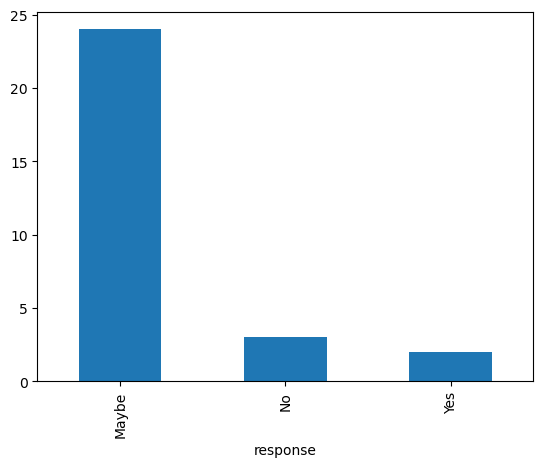

In [30]:
df_br["response"].value_counts().plot(kind='bar')

In [31]:
is_there_a_good_market(df_br)

Percentage of 'Yes' responses: 6.90%
Percentage of 'No' responses: 10.34%
Percentage of 'Maybe' responses: 82.76%
Percentage of 'N/A' responses: 0.00%
VERDICT: There is not a good market for bottled gazpacho.


False

In [32]:
control.end()